# Data Preprocessing

## Imports

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import copy
import re

# Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn imports
from sklearn.experimental import enable_halving_search_cv
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# NLTK imports
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, WordNetLemmatizer

# NLTK downloads
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('omw-1.4')

#For Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#For XGBoost
from xgboost import XGBClassifier

## Looking at the Data

In [2]:
df = pd.read_csv(
    '/Users/Arsh/Documents/GitHub/Capstone_Project/Capstone Project Dataframe')
df = df.drop(columns=['Unnamed: 0', 'Tweet ID'])
df_original = copy.deepcopy(df)

In [3]:
# Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285112 entries, 0 to 285111
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             285112 non-null  object
 1   Tweet            285112 non-null  object
 2   Username         285112 non-null  object
 3   Political_Score  285112 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.7+ MB


In [4]:
df.corr()

Political_Score
Political_Score              1.0

In [5]:
df.Tweet.iloc[37493]

'No Iceland is not the first, the US did his about 50 years ago. Good thing he’s not in government so he wouldn’t know about The Equal Pay Act of 1963... oh wait. https://t.co/ZqB6CfJ233'

##  Preprocessing

I will clean all of the tweets in my data and get it ready for NLP. 

### Tokenization 

In [6]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# I removed some stop words as, IMO, they remove context in the tweets that signify meaning.
my_stopwords = ['i',
                'me',
                'my',
                'myself',
                'we',
                'our',
                'ours',
                'ourselves',
                'you',
                "you're",
                "you've",
                "you'll",
                "you'd",
                'your',
                'yours',
                'yourself',
                'yourselves',
                'he',
                'him',
                'his',
                'himself',
                'she',
                "she's",
                'her',
                'hers',
                'herself',
                'it',
                "it's",
                'its',
                'itself',
                'they',
                'them',
                'their',
                'theirs',
                'themselves',
                'what',
                'which',
                'who',
                'whom',
                'this',
                'that',
                "that'll",
                'these',
                'those',
                'am',
                'is',
                'are',
                'was',
                'were',
                'be',
                'been',
                'being',
                'have',
                'has',
                'had',
                'having',
                'do',
                'does',
                'did',
                'doing',
                'a',
                'an',
                'the',
                'and',
                'but',
                'if',
                'or',
                'because',
                'as',
                'until',
                'while',
                'of',
                'at',
                'by',
                'for',
                'with',
                'about',
                'between',
                'into',
                'through',
                'during',
                'before',
                'after',
                'above',
                'below',
                'to',
                'from',
                'up',
                'down',
                'in',
                'out',
                'on',
                'off',
                'over',
                'under',
                'again',
                'further',
                'then',
                'once',
                'here',
                'there',
                'when',
                'where',
                'why',
                'how',
                'all',
                'any',
                'both',
                'each',
                'few',
                'more',
                'most',
                'other',
                'some',
                'such',
                'only',
                'own',
                'same',
                'so',
                'than',
                'too',
                'very',
                's',
                't',
                'can',
                'will',
                'just',
                'don',
                "don't",
                'should',
                "should've",
                'now',
                'd',
                'll',
                'm',
                'o',
                're',
                've',
                'y',
                'ain',
                'aren',
                "aren't",
                'couldn',
                "couldn't",
                'didn',
                "didn't",
                "doesn't",
                'hadn',
                "hadn't",
                'hasn',
                "hasn't",
                'haven',
                "haven't",
                'isn',
                "isn't",
                'ma',
                'mightn',
                "mightn't",
                'mustn',
                "mustn't",
                'needn',
                "needn't",
                'shan',
                "shan't",
                "shouldn't",
                "wasn't",
                "weren't",
                'won',
                "won't",
                "wouldn't"]

In [8]:
df.Tweet.iloc[37493]

'No Iceland is not the first, the US did his about 50 years ago. Good thing he’s not in government so he wouldn’t know about The Equal Pay Act of 1963... oh wait. https://t.co/ZqB6CfJ233'

In [9]:
tknzr = TweetTokenizer(
    strip_handles=True, reduce_len=True, preserve_case=False)

The parameters in the tokenizer remove @handles, lowercases all words, and reduces the length of exaggerated grammar (such as turning looooool into loool.)

In [10]:
def tweet_preprocessor(tweet, min_tok):

    wnl = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        else:
            return None

    tweet_sweeper = tweet.lower()
    tweet_sweeper = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "",
                           tweet_sweeper).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    clean_tweet = [x for x in tknzr.tokenize(tweet_sweeper) if (
        (x.isalpha()) & (x not in my_stopwords))]
    wordnet_tagged = list(
        map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(clean_tweet)))

    if len(wordnet_tagged) < min_tok:
        return ''
    else:
        clean_tweet = " ".join([wnl.lemmatize(x[0], x[1])
                               for x in wordnet_tagged if x[1] is not None])
        return clean_tweet

In [11]:
#df.Tweet = df.Tweet.apply(tweet_preprocessor, min_tok=8)

In [12]:
#processed_tweets = df[df['Tweet'] != '']

In [13]:
#processed_tweets.to_csv('Processed Tweets')
processed_tweets = pd.read_csv('/Users/Arsh/Documents/GitHub/Capstone_Project/Processed Tweets')
processed_tweets = processed_tweets.drop(columns=['Unnamed: 0'])
processed_tweets = processed_tweets.reset_index(drop=True)
processed_tweets

Date                                              Tweet  \
0       2017-01-20  let stand people deserve access health care wa...   
1       2017-01-20  congratulation become president lot work wait ...   
2       2017-01-20  honor life serve country president vice presid...   
3       2017-01-20  thought prayer west liberty high school thankf...   
4       2017-01-20  victory arizonan successful effort block acre ...   
...            ...                                                ...   
236649  2022-11-01  true bad democrat big tech favorite category m...   
236650  2022-11-01  election day week visit make plan vote vote de...   
236651  2022-11-01  border crisis create fentanyl epidemic ravagin...   
236652  2022-11-01  clear choice arizona ready put arizona family ...   
236653  2022-11-01  get horrible policy proposal democrats prof de...   

               Username  Political_Score  
0          KamalaHarris                1  
1       LeaderMcConnell                0  
2                  VP45                0  
3            Jim_Jordan                0  
4              RepGosar                0  
...                 ...              ...  
236649          tedcruz                0  
236650     TheDemocrats                1  
236651       RepBoebert                0  
236652              GOP                0  
236653    laurenboebert                0  

[236654 rows x 4 columns]

In [14]:
processed_tweets.Political_Score.value_counts()

1    127634
0    109020
Name: Political_Score, dtype: int64

In [15]:
X = processed_tweets['Tweet']
y = processed_tweets['Political_Score']

## Baseline Model - Multinomial Naive Bayes

In [16]:
cv = CountVectorizer(max_features = 100)
clf = GaussianNB()

In [17]:
X_fit_transformed = cv.fit_transform(X)

In [18]:
X_fit_transformed

<236654x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1036742 stored elements in Compressed Sparse Row format>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
           X_fit_transformed, y, test_size = 0.1, stratify = y, random_state = 95)

In [20]:
# Cannot be done in a previous step as test train splitting on a large array breaks the kernel : )
X_train = X_train.toarray()
X_test = X_test.toarray()

In [21]:
len(X_test)

23666

In [22]:
clf.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = clf.predict(X_test)

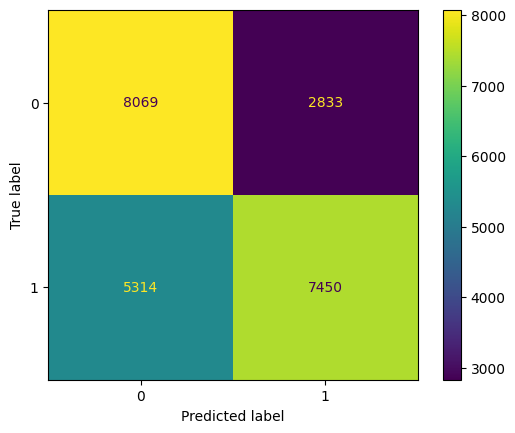

In [24]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66     10902
           1       0.72      0.58      0.65     12764

    accuracy                           0.66     23666
   macro avg       0.66      0.66      0.66     23666
weighted avg       0.67      0.66      0.65     23666



In [26]:
roc_auc_score(y_test, y_pred)

0.6619061268964073

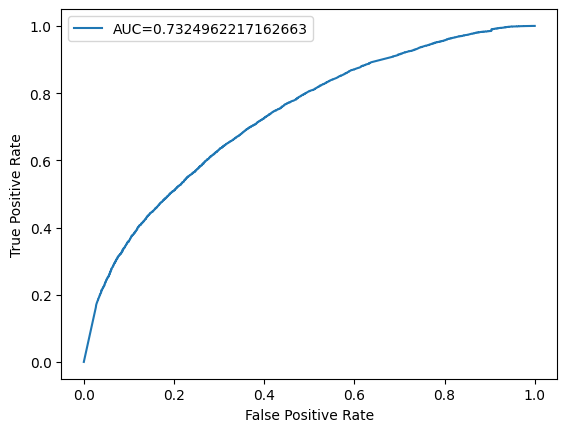

In [27]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Very successful for a baseline model. Let's play around with the parameters. In the baseline, I used the top 100 features or used the top 100 words in the corpus. 

### Finetuning the NB Model

In [28]:
### Playing with the parameters

In [29]:
cv_ft = CountVectorizer(max_features = 2200)

In [30]:
X_fit_tra_ft = cv_ft.fit_transform(X)

In [31]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
           X_fit_tra_ft, y, test_size = 0.1, stratify = y, random_state = 95)

In [32]:
X_train_ft = X_train_ft.toarray()
X_test_ft = X_test_ft.toarray()

In [33]:
clf.fit(X_train_ft, y_train_ft)

GaussianNB()

In [34]:
y_pred_ft = clf.predict(X_test_ft)

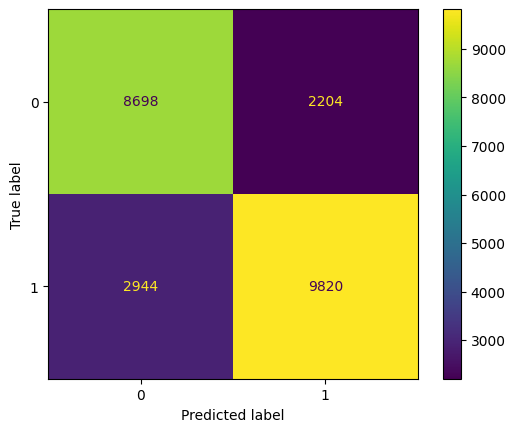

In [35]:
plot_confusion_matrix(clf, X_test_ft, y_test_ft)  
plt.show()

In [36]:
print(classification_report(y_test_ft, y_pred_ft))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77     10902
           1       0.82      0.77      0.79     12764

    accuracy                           0.78     23666
   macro avg       0.78      0.78      0.78     23666
weighted avg       0.78      0.78      0.78     23666



In [37]:
roc_auc_score(y_test_ft, y_pred_ft)

0.7835932800590727

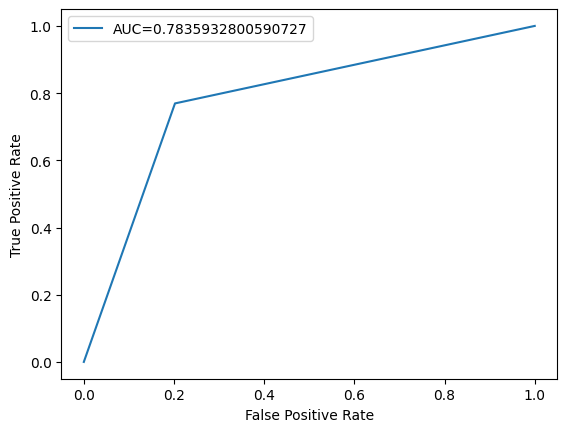

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test_ft,  y_pred_ft)
auc = metrics.roc_auc_score(y_test_ft, y_pred_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

I think this is the best I can finetune with a CountVectorizer. 

### Baseline model with a TFID vectorizer

In [39]:
tfidf = TfidfVectorizer(max_features = 100)

In [40]:
X_tfidf = tfidf.fit_transform(X)

In [41]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
           X_tfidf, y, test_size = 0.1, stratify = y, random_state = 95)

In [42]:
X_train_tfidf= X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [43]:
clf.fit(X_train_tfidf, y_train_tfidf)

GaussianNB()

In [44]:
y_pred_tfidf = clf.predict(X_test_tfidf)

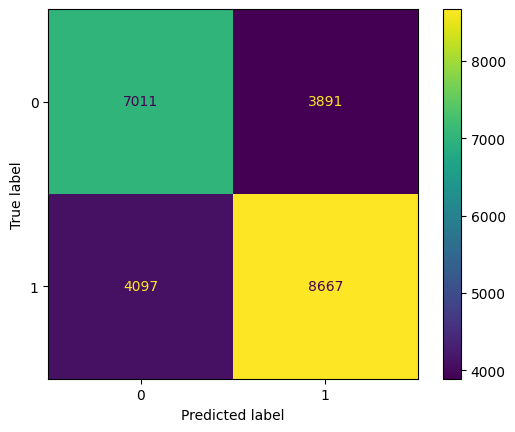

In [45]:
plot_confusion_matrix(clf, X_test_tfidf, y_test_tfidf)  
plt.show()

In [46]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64     10902
           1       0.69      0.68      0.68     12764

    accuracy                           0.66     23666
   macro avg       0.66      0.66      0.66     23666
weighted avg       0.66      0.66      0.66     23666



In [47]:
roc_auc_score(y_test_tfidf, y_pred_tfidf)

0.6610560633606454

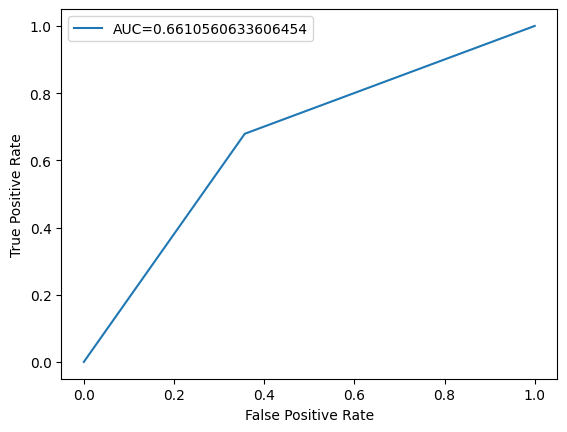

In [48]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_tfidf)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_tfidf)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is the new baseline for tfidf. Without any parameter tuning, this is worse than the countvectorizer. 

### Baseline Model with TFIDF vectorizer - Model Tuning

In [49]:
tfidf = TfidfVectorizer(max_features = 2500, min_df = 200)

In [50]:
X_tfidf_ft = tfidf.fit_transform(X)

In [51]:
X_train_tfidf_ft, X_test_tfidf_ft, y_train_tfidf_ft, y_test_tfidf_ft = train_test_split(
           X_tfidf_ft, y, test_size = 0.1, stratify = y, random_state = 95)

In [52]:
X_train_tfidf_ft= X_train_tfidf_ft.toarray()
X_test_tfidf_ft = X_test_tfidf_ft.toarray()

In [53]:
clf.fit(X_train_tfidf_ft, y_train_tfidf_ft)

GaussianNB()

In [54]:
y_pred_tfidf_ft = clf.predict(X_test_tfidf_ft)

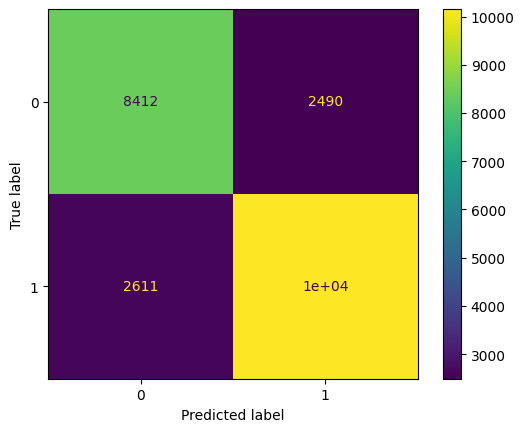

In [55]:
plot_confusion_matrix(clf, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [56]:
print(classification_report(y_test_tfidf_ft, y_pred_tfidf_ft))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     10902
           1       0.80      0.80      0.80     12764

    accuracy                           0.78     23666
   macro avg       0.78      0.78      0.78     23666
weighted avg       0.78      0.78      0.78     23666



In [57]:
roc_auc_score(y_test_tfidf_ft, y_pred_tfidf_ft)

0.7835209209238904

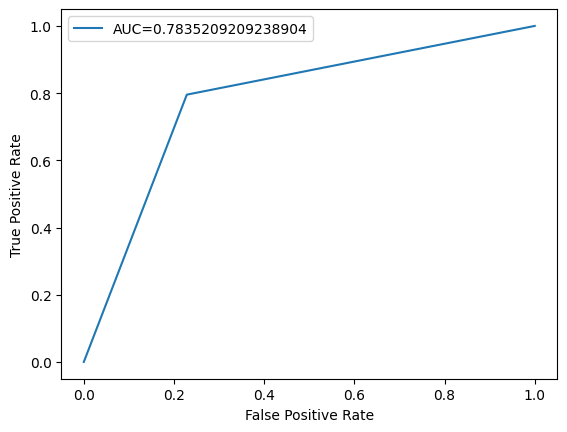

In [58]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_pred_tfidf_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_pred_tfidf_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

I think we have hit the limitation of what can be done with a Naive Bayes classifier. We struggle to go beyong 0.78 in terms of  F1 score. Now, I will move on to using decsions trees and random forests.

## Random Forest

In [59]:
forest_pipe = Pipeline([('model', RandomForestClassifier(n_estimators = 100, random_state = 95, n_jobs = -1, verbose = 2))])

For this model, I will use the already vectorized data from the tfidf model. 

In [60]:
forest_pipe.fit(X_train_tfidf_ft, y_train_tfidf_ft)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.0min finished


Pipeline(steps=[('model',
                 RandomForestClassifier(n_jobs=-1, random_state=95,
                                        verbose=2))])

In [61]:
y_forest_pred = forest_pipe.predict(X_test_tfidf_ft)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


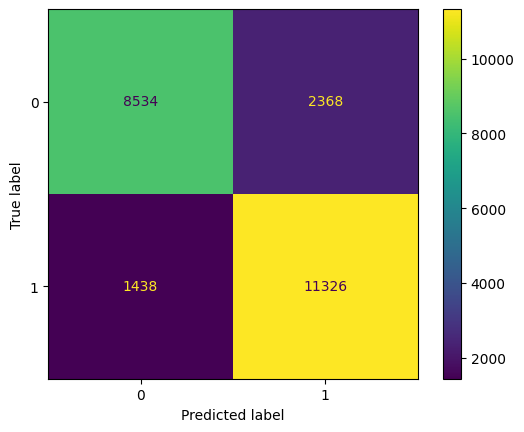

In [62]:
plot_confusion_matrix(forest_pipe, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [63]:
print(classification_report(y_test_tfidf_ft, y_forest_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     10902
           1       0.83      0.89      0.86     12764

    accuracy                           0.84     23666
   macro avg       0.84      0.84      0.84     23666
weighted avg       0.84      0.84      0.84     23666



In [64]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred)

0.8350657701348977

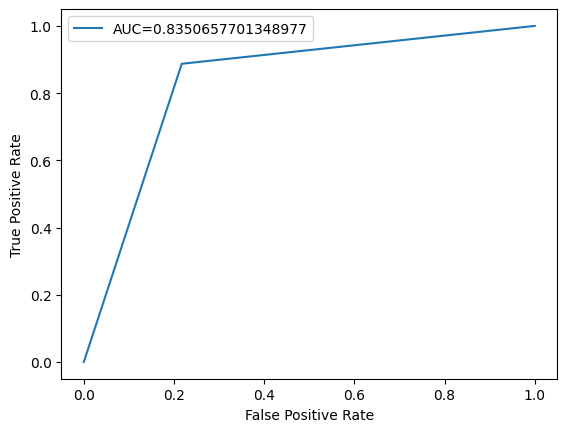

In [65]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is excellent. Off the bat, this is far more optimal than the other models. Now for model tuning.

### Hypertuning the Random Forest Model with HalvingGridSearchCV

In [66]:
forest_param_grid = {'model__n_estimators': [100, 200, 250], 'model__min_samples_leaf': [1, 3, 5], 'model__max_features': [30, 40, 50]}

In [67]:
halving_cv = HalvingGridSearchCV(forest_pipe, param_grid = forest_param_grid, scoring="f1", n_jobs=-1, min_resources="exhaust", max_resources = 60000, cv =3, factor=3, verbose = 2, random_state = 95)

In [68]:
#halving_cv.fit(X_train_tfidf_ft, y_train_tfidf_ft)
# Will take 20 minutes to run.

In [69]:
#halving_cv.best_score_

In [70]:
#halving_cv.best_params_

In [71]:
#rf_tuned = halving_cv.best_estimator_
#rf_tuned

In [72]:
rf_tuned = Pipeline([('model', RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_features=30, verbose=2, n_jobs=-1, random_state=95))])

In [73]:
rf_tuned.fit(X_train_tfidf_ft, y_train_tfidf_ft)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   50.2s


building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.1min


building tree 155 of 250
building tree 156 of 250
building tree 157 of 250
building tree 158 of 250
building tree 159 of 250
building tree 160 of 250
building tree 161 of 250
building tree 162 of 250
building tree 163 of 250
building tree 164 of 250
building tree 165 of 250
building tree 166 of 250
building tree 167 of 250
building tree 168 of 250
building tree 169 of 250
building tree 170 of 250
building tree 171 of 250
building tree 172 of 250
building tree 173 of 250
building tree 174 of 250
building tree 175 of 250
building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.8min finished


Pipeline(steps=[('model',
                 RandomForestClassifier(max_features=30, n_estimators=250,
                                        n_jobs=-1, random_state=95,
                                        verbose=2))])

In [74]:
y_forest_pred_ft = rf_tuned.predict(X_test_tfidf_ft)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.5s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.5s finished


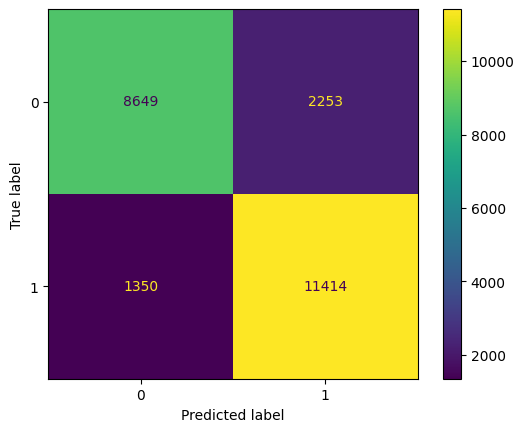

In [75]:
plot_confusion_matrix(rf_tuned, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [76]:
print(classification_report(y_test_tfidf_ft, y_forest_pred_ft))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83     10902
           1       0.84      0.89      0.86     12764

    accuracy                           0.85     23666
   macro avg       0.85      0.84      0.85     23666
weighted avg       0.85      0.85      0.85     23666



In [77]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft)

0.8437872269748763

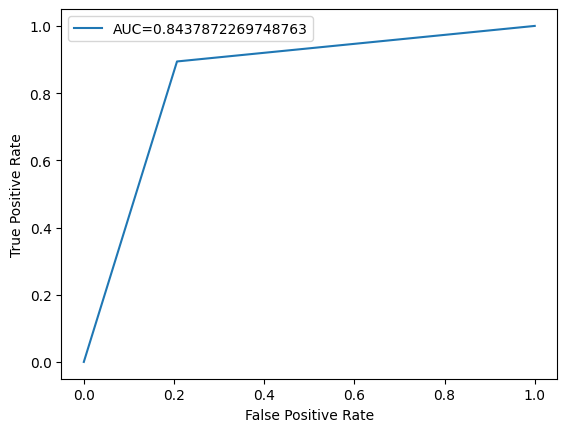

In [78]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is better, but lets add more parameters.

### Hypertuning the Random Forest with HalvingRandomSearchCV

In [79]:
forest_param_grid2 = {'model__n_estimators': [225, 250, 275, 300, 325] , 'model__criterion' : ['gini', 'entropy'], 
                     'model__min_samples_leaf': [1, 3], 'model__max_features': [15, 20, 25, 30, 35], 'model__bootstrap' : [True, False]}


In [80]:
halving_cv2 = HalvingRandomSearchCV(forest_pipe, forest_param_grid2, scoring="f1", n_jobs=-1, min_resources=2222, max_resources = 90000, cv = 5, factor=3, verbose = 2, random_state = 95)

In [81]:
#halving_cv2.fit(X_train_tfidf_ft, y_train_tfidf_ft)
# Will take 45 minutes to run.

In [82]:
#halving_cv2.best_score_

In [83]:
#halving_cv2.best_params_

In [84]:
#optimal_model2 = halving_cv2.best_estimator_
#optimal_model2

In [85]:
forest_pipe_optimized = Pipeline([('model', RandomForestClassifier(
    n_estimators=250, min_samples_leaf=1, max_features=15, criterion='gini', bootstrap=False, verbose=2, n_jobs=-1, random_state=95))])

In [86]:
forest_pipe_optimized.fit(X_train_tfidf_ft, y_train_tfidf_ft)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 250building tree 2 of 250
building tree 3 of 250

building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.3s


building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
building tree 43 of 250
building tree 44 of 250
building tree 45 of 250
building tree 46 of 250
building tree 47 of 250
building tree 48 of 250
building tree 49 of 250
building tree 50 of 250
building tree 51 of 250
building tree 52 of 250
building tree 53 of 250
building tree 54 of 250
building tree 55 of 250
building tree 56 of 250
building tree 57 of 250
building tree 58 of 250
building tree 59 of 250
building tree 60 of 250
building tree 61 of 250
building tree 62 of 250
building tree 63 of 250
building tree 64 of 250
building tree 65 of 250
building tree 66 of 250
building tree 67 of 250
building tree 68 of 250
building tree 69 of 250
building tree 70 of 250
building tree 71 of 250
building tree 72 of 250
building tree 73 of 250
building tree 74 of 250
building tree 75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min


building tree 156 of 250
building tree 157 of 250
building tree 158 of 250
building tree 159 of 250
building tree 160 of 250
building tree 161 of 250
building tree 162 of 250
building tree 163 of 250
building tree 164 of 250
building tree 165 of 250
building tree 166 of 250
building tree 167 of 250
building tree 168 of 250
building tree 169 of 250
building tree 170 of 250
building tree 171 of 250
building tree 172 of 250
building tree 173 of 250
building tree 174 of 250
building tree 175 of 250
building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250
building tree 183 of 250
building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250
building tree 188 of 250
building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250
building tree 195 of 250


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.5min finished


Pipeline(steps=[('model',
                 RandomForestClassifier(bootstrap=False, max_features=15,
                                        n_estimators=250, n_jobs=-1,
                                        random_state=95, verbose=2))])

In [87]:
y_forest_pred_ft2 = forest_pipe_optimized.predict(X_test_tfidf_ft)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.7s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    1.6s finished


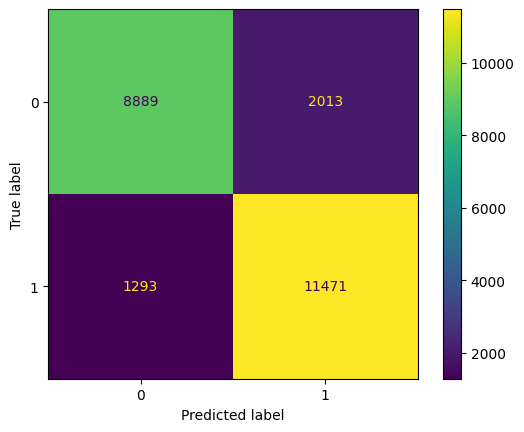

In [88]:
plot_confusion_matrix(forest_pipe_optimized, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [89]:
print(classification_report(y_test_tfidf_ft, y_forest_pred_ft2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     10902
           1       0.85      0.90      0.87     12764

    accuracy                           0.86     23666
   macro avg       0.86      0.86      0.86     23666
weighted avg       0.86      0.86      0.86     23666



In [90]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft2)

0.8570272239945623

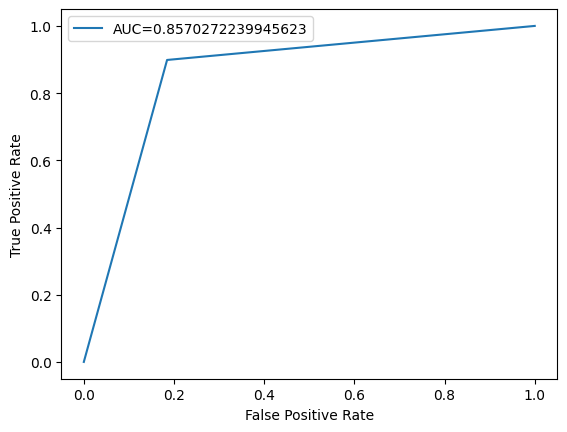

In [91]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred_ft2)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft2)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is the best model so far, with the highest accuracy, recall, and F! score.

## Boosting Models

### Gradient Boosted Classifer

In [92]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, verbose = 2, random_state=95).fit(X_train_tfidf_ft, y_train_tfidf_ft)

      Iter       Train Loss   Remaining Time 
         1           1.3458            5.63m
         2           1.3236            5.52m
         3           1.3079            5.62m
         4           1.2940            5.54m
         5           1.2819            5.48m
         6           1.2698            5.41m
         7           1.2582            5.37m
         8           1.2477            5.31m
         9           1.2372            5.25m
        10           1.2298            5.19m
        11           1.2217            5.14m
        12           1.2152            5.08m
        13           1.2082            5.07m
        14           1.2018            5.00m
        15           1.1960            4.94m
        16           1.1904            4.88m
        17           1.1856            4.82m
        18           1.1808            4.76m
        19           1.1757            4.69m
        20           1.1710            4.63m
        21           1.1669            4.58m
        2

In [93]:
y_gbc = gbc.predict(X_test_tfidf_ft)

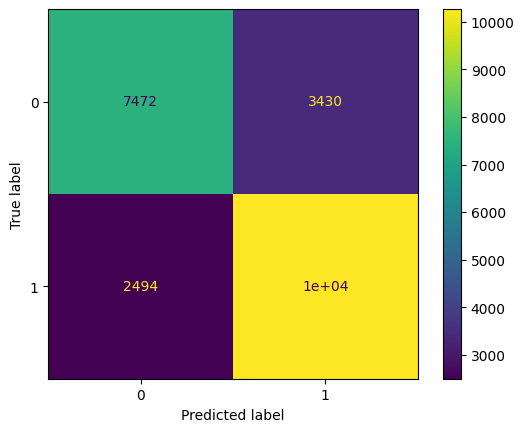

In [94]:
plot_confusion_matrix(gbc, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [95]:
print(classification_report(y_test_tfidf_ft, y_gbc))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10902
           1       0.75      0.80      0.78     12764

    accuracy                           0.75     23666
   macro avg       0.75      0.74      0.75     23666
weighted avg       0.75      0.75      0.75     23666



In [96]:
roc_auc_score(y_test_tfidf_ft, y_gbc)

0.7449927679670989

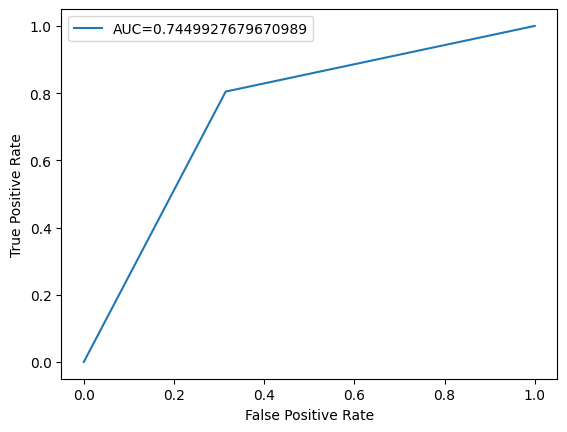

In [97]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_gbc)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_gbc)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is not  close to the results of the hypertuned RandomForestClassifier. But, it is still very good for a straight-out-of-the-box model we just fit our data on. Now, we need to hypertune it.

#### Hypertuning a Gradient Boosted Classifier

In [98]:
hrscv_grid = {'model__loss' : ['log_loss', 'exponential'] , 'model__learning_rate' : [0.1, 0.15, 0.2, 0.25, 0.3, 0.35], 'model__n_estimators': [ 190, 200, 210, 215, 220, 225, 230, 240], 
                     'model__min_samples_leaf': [1, 3, 5], 'model__max_depth' : [9, 11, 13, 15, 17, 19, 21], 'model__max_features': [15, 20, 25, 30, 35, 40]}

In [99]:
gcb_pipe = Pipeline([('model', GradientBoostingClassifier(random_state = 95, verbose = 2))])

In [100]:
halving_cv_gbc = HalvingRandomSearchCV(gcb_pipe, hrscv_grid, scoring="f1", n_jobs=-1, min_resources=2222, max_resources = 90000, cv = 5, factor=3, verbose = 2, random_state = 95)

In [101]:
halving_cv_gbc.fit(X_train_tfidf_ft, y_train_tfidf_ft)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2222
max_resources_: 90000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 40
n_resources: 2222
Fitting 5 folds for each of 40 candidates, totalling 200 fits
      Iter       Train Loss   Remaining Time 
         1           0.9637            3.75s
         2           0.9368            3.84s
         3           0.9152            3.95s
         4           0.8863            4.06s
         5           0.8650            4.03s
         6           0.8516            3.93s
         7           0.8246            3.77s
         8           0.8073            3.75s
         9           0.7915            3.82s
        10           0.7710            3.74s
        11           0.7541            3.72s
        12           0.7367            3.76s
        13           0.7230            3.76s
        14           0.7122            3.74s
        15           0.7005            3.74s
        16    

      Iter       Train Loss   Remaining Time 
         1           0.9745            1.12s
         2           0.9561            1.92s
         3           0.9309            1.72s
         4           0.9078            2.06s
         5           0.8927            2.42s
         6           0.8775            2.67s
         7           0.8617            2.71s
         8           0.8421            2.78s
         9           0.8254            2.87s
        10           0.8091            2.98s
        11           0.7934            2.93s
        12           0.7761            2.98s
        13           0.7627            3.05s
        14           0.7510            2.98s
        15           0.7400            3.13s
        16           0.7291            3.07s
        17           0.7197            3.12s
        18           0.7090            3.12s
        19           0.6976            3.09s
        20           0.6875            3.12s
        21           0.6772            3.13s
        2

      Iter       Train Loss   Remaining Time 
         1           0.9793            1.40s
         2           0.9588            1.38s
         3           0.9343            1.50s
         4           0.9152            1.73s
         5           0.8986            1.78s
         6           0.8824            2.18s
         7           0.8673            2.29s
         8           0.8529            2.38s
         9           0.8392            2.53s
        10           0.8256            2.58s
        11           0.8137            2.60s
        12           0.7990            2.69s
        13           0.7874            2.74s
        14           0.7769            2.71s
        15           0.7660            2.75s
        16           0.7549            2.74s
        17           0.7414            2.77s
        18           0.7300            2.82s
        19           0.7173            2.85s
        20           0.7085            2.80s
        21           0.6990            2.83s
        2

      Iter       Train Loss   Remaining Time 
         1           0.9788            2.71s
         2           0.9574            3.60s
         3           0.9350            3.52s
         4           0.9150            3.17s
         5           0.8980            3.27s
         6           0.8818            3.09s
         7           0.8662            3.16s
         8           0.8516            3.22s
         9           0.8370            3.19s
        10           0.8187            3.16s
        11           0.8025            3.20s
        12           0.7869            3.09s
        13           0.7745            3.13s
        14           0.7630            3.05s
        15           0.7521            3.10s
        16           0.7430            3.16s
        17           0.7327            3.09s
        18           0.7208            3.13s
        19           0.7123            3.13s
        20           0.7029            3.12s
        21           0.6925            3.12s
        2

      Iter       Train Loss   Remaining Time 
         1           0.9713            3.35s
         2           0.9435            3.32s
         3           0.9158            3.47s
         4           0.8845            3.54s
         5           0.8630            3.62s
         6           0.8392            3.62s
         7           0.8153            3.61s
         8           0.7953            3.58s
         9           0.7794            3.48s
        10           0.7565            3.50s
        11           0.7410            3.52s
        12           0.7211            3.51s
        13           0.7078            3.53s
        14           0.6959            3.47s
        15           0.6841            3.47s
        16           0.6741            3.44s
        17           0.6598            3.44s
        18           0.6480            3.44s
        19           0.6385            3.44s
        20           0.6317            3.38s
        21           0.6194            3.38s
        2

       159           0.3329            0.81s
       160           0.3312            0.80s
       161           0.3290            0.78s
       162           0.3270            0.77s
       163           0.3252            0.76s
       164           0.3231            0.75s
       165           0.3214            0.73s
       166           0.3196            0.72s
       167           0.3176            0.71s
       168           0.3161            0.70s
       169           0.3134            0.69s
       170           0.3113            0.68s
       171           0.3095            0.67s
       172           0.3076            0.66s
       173           0.3060            0.65s
       174           0.3043            0.64s
       175           0.3025            0.62s
       176           0.3008            0.61s
       177           0.2991            0.60s
       178           0.2973            0.59s
       179           0.2954            0.58s
       180           0.2937            0.57s
       181

       129           0.1628            1.41s
       130           0.1607            1.40s
       131           0.1584            1.38s
       132           0.1566            1.36s
       133           0.1555            1.34s
       134           0.1541            1.32s
       135           0.1518            1.30s
       136           0.1509            1.28s
       137           0.1490            1.26s
       138           0.1476            1.24s
       139           0.1465            1.22s
       140           0.1438            1.20s
       141           0.1429            1.18s
       142           0.1415            1.16s
       143           0.1402            1.14s
       144           0.1390            1.12s
       145           0.1375            1.10s
       146           0.1351            1.08s
       147           0.1333            1.06s
       148           0.1321            1.04s
       149           0.1308            1.02s
       150           0.1291            1.00s
       151

       129           0.1156            1.95s
       130           0.1138            1.93s
       131           0.1123            1.90s
       132           0.1106            1.88s
       133           0.1093            1.86s
       134           0.1077            1.84s
       135           0.1063            1.82s
       136           0.1050            1.79s
       137           0.1034            1.77s
       138           0.1022            1.75s
       139           0.1008            1.73s
       140           0.0996            1.71s
       141           0.0983            1.69s
       142           0.0966            1.66s
       143           0.0952            1.64s
       144           0.0940            1.62s
       145           0.0927            1.59s
       146           0.0911            1.57s
       147           0.0899            1.55s
       148           0.0886            1.53s
       149           0.0874            1.51s
       150           0.0862            1.48s
       151

       129           0.1104            2.09s
       130           0.1090            2.07s
       131           0.1074            2.04s
       132           0.1061            2.01s
       133           0.1048            1.99s
       134           0.1035            1.96s
       135           0.1021            1.94s
       136           0.1007            1.91s
       137           0.0989            1.89s
       138           0.0973            1.87s
       139           0.0956            1.84s
       140           0.0944            1.82s
       141           0.0932            1.80s
       142           0.0919            1.77s
       143           0.0906            1.75s
       144           0.0895            1.72s
       145           0.0882            1.70s
       146           0.0870            1.67s
       147           0.0858            1.65s
       148           0.0848            1.63s
       149           0.0838            1.60s
       150           0.0826            1.58s
       151

       159           0.0789            1.34s
       160           0.0780            1.32s
       161           0.0770            1.29s
       162           0.0760            1.27s
       163           0.0750            1.25s
       164           0.0738            1.22s
       165           0.0729            1.20s
       166           0.0721            1.18s
       167           0.0712            1.15s
       168           0.0702            1.13s
       169           0.0693            1.10s
       170           0.0684            1.08s
       171           0.0676            1.05s
       172           0.0667            1.03s
       173           0.0657            1.00s
       174           0.0648            0.98s
       175           0.0634            0.95s
       176           0.0625            0.93s
       177           0.0615            0.90s
       178           0.0606            0.88s
       179           0.0598            0.85s
       180           0.0590            0.83s
       181

       129           0.1072            2.15s
       130           0.1057            2.13s
       131           0.1038            2.10s
       132           0.1022            2.08s
       133           0.1009            2.06s
       134           0.0995            2.03s
       135           0.0982            2.01s
       136           0.0958            1.98s
       137           0.0946            1.96s
       138           0.0934            1.93s
       139           0.0922            1.91s
       140           0.0911            1.88s
       141           0.0898            1.85s
       142           0.0886            1.83s
       143           0.0873            1.80s
       144           0.0860            1.78s
       145           0.0847            1.75s
       146           0.0833            1.73s
       147           0.0822            1.70s
       148           0.0812            1.68s
       149           0.0798            1.65s
       150           0.0785            1.62s
       151

        38           0.7276            2.54s
        39           0.7228            2.50s
        40           0.7183            2.50s
        41           0.7129            2.48s
        42           0.7084            2.47s
        43           0.7045            2.46s
        44           0.7000            2.45s
        45           0.6955            2.42s
        46           0.6909            2.42s
        47           0.6874            2.42s
        48           0.6832            2.39s
        49           0.6791            2.36s
        50           0.6753            2.35s
        51           0.6703            2.33s
        52           0.6662            2.33s
        53           0.6624            2.34s
        54           0.6586            2.33s
        55           0.6548            2.31s
        56           0.6512            2.30s
        57           0.6471            2.28s
        58           0.6433            2.28s
        59           0.6401            2.28s
        60

        53           0.6621            2.37s
        54           0.6580            2.35s
        55           0.6538            2.32s
        56           0.6496            2.30s
        57           0.6453            2.30s
        58           0.6414            2.28s
        59           0.6378            2.26s
        60           0.6345            2.25s
        61           0.6310            2.24s
        62           0.6270            2.21s
        63           0.6234            2.20s
        64           0.6199            2.17s
        65           0.6162            2.16s
        66           0.6129            2.15s
        67           0.6095            2.13s
        68           0.6059            2.12s
        69           0.6028            2.11s
        70           0.5996            2.09s
        71           0.5962            2.08s
        72           0.5928            2.05s
        73           0.5898            2.04s
        74           0.5864            2.02s
        75

        73           0.5767            2.21s
        74           0.5731            2.18s
        75           0.5701            2.18s
        76           0.5665            2.15s
        77           0.5632            2.14s
        78           0.5600            2.12s
        79           0.5570            2.11s
        80           0.5539            2.09s
        81           0.5506            2.07s
        82           0.5476            2.06s
        83           0.5447            2.04s
        84           0.5419            2.03s
        85           0.5387            2.02s
        86           0.5355            2.00s
        87           0.5326            1.98s
        88           0.5297            1.98s
        89           0.5263            1.96s
        90           0.5235            1.95s
        91           0.5204            1.93s
        92           0.5174            1.91s
        93           0.5149            1.89s
        94           0.5122            1.87s
        95

        43           0.4140            3.81s
        44           0.4082            3.80s
        45           0.4039            3.75s
        46           0.3969            3.75s
        47           0.3903            3.72s
        48           0.3839            3.68s
        49           0.3789            3.66s
        50           0.3751            3.62s
        51           0.3681            3.60s
        52           0.3639            3.57s
        53           0.3600            3.56s
        54           0.3564            3.53s
        55           0.3505            3.51s
        56           0.3476            3.52s
        57           0.3422            3.49s
        58           0.3392            3.45s
        59           0.3353            3.43s
        60           0.3313            3.40s
        61           0.3255            3.39s
        62           0.3223            3.39s
        63           0.3188            3.36s
        64           0.3155            3.32s
        65

        73           0.2797            3.04s
        74           0.2759            3.01s
        75           0.2720            2.98s
        76           0.2693            2.96s
        77           0.2667            2.93s
        78           0.2637            2.91s
        79           0.2610            2.89s
        80           0.2589            2.86s
        81           0.2558            2.83s
        82           0.2535            2.81s
        83           0.2508            2.79s
        84           0.2466            2.77s
        85           0.2444            2.75s
        86           0.2404            2.74s
        87           0.2370            2.71s
        88           0.2348            2.69s
        89           0.2318            2.66s
        90           0.2290            2.65s
        91           0.2256            2.62s
        92           0.2233            2.60s
        93           0.2208            2.58s
        94           0.2185            2.56s
        95

       187           0.0764            0.67s
       188           0.0757            0.65s
       189           0.0748            0.63s
       190           0.0743            0.61s
       191           0.0728            0.59s
       192           0.0720            0.56s
       193           0.0712            0.54s
       194           0.0705            0.52s
       195           0.0698            0.50s
       196           0.0690            0.48s
       197           0.0684            0.46s
       198           0.0678            0.44s
       199           0.0671            0.42s
       200           0.0665            0.40s
       201           0.0657            0.38s
       202           0.0651            0.36s
       203           0.0645            0.34s
       204           0.0633            0.32s
       205           0.0628            0.30s
       206           0.0622            0.28s
       207           0.0615            0.26s
       208           0.0608            0.24s
       209

       202           0.0538            0.34s
       203           0.0532            0.32s
       204           0.0527            0.30s
       205           0.0521            0.28s
       206           0.0510            0.26s
       207           0.0504            0.25s
       208           0.0497            0.23s
       209           0.0493            0.21s
       210           0.0490            0.19s
       211           0.0485            0.17s
       212           0.0479            0.15s
       213           0.0473            0.13s
       214           0.0467            0.11s
       215           0.0461            0.09s
       216           0.0457            0.08s
       217           0.0450            0.06s
       218           0.0445            0.04s
       219           0.0440            0.02s
       220           0.0433            0.00s
[CV] END model__learning_rate=0.25, model__loss=exponential, model__max_depth=15, model__max_features=35, model__min_samples_leaf=1, model__n_est

       192           0.0828            0.48s
       193           0.0818            0.47s
       194           0.0808            0.46s
       195           0.0800            0.45s
       196           0.0790            0.44s
       197           0.0781            0.43s
       198           0.0772            0.42s
       199           0.0767            0.41s
       200           0.0758            0.40s
       201           0.0751            0.39s
       202           0.0745            0.38s
       203           0.0738            0.37s
       204           0.0730            0.36s
       205           0.0719            0.35s
       206           0.0714            0.34s
       207           0.0707            0.33s
       208           0.0700            0.32s
       209           0.0694            0.31s
       210           0.0686            0.30s
       211           0.0679            0.29s
       212           0.0672            0.28s
       213           0.0666            0.27s
       214

       212           0.0626            0.27s
       213           0.0620            0.26s
       214           0.0614            0.25s
       215           0.0608            0.24s
       216           0.0602            0.23s
       217           0.0596            0.22s
       218           0.0591            0.21s
       219           0.0586            0.20s
       220           0.0581            0.19s
       221           0.0574            0.18s
       222           0.0568            0.17s
       223           0.0563            0.16s
       224           0.0558            0.15s
       225           0.0551            0.14s
       226           0.0543            0.13s
       227           0.0538            0.12s
       228           0.0533            0.11s
       229           0.0528            0.11s
       230           0.0522            0.10s
       231           0.0517            0.09s
       232           0.0513            0.08s
       233           0.0509            0.07s
       234

       182           0.0809            0.54s
       183           0.0802            0.53s
       184           0.0793            0.53s
       185           0.0786            0.52s
       186           0.0775            0.51s
       187           0.0765            0.50s
       188           0.0759            0.49s
       189           0.0748            0.48s
       190           0.0739            0.47s
       191           0.0731            0.46s
       192           0.0723            0.45s
       193           0.0714            0.44s
       194           0.0705            0.44s
       195           0.0694            0.43s
       196           0.0680            0.42s
       197           0.0674            0.41s
       198           0.0669            0.40s
       199           0.0663            0.39s
       200           0.0658            0.38s
       201           0.0654            0.37s
       202           0.0642            0.36s
       203           0.0637            0.35s
       204

       126           0.6681            0.75s
       127           0.6657            0.74s
       128           0.6633            0.73s
       129           0.6604            0.71s
       130           0.6580            0.70s
       131           0.6558            0.69s
       132           0.6530            0.68s
       133           0.6506            0.67s
       134           0.6484            0.66s
       135           0.6462            0.65s
       136           0.6439            0.64s
       137           0.6417            0.63s
       138           0.6395            0.62s
       139           0.6373            0.61s
       140           0.6351            0.59s
       141           0.6327            0.58s
       142           0.6303            0.57s
       143           0.6280            0.56s
       144           0.6259            0.55s
       145           0.6236            0.53s
       146           0.6208            0.52s
       147           0.6186            0.51s
       148

        91           0.4603            2.09s
        92           0.4566            2.07s
        93           0.4529            2.04s
        94           0.4486            2.02s
        95           0.4456            2.00s
        96           0.4419            1.98s
        97           0.4383            1.97s
        98           0.4351            1.95s
        99           0.4321            1.93s
       100           0.4288            1.90s
       101           0.4258            1.88s
       102           0.4225            1.86s
       103           0.4185            1.84s
       104           0.4151            1.83s
       105           0.4119            1.80s
       106           0.4089            1.78s
       107           0.4059            1.77s
       108           0.4031            1.75s
       109           0.3984            1.73s
       110           0.3951            1.71s
       111           0.3922            1.70s
       112           0.3886            1.67s
       113

       111           0.3954            1.60s
       112           0.3923            1.58s
       113           0.3897            1.57s
       114           0.3870            1.55s
       115           0.3839            1.53s
       116           0.3813            1.52s
       117           0.3782            1.51s
       118           0.3754            1.49s
       119           0.3721            1.47s
       120           0.3692            1.45s
       121           0.3658            1.43s
       122           0.3630            1.41s
       123           0.3599            1.39s
       124           0.3574            1.38s
       125           0.3548            1.35s
       126           0.3526            1.33s
       127           0.3502            1.32s
       128           0.3479            1.31s
       129           0.3455            1.29s
       130           0.3429            1.27s
       131           0.3405            1.25s
       132           0.3381            1.24s
       133

       126           0.6638            0.74s
       127           0.6612            0.73s
       128           0.6586            0.72s
       129           0.6560            0.71s
       130           0.6533            0.70s
       131           0.6509            0.69s
       132           0.6483            0.67s
       133           0.6456            0.66s
       134           0.6431            0.65s
       135           0.6407            0.64s
       136           0.6384            0.63s
       137           0.6361            0.62s
       138           0.6335            0.61s
       139           0.6310            0.60s
       140           0.6286            0.58s
       141           0.6263            0.58s
       142           0.6240            0.56s
       143           0.6217            0.55s
       144           0.6196            0.54s
       145           0.6174            0.53s
       146           0.6150            0.52s
       147           0.6128            0.50s
       148

        96           0.3333            1.88s
        97           0.3308            1.87s
        98           0.3285            1.85s
        99           0.3258            1.84s
       100           0.3222            1.84s
       101           0.3189            1.84s
       102           0.3165            1.82s
       103           0.3133            1.81s
       104           0.3116            1.79s
       105           0.3085            1.77s
       106           0.3063            1.75s
       107           0.3039            1.74s
       108           0.3003            1.74s
       109           0.2985            1.72s
       110           0.2949            1.71s
       111           0.2930            1.69s
       112           0.2917            1.68s
       113           0.2893            1.66s
       114           0.2868            1.66s
       115           0.2848            1.65s
       116           0.2832            1.63s
       117           0.2815            1.62s
       118

       126           0.6439            0.73s
       127           0.6409            0.72s
       128           0.6381            0.71s
       129           0.6357            0.70s
       130           0.6333            0.69s
       131           0.6307            0.67s
       132           0.6281            0.66s
       133           0.6254            0.65s
       134           0.6221            0.64s
       135           0.6199            0.63s
       136           0.6176            0.62s
       137           0.6150            0.60s
       138           0.6126            0.59s
       139           0.6101            0.58s
       140           0.6076            0.56s
       141           0.6052            0.55s
       142           0.6028            0.54s
       143           0.6001            0.53s
       144           0.5978            0.52s
       145           0.5954            0.51s
       146           0.5925            0.50s
       147           0.5902            0.49s
       148

        50           0.5324            1.70s
        51           0.5271            1.69s
        52           0.5221            1.67s
        53           0.5166            1.65s
        54           0.5125            1.66s
        55           0.5083            1.64s
        56           0.5044            1.63s
        57           0.4997            1.61s
        58           0.4948            1.62s
        59           0.4914            1.60s
        60           0.4877            1.60s
        61           0.4836            1.59s
        62           0.4785            1.60s
        63           0.4739            1.59s
        64           0.4674            1.59s
        65           0.4626            1.58s
        66           0.4594            1.58s
        67           0.4550            1.57s
        68           0.4505            1.57s
        69           0.4454            1.56s
        70           0.4405            1.56s
        71           0.4372            1.55s
        72

         5           0.9492            1.81s
         6           0.9414            1.72s
         7           0.9320            1.88s
         8           0.9216            1.94s
         9           0.9115            1.95s
        10           0.9043            2.13s
        11           0.8957            2.10s
        12           0.8868            2.13s
        13           0.8792            2.17s
        14           0.8700            2.12s
        15           0.8630            2.14s
        16           0.8555            2.11s
        17           0.8489            2.08s
        18           0.8412            2.10s
        19           0.8351            2.11s
        20           0.8285            2.09s
        21           0.8227            2.11s
        22           0.8159            2.12s
        23           0.8098            2.09s
        24           0.8042            2.10s
        25           0.7989            2.10s
        26           0.7921            2.08s
        27

        30           0.7690            2.29s
        31           0.7625            2.26s
        32           0.7562            2.25s
        33           0.7515            2.25s
        34           0.7472            2.23s
        35           0.7419            2.25s
        36           0.7353            2.23s
        37           0.7307            2.21s
        38           0.7253            2.20s
        39           0.7208            2.17s
        40           0.7161            2.16s
        41           0.7111            2.13s
        42           0.7057            2.13s
        43           0.7012            2.09s
        44           0.6961            2.09s
        45           0.6917            2.06s
        46           0.6877            2.05s
        47           0.6829            2.05s
        48           0.6790            2.03s
        49           0.6748            2.02s
        50           0.6700            2.01s
        51           0.6651            1.98s
        52

        25           0.8097            1.83s
        26           0.8034            1.80s
        27           0.7981            1.82s
        28           0.7933            1.78s
        29           0.7875            1.77s
        30           0.7827            1.74s
        31           0.7758            1.73s
        32           0.7699            1.70s
        33           0.7654            1.75s
        34           0.7600            1.73s
        35           0.7556            1.75s
        36           0.7504            1.72s
        37           0.7457            1.73s
        38           0.7391            1.73s
        39           0.7346            1.72s
        40           0.7306            1.73s
        41           0.7262            1.72s
        42           0.7217            1.72s
        43           0.7172            1.72s
        44           0.7126            1.71s
        45           0.7081            1.70s
        46           0.7034            1.71s
        47

        50           0.6837            1.73s
        51           0.6791            1.72s
        52           0.6756            1.70s
        53           0.6719            1.70s
        54           0.6677            1.69s
        55           0.6637            1.70s
        56           0.6591            1.68s
        57           0.6549            1.67s
        58           0.6512            1.67s
        59           0.6475            1.65s
        60           0.6446            1.64s
        61           0.6416            1.64s
        62           0.6378            1.62s
        63           0.6344            1.62s
        64           0.6310            1.61s
        65           0.6275            1.59s
        66           0.6242            1.59s
        67           0.6210            1.58s
        68           0.6176            1.56s
        69           0.6146            1.55s
        70           0.6111            1.55s
        71           0.6078            1.53s
        72

       215           0.1549            0.24s
       216           0.1541            0.23s
       217           0.1533            0.22s
       218           0.1516            0.21s
       219           0.1508            0.20s
       220           0.1499            0.19s
       221           0.1488            0.19s
       222           0.1473            0.18s
       223           0.1466            0.17s
       224           0.1452            0.16s
       225           0.1444            0.15s
       226           0.1432            0.14s
       227           0.1422            0.13s
       228           0.1415            0.12s
       229           0.1405            0.11s
       230           0.1395            0.10s
       231           0.1385            0.09s
       232           0.1371            0.08s
       233           0.1364            0.07s
       234           0.1355            0.06s
       235           0.1346            0.05s
       236           0.1337            0.04s
       237

        50           0.3548            3.14s
        51           0.3491            3.13s
        52           0.3432            3.12s
        53           0.3379            3.10s
        54           0.3330            3.08s
        55           0.3273            3.06s
        56           0.3227            3.04s
        57           0.3179            3.02s
        58           0.3136            3.00s
        59           0.3095            2.98s
        60           0.3051            2.95s
        61           0.2999            2.92s
        62           0.2955            2.90s
        63           0.2910            2.88s
        64           0.2872            2.84s
        65           0.2832            2.82s
        66           0.2791            2.80s
        67           0.2753            2.77s
        68           0.2713            2.75s
        69           0.2673            2.73s
        70           0.2630            2.72s
        71           0.2592            2.70s
        72

       174           0.2264            0.91s
       175           0.2248            0.89s
       176           0.2234            0.87s
       177           0.2219            0.85s
       178           0.2203            0.83s
       179           0.2189            0.81s
       180           0.2175            0.79s
       181           0.2161            0.77s
       182           0.2143            0.75s
       183           0.2130            0.73s
       184           0.2114            0.71s
       185           0.2099            0.69s
       186           0.2084            0.67s
       187           0.2070            0.65s
       188           0.2058            0.63s
       189           0.2045            0.61s
       190           0.2032            0.59s
       191           0.2020            0.57s
       192           0.2007            0.55s
       193           0.1993            0.53s
       194           0.1978            0.51s
       195           0.1967            0.49s
       196

       169           0.0705            0.70s
       170           0.0697            0.68s
       171           0.0688            0.66s
       172           0.0679            0.64s
       173           0.0670            0.61s
       174           0.0660            0.59s
       175           0.0651            0.57s
       176           0.0642            0.55s
       177           0.0635            0.52s
       178           0.0628            0.50s
       179           0.0621            0.48s
       180           0.0612            0.46s
       181           0.0605            0.43s
       182           0.0597            0.41s
       183           0.0590            0.39s
       184           0.0581            0.36s
       185           0.0573            0.34s
       186           0.0566            0.32s
       187           0.0560            0.30s
       188           0.0551            0.27s
       189           0.0544            0.25s
       190           0.0537            0.23s
       191

       199           0.1940            0.40s
       200           0.1927            0.38s
       201           0.1916            0.36s
       202           0.1904            0.34s
       203           0.1892            0.32s
       204           0.1880            0.30s
       205           0.1866            0.28s
       206           0.1853            0.27s
       207           0.1841            0.25s
       208           0.1827            0.23s
       209           0.1812            0.21s
       210           0.1801            0.19s
       211           0.1789            0.17s
       212           0.1777            0.15s
       213           0.1766            0.13s
       214           0.1756            0.11s
       215           0.1744            0.09s
       216           0.1733            0.08s
       217           0.1723            0.06s
       218           0.1711            0.04s
       219           0.1700            0.02s
       220           0.1690            0.00s
[CV] END m

       219           0.1645            0.02s
       220           0.1634            0.00s
[CV] END model__learning_rate=0.15, model__loss=exponential, model__max_depth=21, model__max_features=25, model__min_samples_leaf=5, model__n_estimators=220; total time=   4.2s
      Iter       Train Loss   Remaining Time 
         1           0.9801            3.87s
         2           0.9611            3.85s
         3           0.9449            3.61s
         4           0.9313            3.81s
         5           0.9149            3.77s
         6           0.9002            3.61s
         7           0.8854            3.50s
         8           0.8734            3.48s
         9           0.8596            3.47s
        10           0.8486            3.35s
        11           0.8376            3.35s
        12           0.8257            3.37s
        13           0.8161            3.39s
        14           0.8053            3.31s
        15           0.7943            3.28s
        16  

       209           0.1709            0.20s
       210           0.1698            0.18s
       211           0.1686            0.16s
       212           0.1675            0.14s
       213           0.1664            0.13s
       214           0.1653            0.11s
       215           0.1641            0.09s
       216           0.1630            0.07s
       217           0.1620            0.05s
       218           0.1609            0.04s
       219           0.1598            0.02s
       220           0.1588            0.00s
[CV] END model__learning_rate=0.15, model__loss=exponential, model__max_depth=21, model__max_features=25, model__min_samples_leaf=5, model__n_estimators=220; total time=   4.0s
      Iter       Train Loss   Remaining Time 
         1           1.3403            3.88s
         2           1.3114            4.02s
         3           1.2843            3.52s
         4           1.2572            3.52s
         5           1.2285            3.29s
         6  

       129           0.4274            1.27s
       130           0.4249            1.26s
       131           0.4223            1.24s
       132           0.4197            1.23s
       133           0.4168            1.21s
       134           0.4140            1.20s
       135           0.4114            1.18s
       136           0.4088            1.17s
       137           0.4060            1.16s
       138           0.4036            1.14s
       139           0.4011            1.13s
       140           0.3982            1.12s
       141           0.3956            1.11s
       142           0.3935            1.09s
       143           0.3912            1.08s
       144           0.3889            1.06s
       145           0.3867            1.05s
       146           0.3839            1.03s
       147           0.3816            1.02s
       148           0.3794            1.00s
       149           0.3772            0.99s
       150           0.3752            0.97s
       151

        93           0.1093            1.91s
        94           0.1072            1.90s
        95           0.1054            1.89s
        96           0.1036            1.88s
        97           0.1015            1.87s
        98           0.0996            1.86s
        99           0.0976            1.84s
       100           0.0954            1.82s
       101           0.0936            1.81s
       102           0.0920            1.79s
       103           0.0896            1.77s
       104           0.0873            1.77s
       105           0.0861            1.75s
       106           0.0845            1.74s
       107           0.0825            1.72s
       108           0.0806            1.72s
       109           0.0791            1.71s
       110           0.0781            1.71s
       111           0.0768            1.70s
       112           0.0755            1.68s
       113           0.0739            1.66s
       114           0.0726            1.64s
       115

       118           0.3920            1.57s
       119           0.3890            1.56s
       120           0.3858            1.54s
       121           0.3832            1.53s
       122           0.3801            1.52s
       123           0.3775            1.50s
       124           0.3751            1.49s
       125           0.3724            1.47s
       126           0.3697            1.46s
       127           0.3674            1.45s
       128           0.3650            1.44s
       129           0.3623            1.42s
       130           0.3600            1.41s
       131           0.3576            1.40s
       132           0.3545            1.39s
       133           0.3518            1.37s
       134           0.3490            1.36s
       135           0.3466            1.35s
       136           0.3440            1.33s
       137           0.3417            1.32s
       138           0.3395            1.31s
       139           0.3373            1.29s
       140

       133           0.0523            1.40s
       134           0.0513            1.38s
       135           0.0506            1.37s
       136           0.0497            1.36s
       137           0.0490            1.35s
       138           0.0481            1.34s
       139           0.0472            1.33s
       140           0.0463            1.31s
       141           0.0455            1.30s
       142           0.0446            1.29s
       143           0.0436            1.28s
       144           0.0428            1.26s
       145           0.0420            1.25s
       146           0.0411            1.23s
       147           0.0401            1.22s
       148           0.0393            1.21s
       149           0.0386            1.20s
       150           0.0381            1.18s
       151           0.0373            1.17s
       152           0.0366            1.16s
       153           0.0360            1.14s
       154           0.0355            1.13s
       155

       108           0.4499            1.77s
       109           0.4466            1.76s
       110           0.4437            1.75s
       111           0.4405            1.73s
       112           0.4379            1.71s
       113           0.4351            1.70s
       114           0.4322            1.68s
       115           0.4293            1.68s
       116           0.4264            1.66s
       117           0.4237            1.65s
       118           0.4214            1.63s
       119           0.4185            1.62s
       120           0.4157            1.60s
       121           0.4124            1.59s
       122           0.4094            1.58s
       123           0.4068            1.56s
       124           0.4038            1.55s
       125           0.4011            1.53s
       126           0.3983            1.52s
       127           0.3956            1.51s
       128           0.3934            1.50s
       129           0.3902            1.49s
       130

        38           0.7513            4.52s
        39           0.7422            4.46s
        40           0.7330            4.43s
        41           0.7254            4.39s
        42           0.7183            4.36s
        43           0.7104            4.34s
        44           0.7032            4.32s
        45           0.6955            4.32s
        46           0.6889            4.32s
        47           0.6823            4.30s
        48           0.6757            4.28s
        49           0.6688            4.25s
        50           0.6622            4.23s
        51           0.6562            4.25s
        52           0.6489            4.18s
        53           0.6417            4.24s
        54           0.6353            4.20s
        55           0.6290            4.19s
        56           0.6228            4.19s
        57           0.6170            4.18s
        58           0.6112            4.17s
        59           0.6055            4.16s
        60

       113           0.0668            1.67s
       114           0.0655            1.68s
       115           0.0641            1.70s
       116           0.0627            1.70s
       117           0.0613            1.69s
       118           0.0602            1.67s
       119           0.0590            1.66s
       120           0.0579            1.65s
       121           0.0572            1.63s
       122           0.0560            1.62s
       123           0.0549            1.60s
       124           0.0540            1.59s
       125           0.0530            1.57s
       126           0.0519            1.56s
       127           0.0507            1.55s
       128           0.0499            1.53s
       129           0.0491            1.52s
       130           0.0482            1.51s
       131           0.0474            1.49s
       132           0.0465            1.48s
       133           0.0458            1.47s
       134           0.0452            1.46s
       135

       212           0.2045            0.47s
       213           0.2033            0.44s
       214           0.2019            0.42s
       215           0.2005            0.39s
       216           0.1993            0.37s
       217           0.1981            0.34s
       218           0.1969            0.31s
       219           0.1953            0.29s
       220           0.1940            0.26s
       221           0.1929            0.23s
       222           0.1916            0.21s
       223           0.1904            0.18s
       224           0.1890            0.16s
       225           0.1877            0.13s
       226           0.1863            0.10s
       227           0.1852            0.08s
       228           0.1841            0.05s
       229           0.1828            0.03s
       230           0.1816            0.00s
[CV] END model__learning_rate=0.15, model__loss=log_loss, model__max_depth=19, model__max_features=40, model__min_samples_leaf=5, model__n_estima

        12           0.8857            2.21s
        13           0.8772            2.27s
        14           0.8712            2.21s
        15           0.8639            2.23s
        16           0.8561            2.17s
        17           0.8494            2.11s
        18           0.8416            2.14s
        19           0.8357            2.09s
        20           0.8294            2.10s
        21           0.8226            2.06s
        22           0.8157            2.08s
        23           0.8109            2.05s
        24           0.8052            2.04s
        25           0.7989            2.03s
        26           0.7933            2.01s
        27           0.7880            2.01s
        28           0.7832            1.99s
        29           0.7771            2.00s
        30           0.7718            1.96s
        31           0.7665            1.98s
        32           0.7610            1.95s
        33           0.7566            1.92s
        34

         7           0.9247            2.13s
         8           0.9112            2.04s
         9           0.9055            1.97s
        10           0.8942            2.03s
        11           0.8867            1.96s
        12           0.8772            1.90s
        13           0.8671            1.85s
        14           0.8599            1.97s
        15           0.8498            2.05s
        16           0.8428            2.00s
        17           0.8345            1.95s
        18           0.8270            1.99s
        19           0.8206            1.95s
        20           0.8129            1.91s
        21           0.8067            1.93s
        22           0.8001            1.89s
        23           0.7935            1.89s
        24           0.7884            1.93s
        25           0.7831            1.99s
        26           0.7761            1.96s
        27           0.7710            1.92s
        28           0.7649            1.88s
        29

         2           1.3284            6.63s
         3           1.3039            6.26s
         4           1.2811            6.05s
         5           1.2595            5.88s
         6           1.2413            5.62s
         7           1.2187            5.55s
         8           1.1948            5.58s
         9           1.1766            5.76s
        10           1.1580            5.57s
        11           1.1413            5.44s
        12           1.1254            5.27s
        13           1.1088            5.11s
        14           1.0935            5.04s
        15           1.0774            4.95s
        16           1.0636            5.01s
        17           1.0495            4.95s
        18           1.0366            4.94s
        19           1.0239            5.05s
        20           1.0120            5.06s
        21           1.0000            5.10s
        22           0.9888            5.13s
        23           0.9786            5.12s
        24

       167           0.3999            0.51s
       168           0.3983            0.50s
       169           0.3967            0.49s
       170           0.3950            0.48s
       171           0.3934            0.47s
       172           0.3920            0.46s
       173           0.3904            0.45s
       174           0.3891            0.44s
       175           0.3876            0.43s
       176           0.3861            0.42s
       177           0.3846            0.41s
       178           0.3833            0.40s
       179           0.3819            0.39s
       180           0.3800            0.38s
       181           0.3787            0.36s
       182           0.3770            0.35s
       183           0.3756            0.34s
       184           0.3743            0.33s
       185           0.3727            0.32s
       186           0.3714            0.31s
       187           0.3701            0.30s
       188           0.3686            0.29s
       189

       232           0.2657            0.23s
       233           0.2645            0.20s
       234           0.2632            0.17s
       235           0.2615            0.14s
       236           0.2602            0.11s
       237           0.2589            0.09s
       238           0.2577            0.06s
       239           0.2559            0.03s
       240           0.2548            0.00s
[CV] END model__learning_rate=0.1, model__loss=log_loss, model__max_depth=21, model__max_features=40, model__min_samples_leaf=5, model__n_estimators=240; total time=   7.0s
      Iter       Train Loss   Remaining Time 
         1           1.3543            1.52s
         2           1.3363            2.89s
         3           1.3128            2.44s
         4           1.2921            2.16s
         5           1.2755            2.07s
         6           1.2588            2.19s
         7           1.2360            2.21s
         8           1.2196            2.07s
         9      

        42           0.8077            5.24s
        43           0.8010            5.21s
        44           0.7947            5.18s
        45           0.7880            5.16s
        46           0.7813            5.14s
        47           0.7745            5.12s
        48           0.7677            5.06s
        49           0.7609            5.01s
        50           0.7546            4.96s
        51           0.7485            4.95s
        52           0.7424            5.00s
        53           0.7360            5.01s
        54           0.7296            4.98s
        55           0.7239            4.96s
        56           0.7179            4.93s
        57           0.7124            4.92s
        58           0.7065            4.93s
        59           0.7009            4.91s
        60           0.6956            4.87s
        61           0.6905            4.85s
        62           0.6848            4.81s
        63           0.6796            4.79s
        64

       121           0.3025            1.72s
       122           0.2999            1.71s
       123           0.2970            1.69s
       124           0.2946            1.67s
       125           0.2924            1.65s
       126           0.2900            1.63s
       127           0.2875            1.62s
       128           0.2852            1.60s
       129           0.2825            1.58s
       130           0.2800            1.56s
       131           0.2775            1.54s
       132           0.2750            1.52s
       133           0.2723            1.51s
       134           0.2696            1.49s
       135           0.2674            1.47s
       136           0.2653            1.45s
       137           0.2634            1.43s
       138           0.2614            1.42s
       139           0.2593            1.40s
       140           0.2571            1.38s
       141           0.2549            1.37s
       142           0.2528            1.35s
       143

       156           0.2323            1.13s
       157           0.2307            1.11s
       158           0.2284            1.09s
       159           0.2263            1.07s
       160           0.2245            1.05s
       161           0.2230            1.04s
       162           0.2212            1.02s
       163           0.2198            1.00s
       164           0.2182            0.98s
       165           0.2164            0.96s
       166           0.2146            0.94s
       167           0.2130            0.92s
       168           0.2114            0.90s
       169           0.2098            0.88s
       170           0.2081            0.86s
       171           0.2065            0.84s
       172           0.2047            0.82s
       173           0.2033            0.81s
       174           0.2018            0.79s
       175           0.2004            0.77s
       176           0.1989            0.75s
       177           0.1977            0.73s
       178

       121           0.5178            0.83s
       122           0.5146            0.82s
       123           0.5118            0.82s
       124           0.5091            0.81s
       125           0.5070            0.80s
       126           0.5038            0.79s
       127           0.5010            0.78s
       128           0.4973            0.77s
       129           0.4932            0.77s
       130           0.4908            0.76s
       131           0.4885            0.75s
       132           0.4863            0.74s
       133           0.4836            0.73s
       134           0.4813            0.72s
       135           0.4791            0.72s
       136           0.4765            0.71s
       137           0.4735            0.70s
       138           0.4710            0.69s
       139           0.4692            0.68s
       140           0.4669            0.67s
       141           0.4653            0.66s
       142           0.4635            0.65s
       143

        91           0.5996            1.21s
        92           0.5957            1.19s
        93           0.5923            1.18s
        94           0.5889            1.17s
        95           0.5853            1.16s
        96           0.5824            1.15s
        97           0.5796            1.13s
        98           0.5762            1.12s
        99           0.5720            1.11s
       100           0.5686            1.10s
       101           0.5656            1.09s
       102           0.5620            1.08s
       103           0.5591            1.07s
       104           0.5564            1.05s
       105           0.5526            1.04s
       106           0.5486            1.03s
       107           0.5448            1.02s
       108           0.5416            1.01s
       109           0.5388            1.00s
       110           0.5363            0.99s
       111           0.5323            0.98s
       112           0.5287            0.97s
       113

       161           0.3761            0.56s
       162           0.3742            0.55s
       163           0.3725            0.54s
       164           0.3705            0.53s
       165           0.3688            0.52s
       166           0.3671            0.51s
       167           0.3654            0.50s
       168           0.3637            0.49s
       169           0.3620            0.48s
       170           0.3605            0.47s
       171           0.3586            0.47s
       172           0.3568            0.46s
       173           0.3552            0.45s
       174           0.3534            0.44s
       175           0.3516            0.43s
       176           0.3500            0.42s
       177           0.3483            0.41s
       178           0.3470            0.40s
       179           0.3456            0.39s
       180           0.3441            0.38s
       181           0.3426            0.37s
       182           0.3409            0.36s
       183

        70           0.6648            2.84s
        71           0.6602            2.82s
        72           0.6553            2.79s
        73           0.6505            2.78s
        74           0.6455            2.75s
        75           0.6405            2.74s
        76           0.6357            2.72s
        77           0.6308            2.71s
        78           0.6244            2.69s
        79           0.6198            2.67s
        80           0.6153            2.66s
        81           0.6115            2.64s
        82           0.6074            2.62s
        83           0.6036            2.61s
        84           0.5992            2.59s
        85           0.5958            2.57s
        86           0.5918            2.56s
        87           0.5876            2.54s
        88           0.5838            2.52s
        89           0.5801            2.51s
        90           0.5759            2.49s
        91           0.5720            2.47s
        92

        55           0.7487            3.05s
        56           0.7416            3.04s
        57           0.7358            3.02s
        58           0.7299            2.98s
        59           0.7244            2.97s
        60           0.7190            2.96s
        61           0.7138            2.95s
        62           0.7085            2.94s
        63           0.7029            2.92s
        64           0.6976            2.90s
        65           0.6927            2.88s
        66           0.6869            2.86s
        67           0.6817            2.85s
        68           0.6771            2.84s
        69           0.6724            2.82s
        70           0.6681            2.81s
        71           0.6630            2.80s
        72           0.6570            2.78s
        73           0.6517            2.76s
        74           0.6464            2.74s
        75           0.6422            2.72s
        76           0.6372            2.71s
        77

        45           0.5037            3.85s
        46           0.4980            3.82s
        47           0.4918            3.80s
        48           0.4874            3.78s
        49           0.4837            3.76s
        50           0.4795            3.74s
        51           0.4752            3.71s
        52           0.4693            3.69s
        53           0.4658            3.67s
        54           0.4589            3.64s
        55           0.4557            3.62s
        56           0.4513            3.62s
        57           0.4483            3.60s
        58           0.4432            3.57s
        59           0.4385            3.54s
        60           0.4351            3.51s
        61           0.4307            3.49s
        62           0.4262            3.47s
        63           0.4221            3.46s
        64           0.4193            3.44s
        65           0.4153            3.41s
        66           0.4102            3.39s
        67

        40           0.8487            3.39s
        41           0.8404            3.38s
        42           0.8328            3.38s
        43           0.8260            3.38s
        44           0.8183            3.38s
        45           0.8111            3.38s
        46           0.8035            3.37s
        47           0.7976            3.37s
        48           0.7904            3.34s
        49           0.7846            3.33s
        50           0.7787            3.28s
        51           0.7716            3.24s
        52           0.7647            3.21s
        53           0.7588            3.18s
        54           0.7532            3.15s
        55           0.7472            3.12s
        56           0.7405            3.10s
        57           0.7350            3.09s
        58           0.7292            3.10s
        59           0.7239            3.08s
        60           0.7174            3.05s
        61           0.7115            3.05s
        62

         5           0.9149            2.36s
         6           0.9008            2.26s
         7           0.8851            2.16s
         8           0.8712            2.20s
         9           0.8578            2.19s
        10           0.8432            2.10s
        11           0.8287            2.01s
        12           0.8177            2.12s
        13           0.8070            2.06s
        14           0.7968            2.10s
        15           0.7868            2.03s
        16           0.7740            2.09s
        17           0.7635            2.04s
        18           0.7546            2.00s
        19           0.7457            1.97s
        20           0.7358            1.92s
        21           0.7264            1.89s
        22           0.7158            1.94s
        23           0.7062            1.91s
        24           0.6973            1.90s
        25           0.6887            1.89s
        26           0.6812            1.88s
        27

        70           0.4324            1.52s
        71           0.4282            1.52s
        72           0.4246            1.51s
        73           0.4211            1.51s
        74           0.4167            1.49s
        75           0.4132            1.48s
        76           0.4100            1.47s
        77           0.4060            1.46s
        78           0.4024            1.45s
        79           0.3987            1.44s
        80           0.3955            1.44s
        81           0.3918            1.42s
        82           0.3880            1.41s
        83           0.3848            1.40s
        84           0.3814            1.40s
        85           0.3785            1.38s
        86           0.3751            1.40s
        87           0.3712            1.39s
        88           0.3682            1.38s
        89           0.3649            1.37s
        90           0.3618            1.36s
        91           0.3587            1.35s
        92

        45           0.8006            3.04s
        46           0.7941            3.03s
        47           0.7872            3.01s
        48           0.7810            2.99s
        49           0.7744            2.96s
        50           0.7680            2.96s
        51           0.7613            2.94s
        52           0.7540            2.91s
        53           0.7482            2.92s
        54           0.7422            2.91s
        55           0.7357            2.89s
        56           0.7304            2.87s
        57           0.7241            2.87s
        58           0.7177            2.86s
        59           0.7123            2.86s
        60           0.7067            2.85s
        61           0.7008            2.83s
        62           0.6952            2.81s
        63           0.6898            2.80s
        64           0.6849            2.79s
        65           0.6801            2.78s
        66           0.6748            2.79s
        67

       209           0.1441            0.01s
       210           0.1431            0.00s
[CV] END model__learning_rate=0.2, model__loss=exponential, model__max_depth=21, model__max_features=15, model__min_samples_leaf=5, model__n_estimators=210; total time=   2.5s
      Iter       Train Loss   Remaining Time 
         1           1.3265            4.04s
         2           1.2706            4.09s
         3           1.2228            4.25s
         4           1.1830            4.26s
         5           1.1363            4.18s
         6           1.0866            4.02s
         7           1.0425            3.98s
         8           1.0086            4.17s
         9           0.9836            4.00s
        10           0.9534            4.02s
        11           0.9211            4.02s
        12           0.8903            4.04s
        13           0.8694            4.04s
        14           0.8439            4.04s
        15           0.8247            4.02s
        16   

       184           0.1556            0.30s
       185           0.1542            0.29s
       186           0.1530            0.27s
       187           0.1518            0.26s
       188           0.1506            0.25s
       189           0.1493            0.24s
       190           0.1481            0.23s
       191           0.1469            0.22s
       192           0.1456            0.21s
       193           0.1444            0.19s
       194           0.1432            0.18s
       195           0.1419            0.17s
       196           0.1406            0.16s
       197           0.1396            0.15s
       198           0.1383            0.14s
       199           0.1372            0.13s
       200           0.1359            0.11s
       201           0.1347            0.10s
       202           0.1335            0.09s
       203           0.1325            0.08s
       204           0.1314            0.07s
       205           0.1304            0.06s
       206

       169           0.1117            1.10s
       170           0.1107            1.08s
       171           0.1098            1.06s
       172           0.1086            1.04s
       173           0.1070            1.03s
       174           0.1060            1.01s
       175           0.1048            0.99s
       176           0.1039            0.97s
       177           0.1028            0.95s
       178           0.1016            0.93s
       179           0.1008            0.91s
       180           0.1000            0.89s
       181           0.0992            0.87s
       182           0.0983            0.85s
       183           0.0973            0.83s
       184           0.0964            0.81s
       185           0.0955            0.79s
       186           0.0943            0.77s
       187           0.0934            0.75s
       188           0.0923            0.73s
       189           0.0910            0.71s
       190           0.0903            0.69s
       191

       219           0.0670            0.12s
       220           0.0664            0.10s
       221           0.0658            0.08s
       222           0.0652            0.06s
       223           0.0646            0.04s
       224           0.0638            0.02s
       225           0.0632            0.00s
[CV] END model__learning_rate=0.15, model__loss=log_loss, model__max_depth=21, model__max_features=25, model__min_samples_leaf=1, model__n_estimators=225; total time=   4.5s
      Iter       Train Loss   Remaining Time 
         1           0.9809            2.45s
         2           0.9669            3.17s
         3           0.9520            3.34s
         4           0.9324            3.48s
         5           0.9188            3.34s
         6           0.9056            3.51s
         7           0.8919            3.56s
         8           0.8809            3.51s
         9           0.8696            3.52s
        10           0.8592            3.52s
        11     

       154           0.1210            1.42s
       155           0.1198            1.40s
       156           0.1189            1.38s
       157           0.1172            1.36s
       158           0.1161            1.34s
       159           0.1146            1.32s
       160           0.1132            1.30s
       161           0.1120            1.28s
       162           0.1109            1.26s
       163           0.1098            1.24s
       164           0.1080            1.22s
       165           0.1072            1.20s
       166           0.1061            1.18s
       167           0.1050            1.16s
       168           0.1039            1.14s
       169           0.1028            1.12s
       170           0.1013            1.10s
       171           0.1004            1.08s
       172           0.0996            1.06s
       173           0.0987            1.04s
       174           0.0978            1.02s
       175           0.0966            1.00s
       176

       162           0.2648            0.86s
       163           0.2631            0.84s
       164           0.2615            0.82s
       165           0.2599            0.79s
       166           0.2585            0.77s
       167           0.2570            0.75s
       168           0.2553            0.73s
       169           0.2537            0.70s
       170           0.2521            0.68s
       171           0.2505            0.66s
       172           0.2490            0.63s
       173           0.2473            0.61s
       174           0.2459            0.59s
       175           0.2444            0.57s
       176           0.2429            0.55s
       177           0.2415            0.52s
       178           0.2402            0.50s
       179           0.2386            0.48s
       180           0.2372            0.46s
       181           0.2356            0.43s
       182           0.2342            0.41s
       183           0.2326            0.39s
       184

        82           0.5142            1.88s
        83           0.5097            1.87s
        84           0.5043            1.86s
        85           0.5007            1.85s
        86           0.4973            1.83s
        87           0.4921            1.82s
        88           0.4882            1.81s
        89           0.4840            1.80s
        90           0.4805            1.78s
        91           0.4773            1.77s
        92           0.4737            1.76s
        93           0.4693            1.74s
        94           0.4643            1.73s
        95           0.4615            1.71s
        96           0.4589            1.71s
        97           0.4555            1.69s
        98           0.4518            1.68s
        99           0.4491            1.66s
       100           0.4464            1.65s
       101           0.4418            1.64s
       102           0.4393            1.63s
       103           0.4358            1.62s
       104

       174           0.0722            1.26s
       175           0.0712            1.24s
       176           0.0703            1.21s
       177           0.0694            1.18s
       178           0.0686            1.16s
       179           0.0677            1.13s
       180           0.0669            1.10s
       181           0.0660            1.08s
       182           0.0652            1.05s
       183           0.0645            1.02s
       184           0.0637            0.99s
       185           0.0629            0.97s
       186           0.0622            0.94s
       187           0.0610            0.91s
       188           0.0603            0.89s
       189           0.0596            0.86s
       190           0.0590            0.83s
       191           0.0581            0.80s
       192           0.0570            0.78s
       193           0.0562            0.75s
       194           0.0556            0.72s
       195           0.0548            0.69s
       196

        78           0.5059            1.73s
        79           0.5002            1.72s
        80           0.4965            1.70s
        81           0.4914            1.71s
        82           0.4883            1.69s
        83           0.4841            1.68s
        84           0.4801            1.67s
        85           0.4766            1.66s
        86           0.4726            1.66s
        87           0.4690            1.64s
        88           0.4650            1.64s
        89           0.4586            1.62s
        90           0.4552            1.62s
        91           0.4522            1.60s
        92           0.4486            1.60s
        93           0.4449            1.58s
        94           0.4425            1.57s
        95           0.4397            1.56s
        96           0.4364            1.55s
        97           0.4325            1.53s
        98           0.4283            1.52s
        99           0.4255            1.51s
       100

       108           0.3549            2.04s
       109           0.3523            2.02s
       110           0.3497            2.00s
       111           0.3472            1.98s
       112           0.3448            1.96s
       113           0.3425            1.94s
       114           0.3401            1.92s
       115           0.3377            1.89s
       116           0.3353            1.87s
       117           0.3328            1.85s
       118           0.3303            1.83s
       119           0.3278            1.80s
       120           0.3248            1.77s
       121           0.3226            1.75s
       122           0.3199            1.73s
       123           0.3178            1.71s
       124           0.3151            1.69s
       125           0.3128            1.67s
       126           0.3110            1.64s
       127           0.3092            1.62s
       128           0.3073            1.60s
       129           0.3050            1.58s
       130

        32           0.7998            1.83s
        33           0.7950            1.81s
        34           0.7907            1.82s
        35           0.7867            1.79s
        36           0.7818            1.80s
        37           0.7775            1.78s
        38           0.7734            1.79s
        39           0.7692            1.77s
        40           0.7655            1.78s
        41           0.7613            1.75s
        42           0.7572            1.75s
        43           0.7538            1.73s
        44           0.7497            1.73s
        45           0.7455            1.72s
        46           0.7404            1.71s
        47           0.7366            1.70s
        48           0.7328            1.69s
        49           0.7291            1.68s
        50           0.7261            1.67s
        51           0.7223            1.66s
        52           0.7187            1.65s
        53           0.7147            1.64s
        54

        63           0.4891            1.81s
        64           0.4856            1.79s
        65           0.4808            1.77s
        66           0.4766            1.76s
        67           0.4724            1.74s
        68           0.4685            1.73s
        69           0.4645            1.72s
        70           0.4604            1.70s
        71           0.4569            1.69s
        72           0.4529            1.68s
        73           0.4492            1.66s
        74           0.4453            1.65s
        75           0.4418            1.64s
        76           0.4381            1.62s
        77           0.4346            1.61s
        78           0.4313            1.59s
        79           0.4282            1.58s
        80           0.4251            1.57s
        81           0.4213            1.55s
        82           0.4179            1.54s
        83           0.4145            1.53s
        84           0.4093            1.51s
        85

       148           0.3122            0.96s
       149           0.3102            0.95s
       150           0.3084            0.94s
       151           0.3061            0.93s
       152           0.3046            0.92s
       153           0.3023            0.91s
       154           0.3008            0.90s
       155           0.2981            0.89s
       156           0.2964            0.87s
       157           0.2942            0.86s
       158           0.2914            0.85s
       159           0.2896            0.84s
       160           0.2877            0.83s
       161           0.2863            0.82s
       162           0.2846            0.81s
       163           0.2827            0.80s
       164           0.2804            0.78s
       165           0.2786            0.77s
       166           0.2768            0.76s
       167           0.2751            0.75s
       168           0.2738            0.74s
       169           0.2721            0.74s
       170

       108           0.3298            1.19s
       109           0.3269            1.18s
       110           0.3240            1.16s
       111           0.3210            1.14s
       112           0.3182            1.13s
       113           0.3158            1.12s
       114           0.3134            1.10s
       115           0.3115            1.09s
       116           0.3093            1.08s
       117           0.3073            1.06s
       118           0.3052            1.05s
       119           0.3029            1.03s
       120           0.3010            1.01s
       121           0.2982            1.00s
       122           0.2962            0.99s
       123           0.2939            0.97s
       124           0.2916            0.96s
       125           0.2891            0.95s
       126           0.2868            0.93s
       127           0.2847            0.91s
       128           0.2826            0.90s
       129           0.2804            0.89s
       130

       197           0.3887            0.22s
       198           0.3873            0.21s
       199           0.3860            0.20s
       200           0.3847            0.19s
       201           0.3832            0.18s
       202           0.3820            0.17s
       203           0.3806            0.16s
       204           0.3792            0.15s
       205           0.3777            0.14s
       206           0.3763            0.13s
       207           0.3752            0.12s
       208           0.3740            0.11s
       209           0.3727            0.11s
       210           0.3714            0.10s
       211           0.3701            0.09s
       212           0.3686            0.08s
       213           0.3674            0.07s
       214           0.3661            0.06s
       215           0.3649            0.05s
       216           0.3636            0.04s
       217           0.3623            0.03s
       218           0.3611            0.02s
       219

         6           0.9542            2.26s
         7           0.9463            2.12s
         8           0.9359            2.07s
         9           0.9300            2.07s
        10           0.9247            1.97s
        11           0.9193            1.91s
        12           0.9129            1.85s
        13           0.9065            1.81s
        14           0.9013            1.77s
        15           0.8932            1.75s
        16           0.8871            1.78s
        17           0.8796            1.76s
        18           0.8727            1.79s
        19           0.8675            1.76s
        20           0.8608            1.80s
        21           0.8551            1.77s
        22           0.8502            1.79s
        23           0.8443            1.76s
        24           0.8388            1.79s
        25           0.8337            1.76s
        26           0.8292            1.78s
        27           0.8247            1.75s
        28

        72           0.4832            1.09s
        73           0.4786            1.07s
        74           0.4725            1.06s
        75           0.4674            1.06s
        76           0.4630            1.06s
        77           0.4586            1.05s
        78           0.4543            1.04s
        79           0.4507            1.03s
        80           0.4465            1.02s
        81           0.4418            1.01s
        82           0.4376            0.99s
        83           0.4339            0.98s
        84           0.4295            0.97s
        85           0.4245            0.96s
        86           0.4203            0.95s
        87           0.4156            0.94s
        88           0.4118            0.93s
        89           0.4078            0.92s
        90           0.4042            0.92s
        91           0.4011            0.93s
        92           0.3975            0.92s
        93           0.3935            0.91s
        94

       171           0.1783            0.33s
       172           0.1768            0.32s
       173           0.1752            0.31s
       174           0.1740            0.30s
       175           0.1726            0.30s
       176           0.1711            0.29s
       177           0.1699            0.28s
       178           0.1683            0.28s
       179           0.1668            0.27s
       180           0.1654            0.26s
       181           0.1638            0.25s
       182           0.1626            0.25s
       183           0.1608            0.24s
       184           0.1597            0.23s
       185           0.1583            0.22s
       186           0.1563            0.22s
       187           0.1550            0.21s
       188           0.1536            0.20s
       189           0.1521            0.19s
       190           0.1507            0.19s
       191           0.1496            0.18s
       192           0.1484            0.17s
       193

        14           0.5217            4.44s
        15           0.5060            4.39s
        16           0.4898            4.39s
        17           0.4762            4.35s
        18           0.4526            4.30s
        19           0.4418            4.24s
        20           0.4300            4.19s
        21           0.4192            4.14s
        22           0.4073            4.13s
        23           0.3937            4.17s
        24           0.3838            4.12s
        25           0.3715            4.08s
        26           0.3598            4.03s
        27           0.3503            3.98s
        28           0.3419            3.94s
        29           0.3337            3.89s
        30           0.3272            3.85s
        31           0.3185            3.80s
        32           0.3098            3.75s
        33           0.3028            3.74s
        34           0.2929            3.67s
        35           0.2867            3.63s
        36

         7           1.0861            4.80s
         8           1.0559            4.72s
         9           1.0259            4.67s
        10           0.9948            4.64s
        11           0.9734            4.62s
        12           0.9438            4.61s
        13           0.9144            4.58s
        14           0.8912            4.43s
        15           0.8673            4.36s
        16           0.8478            4.33s
        17           0.8321            4.29s
        18           0.8154            4.18s
        19           0.7986            4.09s
        20           0.7829            4.06s
        21           0.7670            4.04s
        22           0.7504            4.02s
        23           0.7401            4.00s
        24           0.7248            3.93s
        25           0.7121            3.92s
        26           0.7015            3.90s
        27           0.6917            3.89s
        28           0.6799            3.86s
        29

        57           0.1670            3.07s
        58           0.1629            3.05s
        59           0.1589            3.04s
        60           0.1563            3.02s
        61           0.1533            3.00s
        62           0.1499            2.98s
        63           0.1466            2.97s
        64           0.1436            2.95s
        65           0.1400            2.93s
        66           0.1375            2.91s
        67           0.1335            2.89s
        68           0.1312            2.87s
        69           0.1287            2.85s
        70           0.1253            2.83s
        71           0.1228            2.81s
        72           0.1199            2.79s
        73           0.1172            2.77s
        74           0.1137            2.75s
        75           0.1116            2.73s
        76           0.1093            2.71s
        77           0.1070            2.69s
        78           0.1052            2.67s
        79

       116           0.0423            1.87s
       117           0.0412            1.85s
       118           0.0402            1.83s
       119           0.0394            1.81s
       120           0.0384            1.79s
       121           0.0375            1.77s
       122           0.0363            1.75s
       123           0.0357            1.73s
       124           0.0349            1.71s
       125           0.0342            1.69s
       126           0.0333            1.67s
       127           0.0325            1.66s
       128           0.0319            1.64s
       129           0.0312            1.62s
       130           0.0304            1.60s
       131           0.0299            1.58s
       132           0.0295            1.56s
       133           0.0288            1.54s
       134           0.0283            1.52s
       135           0.0276            1.50s
       136           0.0268            1.48s
       137           0.0262            1.46s
       138

----------
iter: 1
n_candidates: 14
n_resources: 6666
Fitting 5 folds for each of 14 candidates, totalling 70 fits
       145           0.1903            1.73s
       146           0.1884            1.71s
       147           0.1871            1.69s
       148           0.1849            1.67s
       149           0.1835            1.65s
       150           0.1822            1.63s
       151           0.1811            1.61s
       152           0.1796            1.59s
       153           0.1781            1.57s
       154           0.1763            1.55s
       155           0.1750            1.53s
       156           0.1736            1.51s
       157           0.1721            1.49s
       158           0.1709            1.47s
       159           0.1699            1.45s
       160           0.1684            1.42s
       161           0.1664            1.40s
       162           0.1650            1.38s
       163           0.1630            1.36s
       164           0.1618   

        87           0.5140            0.74s
        88           0.5108            0.74s
        89           0.5077            0.73s
        90           0.5053            0.72s
        91           0.5027            0.72s
        92           0.4998            0.71s
        93           0.4966            0.70s
        94           0.4933            0.69s
        95           0.4892            0.69s
        96           0.4863            0.68s
        97           0.4832            0.67s
        98           0.4802            0.67s
        99           0.4775            0.66s
       100           0.4746            0.65s
       101           0.4722            0.65s
       102           0.4698            0.64s
       103           0.4672            0.63s
       104           0.4648            0.62s
       105           0.4629            0.61s
       106           0.4607            0.61s
       107           0.4582            0.60s
       108           0.4552            0.59s
       109

       216           0.1088            0.30s
       217           0.1078            0.27s
       218           0.1071            0.25s
       219           0.1061            0.23s
       220           0.1054            0.21s
       221           0.1042            0.19s
       222           0.1031            0.17s
       223           0.1024            0.15s
       224           0.1015            0.13s
       225           0.1009            0.11s
       226           0.0993            0.08s
       227           0.0984            0.06s
       228           0.0978            0.04s
       229           0.0970            0.02s
       230           0.0963            0.00s
[CV] END model__learning_rate=0.15, model__loss=log_loss, model__max_depth=17, model__max_features=35, model__min_samples_leaf=1, model__n_estimators=230; total time=   4.9s
      Iter       Train Loss   Remaining Time 
         1           1.3396            2.05s
         2           1.3069            2.86s
         3     

       100           0.3568            2.09s
       101           0.3540            2.07s
       102           0.3501            2.06s
       103           0.3466            2.04s
       104           0.3435            2.03s
       105           0.3406            2.03s
       106           0.3376            2.02s
       107           0.3349            2.00s
       108           0.3320            1.98s
       109           0.3289            1.96s
       110           0.3257            1.95s
       111           0.3227            1.93s
       112           0.3204            1.91s
       113           0.3171            1.90s
       114           0.3140            1.88s
       115           0.3113            1.86s
       116           0.3089            1.84s
       117           0.3056            1.82s
       118           0.3028            1.81s
       119           0.2999            1.79s
       120           0.2975            1.77s
       121           0.2948            1.76s
       122

       136           0.2521            1.52s
       137           0.2495            1.50s
       138           0.2473            1.48s
       139           0.2452            1.46s
       140           0.2431            1.45s
       141           0.2405            1.43s
       142           0.2384            1.42s
       143           0.2362            1.40s
       144           0.2343            1.38s
       145           0.2326            1.37s
       146           0.2305            1.35s
       147           0.2288            1.34s
       148           0.2265            1.32s
       149           0.2246            1.30s
       150           0.2217            1.29s
       151           0.2198            1.27s
       152           0.2178            1.26s
       153           0.2159            1.24s
       154           0.2140            1.22s
       155           0.2121            1.21s
       156           0.2103            1.19s
       157           0.2087            1.18s
       158

       206           0.1610            0.38s
       207           0.1597            0.36s
       208           0.1586            0.35s
       209           0.1571            0.33s
       210           0.1559            0.32s
       211           0.1547            0.30s
       212           0.1534            0.28s
       213           0.1521            0.27s
       214           0.1509            0.25s
       215           0.1497            0.24s
       216           0.1486            0.22s
       217           0.1476            0.21s
       218           0.1463            0.19s
       219           0.1452            0.17s
       220           0.1443            0.16s
       221           0.1431            0.14s
       222           0.1420            0.13s
       223           0.1410            0.11s
       224           0.1401            0.09s
       225           0.1392            0.08s
       226           0.1381            0.06s
       227           0.1371            0.05s
       228

        30           1.1202            2.10s
        31           1.1145            2.07s
        32           1.1081            2.06s
        33           1.1022            2.08s
        34           1.0961            2.05s
        35           1.0907            2.06s
        36           1.0859            2.03s
        37           1.0810            2.04s
        38           1.0754            2.04s
        39           1.0673            2.02s
        40           1.0622            2.03s
        41           1.0575            2.03s
        42           1.0525            2.01s
        43           1.0467            2.02s
        44           1.0418            2.00s
        45           1.0368            2.00s
        46           1.0304            2.00s
        47           1.0241            1.99s
        48           1.0186            1.99s
        49           1.0136            1.97s
        50           1.0087            1.98s
        51           1.0044            1.97s
        52

        59           0.9495            2.01s
        60           0.9449            2.00s
        61           0.9408            1.98s
        62           0.9368            1.98s
        63           0.9328            1.96s
        64           0.9293            1.95s
        65           0.9253            1.95s
        66           0.9214            1.92s
        67           0.9171            1.90s
        68           0.9131            1.89s
        69           0.9092            1.89s
        70           0.9057            1.87s
        71           0.9022            1.85s
        72           0.8982            1.83s
        73           0.8947            1.81s
        74           0.8917            1.79s
        75           0.8882            1.78s
        76           0.8847            1.76s
        77           0.8813            1.74s
        78           0.8780            1.72s
        79           0.8745            1.70s
        80           0.8710            1.68s
        81

        41           0.6903            0.94s
        42           0.6850            0.92s
        43           0.6810            0.91s
        44           0.6754            0.89s
        45           0.6705            0.89s
        46           0.6651            0.91s
        47           0.6621            0.90s
        48           0.6574            0.89s
        49           0.6514            0.88s
        50           0.6484            0.88s
        51           0.6438            0.87s
        52           0.6384            0.86s
        53           0.6336            0.87s
        54           0.6304            0.86s
        55           0.6260            0.85s
        56           0.6226            0.85s
        57           0.6193            0.85s
        58           0.6150            0.84s
        59           0.6121            0.83s
        60           0.6099            0.83s
        61           0.6066            0.82s
        62           0.6018            0.81s
        63

       201           0.0068            0.18s
       202           0.0067            0.16s
       203           0.0066            0.14s
       204           0.0065            0.12s
       205           0.0064            0.10s
       206           0.0062            0.08s
       207           0.0061            0.06s
       208           0.0060            0.04s
       209           0.0058            0.02s
       210           0.0057            0.00s
[CV] END model__learning_rate=0.35, model__loss=exponential, model__max_depth=21, model__max_features=25, model__min_samples_leaf=1, model__n_estimators=210; total time=   4.3s
      Iter       Train Loss   Remaining Time 
         1           0.9842            0.83s
         2           0.9730            1.27s
         3           0.9622            1.27s
         4           0.9510            1.15s
         5           0.9408            1.07s
         6           0.9348            1.20s
         7           0.9227            1.16s
         8  

       110           0.4402            0.54s
       111           0.4365            0.53s
       112           0.4348            0.53s
       113           0.4322            0.52s
       114           0.4298            0.52s
       115           0.4276            0.51s
       116           0.4254            0.51s
       117           0.4235            0.50s
       118           0.4203            0.49s
       119           0.4185            0.49s
       120           0.4161            0.48s
       121           0.4140            0.48s
       122           0.4108            0.47s
       123           0.4080            0.47s
       124           0.4053            0.46s
       125           0.4031            0.45s
       126           0.4010            0.45s
       127           0.3982            0.44s
       128           0.3961            0.44s
       129           0.3942            0.43s
       130           0.3918            0.42s
       131           0.3898            0.42s
       132

       229           0.5784            0.01s
       230           0.5771            0.00s
[CV] END model__learning_rate=0.1, model__loss=log_loss, model__max_depth=9, model__max_features=40, model__min_samples_leaf=5, model__n_estimators=230; total time=   2.2s
      Iter       Train Loss   Remaining Time 
         1           0.9712           10.19s
         2           0.9524           10.13s
         3           0.9341            9.89s
         4           0.9169           10.06s
         5           0.9055           10.15s
         6           0.8907           10.09s
         7           0.8683            9.77s
         8           0.8512            9.73s
         9           0.8379            9.67s
        10           0.8236            9.63s
        11           0.8124            9.78s
        12           0.7991            9.56s
        13           0.7893            9.31s
        14           0.7776            9.14s
        15           0.7679            9.08s
        16       

       100           0.6153            6.36s
       101           0.6131            6.30s
       102           0.6100            6.24s
       103           0.6055            6.18s
       104           0.6034            6.11s
       105           0.6013            6.05s
       106           0.5980            5.99s
       107           0.5957            5.93s
       108           0.5932            5.87s
       109           0.5907            5.80s
       110           0.5886            5.74s
       111           0.5856            5.68s
       112           0.5831            5.61s
       113           0.5808            5.55s
       114           0.5779            5.49s
       115           0.5752            5.43s
       116           0.5730            5.36s
       117           0.5705            5.30s
       118           0.5685            5.24s
       119           0.5667            5.18s
       120           0.5646            5.11s
       121           0.5627            5.05s
       122

        30           0.6636            8.52s
        31           0.6593            8.50s
        32           0.6530            8.46s
        33           0.6486            8.43s
        34           0.6415            8.39s
        35           0.6332            8.33s
        36           0.6286            8.28s
        37           0.6243            8.26s
        38           0.6187            8.17s
        39           0.6146            8.16s
        40           0.6089            8.10s
        41           0.6051            8.05s
        42           0.6001            8.00s
        43           0.5958            7.98s
        44           0.5915            7.92s
        45           0.5863            7.87s
        46           0.5812            7.83s
        47           0.5777            7.82s
        48           0.5744            7.78s
        49           0.5678            7.74s
        50           0.5628            7.71s
        51           0.5588            7.66s
        52

       145           0.5143            3.55s
       146           0.5121            3.48s
       147           0.5103            3.42s
       148           0.5085            3.35s
       149           0.5065            3.29s
       150           0.5048            3.22s
       151           0.5032            3.16s
       152           0.5014            3.10s
       153           0.4997            3.03s
       154           0.4979            2.97s
       155           0.4964            2.90s
       156           0.4946            2.84s
       157           0.4932            2.77s
       158           0.4918            2.71s
       159           0.4893            2.64s
       160           0.4874            2.58s
       161           0.4858            2.51s
       162           0.4843            2.45s
       163           0.4825            2.38s
       164           0.4811            2.32s
       165           0.4793            2.25s
       166           0.4772            2.19s
       167

       143           0.3094            3.73s
       144           0.3078            3.67s
       145           0.3046            3.60s
       146           0.3030            3.54s
       147           0.3021            3.47s
       148           0.3003            3.41s
       149           0.2987            3.34s
       150           0.2977            3.28s
       151           0.2952            3.21s
       152           0.2935            3.15s
       153           0.2917            3.08s
       154           0.2894            3.02s
       155           0.2871            2.96s
       156           0.2859            2.90s
       157           0.2851            2.83s
       158           0.2841            2.76s
       159           0.2827            2.70s
       160           0.2813            2.64s
       161           0.2802            2.57s
       162           0.2786            2.50s
       163           0.2774            2.44s
       164           0.2759            2.37s
       165

       159           0.3131            2.56s
       160           0.3118            2.51s
       161           0.3102            2.46s
       162           0.3080            2.41s
       163           0.3066            2.36s
       164           0.3047            2.31s
       165           0.3028            2.26s
       166           0.3008            2.21s
       167           0.2995            2.15s
       168           0.2983            2.10s
       169           0.2968            2.05s
       170           0.2953            2.01s
       171           0.2939            1.95s
       172           0.2927            1.91s
       173           0.2912            1.86s
       174           0.2896            1.81s
       175           0.2884            1.76s
       176           0.2870            1.71s
       177           0.2856            1.66s
       178           0.2843            1.61s
       179           0.2824            1.56s
       180           0.2814            1.51s
       181

        64           0.4704            8.93s
        65           0.4682            8.87s
        66           0.4649            8.80s
        67           0.4624            8.73s
        68           0.4596            8.67s
        69           0.4572            8.60s
        70           0.4548            8.54s
        71           0.4530            8.48s
        72           0.4501            8.42s
        73           0.4462            8.35s
        74           0.4431            8.29s
        75           0.4408            8.23s
        76           0.4384            8.17s
        77           0.4358            8.11s
        78           0.4311            8.05s
        79           0.4275            7.99s
        80           0.4243            7.93s
        81           0.4221            7.86s
        82           0.4197            7.80s
        83           0.4164            7.74s
        84           0.4139            7.67s
        85           0.4111            7.61s
        86

       188           0.2558            1.11s
       189           0.2548            1.06s
       190           0.2536            1.01s
       191           0.2524            0.96s
       192           0.2510            0.91s
       193           0.2499            0.86s
       194           0.2482            0.81s
       195           0.2471            0.75s
       196           0.2461            0.70s
       197           0.2449            0.65s
       198           0.2439            0.60s
       199           0.2426            0.55s
       200           0.2416            0.50s
       201           0.2406            0.45s
       202           0.2397            0.40s
       203           0.2383            0.35s
       204           0.2371            0.30s
       205           0.2361            0.25s
       206           0.2352            0.20s
       207           0.2339            0.15s
       208           0.2329            0.10s
       209           0.2320            0.05s
       210

       200           0.2394            0.50s
       201           0.2381            0.45s
       202           0.2369            0.40s
       203           0.2359            0.35s
       204           0.2349            0.30s
       205           0.2338            0.25s
       206           0.2327            0.20s
       207           0.2316            0.15s
       208           0.2306            0.10s
       209           0.2292            0.05s
       210           0.2281            0.00s
[CV] END model__learning_rate=0.25, model__loss=exponential, model__max_depth=19, model__max_features=20, model__min_samples_leaf=3, model__n_estimators=210; total time=  11.7s
      Iter       Train Loss   Remaining Time 
         1           0.9721           11.33s
         2           0.9427           14.75s
         3           0.9233           13.15s
         4           0.8996           13.00s
         5           0.8773           12.57s
         6           0.8587           12.04s
         7  

        74           0.5130            5.60s
        75           0.5087            5.58s
        76           0.5038            5.54s
        77           0.4989            5.51s
        78           0.4952            5.48s
        79           0.4926            5.45s
        80           0.4884            5.42s
        81           0.4831            5.37s
        82           0.4795            5.35s
        83           0.4758            5.30s
        84           0.4715            5.27s
        85           0.4678            5.23s
        86           0.4638            5.20s
        87           0.4596            5.15s
        88           0.4555            5.14s
        89           0.4523            5.08s
        90           0.4486            5.04s
        91           0.4458            5.00s
        92           0.4427            4.96s
        93           0.4394            4.92s
        94           0.4352            4.89s
        95           0.4329            4.84s
        96

       178           0.4495            1.41s
       179           0.4479            1.34s
       180           0.4463            1.28s
       181           0.4451            1.22s
       182           0.4436            1.15s
       183           0.4424            1.09s
       184           0.4404            1.03s
       185           0.4390            0.96s
       186           0.4379            0.90s
       187           0.4363            0.83s
       188           0.4351            0.77s
       189           0.4338            0.70s
       190           0.4326            0.64s
       191           0.4311            0.58s
       192           0.4297            0.51s
       193           0.4281            0.45s
       194           0.4268            0.38s
       195           0.4256            0.32s
       196           0.4234            0.26s
       197           0.4220            0.19s
       198           0.4206            0.13s
       199           0.4179            0.06s
       200

        54           0.6047            5.82s
        55           0.5992            5.82s
        56           0.5944            5.77s
        57           0.5904            5.74s
        58           0.5835            5.72s
        59           0.5789            5.70s
        60           0.5733            5.66s
        61           0.5667            5.64s
        62           0.5616            5.61s
        63           0.5562            5.58s
        64           0.5502            5.55s
        65           0.5448            5.54s
        66           0.5412            5.51s
        67           0.5369            5.49s
        68           0.5313            5.45s
        69           0.5250            5.43s
        70           0.5202            5.39s
        71           0.5167            5.37s
        72           0.5123            5.35s
        73           0.5075            5.32s
        74           0.4978            5.29s
        75           0.4932            5.27s
        76

       103           0.4268            8.73s
       104           0.4252            8.67s
       105           0.4232            8.60s
       106           0.4216            8.53s
       107           0.4199            8.46s
       108           0.4178            8.39s
       109           0.4162            8.32s
       110           0.4148            8.26s
       111           0.4130            8.18s
       112           0.4118            8.10s
       113           0.4099            8.01s
       114           0.4071            7.95s
       115           0.4057            7.87s
       116           0.4040            7.80s
       117           0.4021            7.72s
       118           0.3987            7.65s
       119           0.3968            7.58s
       120           0.3957            7.51s
       121           0.3944            7.43s
       122           0.3932            7.37s
       123           0.3911            7.30s
       124           0.3899            7.23s
       125

       132           0.3716            6.80s
       133           0.3703            6.72s
       134           0.3692            6.66s
       135           0.3681            6.58s
       136           0.3669            6.50s
       137           0.3648            6.43s
       138           0.3627            6.36s
       139           0.3615            6.28s
       140           0.3599            6.21s
       141           0.3588            6.12s
       142           0.3566            6.04s
       143           0.3554            5.97s
       144           0.3537            5.90s
       145           0.3516            5.82s
       146           0.3504            5.74s
       147           0.3492            5.67s
       148           0.3478            5.59s
       149           0.3465            5.52s
       150           0.3452            5.45s
       151           0.3441            5.38s
       152           0.3431            5.30s
       153           0.3413            5.23s
       154

       144           0.3536            5.79s
       145           0.3523            5.71s
       146           0.3510            5.64s
       147           0.3494            5.56s
       148           0.3474            5.49s
       149           0.3455            5.42s
       150           0.3441            5.35s
       151           0.3428            5.27s
       152           0.3414            5.21s
       153           0.3403            5.14s
       154           0.3395            5.07s
       155           0.3378            5.00s
       156           0.3368            4.93s
       157           0.3358            4.86s
       158           0.3339            4.79s
       159           0.3329            4.72s
       160           0.3318            4.65s
       161           0.3304            4.58s
       162           0.3287            4.51s
       163           0.3277            4.44s
       164           0.3260            4.37s
       165           0.3246            4.30s
       166

        57           0.5919            6.16s
        58           0.5872            6.10s
        59           0.5839            6.03s
        60           0.5802            6.02s
        61           0.5758            5.99s
        62           0.5687            5.96s
        63           0.5643            5.93s
        64           0.5572            5.89s
        65           0.5518            5.85s
        66           0.5460            5.81s
        67           0.5418            5.78s
        68           0.5361            5.74s
        69           0.5314            5.70s
        70           0.5251            5.67s
        71           0.5206            5.64s
        72           0.5160            5.61s
        73           0.5129            5.58s
        74           0.5080            5.54s
        75           0.5027            5.52s
        76           0.4981            5.49s
        77           0.4947            5.44s
        78           0.4910            5.41s
        79

       223           0.1907            0.56s
       224           0.1894            0.53s
       225           0.1884            0.49s
       226           0.1871            0.46s
       227           0.1861            0.43s
       228           0.1850            0.39s
       229           0.1838            0.36s
       230           0.1828            0.33s
       231           0.1821            0.30s
       232           0.1813            0.26s
       233           0.1803            0.23s
       234           0.1795            0.20s
       235           0.1788            0.16s
       236           0.1777            0.13s
       237           0.1770            0.10s
       238           0.1760            0.07s
       239           0.1752            0.03s
       240           0.1745            0.00s
[CV] END model__learning_rate=0.25, model__loss=log_loss, model__max_depth=15, model__max_features=15, model__min_samples_leaf=1, model__n_estimators=240; total time=   8.1s
      Iter      

       107           0.3143            7.37s
       108           0.3124            7.31s
       109           0.3106            7.25s
       110           0.3087            7.18s
       111           0.3071            7.11s
       112           0.3049            7.05s
       113           0.3027            6.99s
       114           0.3011            6.92s
       115           0.2991            6.86s
       116           0.2967            6.80s
       117           0.2946            6.73s
       118           0.2923            6.67s
       119           0.2907            6.61s
       120           0.2896            6.54s
       121           0.2884            6.48s
       122           0.2862            6.41s
       123           0.2844            6.34s
       124           0.2825            6.27s
       125           0.2806            6.21s
       126           0.2787            6.14s
       127           0.2768            6.07s
       128           0.2754            6.01s
       129

       173           0.2089            3.04s
       174           0.2079            2.98s
       175           0.2067            2.91s
       176           0.2051            2.85s
       177           0.2038            2.78s
       178           0.2027            2.72s
       179           0.2012            2.65s
       180           0.1999            2.59s
       181           0.1990            2.53s
       182           0.1976            2.46s
       183           0.1963            2.40s
       184           0.1953            2.33s
       185           0.1944            2.27s
       186           0.1934            2.20s
       187           0.1924            2.14s
       188           0.1914            2.07s
       189           0.1900            2.01s
       190           0.1889            1.94s
       191           0.1875            1.88s
       192           0.1865            1.81s
       193           0.1858            1.75s
       194           0.1851            1.68s
       195

       193           0.1948            1.74s
       194           0.1934            1.68s
       195           0.1924            1.62s
       196           0.1913            1.55s
       197           0.1904            1.49s
       198           0.1893            1.42s
       199           0.1880            1.36s
       200           0.1868            1.29s
       201           0.1857            1.23s
       202           0.1840            1.16s
       203           0.1830            1.10s
       204           0.1817            1.03s
       205           0.1806            0.97s
       206           0.1788            0.91s
       207           0.1778            0.84s
       208           0.1772            0.78s
       209           0.1764            0.71s
       210           0.1753            0.65s
       211           0.1743            0.58s
       212           0.1734            0.52s
       213           0.1723            0.45s
       214           0.1715            0.39s
       215

        12           0.9104            3.63s
        13           0.9041            3.59s
        14           0.9002            3.59s
        15           0.8942            3.60s
        16           0.8868            3.51s
        17           0.8813            3.50s
        18           0.8781            3.50s
        19           0.8734            3.47s
        20           0.8681            3.45s
        21           0.8626            3.44s
        22           0.8581            3.40s
        23           0.8532            3.36s
        24           0.8488            3.31s
        25           0.8441            3.30s
        26           0.8402            3.27s
        27           0.8341            3.24s
        28           0.8278            3.20s
        29           0.8229            3.18s
        30           0.8151            3.15s
        31           0.8099            3.14s
        32           0.8048            3.12s
        33           0.7998            3.10s
        34

       117           0.1451            6.21s
       118           0.1437            6.14s
       119           0.1424            6.06s
       120           0.1405            6.00s
       121           0.1388            5.93s
       122           0.1378            5.86s
       123           0.1368            5.79s
       124           0.1353            5.71s
       125           0.1338            5.64s
       126           0.1319            5.58s
       127           0.1297            5.51s
       128           0.1285            5.44s
       129           0.1269            5.37s
       130           0.1254            5.30s
       131           0.1242            5.24s
       132           0.1231            5.17s
       133           0.1222            5.11s
       134           0.1210            5.04s
       135           0.1199            4.97s
       136           0.1187            4.91s
       137           0.1175            4.84s
       138           0.1160            4.77s
       139

        63           0.6946            2.77s
        64           0.6898            2.75s
        65           0.6872            2.73s
        66           0.6838            2.71s
        67           0.6808            2.68s
        68           0.6772            2.66s
        69           0.6743            2.64s
        70           0.6729            2.61s
        71           0.6710            2.59s
        72           0.6687            2.57s
        73           0.6665            2.54s
        74           0.6635            2.52s
        75           0.6606            2.50s
        76           0.6584            2.47s
        77           0.6562            2.44s
        78           0.6536            2.42s
        79           0.6516            2.40s
        80           0.6494            2.38s
        81           0.6472            2.37s
        82           0.6450            2.35s
        83           0.6414            2.33s
        84           0.6392            2.31s
        85

        97           0.6045            4.26s
        98           0.6026            4.23s
        99           0.6007            4.19s
       100           0.5988            4.15s
       101           0.5964            4.13s
       102           0.5936            4.10s
       103           0.5923            4.10s
       104           0.5909            4.08s
       105           0.5894            4.06s
       106           0.5879            4.03s
       107           0.5850            3.99s
       108           0.5833            3.96s
       109           0.5818            3.92s
       110           0.5800            3.88s
       111           0.5782            3.85s
       112           0.5761            3.82s
       113           0.5736            3.78s
       114           0.5716            3.74s
       115           0.5704            3.71s
       116           0.5684            3.67s
       117           0.5669            3.63s
       118           0.5653            3.60s
       119

       210           0.4450            0.35s
       211           0.4441            0.31s
       212           0.4431            0.28s
       213           0.4420            0.24s
       214           0.4410            0.21s
       215           0.4398            0.17s
       216           0.4388            0.14s
       217           0.4378            0.10s
       218           0.4365            0.07s
       219           0.4355            0.03s
       220           0.4345            0.00s
[CV] END model__learning_rate=0.15, model__loss=exponential, model__max_depth=13, model__max_features=20, model__min_samples_leaf=3, model__n_estimators=220; total time=   7.9s
      Iter       Train Loss   Remaining Time 
         1           0.9854            7.95s
         2           0.9774            7.70s
         3           0.9692            7.51s
         4           0.9599            7.24s
         5           0.9544            7.35s
         6           0.9467            7.39s
         7  

        41           0.9152           11.80s
        42           0.9097           11.75s
        43           0.9038           11.68s
        44           0.8989           11.64s
        45           0.8932           11.58s
        46           0.8874           11.52s
        47           0.8820           11.47s
        48           0.8769           11.43s
        49           0.8712           11.38s
        50           0.8650           11.36s
        51           0.8590           11.28s
        52           0.8555           11.23s
        53           0.8514           11.17s
        54           0.8446           11.08s
        55           0.8404           11.06s
        56           0.8363           11.00s
        57           0.8322           10.93s
        58           0.8283           10.87s
        59           0.8230           10.79s
        60           0.8179           10.73s
        61           0.8135           10.67s
        62           0.8096           10.62s
        63

       127           0.5957            6.52s
       128           0.5935            6.47s
       129           0.5915            6.41s
       130           0.5896            6.35s
       131           0.5878            6.29s
       132           0.5861            6.23s
       133           0.5840            6.17s
       134           0.5820            6.11s
       135           0.5804            6.05s
       136           0.5785            5.99s
       137           0.5763            5.92s
       138           0.5745            5.86s
       139           0.5726            5.81s
       140           0.5710            5.74s
       141           0.5692            5.68s
       142           0.5676            5.62s
       143           0.5659            5.56s
       144           0.5644            5.50s
       145           0.5625            5.44s
       146           0.5608            5.38s
       147           0.5590            5.31s
       148           0.5571            5.25s
       149

        41           0.8571            7.27s
        42           0.8486            7.22s
        43           0.8430            7.19s
        44           0.8368            7.21s
        45           0.8313            7.19s
        46           0.8225            7.15s
        47           0.8170            7.11s
        48           0.8120            7.05s
        49           0.8036            7.01s
        50           0.7963            6.97s
        51           0.7903            6.94s
        52           0.7827            6.89s
        53           0.7781            6.85s
        54           0.7719            6.79s
        55           0.7674            6.74s
        56           0.7630            6.72s
        57           0.7585            6.67s
        58           0.7539            6.65s
        59           0.7492            6.60s
        60           0.7451            6.56s
        61           0.7411            6.53s
        62           0.7365            6.49s
        63

        90           0.6273            4.21s
        91           0.6249            4.18s
        92           0.6229            4.14s
        93           0.6206            4.11s
        94           0.6186            4.07s
        95           0.6170            4.02s
        96           0.6144            3.99s
        97           0.6127            3.95s
        98           0.6106            3.91s
        99           0.6089            3.88s
       100           0.6072            3.85s
       101           0.6054            3.81s
       102           0.6034            3.77s
       103           0.6017            3.74s
       104           0.6002            3.71s
       105           0.5985            3.68s
       106           0.5965            3.64s
       107           0.5948            3.61s
       108           0.5933            3.58s
       109           0.5919            3.55s
       110           0.5906            3.52s
       111           0.5889            3.48s
       112

----------
iter: 2
n_candidates: 5
n_resources: 19998
Fitting 5 folds for each of 5 candidates, totalling 25 fits
       171           0.5308            3.82s
       172           0.5290            3.76s
       173           0.5274            3.70s
       174           0.5252            3.63s
       175           0.5237            3.57s
       176           0.5218            3.50s
       177           0.5205            3.44s
       178           0.5183            3.37s
       179           0.5169            3.31s
       180           0.5151            3.24s
       181           0.5138            3.18s
       182           0.5125            3.11s
       183           0.5110            3.05s
       184           0.5095            2.98s
       185           0.5082            2.92s
       186           0.5065            2.85s
       187           0.5052            2.79s
       188           0.5036            2.73s
       189           0.5022            2.66s
       190           0.5008    

       170           0.4444            2.43s
       171           0.4433            2.39s
       172           0.4411            2.36s
       173           0.4393            2.32s
       174           0.4382            2.28s
       175           0.4366            2.25s
       176           0.4344            2.21s
       177           0.4330            2.18s
       178           0.4312            2.14s
       179           0.4298            2.11s
       180           0.4288            2.07s
       181           0.4270            2.04s
       182           0.4255            2.00s
       183           0.4241            1.97s
       184           0.4223            1.93s
       185           0.4203            1.90s
       186           0.4186            1.86s
       187           0.4171            1.83s
       188           0.4155            1.79s
       189           0.4144            1.76s
       190           0.4131            1.72s
       191           0.4115            1.69s
       192

       236           0.3432            0.14s
       237           0.3422            0.10s
       238           0.3412            0.07s
       239           0.3398            0.03s
       240           0.3384            0.00s
[CV] END model__learning_rate=0.15, model__loss=log_loss, model__max_depth=13, model__max_features=20, model__min_samples_leaf=1, model__n_estimators=240; total time=   8.4s
      Iter       Train Loss   Remaining Time 
         1           0.9870            9.98s
         2           0.9756            8.88s
         3           0.9634            8.50s
         4           0.9506            8.15s
         5           0.9435            7.99s
         6           0.9359            7.70s
         7           0.9263            7.47s
         8           0.9169            7.48s
         9           0.9083            7.34s
        10           0.8976            7.36s
        11           0.8889            7.27s
        12           0.8787            7.16s
        13     

       222           0.4578            0.52s
       223           0.4566            0.45s
       224           0.4552            0.39s
       225           0.4539            0.32s
       226           0.4524            0.26s
       227           0.4512            0.19s
       228           0.4501            0.13s
       229           0.4486            0.06s
       230           0.4475            0.00s
[CV] END model__learning_rate=0.1, model__loss=log_loss, model__max_depth=21, model__max_features=25, model__min_samples_leaf=3, model__n_estimators=230; total time=  15.2s
      Iter       Train Loss   Remaining Time 
         1           0.9855            8.29s
         2           0.9713            8.19s
         3           0.9620            7.36s
         4           0.9500            7.54s
         5           0.9425            7.58s
         6           0.9345            7.48s
         7           0.9252            7.54s
         8           0.9156            7.40s
         9      

        11           0.9042            8.38s
        12           0.8976            8.31s
        13           0.8929            8.24s
        14           0.8872            8.20s
        15           0.8796            8.20s
        16           0.8735            8.19s
        17           0.8657            8.14s
        18           0.8601            8.11s
        19           0.8548            8.10s
        20           0.8475            8.00s
        21           0.8432            7.98s
        22           0.8393            7.92s
        23           0.8345            7.87s
        24           0.8291            7.85s
        25           0.8242            7.84s
        26           0.8184            7.78s
        27           0.8132            7.72s
        28           0.8091            7.65s
        29           0.8044            7.59s
        30           0.7991            7.51s
        31           0.7942            7.50s
        32           0.7883            7.45s
        33

       124           0.4338            3.71s
       125           0.4319            3.68s
       126           0.4300            3.64s
       127           0.4274            3.61s
       128           0.4256            3.58s
       129           0.4239            3.54s
       130           0.4224            3.51s
       131           0.4208            3.47s
       132           0.4194            3.45s
       133           0.4175            3.42s
       134           0.4158            3.38s
       135           0.4142            3.35s
       136           0.4126            3.31s
       137           0.4114            3.28s
       138           0.4098            3.25s
       139           0.4085            3.21s
       140           0.4065            3.18s
       141           0.4047            3.15s
       142           0.4034            3.12s
       143           0.4016            3.08s
       144           0.4006            3.05s
       145           0.3985            3.02s
       146

       160           0.3823            2.56s
       161           0.3805            2.54s
       162           0.3794            2.50s
       163           0.3780            2.47s
       164           0.3772            2.45s
       165           0.3759            2.41s
       166           0.3750            2.39s
       167           0.3738            2.36s
       168           0.3723            2.33s
       169           0.3708            2.29s
       170           0.3693            2.26s
       171           0.3679            2.23s
       172           0.3667            2.20s
       173           0.3653            2.16s
       174           0.3638            2.13s
       175           0.3623            2.10s
       176           0.3612            2.07s
       177           0.3598            2.04s
       178           0.3586            2.00s
       179           0.3567            1.97s
       180           0.3554            1.94s
       181           0.3539            1.91s
       182

       229           0.2970            0.35s
       230           0.2959            0.32s
       231           0.2948            0.28s
       232           0.2941            0.25s
       233           0.2933            0.22s
       234           0.2923            0.19s
       235           0.2915            0.16s
       236           0.2902            0.13s
       237           0.2894            0.09s
       238           0.2881            0.06s
       239           0.2867            0.03s
       240           0.2858            0.00s
[CV] END model__learning_rate=0.15, model__loss=exponential, model__max_depth=15, model__max_features=15, model__min_samples_leaf=1, model__n_estimators=240; total time=   7.8s
      Iter       Train Loss   Remaining Time 
         1           1.3556            6.96s
         2           1.3405            6.61s
         3           1.3234            6.61s
         4           1.3114            6.53s
         5           1.2991            6.67s
         6  

        55           0.7129            6.94s
        56           0.7091            6.90s
        57           0.7059            6.86s
        58           0.7027            6.81s
        59           0.6986            6.75s
        60           0.6957            6.70s
        61           0.6929            6.66s
        62           0.6901            6.63s
        63           0.6877            6.58s
        64           0.6855            6.54s
        65           0.6837            6.49s
        66           0.6804            6.42s
        67           0.6780            6.37s
        68           0.6761            6.33s
        69           0.6732            6.27s
        70           0.6708            6.22s
        71           0.6688            6.17s
        72           0.6661            6.12s
        73           0.6639            6.07s
        74           0.6608            6.01s
        75           0.6586            5.95s
        76           0.6556            5.91s
        77

        94           0.7587            1.90s
        95           0.7552            1.87s
        96           0.7517            1.85s
        97           0.7478            1.83s
        98           0.7450            1.81s
        99           0.7403            1.78s
       100           0.7373            1.76s
       101           0.7350            1.74s
       102           0.7324            1.72s
       103           0.7307            1.70s
       104           0.7278            1.68s
       105           0.7246            1.66s
       106           0.7217            1.64s
       107           0.7196            1.62s
       108           0.7169            1.60s
       109           0.7140            1.59s
       110           0.7120            1.57s
       111           0.7098            1.55s
       112           0.7071            1.53s
       113           0.7044            1.51s
       114           0.7018            1.49s
       115           0.6994            1.47s
       116

       110           0.7037            3.19s
       111           0.7016            3.16s
       112           0.6987            3.13s
       113           0.6966            3.10s
       114           0.6938            3.07s
       115           0.6916            3.04s
       116           0.6892            3.01s
       117           0.6864            2.98s
       118           0.6837            2.95s
       119           0.6817            2.92s
       120           0.6792            2.89s
       121           0.6770            2.86s
       122           0.6755            2.83s
       123           0.6732            2.80s
       124           0.6711            2.77s
       125           0.6695            2.75s
       126           0.6669            2.72s
       127           0.6634            2.69s
       128           0.6613            2.65s
       129           0.6585            2.62s
       130           0.6561            2.59s
       131           0.6540            2.56s
       132

       106           0.5896            4.28s
       107           0.5882            4.23s
       108           0.5859            4.17s
       109           0.5845            4.11s
       110           0.5826            4.06s
       111           0.5814            4.01s
       112           0.5799            3.95s
       113           0.5785            3.89s
       114           0.5767            3.84s
       115           0.5749            3.79s
       116           0.5721            3.74s
       117           0.5705            3.69s
       118           0.5686            3.64s
       119           0.5674            3.59s
       120           0.5652            3.54s
       121           0.5635            3.49s
       122           0.5622            3.44s
       123           0.5607            3.39s
       124           0.5595            3.34s
       125           0.5582            3.30s
       126           0.5563            3.25s
       127           0.5545            3.20s
       128

       178           0.5803            0.75s
       179           0.5781            0.73s
       180           0.5759            0.71s
       181           0.5746            0.69s
       182           0.5735            0.66s
       183           0.5720            0.64s
       184           0.5706            0.62s
       185           0.5697            0.60s
       186           0.5685            0.58s
       187           0.5665            0.56s
       188           0.5651            0.53s
       189           0.5636            0.51s
       190           0.5616            0.49s
       191           0.5597            0.47s
       192           0.5579            0.45s
       193           0.5564            0.43s
       194           0.5551            0.41s
       195           0.5537            0.39s
       196           0.5518            0.37s
       197           0.5505            0.35s
       198           0.5493            0.33s
       199           0.5481            0.31s
       200

[CV] END model__learning_rate=0.15, model__loss=exponential, model__max_depth=13, model__max_features=20, model__min_samples_leaf=3, model__n_estimators=220; total time=  27.3s
      Iter       Train Loss   Remaining Time 
         1           1.3556           20.88s
         2           1.3389           22.99s
         3           1.3200           23.94s
         4           1.3010           24.22s
         5           1.2890           24.60s
         6           1.2733           24.87s
         7           1.2520           24.75s
         8           1.2358           24.71s
         9           1.2225           24.42s
        10           1.2069           24.32s
        11           1.1948           24.13s
        12           1.1838           23.86s
        13           1.1724           23.80s
        14           1.1613           23.58s
        15           1.1522           23.46s
        16           1.1413           23.38s
        17           1.1304           23.22s
        18  

        59           0.7203           17.64s
        60           0.7188           17.53s
        61           0.7171           17.42s
        62           0.7139           17.34s
        63           0.7122           17.30s
        64           0.7098           17.18s
        65           0.7077           17.04s
        66           0.7053           16.96s
        67           0.7029           16.86s
        68           0.7011           16.77s
        69           0.6990           16.66s
        70           0.6969           16.56s
        71           0.6954           16.45s
        72           0.6937           16.34s
        73           0.6922           16.22s
        74           0.6898           16.12s
        75           0.6883           16.01s
        76           0.6865           15.90s
        77           0.6843           15.79s
        78           0.6825           15.68s
        79           0.6811           15.56s
        80           0.6789           15.45s
        81

        13           1.1728           23.74s
        14           1.1618           23.82s
        15           1.1531           23.64s
        16           1.1434           23.53s
        17           1.1328           23.44s
        18           1.1195           23.31s
        19           1.1109           22.92s
        20           1.1004           22.67s
        21           1.0926           22.61s
        22           1.0834           22.40s
        23           1.0752           22.28s
        24           1.0678           22.22s
        25           1.0581           22.17s
        26           1.0497           22.08s
        27           1.0413           21.86s
        28           1.0345           21.63s
        29           1.0272           21.42s
        30           1.0211           21.28s
        31           1.0144           21.24s
        32           1.0052           21.22s
        33           0.9990           21.19s
        34           0.9899           21.14s
        35

        48           0.7518           18.59s
        49           0.7474           18.50s
        50           0.7444           18.32s
        51           0.7410           18.19s
        52           0.7373           18.09s
        53           0.7351           17.99s
        54           0.7318           17.91s
        55           0.7297           17.83s
        56           0.7272           17.71s
        57           0.7256           17.61s
        58           0.7228           17.54s
        59           0.7207           17.45s
        60           0.7191           17.39s
        61           0.7175           17.29s
        62           0.7146           17.20s
        63           0.7125           17.10s
        64           0.7101           16.95s
        65           0.7084           16.85s
        66           0.7059           16.76s
        67           0.7035           16.66s
        68           0.7017           16.57s
        69           0.6997           16.49s
        70

----------
iter: 3
n_candidates: 2
n_resources: 59994
Fitting 5 folds for each of 2 candidates, totalling 10 fits
         9           0.9230           24.67s
        10           0.9127           24.60s
        11           0.9036           24.64s
        12           0.8958           24.41s
        13           0.8878           24.51s
        14           0.8834           24.38s
        15           0.8765           24.27s
        16           0.8688           24.19s
        17           0.8611           24.06s
        18           0.8555           23.99s
        19           0.8488           23.88s
        20           0.8434           23.75s
        21           0.8372           23.60s
        22           0.8332           23.50s
        23           0.8266           23.36s
        24           0.8206           23.23s
        25           0.8151           23.09s
        26           0.8103           22.93s
        27           0.8049           22.89s
        28           0.7995    

        50           0.6233           39.93s
        51           0.6190           39.80s
        52           0.6160           39.55s
        53           0.6125           39.39s
        54           0.6093           39.14s
        55           0.6060           38.97s
        56           0.6032           38.68s
        57           0.5993           38.52s
        58           0.5957           38.38s
        59           0.5930           38.24s
        60           0.5902           38.03s
        61           0.5876           37.83s
        62           0.5855           37.70s
        63           0.5824           37.50s
        64           0.5801           37.30s
        65           0.5771           37.12s
        66           0.5746           36.95s
        67           0.5724           36.86s
        68           0.5703           36.69s
        69           0.5679           36.50s
        70           0.5655           36.33s
        71           0.5635           36.12s
        72

        77           0.5545           35.40s
        78           0.5525           35.18s
        79           0.5504           34.96s
        80           0.5490           34.80s
        81           0.5472           34.58s
        82           0.5452           34.33s
        83           0.5426           34.13s
        84           0.5409           33.93s
        85           0.5391           33.74s
        86           0.5364           33.56s
        87           0.5348           33.35s
        88           0.5328           33.15s
        89           0.5312           32.92s
        90           0.5297           32.72s
        91           0.5276           32.49s
        92           0.5252           32.26s
        93           0.5230           32.01s
        94           0.5212           31.78s
        95           0.5194           31.54s
        96           0.5174           31.33s
        97           0.5158           31.13s
        98           0.5139           30.90s
        99

       115           0.5401           13.32s
       116           0.5380           13.21s
       117           0.5364           13.10s
       118           0.5349           13.00s
       119           0.5337           12.89s
       120           0.5318           12.78s
       121           0.5297           12.67s
       122           0.5280           12.56s
       123           0.5267           12.46s
       124           0.5257           12.35s
       125           0.5238           12.25s
       126           0.5220           12.14s
       127           0.5205           12.04s
       128           0.5189           11.93s
       129           0.5174           11.83s
       130           0.5159           11.72s
       131           0.5148           11.61s
       132           0.5132           11.51s
       133           0.5117           11.40s
       134           0.5106           11.29s
       135           0.5093           11.18s
       136           0.5082           11.08s
       137

       132           0.5142           11.46s
       133           0.5125           11.35s
       134           0.5111           11.25s
       135           0.5098           11.14s
       136           0.5085           11.03s
       137           0.5071           10.93s
       138           0.5057           10.82s
       139           0.5045           10.72s
       140           0.5031           10.61s
       141           0.5019           10.51s
       142           0.5005           10.40s
       143           0.4991           10.30s
       144           0.4981           10.19s
       145           0.4965           10.09s
       146           0.4952            9.98s
       147           0.4941            9.88s
       148           0.4929            9.77s
       149           0.4918            9.66s
       150           0.4894            9.56s
       151           0.4878            9.45s
       152           0.4866            9.35s
       153           0.4855            9.24s
       154

       128           0.6281           12.85s
       129           0.6264           12.73s
       130           0.6247           12.62s
       131           0.6226           12.50s
       132           0.6204           12.39s
       133           0.6186           12.28s
       134           0.6167           12.17s
       135           0.6147           12.05s
       136           0.6133           11.94s
       137           0.6111           11.83s
       138           0.6100           11.71s
       139           0.6080           11.60s
       140           0.6060           11.48s
       141           0.6044           11.37s
       142           0.6026           11.25s
       143           0.6010           11.14s
       144           0.5990           11.02s
       145           0.5972           10.91s
       146           0.5950           10.79s
       147           0.5934           10.67s
       148           0.5918           10.56s
       149           0.5901           10.44s
       150

       198           0.3822            6.39s
       199           0.3810            6.15s
       200           0.3800            5.92s
       201           0.3792            5.68s
       202           0.3778            5.44s
       203           0.3772            5.21s
       204           0.3764            4.97s
       205           0.3755            4.73s
       206           0.3742            4.50s
       207           0.3733            4.26s
       208           0.3725            4.02s
       209           0.3718            3.79s
       210           0.3708            3.55s
       211           0.3697            3.31s
       212           0.3690            3.08s
       213           0.3684            2.84s
       214           0.3673            2.60s
       215           0.3667            2.37s
       216           0.3656            2.13s
       217           0.3647            1.89s
       218           0.3638            1.66s
       219           0.3632            1.42s
       220

       128           0.5276           11.98s
       129           0.5259           11.87s
       130           0.5246           11.76s
       131           0.5237           11.65s
       132           0.5222           11.54s
       133           0.5204           11.43s
       134           0.5187           11.33s
       135           0.5174           11.22s
       136           0.5162           11.11s
       137           0.5150           11.01s
       138           0.5135           10.90s
       139           0.5124           10.80s
       140           0.5114           10.69s
       141           0.5098           10.58s
       142           0.5089           10.47s
       143           0.5077           10.36s
       144           0.5065           10.25s
       145           0.5051           10.15s
       146           0.5037           10.05s
       147           0.5024            9.94s
       148           0.5008            9.83s
       149           0.4998            9.73s
       150

      Iter       Train Loss   Remaining Time 
         1           1.3568            3.31m
         2           1.3404            3.30m
         3           1.3222            3.26m
         4           1.3085            3.24m
         5           1.2913            3.22m
         6           1.2778            3.21m
         7           1.2632            3.20m
         8           1.2457            3.18m
         9           1.2331            3.17m
        10           1.2226            3.15m
        11           1.2063            3.14m
        12           1.1961            3.12m
        13           1.1867            3.10m
        14           1.1774            3.08m
        15           1.1663            3.07m
        16           1.1554            3.06m
        17           1.1449            3.05m
        18           1.1370            3.03m
        19           1.1282            3.02m
        20           1.1196            3.00m
        21           1.1122            2.99m
        2

       183           0.6845           40.33s
       184           0.6832           39.48s
       185           0.6823           38.62s
       186           0.6815           37.76s
       187           0.6802           36.90s
       188           0.6793           36.05s
       189           0.6783           35.19s
       190           0.6772           34.33s
       191           0.6762           33.47s
       192           0.6752           32.62s
       193           0.6744           31.76s
       194           0.6734           30.91s
       195           0.6726           30.05s
       196           0.6715           29.19s
       197           0.6707           28.33s
       198           0.6699           27.47s
       199           0.6690           26.61s
       200           0.6681           25.75s
       201           0.6674           24.89s
       202           0.6662           24.04s
       203           0.6651           23.18s
       204           0.6641           22.32s
       205

HalvingRandomSearchCV(estimator=Pipeline(steps=[('model',
                                                 GradientBoostingClassifier(random_state=95,
                                                                            verbose=2))]),
                      max_resources=90000, min_resources=2222, n_jobs=-1,
                      param_distributions={'model__learning_rate': [0.1, 0.15,
                                                                    0.2, 0.25,
                                                                    0.3, 0.35],
                                           'model__loss': ['log_loss',
                                                           'exponential'],
                                           'model__max_depth': [9, 11, 13, 15,
                                                                17, 19, 21],
                                           'model__max_features': [15, 20, 25,
                                                                   30, 35, 40],
                                           'model__min_samples_leaf': [1, 3, 5],
                                           'model__n_estimators': [190, 200,
                                                                   210, 215,
                                                                   220, 225,
                                                                   230, 240]},
                      random_state=95, scoring='f1', verbose=2)

In [102]:
y_gbc_ft = halving_cv_gbc.predict(X_test_tfidf_ft)

In [103]:
halving_cv_gbc.best_score_

0.8419380880114307

In [104]:
halving_cv_gbc.best_params_

{'model__n_estimators': 230,
 'model__min_samples_leaf': 3,
 'model__max_features': 25,
 'model__max_depth': 21,
 'model__loss': 'log_loss',
 'model__learning_rate': 0.1}

In [106]:
optimal_model_gbc = halving_cv_gbc.best_estimator_
optimal_model_gbc

Pipeline(steps=[('model',
                 GradientBoostingClassifier(max_depth=21, max_features=25,
                                            min_samples_leaf=3,
                                            n_estimators=230, random_state=95,
                                            verbose=2))])

In [108]:
gbc_optimized = Pipeline([('model', GradientBoostingClassifier(max_depth=21, max_features=25, min_samples_leaf=3,
                           n_estimators=230, random_state=95, verbose=2))])

        87           0.7845            1.67m
        88           0.7824            1.66m
        89           0.7805            1.65m
        90           0.7781            1.64m
        91           0.7758            1.63m
        92           0.7739            1.62m
        93           0.7716            1.61m
        94           0.7691            1.59m
        95           0.7670            1.58m
        96           0.7652            1.57m
        97           0.7632            1.56m
        98           0.7610            1.55m
        99           0.7589            1.54m
       100           0.7566            1.52m
       101           0.7547            1.51m
       102           0.7530            1.50m
       103           0.7510            1.49m
       104           0.7487            1.48m
       105           0.7468            1.47m
       106           0.7450            1.45m
       107           0.7431            1.44m
       108           0.7414            1.43m
       109

In [109]:
gbc_optimized.fit(X_train_tfidf_ft, y_train_tfidf_ft)

      Iter       Train Loss   Remaining Time 
         1           1.3568            3.29m
         2           1.3404            3.29m
         3           1.3222            3.37m
         4           1.3085            3.33m
         5           1.2913            3.30m
         6           1.2778            3.28m
         7           1.2632            3.26m
         8           1.2457            3.27m
         9           1.2331            3.26m
        10           1.2226            3.24m
        11           1.2063            3.24m
        12           1.1961            3.22m
        13           1.1867            3.19m
        14           1.1774            3.17m
        15           1.1663            3.15m
        16           1.1554            3.13m
        17           1.1449            3.12m
        18           1.1370            3.10m
        19           1.1282            3.08m
        20           1.1196            3.07m
        21           1.1122            3.05m
        2

       183           0.6845           41.01s
       184           0.6832           40.14s
       185           0.6823           39.27s
       186           0.6815           38.39s
       187           0.6802           37.52s
       188           0.6793           36.64s
       189           0.6783           35.77s
       190           0.6772           34.90s
       191           0.6762           34.03s
       192           0.6752           33.16s
       193           0.6744           32.28s
       194           0.6734           31.41s
       195           0.6726           30.53s
       196           0.6715           29.66s
       197           0.6707           28.80s
       198           0.6699           27.92s
       199           0.6690           27.05s
       200           0.6681           26.19s
       201           0.6674           25.31s
       202           0.6662           24.45s
       203           0.6651           23.57s
       204           0.6641           22.70s
       205

Pipeline(steps=[('model',
                 GradientBoostingClassifier(max_depth=21, max_features=25,
                                            min_samples_leaf=3,
                                            n_estimators=230, random_state=95,
                                            verbose=2))])

In [110]:
y_gbc_ft = gbc_optimized.predict(X_test_tfidf_ft)

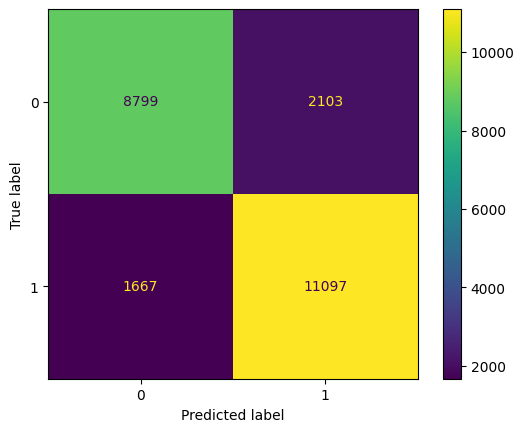

In [111]:
plot_confusion_matrix(gbc_optimized, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [112]:
print(classification_report(y_test_tfidf_ft, y_gbc_ft))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     10902
           1       0.84      0.87      0.85     12764

    accuracy                           0.84     23666
   macro avg       0.84      0.84      0.84     23666
weighted avg       0.84      0.84      0.84     23666



In [113]:
roc_auc_score(y_test_tfidf_ft, y_gbc_ft)

0.8382489612450538

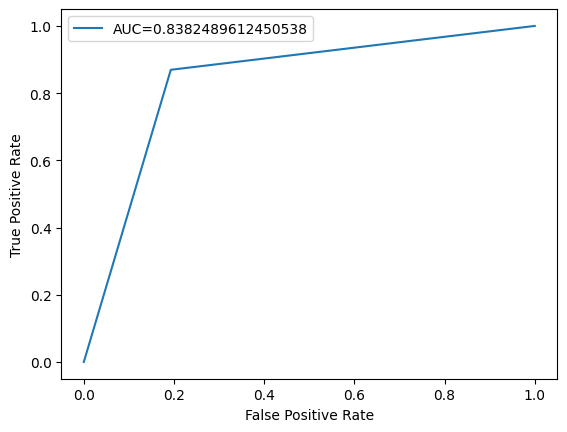

In [114]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_gbc_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_gbc_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### Hist Gradient Boosting Classifier

In [115]:
hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=1.0, max_depth=1, verbose = 2, random_state=95).fit(X_train_tfidf_ft, y_train_tfidf_ft)

Binning 3.659 GB of training data: 40.542 s
Binning 0.407 GB of validation data: 0.654 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.67292, val loss: 0.67287, in 0.283s
[2/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.66176, val loss: 0.66222, in 0.262s
[3/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.65391, val loss: 0.65408, in 0.262s
[4/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.64706, val loss: 0.64651, in 0.259s
[5/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.64100, val loss: 0.64080, in 0.267s
[6/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.63496, val loss: 0.63457, in 0.264s
[7/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.62907, val loss: 0.62944, in 0.261s
[8/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.62389, val loss: 0.62364, in 0.262s
[9/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.61868, val loss: 0.61794, in 0.268s
[10/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.614

[89/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49549, val loss: 0.49708, in 0.267s
[90/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49471, val loss: 0.49643, in 0.263s
[91/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49402, val loss: 0.49597, in 0.269s
[92/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49327, val loss: 0.49508, in 0.258s
[93/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49259, val loss: 0.49401, in 0.262s
[94/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49190, val loss: 0.49353, in 0.257s
[95/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49117, val loss: 0.49276, in 0.262s
[96/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.49052, val loss: 0.49230, in 0.265s
[97/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.48987, val loss: 0.49155, in 0.258s
[98/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.48910, val loss: 0.49092, in 0.261s
[99/100] 1 tree, 2 leaves, max depth = 1, train loss: 0.48839, val loss: 0.49038

In [118]:
y_hgbc = hgbc.predict(X_test_tfidf_ft)

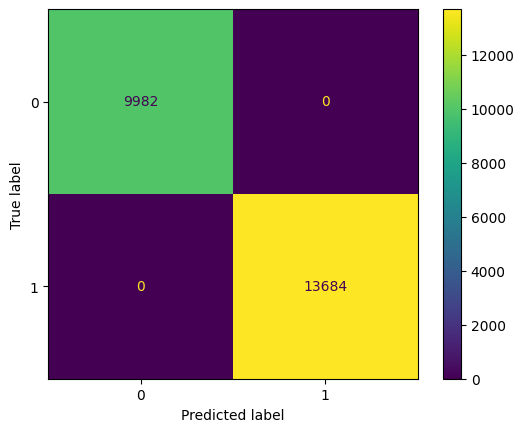

In [119]:
plot_confusion_matrix(hgbc, X_test_tfidf_ft, y_hgbc)  
plt.show()

In [120]:
print(classification_report(y_test_tfidf_ft, y_hgbc))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10902
           1       0.75      0.80      0.78     12764

    accuracy                           0.75     23666
   macro avg       0.75      0.74      0.75     23666
weighted avg       0.75      0.75      0.75     23666



In [121]:
roc_auc_score(y_test_tfidf_ft, y_hgbc)

0.7447911842844094

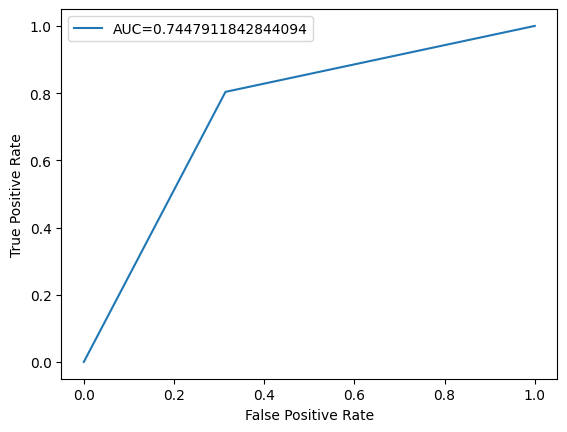

In [122]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_hgbc)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_hgbc)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Not bad. This is much faster than the other models. But, this was the most odd, and wrong, confusion matrix, of all the models I have used.

#### Hypertuning a Hist Gradient Boosting Classifier

In [148]:
hgbc_grid = {'model__loss' : ['log_loss'] , 'model__learning_rate' : [0.1, 0.15, 0.2, 0.25], 'model__max_iter': [215, 220, 225, 230, 245], 
                     'model__min_samples_leaf': [1, 3, 5], 'model__max_leaf_nodes' : [29, 31, 33, 35], 'model__max_depth' : [17, 19, 21, 23, 25]}

In [149]:
hgbc_pipe = Pipeline([('model', HistGradientBoostingClassifier(random_state = 95, verbose = 2))])

In [150]:
halving_cv_hgbc = HalvingRandomSearchCV(hgbc_pipe, hgbc_grid, scoring="f1", n_jobs=-1, min_resources=2222, max_resources = 90000, cv = 5, factor=3, verbose = 2, random_state = 95)

In [ ]:
halving_cv_hgbc.fit(X_train_tfidf_ft, y_train_tfidf_ft)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 2222
max_resources_: 90000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 40
n_resources: 2222
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Binning 0.034 GB of training data: Binning 0.034 GB of training data: Binning 0.034 GB of training data: Binning 0.034 GB of training data: Binning 0.034 GB of training data: Binning 0.034 GB of training data: Binning 0.034 GB of training data: Binning 0.034 GB of training data: 0.177 s
Fitting gradient boosted rounds:
[1/225] 0.201 s
Fitting gradient boosted rounds:
[1/230] 0.207 s
Fitting gradient boosted rounds:
[1/225] 0.208 s
Fitting gradient boosted rounds:
[1/225] 0.212 s
Fitting gradient boosted rounds:
[1/225] 0.212 s
Fitting gradient boosted rounds:
[1/230] 0.209 s
Fitting gradient boosted rounds:
[1/230] 0.214 s
Fitting gradient boosted rounds:
[1/225] 1 tree, 31 leaves, max depth = 23, in 0.386s
[2/225] 1 tree, 29

[19/225] 1 tree, 29 leaves, max depth = 21, in 0.296s
[19/230] 1 tree, 29 leaves, max depth = 21, in 0.311s
[19/230] 1 tree, 31 leaves, max depth = 23, in 0.317s
[19/225] 1 tree, 31 leaves, max depth = 23, in 0.312s
[19/225] 1 tree, 31 leaves, max depth = 23, in 0.355s
[19/225] 1 tree, 31 leaves, max depth = 23, in 0.344s
[19/225] 1 tree, 29 leaves, max depth = 21, in 0.303s
[20/230] 1 tree, 31 leaves, max depth = 23, in 0.350s
[20/225] 1 tree, 29 leaves, max depth = 21, in 0.277s
[20/230] 1 tree, 29 leaves, max depth = 21, in 0.309s
[20/230] 1 tree, 31 leaves, max depth = 23, in 0.300s
[20/225] 1 tree, 31 leaves, max depth = 23, in 0.302s
[20/225] 1 tree, 31 leaves, max depth = 23, in 0.307s
[20/225] 1 tree, 29 leaves, max depth = 21, in 0.328s
[21/230] 1 tree, 31 leaves, max depth = 23, in 0.373s
[20/225] 1 tree, 31 leaves, max depth = 23, in 0.308s
[21/225] 1 tree, 29 leaves, max depth = 21, in 0.277s
[21/230] 1 tree, 29 leaves, max depth = 21, in 0.312s
[21/230] 1 tree, 31 leaves, 

[37/225] 1 tree, 29 leaves, max depth = 21, in 0.292s
[40/230] 1 tree, 31 leaves, max depth = 23, in 0.320s
[38/225] 1 tree, 29 leaves, max depth = 21, in 0.277s
[40/230] 1 tree, 31 leaves, max depth = 23, in 0.341s
[37/225] 1 tree, 31 leaves, max depth = 23, in 0.352s
[37/225] 1 tree, 29 leaves, max depth = 21, in 0.298s
[40/230] 1 tree, 31 leaves, max depth = 23, in 0.336s
[38/225] 1 tree, 31 leaves, max depth = 23, in 0.354s
[38/225] 1 tree, 29 leaves, max depth = 21, in 0.283s
[41/230] 1 tree, 29 leaves, max depth = 21, in 0.263s
[41/230] 1 tree, 29 leaves, max depth = 21, in 0.308s
[41/230] 1 tree, 31 leaves, max depth = 23, in 0.354s
[39/225] 1 tree, 31 leaves, max depth = 23, in 0.352s
[38/225] 1 tree, 31 leaves, max depth = 23, in 0.324s
[39/225] 1 tree, 31 leaves, max depth = 23, in 0.345s
[38/225] 1 tree, 29 leaves, max depth = 21, in 0.265s
[42/230] 1 tree, 31 leaves, max depth = 23, in 0.377s
[39/225] 1 tree, 29 leaves, max depth = 21, in 0.297s
[42/230] 1 tree, 29 leaves, 

[55/225] 1 tree, 31 leaves, max depth = 23, in 0.293s
[55/225] 1 tree, 29 leaves, max depth = 21, in 0.285s
[61/230] 1 tree, 29 leaves, max depth = 21, in 0.282s
[61/230] 1 tree, 29 leaves, max depth = 21, in 0.308s
[61/230] 1 tree, 31 leaves, max depth = 23, in 0.318s
[56/225] 1 tree, 31 leaves, max depth = 23, in 0.357s
[55/225] 1 tree, 31 leaves, max depth = 23, in 0.347s
[56/225] 1 tree, 31 leaves, max depth = 23, in 0.357s
[56/225] 1 tree, 31 leaves, max depth = 23, in 0.318s
[56/225] 1 tree, 29 leaves, max depth = 21, in 0.297s
[62/230] 1 tree, 29 leaves, max depth = 21, in 0.297s
[62/230] 1 tree, 29 leaves, max depth = 21, in 0.310s
[62/230] 1 tree, 31 leaves, max depth = 23, in 0.307s
[57/225] 1 tree, 31 leaves, max depth = 23, in 0.331s
[56/225] 1 tree, 31 leaves, max depth = 23, in 0.287s
[57/225] 1 tree, 31 leaves, max depth = 23, in 0.368s
[57/225] 1 tree, 29 leaves, max depth = 21, in 0.292s
[63/230] 1 tree, 31 leaves, max depth = 23, in 0.371s
[57/225] 1 tree, 29 leaves, 

[82/230] 1 tree, 31 leaves, max depth = 23, in 0.326s
[74/225] 1 tree, 29 leaves, max depth = 21, in 0.254s
[82/230] 1 tree, 31 leaves, max depth = 23, in 0.332s
[73/225] 1 tree, 29 leaves, max depth = 21, in 0.278s
[83/230] 1 tree, 31 leaves, max depth = 23, in 0.342s
[74/225] 1 tree, 31 leaves, max depth = 23, in 0.311s
[75/225] 1 tree, 31 leaves, max depth = 23, in 0.356s
[75/225] 1 tree, 29 leaves, max depth = 21, in 0.315s
[83/230] 1 tree, 29 leaves, max depth = 21, in 0.278s
[83/230] 1 tree, 31 leaves, max depth = 23, in 0.383s
[75/225] 1 tree, 31 leaves, max depth = 23, in 0.332s
[74/225] 1 tree, 29 leaves, max depth = 21, in 0.292s
[84/230] 1 tree, 29 leaves, max depth = 21, in 0.260s
[84/230] 1 tree, 31 leaves, max depth = 23, in 0.355s
[75/225] 1 tree, 31 leaves, max depth = 23, in 0.347s
[76/225] 1 tree, 31 leaves, max depth = 23, in 0.354s
[76/225] 1 tree, 29 leaves, max depth = 21, in 0.266s
[84/230] 1 tree, 29 leaves, max depth = 21, in 0.284s
[85/230] 1 tree, 31 leaves, 

[92/225] 1 tree, 29 leaves, max depth = 21, in 0.323s
[103/230] 1 tree, 31 leaves, max depth = 23, in 0.361s
[92/225] 1 tree, 29 leaves, max depth = 21, in 0.304s
[103/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[92/225] 1 tree, 31 leaves, max depth = 23, in 0.362s
[93/225] 1 tree, 31 leaves, max depth = 23, in 0.313s
[92/225] 1 tree, 29 leaves, max depth = 21, in 0.318s
[103/230] 1 tree, 31 leaves, max depth = 23, in 0.341s
[93/225] 1 tree, 29 leaves, max depth = 21, in 0.284s
[104/230] 1 tree, 29 leaves, max depth = 21, in 0.278s
[104/230] 1 tree, 31 leaves, max depth = 23, in 0.315s
[93/225] 1 tree, 31 leaves, max depth = 23, in 0.333s
[94/225] 1 tree, 31 leaves, max depth = 23, in 0.363s
[93/225] 1 tree, 29 leaves, max depth = 21, in 0.299s
[104/230] 1 tree, 29 leaves, max depth = 21, in 0.280s
[105/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[93/225] 1 tree, 29 leaves, max depth = 21, in 0.256s
[105/230] 1 tree, 31 leaves, max depth = 23, in 0.354s
[94/225] 1 tree, 31 

[122/230] 1 tree, 31 leaves, max depth = 23, in 0.358s
[109/225] 1 tree, 29 leaves, max depth = 21, in 0.266s
[124/230] 1 tree, 31 leaves, max depth = 23, in 0.341s
[111/225] 1 tree, 31 leaves, max depth = 23, in 0.335s
[111/225] 1 tree, 31 leaves, max depth = 23, in 0.301s
[110/225] 1 tree, 29 leaves, max depth = 21, in 0.284s
[124/230] 1 tree, 29 leaves, max depth = 21, in 0.295s
[123/230] 1 tree, 31 leaves, max depth = 23, in 0.341s
[110/225] 1 tree, 29 leaves, max depth = 21, in 0.269s
[125/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[110/225] 1 tree, 31 leaves, max depth = 23, in 0.342s
[112/225] 1 tree, 31 leaves, max depth = 23, in 0.354s
[111/225] 1 tree, 31 leaves, max depth = 23, in 0.365s
[112/225] 1 tree, 29 leaves, max depth = 21, in 0.340s
[125/230] 1 tree, 29 leaves, max depth = 21, in 0.333s
[124/230] 1 tree, 29 leaves, max depth = 23, in 0.320s
[111/225] 1 tree, 31 leaves, max depth = 23, in 0.300s
[111/225] 1 tree, 29 leaves, max depth = 21, in 0.339s
[126/230] 

[144/230] 1 tree, 31 leaves, max depth = 23, in 0.401s
[129/225] 1 tree, 31 leaves, max depth = 23, in 0.326s
[127/225] 1 tree, 29 leaves, max depth = 21, in 0.294s
[144/230] 1 tree, 31 leaves, max depth = 23, in 0.365s
[128/225] 1 tree, 29 leaves, max depth = 21, in 0.278s
[143/230] 1 tree, 31 leaves, max depth = 23, in 0.343s
[129/225] 1 tree, 29 leaves, max depth = 21, in 0.295s
[145/230] 1 tree, 31 leaves, max depth = 23, in 0.383s
[128/225] 1 tree, 31 leaves, max depth = 23, in 0.335s
[128/225] 1 tree, 29 leaves, max depth = 21, in 0.350s
[145/230] 1 tree, 31 leaves, max depth = 23, in 0.349s
[129/225] 1 tree, 31 leaves, max depth = 23, in 0.388s
[130/225] 1 tree, 29 leaves, max depth = 21, in 0.356s
[144/230] 1 tree, 31 leaves, max depth = 23, in 0.315s
[130/225] 1 tree, 29 leaves, max depth = 21, in 0.272s
[146/230] 1 tree, 31 leaves, max depth = 23, in 0.346s
[129/225] 1 tree, 29 leaves, max depth = 21, in 0.278s
[146/230] 1 tree, 31 leaves, max depth = 23, in 0.345s
[129/225] 

[164/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[145/225] 1 tree, 29 leaves, max depth = 21, in 0.273s
[165/230] 1 tree, 31 leaves, max depth = 23, in 0.323s
[147/225] 1 tree, 31 leaves, max depth = 23, in 0.300s
[146/225] 1 tree, 29 leaves, max depth = 21, in 0.278s
[164/230] 1 tree, 31 leaves, max depth = 23, in 0.336s
[146/225] 1 tree, 29 leaves, max depth = 21, in 0.305s
[165/230] 1 tree, 31 leaves, max depth = 23, in 0.338s
[147/225] 1 tree, 29 leaves, max depth = 21, in 0.269s
[166/230] 1 tree, 31 leaves, max depth = 23, in 0.367s
[146/225] 1 tree, 31 leaves, max depth = 23, in 0.327s
[147/225] 1 tree, 31 leaves, max depth = 23, in 0.372s
[148/225] 1 tree, 29 leaves, max depth = 21, in 0.290s
[166/230] 1 tree, 29 leaves, max depth = 21, in 0.330s
[165/230] 1 tree, 31 leaves, max depth = 23, in 0.337s
[147/225] 1 tree, 31 leaves, max depth = 23, in 0.365s
[148/225] 1 tree, 29 leaves, max depth = 21, in 0.317s
[167/230] 1 tree, 31 leaves, max depth = 23, in 0.329s
[147/225] 

[163/225] 1 tree, 28 leaves, max depth = 23, in 0.253s
[163/225] 1 tree, 31 leaves, max depth = 23, in 0.269s
[165/225] 1 tree, 29 leaves, max depth = 21, in 0.302s
[186/230] 1 tree, 29 leaves, max depth = 21, in 0.299s
[185/230] 1 tree, 31 leaves, max depth = 23, in 0.344s
[164/225] 1 tree, 31 leaves, max depth = 23, in 0.346s
[165/225] 1 tree, 29 leaves, max depth = 21, in 0.330s
[184/230] 1 tree, 31 leaves, max depth = 23, in 0.278s
[164/225] 1 tree, 31 leaves, max depth = 23, in 0.365s
[164/225] 1 tree, 31 leaves, max depth = 23, in 0.313s
[166/225] 1 tree, 29 leaves, max depth = 21, in 0.268s
[187/230] 1 tree, 29 leaves, max depth = 21, in 0.311s
[186/230] 1 tree, 29 leaves, max depth = 21, in 0.327s
[185/230] 1 tree, 31 leaves, max depth = 23, in 0.355s
[165/225] 1 tree, 31 leaves, max depth = 23, in 0.340s
[166/225] 1 tree, 29 leaves, max depth = 23, in 0.324s
[165/225] 1 tree, 31 leaves, max depth = 23, in 0.343s
[165/225] 1 tree, 31 leaves, max depth = 23, in 0.343s
[167/225] 

[206/230] 1 tree, 31 leaves, max depth = 23, in 0.358s
[183/225] 1 tree, 29 leaves, max depth = 21, in 0.321s
[206/230] 1 tree, 29 leaves, max depth = 21, in 0.305s
[204/230] 1 tree, 31 leaves, max depth = 23, in 0.349s
[182/225] 1 tree, 31 leaves, max depth = 23, in 0.361s
[182/225] 1 tree, 31 leaves, max depth = 23, in 0.378s
[182/225] 1 tree, 29 leaves, max depth = 21, in 0.301s
[207/230] 1 tree, 31 leaves, max depth = 23, in 0.351s
[184/225] 1 tree, 29 leaves, max depth = 21, in 0.282s
[207/230] 1 tree, 31 leaves, max depth = 23, in 0.358s
[184/225] 1 tree, 29 leaves, max depth = 21, in 0.271s
[208/230] 1 tree, 29 leaves, max depth = 21, in 0.308s
[205/230] 1 tree, 31 leaves, max depth = 23, in 0.355s
[183/225] 1 tree, 31 leaves, max depth = 23, in 0.347s
[183/225] 1 tree, 31 leaves, max depth = 23, in 0.341s
[185/225] 1 tree, 31 leaves, max depth = 23, in 0.367s
[183/225] 1 tree, 29 leaves, max depth = 21, in 0.311s
[208/230] 1 tree, 31 leaves, max depth = 23, in 0.284s
[185/225] 

[200/225] 1 tree, 29 leaves, max depth = 21, in 0.309s
[223/230] 1 tree, 31 leaves, max depth = 23, in 0.340s
[200/225] 1 tree, 31 leaves, max depth = 23, in 0.355s
[200/225] 1 tree, 29 leaves, max depth = 21, in 0.310s
[227/230] 1 tree, 31 leaves, max depth = 23, in 0.354s
[202/225] 1 tree, 29 leaves, max depth = 21, in 0.325s
[228/230] 1 tree, 31 leaves, max depth = 23, in 0.373s
[202/225] 1 tree, 29 leaves, max depth = 21, in 0.290s
[224/230] 1 tree, 31 leaves, max depth = 23, in 0.354s
[201/225] 1 tree, 31 leaves, max depth = 23, in 0.357s
[201/225] 1 tree, 31 leaves, max depth = 23, in 0.297s
[201/225] 1 tree, 29 leaves, max depth = 21, in 0.327s
[228/230] 1 tree, 31 leaves, max depth = 23, in 0.320s
[203/225] 1 tree, 29 leaves, max depth = 21, in 0.302s
[229/230] 1 tree, 31 leaves, max depth = 23, in 0.302s
[203/225] 1 tree, 29 leaves, max depth = 21, in 0.312s
[225/230] 1 tree, 31 leaves, max depth = 23, in 0.339s
[202/225] 1 tree, 31 leaves, max depth = 23, in 0.318s
[202/225] 

[9/230] 1 tree, 31 leaves, max depth = 23, in 0.311s
[218/225] 1 tree, 31 leaves, max depth = 19, in 0.301s
[6/220] 1 tree, 31 leaves, max depth = 23, in 0.342s
[220/225] 1 tree, 29 leaves, max depth = 21, in 0.309s
[10/230] 1 tree, 31 leaves, max depth = 23, in 0.339s
[219/225] 1 tree, 31 leaves, max depth = 23, in 0.373s
[219/225] 1 tree, 29 leaves, max depth = 21, in 0.316s
[10/230] 1 tree, 31 leaves, max depth = 23, in 0.282s
[219/225] 1 tree, 31 leaves, max depth = 23, in 0.365s
[220/225] 1 tree, 31 leaves, max depth = 19, in 0.303s
[7/220] 1 tree, 29 leaves, max depth = 21, in 0.282s
[11/230] 1 tree, 31 leaves, max depth = 23, in 0.372s
[221/225] 1 tree, 31 leaves, max depth = 23, in 0.356s
[220/225] 1 tree, 31 leaves, max depth = 23, in 0.330s
[220/225] 1 tree, 29 leaves, max depth = 21, in 0.325s
[11/230] 1 tree, 31 leaves, max depth = 23, in 0.346s
[221/225] 1 tree, 31 leaves, max depth = 23, in 0.375s
[220/225] 1 tree, 31 leaves, max depth = 19, in 0.286s
[8/220] 1 tree, 29 l

[29/230] 1 tree, 31 leaves, max depth = 19, in 0.346s
[25/220] 1 tree, 31 leaves, max depth = 23, in 0.319s
[3/230] 1 tree, 29 leaves, max depth = 21, in 0.285s
[30/230] 1 tree, 31 leaves, max depth = 19, in 0.346s
[3/220] 1 tree, 31 leaves, max depth = 19, in 0.324s
[4/220] 1 tree, 31 leaves, max depth = 19, in 0.319s
[6/220] 1 tree, 29 leaves, max depth = 21, in 0.313s
[30/230] 1 tree, 31 leaves, max depth = 19, in 0.330s
[5/220] 1 tree, 31 leaves, max depth = 19, in 0.314s
[26/220] 1 tree, 29 leaves, max depth = 21, in 0.297s
[31/230] 1 tree, 31 leaves, max depth = 19, in 0.312s
[4/220] 1 tree, 31 leaves, max depth = 23, in 0.343s
[4/230] 1 tree, 31 leaves, max depth = 19, in 0.326s
[5/220] 1 tree, 29 leaves, max depth = 21, in 0.300s
[31/230] 1 tree, 31 leaves, max depth = 19, in 0.346s
[7/220] 1 tree, 31 leaves, max depth = 19, in 0.331s
[6/220] 1 tree, 31 leaves, max depth = 19, in 0.290s
[27/220] 1 tree, 29 leaves, max depth = 21, in 0.299s
[32/230] 1 tree, 31 leaves, max depth 

[50/230] 1 tree, 31 leaves, max depth = 23, in 0.294s
[22/230] 1 tree, 31 leaves, max depth = 19, in 0.340s
[24/220] 1 tree, 29 leaves, max depth = 21, in 0.313s
[50/230] 1 tree, 31 leaves, max depth = 19, in 0.339s
[22/220] 1 tree, 31 leaves, max depth = 19, in 0.313s
[44/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[23/220] 1 tree, 31 leaves, max depth = 19, in 0.332s
[25/220] 1 tree, 29 leaves, max depth = 21, in 0.304s
[51/230] 1 tree, 29 leaves, max depth = 21, in 0.270s
[51/230] 1 tree, 31 leaves, max depth = 19, in 0.307s
[25/220] 1 tree, 31 leaves, max depth = 23, in 0.364s
[23/230] 1 tree, 31 leaves, max depth = 19, in 0.314s
[23/220] 1 tree, 31 leaves, max depth = 19, in 0.304s
[26/220] 1 tree, 31 leaves, max depth = 19, in 0.323s
[24/220] 1 tree, 29 leaves, max depth = 21, in 0.306s
[52/230] 1 tree, 31 leaves, max depth = 19, in 0.355s
[45/220] 1 tree, 29 leaves, max depth = 21, in 0.293s
[52/230] 1 tree, 31 leaves, max depth = 19, in 0.304s
[26/220] 1 tree, 31 leaves, 

[70/230] 1 tree, 31 leaves, max depth = 19, in 0.389s
[42/220] 1 tree, 31 leaves, max depth = 19, in 0.323s
[42/220] 1 tree, 31 leaves, max depth = 23, in 0.357s
[40/230] 1 tree, 29 leaves, max depth = 21, in 0.286s
[73/230] 1 tree, 29 leaves, max depth = 19, in 0.273s
[63/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[42/220] 1 tree, 31 leaves, max depth = 19, in 0.324s
[44/220] 1 tree, 29 leaves, max depth = 21, in 0.297s
[71/230] 1 tree, 31 leaves, max depth = 19, in 0.336s
[43/220] 1 tree, 29 leaves, max depth = 19, in 0.280s
[43/220] 1 tree, 29 leaves, max depth = 21, in 0.255s
[74/230] 1 tree, 31 leaves, max depth = 23, in 0.328s
[41/230] 1 tree, 28 leaves, max depth = 19, in 0.243s
[45/220] 1 tree, 31 leaves, max depth = 19, in 0.330s
[43/220] 1 tree, 29 leaves, max depth = 21, in 0.284s
[72/230] 1 tree, 31 leaves, max depth = 19, in 0.371s
[64/220] 1 tree, 28 leaves, max depth = 19, in 0.267s
[44/220] 1 tree, 29 leaves, max depth = 21, in 0.277s
[75/230] 1 tree, 31 leaves, 

[60/220] 1 tree, 31 leaves, max depth = 19, in 0.321s
[63/220] 1 tree, 31 leaves, max depth = 19, in 0.369s
[81/220] 1 tree, 31 leaves, max depth = 19, in 0.337s
[61/220] 1 tree, 31 leaves, max depth = 23, in 0.341s
[58/230] 1 tree, 29 leaves, max depth = 21, in 0.305s
[92/230] 1 tree, 31 leaves, max depth = 19, in 0.291s
[62/220] 1 tree, 31 leaves, max depth = 19, in 0.294s
[61/220] 1 tree, 29 leaves, max depth = 21, in 0.327s
[94/230] 1 tree, 31 leaves, max depth = 19, in 0.274s
[64/220] 1 tree, 31 leaves, max depth = 19, in 0.328s
[62/220] 1 tree, 31 leaves, max depth = 23, in 0.317s
[59/230] 1 tree, 27 leaves, max depth = 19, in 0.259s
[63/220] 1 tree, 31 leaves, max depth = 19, in 0.365s
[82/220] 1 tree, 29 leaves, max depth = 21, in 0.304s
[93/230] 1 tree, 29 leaves, max depth = 21, in 0.256s
[95/230] 1 tree, 31 leaves, max depth = 19, in 0.310s
[62/220] 1 tree, 31 leaves, max depth = 19, in 0.305s
[65/220] 1 tree, 29 leaves, max depth = 19, in 0.278s
[64/220] 1 tree, 31 leaves, 

[75/230] 1 tree, 29 leaves, max depth = 21, in 0.272s
[113/230] 1 tree, 27 leaves, max depth = 19, in 0.249s
[82/220] 1 tree, 31 leaves, max depth = 19, in 0.313s
[81/220] 1 tree, 31 leaves, max depth = 19, in 0.285s
[80/220] 1 tree, 29 leaves, max depth = 21, in 0.293s
[112/230] 1 tree, 31 leaves, max depth = 19, in 0.281s
[79/220] 1 tree, 31 leaves, max depth = 19, in 0.315s
[101/220] 1 tree, 30 leaves, max depth = 23, in 0.320s
[76/230] 1 tree, 31 leaves, max depth = 19, in 0.254s
[83/220] 1 tree, 29 leaves, max depth = 20, in 0.275s
[114/230] 1 tree, 29 leaves, max depth = 21, in 0.272s
[113/230] 1 tree, 30 leaves, max depth = 19, in 0.296s
[81/220] 1 tree, 30 leaves, max depth = 19, in 0.293s
[102/220] 1 tree, 31 leaves, max depth = 19, in 0.322s
[82/220] 1 tree, 31 leaves, max depth = 19, in 0.336s
[80/220] 1 tree, 31 leaves, max depth = 23, in 0.303s
[77/230] 1 tree, 29 leaves, max depth = 21, in 0.265s
[115/230] 1 tree, 31 leaves, max depth = 19, in 0.333s
[84/220] 1 tree, 29 l

[93/230] 1 tree, 31 leaves, max depth = 19, in 0.389s
[120/220] 1 tree, 31 leaves, max depth = 19, in 0.349s
[101/220] 1 tree, 29 leaves, max depth = 21, in 0.279s
[134/230] 1 tree, 31 leaves, max depth = 19, in 0.348s
[97/220] 1 tree, 29 leaves, max depth = 21, in 0.306s
[132/230] 1 tree, 31 leaves, max depth = 19, in 0.374s
[100/220] 1 tree, 31 leaves, max depth = 23, in 0.274s
[94/230] 1 tree, 31 leaves, max depth = 19, in 0.356s
[99/220] 1 tree, 31 leaves, max depth = 19, in 0.286s
[102/220] 1 tree, 31 leaves, max depth = 19, in 0.344s
[121/220] 1 tree, 29 leaves, max depth = 21, in 0.362s
[135/230] 1 tree, 29 leaves, max depth = 21, in 0.326s
[133/230] 1 tree, 31 leaves, max depth = 19, in 0.384s
[98/220] 1 tree, 31 leaves, max depth = 19, in 0.392s
[101/220] 1 tree, 31 leaves, max depth = 23, in 0.398s
[95/230] 1 tree, 31 leaves, max depth = 19, in 0.399s
[100/220] 1 tree, 31 leaves, max depth = 19, in 0.351s
[103/220] 1 tree, 29 leaves, max depth = 21, in 0.314s
[134/230] 1 tree

[115/220] 1 tree, 31 leaves, max depth = 19, in 0.334s
[118/220] 1 tree, 29 leaves, max depth = 21, in 0.259s
[152/230] 1 tree, 31 leaves, max depth = 19, in 0.306s
[117/220] 1 tree, 31 leaves, max depth = 19, in 0.295s
[120/220] 1 tree, 29 leaves, max depth = 21, in 0.272s
[154/230] 1 tree, 31 leaves, max depth = 19, in 0.258s
[139/220] 1 tree, 31 leaves, max depth = 23, in 0.329s
[111/230] 1 tree, 31 leaves, max depth = 19, in 0.351s
[116/220] 1 tree, 29 leaves, max depth = 21, in 0.259s
[153/230] 1 tree, 31 leaves, max depth = 19, in 0.293s
[119/220] 1 tree, 29 leaves, max depth = 19, in 0.305s
[118/220] 1 tree, 31 leaves, max depth = 19, in 0.275s
[121/220] 1 tree, 31 leaves, max depth = 19, in 0.286s
[140/220] 1 tree, 29 leaves, max depth = 21, in 0.301s
[155/230] 1 tree, 31 leaves, max depth = 23, in 0.341s
[112/230] 1 tree, 31 leaves, max depth = 19, in 0.311s
[117/220] 1 tree, 29 leaves, max depth = 21, in 0.304s
[154/230] 1 tree, 31 leaves, max depth = 19, in 0.314s
[120/220] 

[172/230] 1 tree, 29 leaves, max depth = 21, in 0.274s
[173/230] 1 tree, 31 leaves, max depth = 19, in 0.304s
[134/220] 1 tree, 31 leaves, max depth = 19, in 0.320s
[139/220] 1 tree, 31 leaves, max depth = 23, in 0.391s
[128/230] 1 tree, 30 leaves, max depth = 19, in 0.280s
[158/220] 1 tree, 31 leaves, max depth = 19, in 0.326s
[136/220] 1 tree, 31 leaves, max depth = 19, in 0.342s
[138/220] 1 tree, 29 leaves, max depth = 21, in 0.351s
[173/230] 1 tree, 31 leaves, max depth = 19, in 0.259s
[135/220] 1 tree, 29 leaves, max depth = 21, in 0.276s
[174/230] 1 tree, 31 leaves, max depth = 19, in 0.334s
[140/220] 1 tree, 31 leaves, max depth = 19, in 0.296s
[159/220] 1 tree, 31 leaves, max depth = 23, in 0.329s
[129/230] 1 tree, 31 leaves, max depth = 19, in 0.273s
[139/220] 1 tree, 31 leaves, max depth = 19, in 0.298s
[137/220] 1 tree, 29 leaves, max depth = 21, in 0.284s
[174/230] 1 tree, 29 leaves, max depth = 21, in 0.260s
[175/230] 1 tree, 31 leaves, max depth = 19, in 0.321s
[136/220] 

[194/230] 1 tree, 31 leaves, max depth = 19, in 0.333s
[177/220] 1 tree, 31 leaves, max depth = 19, in 0.317s
[159/220] 1 tree, 31 leaves, max depth = 19, in 0.332s
[153/220] 1 tree, 31 leaves, max depth = 19, in 0.311s
[156/220] 1 tree, 29 leaves, max depth = 21, in 0.341s
[192/230] 1 tree, 29 leaves, max depth = 21, in 0.253s
[195/230] 1 tree, 31 leaves, max depth = 23, in 0.301s
[146/230] 1 tree, 30 leaves, max depth = 19, in 0.296s
[156/220] 1 tree, 31 leaves, max depth = 19, in 0.294s
[178/220] 1 tree, 29 leaves, max depth = 21, in 0.283s
[193/230] 1 tree, 31 leaves, max depth = 19, in 0.300s
[154/220] 1 tree, 31 leaves, max depth = 19, in 0.349s
[160/220] 1 tree, 31 leaves, max depth = 19, in 0.357s
[157/220] 1 tree, 29 leaves, max depth = 21, in 0.288s
[196/230] 1 tree, 31 leaves, max depth = 23, in 0.324s
[147/230] 1 tree, 31 leaves, max depth = 19, in 0.321s
[157/220] 1 tree, 31 leaves, max depth = 19, in 0.272s
[155/220] 1 tree, 31 leaves, max depth = 19, in 0.334s
[179/220] 

[177/220] 1 tree, 29 leaves, max depth = 21, in 0.275s
[212/230] 1 tree, 31 leaves, max depth = 19, in 0.326s
[175/220] 1 tree, 28 leaves, max depth = 19, in 0.253s
[173/220] 1 tree, 29 leaves, max depth = 21, in 0.295s
[215/230] 1 tree, 21 leaves, max depth = 19, in 0.230s
[175/220] 1 tree, 31 leaves, max depth = 19, in 0.300s
[197/220] 1 tree, 31 leaves, max depth = 23, in 0.294s
[164/230] 1 tree, 31 leaves, max depth = 19, in 0.304s
[178/220] 1 tree, 29 leaves, max depth = 21, in 0.241s
[213/230] 1 tree, 29 leaves, max depth = 21, in 0.274s
[216/230] 1 tree, 31 leaves, max depth = 19, in 0.306s
[174/220] 1 tree, 31 leaves, max depth = 19, in 0.329s
[176/220] 1 tree, 31 leaves, max depth = 19, in 0.298s
[176/220] 1 tree, 31 leaves, max depth = 19, in 0.301s
[198/220] 1 tree, 31 leaves, max depth = 23, in 0.334s
[165/230] 1 tree, 31 leaves, max depth = 19, in 0.326s
[179/220] 1 tree, 29 leaves, max depth = 21, in 0.328s
[214/230] 1 tree, 29 leaves, max depth = 21, in 0.265s
[217/230] 

[216/220] 1 tree, 31 leaves, max depth = 19, in 0.318s
[197/220] 1 tree, 31 leaves, max depth = 19, in 0.292s
[196/220] 1 tree, 31 leaves, max depth = 19, in 0.278s
[195/220] 1 tree, 31 leaves, max depth = 23, in 0.322s
[182/230] 1 tree, 31 leaves, max depth = 19, in 0.314s
[193/220] 1 tree, 31 leaves, max depth = 19, in 0.288s
[217/220] 1 tree, 31 leaves, max depth = 19, in 0.337s
[198/220] 1 tree, 31 leaves, max depth = 19, in 0.361s
[197/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[196/220] 1 tree, 31 leaves, max depth = 19, in 0.324s
[194/220] 1 tree, 31 leaves, max depth = 23, in 0.340s
[183/230] 1 tree, 31 leaves, max depth = 19, in 0.334s
[218/220] 1 tree, 29 leaves, max depth = 21, in 0.344s
Fit 230 trees in 66.209 s, (6670 total leaves)
Time spent computing histograms: 50.174s
Time spent finding best splits:  5.906s
Time spent applying splits:      0.486s
Time spent predicting:           0.014s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=lo

[8/230] 1 tree, 31 leaves, max depth = 23, in 0.360s
[198/230] 1 tree, 31 leaves, max depth = 19, in 0.348s
[210/220] 1 tree, 31 leaves, max depth = 19, in 0.329s
[212/220] 1 tree, 30 leaves, max depth = 19, in 0.284s
[213/220] 1 tree, 31 leaves, max depth = 23, in 0.355s
[14/230] 1 tree, 31 leaves, max depth = 19, in 0.325s
[215/220] 1 tree, 31 leaves, max depth = 23, in 0.290s
[17/230] 1 tree, 31 leaves, max depth = 23, in 0.295s
[9/230] 1 tree, 31 leaves, max depth = 19, in 0.324s
[211/220] 1 tree, 31 leaves, max depth = 19, in 0.317s
[213/220] 1 tree, 31 leaves, max depth = 19, in 0.291s
[214/220] 1 tree, 31 leaves, max depth = 23, in 0.358s
[199/230] 1 tree, 31 leaves, max depth = 23, in 0.327s
[15/230] 1 tree, 31 leaves, max depth = 19, in 0.335s
[216/220] 1 tree, 31 leaves, max depth = 23, in 0.342s
[18/230] 1 tree, 31 leaves, max depth = 23, in 0.326s
[10/230] 1 tree, 31 leaves, max depth = 19, in 0.286s
[212/220] 1 tree, 31 leaves, max depth = 19, in 0.270s
[215/220] 1 tree, 3

[26/230] 1 tree, 31 leaves, max depth = 23, in 0.328s
[32/230] 1 tree, 29 leaves, max depth = 21, in 0.339s
[6/230] 1 tree, 29 leaves, max depth = 21, in 0.299s
[3/230] 1 tree, 31 leaves, max depth = 23, in 0.350s
[34/230] 1 tree, 31 leaves, max depth = 23, in 0.334s
[8/230] 1 tree, 31 leaves, max depth = 23, in 0.348s
[216/230] 1 tree, 29 leaves, max depth = 21, in 0.359s
[4/230] 1 tree, 31 leaves, max depth = 23, in 0.300s
[33/230] 1 tree, 31 leaves, max depth = 23, in 0.348s
[27/230] 1 tree, 31 leaves, max depth = 23, in 0.284s
[35/230] 1 tree, 29 leaves, max depth = 21, in 0.346s
[7/230] 1 tree, 29 leaves, max depth = 21, in 0.315s
[4/230] 1 tree, 31 leaves, max depth = 23, in 0.357s
[9/230] 1 tree, 29 leaves, max depth = 21, in 0.338s
[5/230] 1 tree, 31 leaves, max depth = 23, in 0.382s
[217/230] 1 tree, 31 leaves, max depth = 23, in 0.364s
[34/230] 1 tree, 31 leaves, max depth = 23, in 0.361s
[28/230] 1 tree, 31 leaves, max depth = 23, in 0.356s
[36/230] 1 tree, 29 leaves, max de

[24/230] 1 tree, 29 leaves, max depth = 21, in 0.314s
[26/230] 1 tree, 31 leaves, max depth = 23, in 0.485s
[53/230] 1 tree, 31 leaves, max depth = 23, in 0.287s
[28/230] 1 tree, 31 leaves, max depth = 23, in 0.366s
[46/230] 1 tree, 29 leaves, max depth = 21, in 0.292s
[24/230] 1 tree, 31 leaves, max depth = 23, in 0.335s
[52/230] 1 tree, 29 leaves, max depth = 21, in 0.287s
[25/230] 1 tree, 29 leaves, max depth = 21, in 0.292s
[27/230] 1 tree, 31 leaves, max depth = 23, in 0.319s
[54/230] 1 tree, 31 leaves, max depth = 23, in 0.270s
[47/230] 1 tree, 31 leaves, max depth = 23, in 0.346s
[29/230] 1 tree, 29 leaves, max depth = 21, in 0.295s
[25/230] 1 tree, 29 leaves, max depth = 21, in 0.277s
[26/230] 1 tree, 31 leaves, max depth = 23, in 0.331s
[53/230] 1 tree, 29 leaves, max depth = 21, in 0.294s
[28/230] 1 tree, 31 leaves, max depth = 23, in 0.277s
[48/230] 1 tree, 31 leaves, max depth = 23, in 0.330s
[55/230] 1 tree, 29 leaves, max depth = 20, in 0.281s
[26/230] 1 tree, 31 leaves, 

[63/230] 1 tree, 31 leaves, max depth = 23, in 0.306s
[71/230] 1 tree, 29 leaves, max depth = 21, in 0.294s
[45/230] 1 tree, 29 leaves, max depth = 21, in 0.278s
[17/230] 1 tree, 29 leaves, max depth = 21, in 0.312s
[44/230] 1 tree, 29 leaves, max depth = 21, in 0.281s
[43/230] 1 tree, 31 leaves, max depth = 23, in 0.322s
[46/230] 1 tree, 31 leaves, max depth = 23, in 0.342s
[70/230] 1 tree, 31 leaves, max depth = 23, in 0.324s
[64/230] 1 tree, 31 leaves, max depth = 23, in 0.300s
[72/230] 1 tree, 29 leaves, max depth = 21, in 0.310s
[46/230] 1 tree, 29 leaves, max depth = 21, in 0.296s
[18/230] 1 tree, 29 leaves, max depth = 21, in 0.274s
[44/230] 1 tree, 29 leaves, max depth = 20, in 0.334s
[45/230] 1 tree, 31 leaves, max depth = 23, in 0.319s
[47/230] 1 tree, 31 leaves, max depth = 23, in 0.326s
[71/230] 1 tree, 31 leaves, max depth = 23, in 0.278s
[65/230] 1 tree, 31 leaves, max depth = 23, in 0.331s
[73/230] 1 tree, 29 leaves, max depth = 21, in 0.274s
[19/230] 1 tree, 29 leaves, 

[90/230] 1 tree, 29 leaves, max depth = 21, in 0.288s
[37/230] 1 tree, 29 leaves, max depth = 17, in 0.314s
[65/230] 1 tree, 31 leaves, max depth = 23, in 0.318s
[64/230] 1 tree, 31 leaves, max depth = 23, in 0.264s
[88/230] 1 tree, 31 leaves, max depth = 23, in 0.316s
[82/230] 1 tree, 29 leaves, max depth = 21, in 0.293s
[63/230] 1 tree, 29 leaves, max depth = 21, in 0.291s
[64/230] 1 tree, 31 leaves, max depth = 23, in 0.256s
[91/230] 1 tree, 29 leaves, max depth = 21, in 0.298s
[38/230] 1 tree, 29 leaves, max depth = 21, in 0.324s
[66/230] 1 tree, 31 leaves, max depth = 23, in 0.332s
[89/230] 1 tree, 31 leaves, max depth = 23, in 0.324s
[83/230] 1 tree, 31 leaves, max depth = 23, in 0.345s
[65/230] 1 tree, 29 leaves, max depth = 21, in 0.291s
[64/230] 1 tree, 29 leaves, max depth = 21, in 0.305s
[65/230] 1 tree, 31 leaves, max depth = 23, in 0.315s
[92/230] 1 tree, 29 leaves, max depth = 21, in 0.284s
[39/230] 1 tree, 29 leaves, max depth = 21, in 0.303s
[67/230] 1 tree, 31 leaves, 

[109/230] 1 tree, 31 leaves, max depth = 23, in 0.267s
[100/230] 1 tree, 29 leaves, max depth = 21, in 0.279s
[85/230] 1 tree, 31 leaves, max depth = 23, in 0.322s
[82/230] 1 tree, 31 leaves, max depth = 23, in 0.318s
[107/230] 1 tree, 29 leaves, max depth = 21, in 0.326s
[57/230] 1 tree, 29 leaves, max depth = 21, in 0.307s
[83/230] 1 tree, 29 leaves, max depth = 21, in 0.312s
[84/230] 1 tree, 31 leaves, max depth = 23, in 0.259s
[110/230] 1 tree, 29 leaves, max depth = 21, in 0.314s
[86/230] 1 tree, 31 leaves, max depth = 23, in 0.343s
[101/230] 1 tree, 31 leaves, max depth = 23, in 0.266s
[83/230] 1 tree, 31 leaves, max depth = 23, in 0.320s
[108/230] 1 tree, 29 leaves, max depth = 21, in 0.297s
[58/230] 1 tree, 29 leaves, max depth = 21, in 0.282s
[84/230] 1 tree, 29 leaves, max depth = 21, in 0.297s
[85/230] 1 tree, 31 leaves, max depth = 23, in 0.307s
[111/230] 1 tree, 29 leaves, max depth = 21, in 0.304s
[87/230] 1 tree, 31 leaves, max depth = 23, in 0.338s
[102/230] 1 tree, 31 

[100/230] 1 tree, 29 leaves, max depth = 21, in 0.317s
[103/230] 1 tree, 29 leaves, max depth = 21, in 0.316s
[105/230] 1 tree, 31 leaves, max depth = 23, in 0.362s
[128/230] 1 tree, 31 leaves, max depth = 23, in 0.320s
[119/230] 1 tree, 29 leaves, max depth = 21, in 0.321s
[103/230] 1 tree, 29 leaves, max depth = 21, in 0.296s
[77/230] 1 tree, 31 leaves, max depth = 23, in 0.332s
[126/230] 1 tree, 31 leaves, max depth = 23, in 0.368s
[101/230] 1 tree, 29 leaves, max depth = 21, in 0.294s
[104/230] 1 tree, 29 leaves, max depth = 21, in 0.304s
[106/230] 1 tree, 31 leaves, max depth = 23, in 0.335s
[129/230] 1 tree, 29 leaves, max depth = 21, in 0.308s
[104/230] 1 tree, 31 leaves, max depth = 23, in 0.365s
[120/230] 1 tree, 29 leaves, max depth = 21, in 0.310s
[78/230] 1 tree, 31 leaves, max depth = 23, in 0.308s
[127/230] 1 tree, 29 leaves, max depth = 21, in 0.291s
[105/230] 1 tree, 29 leaves, max depth = 21, in 0.317s
[107/230] 1 tree, 31 leaves, max depth = 23, in 0.348s
[102/230] 1 

[144/230] 1 tree, 29 leaves, max depth = 21, in 0.327s
[96/230] 1 tree, 31 leaves, max depth = 23, in 0.329s
[146/230] 1 tree, 31 leaves, max depth = 23, in 0.360s
[137/230] 1 tree, 29 leaves, max depth = 21, in 0.306s
[125/230] 1 tree, 29 leaves, max depth = 21, in 0.308s
[123/230] 1 tree, 29 leaves, max depth = 21, in 0.295s
[123/230] 1 tree, 31 leaves, max depth = 23, in 0.328s
[119/230] 1 tree, 31 leaves, max depth = 23, in 0.321s
[145/230] 1 tree, 29 leaves, max depth = 21, in 0.302s
[97/230] 1 tree, 29 leaves, max depth = 21, in 0.248s
[126/230] 1 tree, 31 leaves, max depth = 23, in 0.310s
[138/230] 1 tree, 29 leaves, max depth = 21, in 0.287s
[124/230] 1 tree, 31 leaves, max depth = 23, in 0.381s
[147/230] 1 tree, 29 leaves, max depth = 21, in 0.310s
[124/230] 1 tree, 31 leaves, max depth = 23, in 0.364s
[120/230] 1 tree, 29 leaves, max depth = 21, in 0.293s
[98/230] 1 tree, 31 leaves, max depth = 23, in 0.328s
[146/230] 1 tree, 29 leaves, max depth = 21, in 0.292s
[127/230] 1 t

[155/230] 1 tree, 31 leaves, max depth = 23, in 0.309s
[165/230] 1 tree, 31 leaves, max depth = 23, in 0.357s
[137/230] 1 tree, 29 leaves, max depth = 21, in 0.309s
[145/230] 1 tree, 29 leaves, max depth = 21, in 0.346s
[143/230] 1 tree, 29 leaves, max depth = 21, in 0.314s
[116/230] 1 tree, 31 leaves, max depth = 23, in 0.330s
[163/230] 1 tree, 29 leaves, max depth = 21, in 0.321s
[143/230] 1 tree, 31 leaves, max depth = 23, in 0.308s
[156/230] 1 tree, 31 leaves, max depth = 23, in 0.318s
[166/230] 1 tree, 31 leaves, max depth = 23, in 0.305s
[138/230] 1 tree, 29 leaves, max depth = 21, in 0.316s
[146/230] 1 tree, 29 leaves, max depth = 20, in 0.340s
[144/230] 1 tree, 29 leaves, max depth = 21, in 0.298s
[117/230] 1 tree, 31 leaves, max depth = 23, in 0.330s
[164/230] 1 tree, 29 leaves, max depth = 21, in 0.299s
[144/230] 1 tree, 31 leaves, max depth = 23, in 0.307s
[157/230] 1 tree, 31 leaves, max depth = 23, in 0.294s
[139/230] 1 tree, 31 leaves, max depth = 23, in 0.338s
[167/230] 

[164/230] 1 tree, 31 leaves, max depth = 23, in 0.366s
[173/230] 1 tree, 29 leaves, max depth = 21, in 0.344s
[162/230] 1 tree, 29 leaves, max depth = 21, in 0.314s
[136/230] 1 tree, 31 leaves, max depth = 23, in 0.382s
[183/230] 1 tree, 31 leaves, max depth = 23, in 0.333s
[181/230] 1 tree, 31 leaves, max depth = 23, in 0.357s
[156/230] 1 tree, 29 leaves, max depth = 21, in 0.294s
[162/230] 1 tree, 29 leaves, max depth = 21, in 0.301s
[165/230] 1 tree, 29 leaves, max depth = 21, in 0.300s
[163/230] 1 tree, 31 leaves, max depth = 23, in 0.316s
[174/230] 1 tree, 29 leaves, max depth = 21, in 0.309s
[137/230] 1 tree, 31 leaves, max depth = 23, in 0.322s
[184/230] 1 tree, 29 leaves, max depth = 21, in 0.331s
[163/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[157/230] 1 tree, 31 leaves, max depth = 23, in 0.362s
[182/230] 1 tree, 29 leaves, max depth = 21, in 0.327s
[166/230] 1 tree, 29 leaves, max depth = 21, in 0.318s
[164/230] 1 tree, 31 leaves, max depth = 23, in 0.336s
[175/230] 

[155/230] 1 tree, 29 leaves, max depth = 21, in 0.292s
[181/230] 1 tree, 29 leaves, max depth = 21, in 0.297s
[184/230] 1 tree, 31 leaves, max depth = 23, in 0.313s
[199/230] 1 tree, 29 leaves, max depth = 21, in 0.281s
[182/230] 1 tree, 31 leaves, max depth = 23, in 0.335s
[192/230] 1 tree, 31 leaves, max depth = 23, in 0.308s
[174/230] 1 tree, 31 leaves, max depth = 23, in 0.323s
[202/230] 1 tree, 29 leaves, max depth = 18, in 0.323s
[156/230] 1 tree, 29 leaves, max depth = 21, in 0.311s
[182/230] 1 tree, 29 leaves, max depth = 21, in 0.313s
[185/230] 1 tree, 29 leaves, max depth = 21, in 0.313s
[183/230] 1 tree, 31 leaves, max depth = 23, in 0.363s
[200/230] 1 tree, 31 leaves, max depth = 23, in 0.381s
[193/230] 1 tree, 29 leaves, max depth = 21, in 0.325s
[157/230] 1 tree, 31 leaves, max depth = 23, in 0.392s
[175/230] 1 tree, 31 leaves, max depth = 23, in 0.377s
[203/230] 1 tree, 29 leaves, max depth = 21, in 0.313s
[183/230] 1 tree, 29 leaves, max depth = 21, in 0.314s
[186/230] 

[220/230] 1 tree, 31 leaves, max depth = 23, in 0.350s
[192/230] 1 tree, 29 leaves, max depth = 20, in 0.306s
[175/230] 1 tree, 29 leaves, max depth = 21, in 0.290s
[201/230] 1 tree, 31 leaves, max depth = 23, in 0.323s
[210/230] 1 tree, 31 leaves, max depth = 23, in 0.281s
[217/230] 1 tree, 29 leaves, max depth = 21, in 0.271s
[204/230] 1 tree, 29 leaves, max depth = 21, in 0.275s
[202/230] 1 tree, 31 leaves, max depth = 23, in 0.340s
[221/230] 1 tree, 31 leaves, max depth = 23, in 0.297s
[193/230] 1 tree, 29 leaves, max depth = 21, in 0.307s
[202/230] 1 tree, 29 leaves, max depth = 21, in 0.323s
[176/230] 1 tree, 31 leaves, max depth = 23, in 0.366s
[211/230] 1 tree, 29 leaves, max depth = 21, in 0.301s
[205/230] 1 tree, 29 leaves, max depth = 21, in 0.316s
[203/230] 1 tree, 31 leaves, max depth = 23, in 0.361s
[218/230] 1 tree, 31 leaves, max depth = 23, in 0.350s
[222/230] 1 tree, 31 leaves, max depth = 23, in 0.358s
[194/230] 1 tree, 29 leaves, max depth = 21, in 0.284s
[177/230] 

[1/230] 1 tree, 29 leaves, max depth = 21, in 0.259s
[221/230] 1 tree, 29 leaves, max depth = 21, in 0.276s
[221/230] 1 tree, 29 leaves, max depth = 20, in 0.280s
[195/230] 1 tree, 29 leaves, max depth = 21, in 0.274s
[224/230] 1 tree, 31 leaves, max depth = 23, in 0.300s
[228/230] 1 tree, 31 leaves, max depth = 23, in 0.329s
[211/230] 1 tree, 29 leaves, max depth = 21, in 0.268s
[2/230] 1 tree, 29 leaves, max depth = 21, in 0.248s
[222/230] 1 tree, 29 leaves, max depth = 21, in 0.267s
[222/230] 1 tree, 29 leaves, max depth = 21, in 0.277s
[196/230] 1 tree, 29 leaves, max depth = 21, in 0.280s
[225/230] 1 tree, 31 leaves, max depth = 23, in 0.297s
[229/230] 1 tree, 31 leaves, max depth = 23, in 0.302s
[212/230] 1 tree, 29 leaves, max depth = 21, in 0.295s
[3/230] 1 tree, 29 leaves, max depth = 21, in 0.295s
[223/230] 1 tree, 29 leaves, max depth = 21, in 0.279s
[223/230] 1 tree, 29 leaves, max depth = 21, in 0.242s
[197/230] 1 tree, 29 leaves, max depth = 21, in 0.293s
[226/230] 1 tree

[227/230] 1 tree, 31 leaves, max depth = 23, in 0.300s
[2/225] 1 tree, 29 leaves, max depth = 21, in 0.309s
[19/230] 1 tree, 29 leaves, max depth = 21, in 0.330s
[213/230] 1 tree, 31 leaves, max depth = 23, in 0.304s
[2/225] 1 tree, 31 leaves, max depth = 23, in 0.331s
[4/225] 1 tree, 31 leaves, max depth = 23, in 0.301s
[16/225] 1 tree, 31 leaves, max depth = 23, in 0.340s
[8/225] 1 tree, 31 leaves, max depth = 23, in 0.371s
[228/230] 1 tree, 31 leaves, max depth = 23, in 0.303s
[3/225] 1 tree, 29 leaves, max depth = 21, in 0.310s
[20/230] 1 tree, 29 leaves, max depth = 21, in 0.299s
[214/230] 1 tree, 31 leaves, max depth = 23, in 0.315s
[3/225] 1 tree, 31 leaves, max depth = 23, in 0.328s
[5/225] 1 tree, 31 leaves, max depth = 23, in 0.294s
[17/225] 1 tree, 31 leaves, max depth = 23, in 0.337s
[9/225] 1 tree, 31 leaves, max depth = 23, in 0.336s
[229/230] 1 tree, 31 leaves, max depth = 23, in 0.313s
[4/225] 1 tree, 29 leaves, max depth = 21, in 0.318s
[21/230] 1 tree, 29 leaves, max 

[20/225] 1 tree, 31 leaves, max depth = 23, in 0.234s
[21/225] 1 tree, 31 leaves, max depth = 23, in 0.317s
[23/225] 1 tree, 31 leaves, max depth = 23, in 0.311s
[34/225] 1 tree, 29 leaves, max depth = 21, in 0.282s
[38/230] 1 tree, 29 leaves, max depth = 21, in 0.325s
[10/220] 1 tree, 31 leaves, max depth = 23, in 0.276s
[21/225] 1 tree, 31 leaves, max depth = 23, in 0.386s
[27/225] 1 tree, 31 leaves, max depth = 23, in 0.302s
[22/225] 1 tree, 31 leaves, max depth = 23, in 0.292s
[24/225] 1 tree, 29 leaves, max depth = 21, in 0.273s
[39/230] 1 tree, 31 leaves, max depth = 23, in 0.353s
[35/225] 1 tree, 31 leaves, max depth = 23, in 0.262s
[22/225] 1 tree, 29 leaves, max depth = 21, in 0.277s
[11/220] 1 tree, 31 leaves, max depth = 23, in 0.283s
[28/225] 1 tree, 29 leaves, max depth = 21, in 0.281s
[40/230] 1 tree, 31 leaves, max depth = 23, in 0.334s
[23/225] 1 tree, 31 leaves, max depth = 23, in 0.331s
[25/225] 1 tree, 29 leaves, max depth = 21, in 0.256s
[12/220] 1 tree, 31 leaves, 

[52/225] 1 tree, 31 leaves, max depth = 23, in 0.329s
[45/225] 1 tree, 29 leaves, max depth = 21, in 0.309s
[57/230] 1 tree, 29 leaves, max depth = 21, in 0.328s
[29/220] 1 tree, 29 leaves, max depth = 21, in 0.277s
[16/220] 1 tree, 31 leaves, max depth = 23, in 0.318s
[40/225] 1 tree, 31 leaves, max depth = 23, in 0.323s
[40/225] 1 tree, 31 leaves, max depth = 23, in 0.319s
[42/225] 1 tree, 31 leaves, max depth = 23, in 0.342s
[53/225] 1 tree, 29 leaves, max depth = 21, in 0.282s
[58/230] 1 tree, 31 leaves, max depth = 23, in 0.283s
[46/225] 1 tree, 29 leaves, max depth = 21, in 0.315s
[30/220] 1 tree, 29 leaves, max depth = 21, in 0.307s
[17/220] 1 tree, 31 leaves, max depth = 23, in 0.323s
[41/225] 1 tree, 31 leaves, max depth = 23, in 0.334s
[41/225] 1 tree, 31 leaves, max depth = 23, in 0.337s
[43/225] 1 tree, 29 leaves, max depth = 21, in 0.296s
[59/230] 1 tree, 31 leaves, max depth = 23, in 0.314s
[54/225] 1 tree, 31 leaves, max depth = 23, in 0.336s
[47/225] 1 tree, 29 leaves, 

[58/225] 1 tree, 29 leaves, max depth = 21, in 0.300s
[77/230] 1 tree, 31 leaves, max depth = 23, in 0.323s
[64/225] 1 tree, 31 leaves, max depth = 23, in 0.325s
[60/225] 1 tree, 31 leaves, max depth = 23, in 0.325s
[71/225] 1 tree, 29 leaves, max depth = 21, in 0.302s
[49/220] 1 tree, 29 leaves, max depth = 21, in 0.305s
[36/220] 1 tree, 31 leaves, max depth = 23, in 0.326s
[59/225] 1 tree, 31 leaves, max depth = 23, in 0.325s
[59/225] 1 tree, 29 leaves, max depth = 21, in 0.293s
[78/230] 1 tree, 31 leaves, max depth = 23, in 0.270s
[61/225] 1 tree, 31 leaves, max depth = 23, in 0.313s
[65/225] 1 tree, 31 leaves, max depth = 23, in 0.361s
[72/225] 1 tree, 29 leaves, max depth = 21, in 0.320s
[50/220] 1 tree, 31 leaves, max depth = 23, in 0.315s
[60/225] 1 tree, 29 leaves, max depth = 21, in 0.346s
[37/220] 1 tree, 31 leaves, max depth = 23, in 0.315s
[60/225] 1 tree, 29 leaves, max depth = 21, in 0.308s
[79/230] 1 tree, 31 leaves, max depth = 23, in 0.324s
[66/225] 1 tree, 31 leaves, 

[97/230] 1 tree, 31 leaves, max depth = 23, in 0.328s
[77/225] 1 tree, 29 leaves, max depth = 21, in 0.265s
[69/220] 1 tree, 31 leaves, max depth = 23, in 0.348s
[79/225] 1 tree, 31 leaves, max depth = 23, in 0.315s
[90/225] 1 tree, 29 leaves, max depth = 21, in 0.345s
[56/220] 1 tree, 31 leaves, max depth = 23, in 0.305s
[84/225] 1 tree, 29 leaves, max depth = 21, in 0.323s
[98/230] 1 tree, 31 leaves, max depth = 23, in 0.374s
[78/225] 1 tree, 31 leaves, max depth = 23, in 0.365s
[78/225] 1 tree, 29 leaves, max depth = 21, in 0.311s
[70/220] 1 tree, 31 leaves, max depth = 23, in 0.345s
[80/225] 1 tree, 31 leaves, max depth = 23, in 0.331s
[91/225] 1 tree, 31 leaves, max depth = 23, in 0.314s
[85/225] 1 tree, 29 leaves, max depth = 21, in 0.348s
[57/220] 1 tree, 29 leaves, max depth = 21, in 0.307s
[99/230] 1 tree, 31 leaves, max depth = 23, in 0.293s
[79/225] 1 tree, 29 leaves, max depth = 21, in 0.276s
[71/220] 1 tree, 31 leaves, max depth = 23, in 0.347s
[79/225] 1 tree, 31 leaves, 

[96/225] 1 tree, 29 leaves, max depth = 21, in 0.319s
[89/220] 1 tree, 31 leaves, max depth = 23, in 0.362s
[108/225] 1 tree, 29 leaves, max depth = 21, in 0.342s
[75/220] 1 tree, 31 leaves, max depth = 23, in 0.348s
[98/225] 1 tree, 31 leaves, max depth = 23, in 0.344s
[103/225] 1 tree, 31 leaves, max depth = 23, in 0.274s
[97/225] 1 tree, 29 leaves, max depth = 21, in 0.306s
[119/230] 1 tree, 31 leaves, max depth = 23, in 0.287s
[97/225] 1 tree, 29 leaves, max depth = 21, in 0.294s
[90/220] 1 tree, 29 leaves, max depth = 21, in 0.319s
[76/220] 1 tree, 31 leaves, max depth = 23, in 0.355s
[109/225] 1 tree, 31 leaves, max depth = 23, in 0.341s
[99/225] 1 tree, 31 leaves, max depth = 23, in 0.315s
[104/225] 1 tree, 31 leaves, max depth = 23, in 0.341s
[98/225] 1 tree, 29 leaves, max depth = 21, in 0.309s
[120/230] 1 tree, 31 leaves, max depth = 23, in 0.343s
[98/225] 1 tree, 29 leaves, max depth = 21, in 0.292s
[91/220] 1 tree, 29 leaves, max depth = 21, in 0.332s
[77/220] 1 tree, 31 le

[121/225] 1 tree, 31 leaves, max depth = 23, in 0.316s
[117/225] 1 tree, 29 leaves, max depth = 21, in 0.360s
[139/230] 1 tree, 29 leaves, max depth = 21, in 0.321s
[109/220] 1 tree, 25 leaves, max depth = 23, in 0.292s
[127/225] 1 tree, 29 leaves, max depth = 21, in 0.355s
[95/220] 1 tree, 31 leaves, max depth = 23, in 0.334s
[116/225] 1 tree, 31 leaves, max depth = 23, in 0.341s
[116/225] 1 tree, 31 leaves, max depth = 23, in 0.356s
[122/225] 1 tree, 31 leaves, max depth = 23, in 0.316s
[118/225] 1 tree, 29 leaves, max depth = 21, in 0.288s
[110/220] 1 tree, 29 leaves, max depth = 21, in 0.340s
[140/230] 1 tree, 31 leaves, max depth = 23, in 0.327s
[128/225] 1 tree, 29 leaves, max depth = 21, in 0.349s
[96/220] 1 tree, 31 leaves, max depth = 23, in 0.348s
[117/225] 1 tree, 31 leaves, max depth = 23, in 0.330s
[117/225] 1 tree, 31 leaves, max depth = 23, in 0.315s
[119/225] 1 tree, 31 leaves, max depth = 23, in 0.350s
[123/225] 1 tree, 29 leaves, max depth = 21, in 0.302s
[111/220] 1 

[114/220] 1 tree, 31 leaves, max depth = 23, in 0.351s
[139/225] 1 tree, 29 leaves, max depth = 21, in 0.328s
[159/230] 1 tree, 31 leaves, max depth = 23, in 0.258s
[136/225] 1 tree, 31 leaves, max depth = 23, in 0.311s
[146/225] 1 tree, 31 leaves, max depth = 23, in 0.311s
[134/225] 1 tree, 31 leaves, max depth = 23, in 0.354s
[134/225] 1 tree, 29 leaves, max depth = 21, in 0.312s
[129/220] 1 tree, 29 leaves, max depth = 21, in 0.309s
[115/220] 1 tree, 31 leaves, max depth = 23, in 0.271s
[140/225] 1 tree, 29 leaves, max depth = 21, in 0.289s
[160/230] 1 tree, 31 leaves, max depth = 23, in 0.324s
[137/225] 1 tree, 31 leaves, max depth = 23, in 0.300s
[135/225] 1 tree, 31 leaves, max depth = 23, in 0.321s
[135/225] 1 tree, 31 leaves, max depth = 23, in 0.352s
[147/225] 1 tree, 29 leaves, max depth = 21, in 0.307s
[130/220] 1 tree, 29 leaves, max depth = 21, in 0.307s
[116/220] 1 tree, 31 leaves, max depth = 23, in 0.330s
[141/225] 1 tree, 29 leaves, max depth = 21, in 0.297s
[161/230] 

[158/225] 1 tree, 29 leaves, max depth = 21, in 0.284s
[134/220] 1 tree, 29 leaves, max depth = 21, in 0.292s
[179/230] 1 tree, 31 leaves, max depth = 23, in 0.279s
[152/225] 1 tree, 29 leaves, max depth = 21, in 0.281s
[148/220] 1 tree, 31 leaves, max depth = 23, in 0.374s
[155/225] 1 tree, 31 leaves, max depth = 23, in 0.348s
[164/225] 1 tree, 31 leaves, max depth = 23, in 0.352s
[153/225] 1 tree, 31 leaves, max depth = 23, in 0.362s
[159/225] 1 tree, 29 leaves, max depth = 21, in 0.294s
[135/220] 1 tree, 29 leaves, max depth = 21, in 0.287s
[180/230] 1 tree, 31 leaves, max depth = 23, in 0.303s
[153/225] 1 tree, 29 leaves, max depth = 21, in 0.320s
[149/220] 1 tree, 31 leaves, max depth = 23, in 0.334s
[156/225] 1 tree, 31 leaves, max depth = 23, in 0.309s
[154/225] 1 tree, 31 leaves, max depth = 23, in 0.317s
[160/225] 1 tree, 31 leaves, max depth = 23, in 0.344s
[165/225] 1 tree, 29 leaves, max depth = 21, in 0.295s
[181/230] 1 tree, 29 leaves, max depth = 21, in 0.328s
[136/220] 

[199/230] 1 tree, 31 leaves, max depth = 23, in 0.342s
[170/225] 1 tree, 31 leaves, max depth = 23, in 0.332s
[173/225] 1 tree, 31 leaves, max depth = 23, in 0.338s
[171/225] 1 tree, 29 leaves, max depth = 21, in 0.344s
[154/220] 1 tree, 31 leaves, max depth = 23, in 0.294s
[178/225] 1 tree, 29 leaves, max depth = 21, in 0.364s
[168/220] 1 tree, 29 leaves, max depth = 21, in 0.309s
[200/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[182/225] 1 tree, 31 leaves, max depth = 23, in 0.351s
[171/225] 1 tree, 29 leaves, max depth = 21, in 0.282s
[155/220] 1 tree, 31 leaves, max depth = 23, in 0.332s
[174/225] 1 tree, 31 leaves, max depth = 23, in 0.358s
[172/225] 1 tree, 31 leaves, max depth = 23, in 0.360s
[179/225] 1 tree, 29 leaves, max depth = 21, in 0.321s
[201/230] 1 tree, 31 leaves, max depth = 23, in 0.324s
[183/225] 1 tree, 29 leaves, max depth = 21, in 0.373s
[169/220] 1 tree, 31 leaves, max depth = 23, in 0.335s
[172/225] 1 tree, 29 leaves, max depth = 21, in 0.294s
[156/220] 

[220/230] 1 tree, 29 leaves, max depth = 21, in 0.322s
[187/220] 1 tree, 29 leaves, max depth = 21, in 0.282s
[174/220] 1 tree, 31 leaves, max depth = 23, in 0.347s
[189/225] 1 tree, 31 leaves, max depth = 23, in 0.364s
[197/225] 1 tree, 31 leaves, max depth = 23, in 0.361s
[192/225] 1 tree, 31 leaves, max depth = 23, in 0.350s
[190/225] 1 tree, 29 leaves, max depth = 21, in 0.298s
[221/230] 1 tree, 31 leaves, max depth = 23, in 0.353s
[201/225] 1 tree, 29 leaves, max depth = 21, in 0.349s
[188/220] 1 tree, 29 leaves, max depth = 21, in 0.347s
[175/220] 1 tree, 31 leaves, max depth = 23, in 0.298s
[190/225] 1 tree, 31 leaves, max depth = 23, in 0.296s
[193/225] 1 tree, 31 leaves, max depth = 23, in 0.317s
[198/225] 1 tree, 29 leaves, max depth = 21, in 0.323s
[222/230] 1 tree, 31 leaves, max depth = 23, in 0.347s
[191/225] 1 tree, 31 leaves, max depth = 23, in 0.396s
[202/225] 1 tree, 31 leaves, max depth = 23, in 0.260s
[191/225] 1 tree, 29 leaves, max depth = 21, in 0.366s
[189/220] 

[207/225] 1 tree, 29 leaves, max depth = 21, in 0.286s
[4/220] 1 tree, 31 leaves, max depth = 23, in 0.287s
[215/225] 1 tree, 29 leaves, max depth = 21, in 0.321s
[193/220] 1 tree, 29 leaves, max depth = 21, in 0.319s
[206/220] 1 tree, 31 leaves, max depth = 23, in 0.304s
[219/225] 1 tree, 31 leaves, max depth = 23, in 0.323s
[211/225] 1 tree, 31 leaves, max depth = 23, in 0.310s
[208/225] 1 tree, 31 leaves, max depth = 23, in 0.329s
[208/225] 1 tree, 29 leaves, max depth = 21, in 0.289s
[5/220] 1 tree, 31 leaves, max depth = 23, in 0.286s
[216/225] 1 tree, 29 leaves, max depth = 21, in 0.293s
[194/220] 1 tree, 29 leaves, max depth = 21, in 0.325s
[207/220] 1 tree, 31 leaves, max depth = 23, in 0.311s
[220/225] 1 tree, 31 leaves, max depth = 23, in 0.336s
[212/225] 1 tree, 31 leaves, max depth = 23, in 0.290s
[209/225] 1 tree, 29 leaves, max depth = 21, in 0.285s
[6/220] 1 tree, 31 leaves, max depth = 23, in 0.351s
[209/225] 1 tree, 31 leaves, max depth = 23, in 0.338s
[217/225] 1 tree

[25/220] 1 tree, 29 leaves, max depth = 21, in 0.282s
[212/220] 1 tree, 29 leaves, max depth = 21, in 0.254s
[7/220] 1 tree, 29 leaves, max depth = 21, in 0.224s
[2/220] 1 tree, 29 leaves, max depth = 21, in 0.279s
[26/220] 1 tree, 29 leaves, max depth = 21, in 0.245s
[213/220] 1 tree, 29 leaves, max depth = 21, in 0.245s
[8/220] 1 tree, 29 leaves, max depth = 21, in 0.231s
[3/220] 1 tree, 29 leaves, max depth = 21, in 0.319s
Fit 220 trees in 68.632 s, (6379 total leaves)
Time spent computing histograms: 53.060s
Time spent finding best splits:  4.504s
Time spent applying splits:      0.458s
Time spent predicting:           0.012s
[CV] END model__l2_regularization=0, model__learning_rate=0.15, model__loss=log_loss, model__max_depth=21, model__max_iter=220, model__max_leaf_nodes=29, model__min_samples_leaf=5; total time= 1.2min
Binning 0.034 GB of training data: 1 tree, 29 leaves, max depth = 21, in 0.230s
[27/220] 1 tree, 29 leaves, max depth = 21, in 0.243s
[214/220] 1 tree, 29 leaves,

[20/220] 1 tree, 29 leaves, max depth = 21, in 0.316s
[42/220] 1 tree, 31 leaves, max depth = 19, in 0.398s
[15/245] 1 tree, 29 leaves, max depth = 21, in 0.331s
[25/220] 1 tree, 31 leaves, max depth = 19, in 0.348s
[11/245] 1 tree, 31 leaves, max depth = 19, in 0.366s
[3/245] 1 tree, 31 leaves, max depth = 19, in 0.336s
[15/245] 1 tree, 29 leaves, max depth = 21, in 0.296s
[21/220] 1 tree, 31 leaves, max depth = 19, in 0.346s
[11/245] 1 tree, 29 leaves, max depth = 21, in 0.332s
[43/220] 1 tree, 31 leaves, max depth = 19, in 0.276s
[12/245] 1 tree, 29 leaves, max depth = 21, in 0.288s
[26/220] 1 tree, 29 leaves, max depth = 21, in 0.290s
[22/220] 1 tree, 31 leaves, max depth = 19, in 0.334s
[4/245] 1 tree, 31 leaves, max depth = 19, in 0.358s
[16/245] 1 tree, 31 leaves, max depth = 19, in 0.334s
[16/245] 1 tree, 31 leaves, max depth = 19, in 0.321s
[12/245] 1 tree, 31 leaves, max depth = 19, in 0.260s
[13/245] 1 tree, 29 leaves, max depth = 21, in 0.304s
[44/220] 1 tree, 29 leaves, ma

[40/220] 1 tree, 29 leaves, max depth = 21, in 0.282s
[44/220] 1 tree, 31 leaves, max depth = 19, in 0.317s
[30/245] 1 tree, 29 leaves, max depth = 21, in 0.379s
[61/220] 1 tree, 31 leaves, max depth = 19, in 0.353s
[30/245] 1 tree, 31 leaves, max depth = 19, in 0.299s
[23/245] 1 tree, 29 leaves, max depth = 21, in 0.326s
[41/220] 1 tree, 31 leaves, max depth = 19, in 0.339s
[34/245] 1 tree, 31 leaves, max depth = 19, in 0.422s
[34/245] 1 tree, 29 leaves, max depth = 21, in 0.271s
[45/220] 1 tree, 31 leaves, max depth = 19, in 0.327s
[31/245] 1 tree, 29 leaves, max depth = 21, in 0.312s
[62/220] 1 tree, 31 leaves, max depth = 19, in 0.324s
[31/245] 1 tree, 31 leaves, max depth = 19, in 0.322s
[24/245] 1 tree, 31 leaves, max depth = 19, in 0.286s
[35/245] 1 tree, 29 leaves, max depth = 21, in 0.322s
[42/220] 1 tree, 31 leaves, max depth = 19, in 0.344s
[35/245] 1 tree, 29 leaves, max depth = 21, in 0.326s
[46/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[32/245] 1 tree, 29 leaves, 

[80/220] 1 tree, 29 leaves, max depth = 21, in 0.315s
[64/220] 1 tree, 31 leaves, max depth = 19, in 0.385s
[49/245] 1 tree, 31 leaves, max depth = 19, in 0.339s
[54/245] 1 tree, 31 leaves, max depth = 19, in 0.370s
[42/245] 1 tree, 31 leaves, max depth = 19, in 0.387s
[53/245] 1 tree, 29 leaves, max depth = 21, in 0.323s
[81/220] 1 tree, 29 leaves, max depth = 21, in 0.356s
[60/220] 1 tree, 31 leaves, max depth = 19, in 0.346s
[50/245] 1 tree, 29 leaves, max depth = 21, in 0.378s
[65/220] 1 tree, 31 leaves, max depth = 19, in 0.326s
[50/245] 1 tree, 31 leaves, max depth = 19, in 0.279s
[43/245] 1 tree, 30 leaves, max depth = 19, in 0.299s
[55/245] 1 tree, 29 leaves, max depth = 21, in 0.319s
[82/220] 1 tree, 31 leaves, max depth = 19, in 0.353s
[54/245] 1 tree, 29 leaves, max depth = 21, in 0.339s
[61/220] 1 tree, 31 leaves, max depth = 19, in 0.380s
[51/245] 1 tree, 29 leaves, max depth = 21, in 0.315s
[66/220] 1 tree, 31 leaves, max depth = 19, in 0.275s
[56/245] 1 tree, 31 leaves, 

[100/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[73/245] 1 tree, 31 leaves, max depth = 19, in 0.316s
[72/245] 1 tree, 31 leaves, max depth = 19, in 0.265s
[69/245] 1 tree, 28 leaves, max depth = 19, in 0.266s
[61/245] 1 tree, 28 leaves, max depth = 19, in 0.269s
[69/245] 1 tree, 29 leaves, max depth = 21, in 0.263s
[101/220] 1 tree, 29 leaves, max depth = 21, in 0.314s
[83/220] 1 tree, 29 leaves, max depth = 21, in 0.322s
[79/220] 1 tree, 31 leaves, max depth = 19, in 0.307s
[73/245] 1 tree, 31 leaves, max depth = 19, in 0.327s
[74/245] 1 tree, 31 leaves, max depth = 19, in 0.331s
[70/245] 1 tree, 31 leaves, max depth = 19, in 0.275s
[62/245] 1 tree, 31 leaves, max depth = 19, in 0.317s
[70/245] 1 tree, 29 leaves, max depth = 21, in 0.319s
[102/220] 1 tree, 29 leaves, max depth = 21, in 0.312s
[84/220] 1 tree, 29 leaves, max depth = 21, in 0.317s
[80/220] 1 tree, 27 leaves, max depth = 19, in 0.234s
[75/245] 1 tree, 31 leaves, max depth = 19, in 0.267s
[74/245] 1 tree, 31 leave

[97/220] 1 tree, 29 leaves, max depth = 21, in 0.286s
[101/220] 1 tree, 31 leaves, max depth = 19, in 0.278s
[92/245] 1 tree, 31 leaves, max depth = 19, in 0.316s
[88/245] 1 tree, 29 leaves, max depth = 21, in 0.307s
[120/220] 1 tree, 31 leaves, max depth = 19, in 0.292s
[81/245] 1 tree, 31 leaves, max depth = 19, in 0.298s
[88/245] 1 tree, 29 leaves, max depth = 21, in 0.282s
[98/220] 1 tree, 29 leaves, max depth = 21, in 0.294s
[102/220] 1 tree, 31 leaves, max depth = 19, in 0.322s
[92/245] 1 tree, 31 leaves, max depth = 19, in 0.299s
[93/245] 1 tree, 31 leaves, max depth = 19, in 0.280s
[89/245] 1 tree, 29 leaves, max depth = 21, in 0.301s
[121/220] 1 tree, 31 leaves, max depth = 19, in 0.302s
[82/245] 1 tree, 31 leaves, max depth = 19, in 0.308s
[89/245] 1 tree, 29 leaves, max depth = 21, in 0.284s
[103/220] 1 tree, 29 leaves, max depth = 21, in 0.311s
[99/220] 1 tree, 31 leaves, max depth = 19, in 0.312s
[93/245] 1 tree, 31 leaves, max depth = 19, in 0.252s
[94/245] 1 tree, 31 lea

[106/245] 1 tree, 29 leaves, max depth = 21, in 0.310s
[116/220] 1 tree, 29 leaves, max depth = 21, in 0.234s
[120/220] 1 tree, 31 leaves, max depth = 19, in 0.336s
[109/245] 1 tree, 31 leaves, max depth = 19, in 0.320s
[107/245] 1 tree, 29 leaves, max depth = 21, in 0.305s
[139/220] 1 tree, 31 leaves, max depth = 19, in 0.316s
[112/245] 1 tree, 31 leaves, max depth = 19, in 0.278s
[107/245] 1 tree, 31 leaves, max depth = 19, in 0.290s
[100/245] 1 tree, 29 leaves, max depth = 21, in 0.260s
[121/220] 1 tree, 29 leaves, max depth = 21, in 0.307s
[117/220] 1 tree, 29 leaves, max depth = 19, in 0.298s
[110/245] 1 tree, 31 leaves, max depth = 19, in 0.324s
[108/245] 1 tree, 26 leaves, max depth = 19, in 0.224s
[108/245] 1 tree, 29 leaves, max depth = 21, in 0.313s
[140/220] 1 tree, 31 leaves, max depth = 19, in 0.305s
[113/245] 1 tree, 31 leaves, max depth = 19, in 0.324s
[101/245] 1 tree, 29 leaves, max depth = 21, in 0.294s
[122/220] 1 tree, 29 leaves, max depth = 21, in 0.306s
[118/220] 

[125/245] 1 tree, 29 leaves, max depth = 21, in 0.295s
[157/220] 1 tree, 31 leaves, max depth = 19, in 0.300s
[130/245] 1 tree, 25 leaves, max depth = 21, in 0.273s
[139/220] 1 tree, 31 leaves, max depth = 19, in 0.304s
[126/245] 1 tree, 31 leaves, max depth = 19, in 0.294s
[128/245] 1 tree, 31 leaves, max depth = 19, in 0.276s
[126/245] 1 tree, 29 leaves, max depth = 21, in 0.342s
[135/220] 1 tree, 31 leaves, max depth = 19, in 0.301s
[118/245] 1 tree, 29 leaves, max depth = 21, in 0.285s
[158/220] 1 tree, 29 leaves, max depth = 21, in 0.289s
[140/220] 1 tree, 31 leaves, max depth = 19, in 0.352s
[131/245] 1 tree, 31 leaves, max depth = 19, in 0.242s
[119/245] 1 tree, 31 leaves, max depth = 19, in 0.368s
[127/245] 1 tree, 31 leaves, max depth = 19, in 0.281s
[127/245] 1 tree, 31 leaves, max depth = 19, in 0.291s
[129/245] 1 tree, 29 leaves, max depth = 21, in 0.296s
[136/220] 1 tree, 29 leaves, max depth = 21, in 0.275s
[159/220] 1 tree, 29 leaves, max depth = 21, in 0.297s
[141/220] 

[144/245] 1 tree, 29 leaves, max depth = 21, in 0.299s
[153/220] 1 tree, 31 leaves, max depth = 19, in 0.323s
[149/245] 1 tree, 29 leaves, max depth = 21, in 0.294s
[158/220] 1 tree, 29 leaves, max depth = 21, in 0.305s
[176/220] 1 tree, 31 leaves, max depth = 19, in 0.292s
[147/245] 1 tree, 31 leaves, max depth = 19, in 0.275s
[136/245] 1 tree, 31 leaves, max depth = 19, in 0.304s
[145/245] 1 tree, 31 leaves, max depth = 19, in 0.308s
[145/245] 1 tree, 29 leaves, max depth = 21, in 0.299s
[154/220] 1 tree, 29 leaves, max depth = 21, in 0.292s
[159/220] 1 tree, 31 leaves, max depth = 19, in 0.323s
[150/245] 1 tree, 29 leaves, max depth = 21, in 0.315s
[177/220] 1 tree, 31 leaves, max depth = 19, in 0.302s
[148/245] 1 tree, 31 leaves, max depth = 19, in 0.303s
[137/245] 1 tree, 31 leaves, max depth = 19, in 0.286s
[146/245] 1 tree, 31 leaves, max depth = 19, in 0.302s
[146/245] 1 tree, 29 leaves, max depth = 21, in 0.282s
[155/220] 1 tree, 29 leaves, max depth = 21, in 0.295s
[160/220] 

[166/245] 1 tree, 31 leaves, max depth = 19, in 0.316s
[154/245] 1 tree, 29 leaves, max depth = 21, in 0.285s
[172/220] 1 tree, 31 leaves, max depth = 19, in 0.329s
[169/245] 1 tree, 29 leaves, max depth = 21, in 0.322s
[177/220] 1 tree, 29 leaves, max depth = 21, in 0.303s
[195/220] 1 tree, 31 leaves, max depth = 19, in 0.283s
[167/245] 1 tree, 31 leaves, max depth = 19, in 0.328s
[164/245] 1 tree, 31 leaves, max depth = 19, in 0.303s
[164/245] 1 tree, 31 leaves, max depth = 19, in 0.324s
[155/245] 1 tree, 29 leaves, max depth = 21, in 0.310s
[173/220] 1 tree, 29 leaves, max depth = 21, in 0.313s
[178/220] 1 tree, 31 leaves, max depth = 19, in 0.319s
[170/245] 1 tree, 29 leaves, max depth = 21, in 0.318s
[196/220] 1 tree, 31 leaves, max depth = 19, in 0.289s
[165/245] 1 tree, 31 leaves, max depth = 19, in 0.299s
[168/245] 1 tree, 31 leaves, max depth = 19, in 0.328s
[165/245] 1 tree, 26 leaves, max depth = 19, in 0.222s
[156/245] 1 tree, 29 leaves, max depth = 21, in 0.322s
[174/220] 

[185/245] 1 tree, 31 leaves, max depth = 19, in 0.283s
[183/245] 1 tree, 31 leaves, max depth = 19, in 0.322s
[173/245] 1 tree, 31 leaves, max depth = 19, in 0.296s
[188/245] 1 tree, 29 leaves, max depth = 21, in 0.295s
[213/220] 1 tree, 29 leaves, max depth = 21, in 0.297s
[196/220] 1 tree, 29 leaves, max depth = 21, in 0.320s
[191/220] 1 tree, 31 leaves, max depth = 19, in 0.337s
[182/245] 1 tree, 27 leaves, max depth = 19, in 0.241s
[186/245] 1 tree, 31 leaves, max depth = 19, in 0.270s
[189/245] 1 tree, 31 leaves, max depth = 19, in 0.312s
[184/245] 1 tree, 31 leaves, max depth = 19, in 0.336s
[174/245] 1 tree, 29 leaves, max depth = 21, in 0.303s
[214/220] 1 tree, 26 leaves, max depth = 19, in 0.248s
[187/245] 1 tree, 29 leaves, max depth = 21, in 0.333s
[197/220] 1 tree, 29 leaves, max depth = 21, in 0.287s
[192/220] 1 tree, 31 leaves, max depth = 19, in 0.297s
[183/245] 1 tree, 23 leaves, max depth = 19, in 0.242s
[185/245] 1 tree, 30 leaves, max depth = 19, in 0.272s
[190/245] 

[204/245] 1 tree, 31 leaves, max depth = 19, in 0.259s
[202/245] 1 tree, 31 leaves, max depth = 19, in 0.302s
[201/245] 1 tree, 29 leaves, max depth = 21, in 0.272s
[210/220] 1 tree, 31 leaves, max depth = 25, in 0.340s
[5/220] 1 tree, 31 leaves, max depth = 19, in 0.311s
[207/245] 1 tree, 31 leaves, max depth = 19, in 0.352s
[192/245] 1 tree, 31 leaves, max depth = 19, in 0.288s
[205/245] 1 tree, 29 leaves, max depth = 21, in 0.302s
[215/220] 1 tree, 29 leaves, max depth = 19, in 0.254s
[203/245] 1 tree, 31 leaves, max depth = 19, in 0.305s
[202/245] 1 tree, 29 leaves, max depth = 21, in 0.303s
[211/220] 1 tree, 29 leaves, max depth = 19, in 0.267s
[193/245] 1 tree, 31 leaves, max depth = 25, in 0.321s
[6/220] 1 tree, 31 leaves, max depth = 19, in 0.295s
[208/245] 1 tree, 31 leaves, max depth = 19, in 0.250s
[206/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[216/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[204/245] 1 tree, 31 leaves, max depth = 19, in 0.291s
[203/245] 1 tr

[2/220] 1 tree, 31 leaves, max depth = 25, in 0.326s
[6/220] 1 tree, 31 leaves, max depth = 19, in 0.312s
[226/245] 1 tree, 31 leaves, max depth = 19, in 0.323s
[221/245] 1 tree, 31 leaves, max depth = 19, in 0.299s
[220/245] 1 tree, 31 leaves, max depth = 19, in 0.298s
[224/245] 1 tree, 31 leaves, max depth = 19, in 0.292s
[211/245] 1 tree, 31 leaves, max depth = 25, in 0.306s
[24/220] 1 tree, 31 leaves, max depth = 22, in 0.323s
[3/220] 1 tree, 31 leaves, max depth = 25, in 0.326s
[7/220] 1 tree, 27 leaves, max depth = 19, in 0.258s
[222/245] 1 tree, 31 leaves, max depth = 19, in 0.274s
[212/245] 1 tree, 31 leaves, max depth = 19, in 0.330s
[227/245] 1 tree, 31 leaves, max depth = 19, in 0.324s
[221/245] 1 tree, 31 leaves, max depth = 19, in 0.320s
[225/245] 1 tree, 31 leaves, max depth = 25, in 0.326s
[25/220] 1 tree, 31 leaves, max depth = 25, in 0.311s
[4/220] 1 tree, 31 leaves, max depth = 23, in 0.324s
[8/220] 1 tree, 31 leaves, max depth = 19, in 0.324s
[223/245] 1 tree, 31 lea

[244/245] 1 tree, 31 leaves, max depth = 19, in 0.340s
[239/245] 1 tree, 31 leaves, max depth = 25, in 0.305s
[21/220] 1 tree, 31 leaves, max depth = 25, in 0.294s
[25/220] 1 tree, 31 leaves, max depth = 19, in 0.295s
[230/245] 1 tree, 31 leaves, max depth = 25, in 0.279s
[43/220] 1 tree, 30 leaves, max depth = 19, in 0.271s
[245/245] 1 tree, 31 leaves, max depth = 19, in 0.326s
[244/245] 1 tree, 31 leaves, max depth = 19, in 0.371s
[239/245] 1 tree, 31 leaves, max depth = 19, in 0.339s
[240/245] 1 tree, 31 leaves, max depth = 25, in 0.279s
[22/220] 1 tree, 31 leaves, max depth = 25, in 0.297s
[26/220] 1 tree, 31 leaves, max depth = 23, in 0.299s
[44/220] 1 tree, 31 leaves, max depth = 19, in 0.330s
[231/245] 1 tree, 31 leaves, max depth = 19, in 0.289s
[240/245] 1 tree, 31 leaves, max depth = 19, in 0.338s
[245/245] 1 tree, 31 leaves, max depth = 19, in 0.275s
[241/245] 1 tree, 31 leaves, max depth = 25, in 0.269s
[27/220] 1 tree, 31 leaves, max depth = 25, in 0.305s
[23/220] 1 tree, 

[9/220] 1 tree, 31 leaves, max depth = 25, in 0.284s
[43/220] 1 tree, 31 leaves, max depth = 25, in 0.281s
[11/220] 1 tree, 31 leaves, max depth = 25, in 0.287s
[39/220] 1 tree, 31 leaves, max depth = 19, in 0.291s
[5/245] 1 tree, 31 leaves, max depth = 25, in 0.299s
[62/220] 1 tree, 31 leaves, max depth = 19, in 0.275s
[6/245] 1 tree, 31 leaves, max depth = 25, in 0.321s
[10/220] 1 tree, 31 leaves, max depth = 25, in 0.284s
[44/220] 1 tree, 31 leaves, max depth = 25, in 0.291s
[12/220] 1 tree, 31 leaves, max depth = 25, in 0.257s
[40/220] 1 tree, 31 leaves, max depth = 19, in 0.275s
[6/245] 1 tree, 31 leaves, max depth = 25, in 0.291s
[63/220] 1 tree, 31 leaves, max depth = 19, in 0.295s
[7/245] 1 tree, 31 leaves, max depth = 25, in 0.265s
[45/220] 1 tree, 31 leaves, max depth = 25, in 0.312s
[11/220] 1 tree, 31 leaves, max depth = 25, in 0.273s
[41/220] 1 tree, 31 leaves, max depth = 25, in 0.318s
[13/220] 1 tree, 31 leaves, max depth = 19, in 0.287s
[7/245] 1 tree, 31 leaves, max de

[80/220] 1 tree, 31 leaves, max depth = 19, in 0.281s
[24/245] 1 tree, 31 leaves, max depth = 19, in 0.275s
[24/245] 1 tree, 31 leaves, max depth = 25, in 0.330s
[62/220] 1 tree, 31 leaves, max depth = 25, in 0.348s
[28/220] 1 tree, 31 leaves, max depth = 19, in 0.339s
[15/245] 1 tree, 31 leaves, max depth = 25, in 0.297s
[58/220] 1 tree, 31 leaves, max depth = 25, in 0.299s
[30/220] 1 tree, 31 leaves, max depth = 25, in 0.344s
[81/220] 1 tree, 31 leaves, max depth = 19, in 0.313s
[25/245] 1 tree, 31 leaves, max depth = 25, in 0.290s
[63/220] 1 tree, 31 leaves, max depth = 19, in 0.330s
[25/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[29/220] 1 tree, 31 leaves, max depth = 19, in 0.311s
[16/245] 1 tree, 31 leaves, max depth = 25, in 0.309s
[59/220] 1 tree, 31 leaves, max depth = 25, in 0.309s
[31/220] 1 tree, 31 leaves, max depth = 25, in 0.302s
[82/220] 1 tree, 31 leaves, max depth = 19, in 0.330s
[26/245] 1 tree, 31 leaves, max depth = 25, in 0.330s
[64/220] 1 tree, 31 leaves, 

[100/220] 1 tree, 31 leaves, max depth = 25, in 0.282s
[48/220] 1 tree, 31 leaves, max depth = 24, in 0.336s
[77/220] 1 tree, 31 leaves, max depth = 19, in 0.287s
[34/245] 1 tree, 31 leaves, max depth = 19, in 0.318s
[44/245] 1 tree, 31 leaves, max depth = 19, in 0.284s
[44/245] 1 tree, 31 leaves, max depth = 25, in 0.307s
[50/220] 1 tree, 31 leaves, max depth = 25, in 0.294s
[101/220] 1 tree, 31 leaves, max depth = 25, in 0.311s
[82/220] 1 tree, 31 leaves, max depth = 19, in 0.303s
[35/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[49/220] 1 tree, 31 leaves, max depth = 25, in 0.308s
[78/220] 1 tree, 31 leaves, max depth = 19, in 0.322s
[45/245] 1 tree, 31 leaves, max depth = 25, in 0.302s
[51/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[45/245] 1 tree, 31 leaves, max depth = 25, in 0.305s
[83/220] 1 tree, 31 leaves, max depth = 25, in 0.312s
[102/220] 1 tree, 31 leaves, max depth = 19, in 0.277s
[36/245] 1 tree, 31 leaves, max depth = 25, in 0.299s
[79/220] 1 tree, 31 leave

[53/245] 1 tree, 31 leaves, max depth = 19, in 0.288s
[63/245] 1 tree, 31 leaves, max depth = 25, in 0.313s
[69/220] 1 tree, 31 leaves, max depth = 25, in 0.316s
[67/220] 1 tree, 31 leaves, max depth = 19, in 0.292s
[63/245] 1 tree, 31 leaves, max depth = 24, in 0.321s
[96/220] 1 tree, 31 leaves, max depth = 25, in 0.313s
[120/220] 1 tree, 31 leaves, max depth = 25, in 0.287s
[101/220] 1 tree, 31 leaves, max depth = 19, in 0.293s
[54/245] 1 tree, 31 leaves, max depth = 19, in 0.271s
[64/245] 1 tree, 31 leaves, max depth = 25, in 0.312s
[70/220] 1 tree, 31 leaves, max depth = 19, in 0.310s
[64/245] 1 tree, 31 leaves, max depth = 25, in 0.326s
[68/220] 1 tree, 31 leaves, max depth = 25, in 0.312s
[97/220] 1 tree, 31 leaves, max depth = 25, in 0.320s
[121/220] 1 tree, 31 leaves, max depth = 19, in 0.316s
[55/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[102/220] 1 tree, 31 leaves, max depth = 19, in 0.285s
[65/245] 1 tree, 31 leaves, max depth = 19, in 0.280s
[65/245] 1 tree, 31 leav

[82/245] 1 tree, 31 leaves, max depth = 25, in 0.306s
[115/220] 1 tree, 31 leaves, max depth = 25, in 0.326s
[86/220] 1 tree, 25 leaves, max depth = 19, in 0.252s
[74/245] 1 tree, 31 leaves, max depth = 25, in 0.313s
[120/220] 1 tree, 31 leaves, max depth = 25, in 0.315s
[88/220] 1 tree, 31 leaves, max depth = 19, in 0.279s
[83/245] 1 tree, 31 leaves, max depth = 25, in 0.272s
[139/220] 1 tree, 31 leaves, max depth = 19, in 0.325s
[83/245] 1 tree, 29 leaves, max depth = 19, in 0.271s
[75/245] 1 tree, 31 leaves, max depth = 25, in 0.305s
[116/220] 1 tree, 28 leaves, max depth = 19, in 0.275s
[84/245] 1 tree, 31 leaves, max depth = 25, in 0.305s
[87/220] 1 tree, 31 leaves, max depth = 25, in 0.308s
[121/220] 1 tree, 31 leaves, max depth = 25, in 0.317s
[89/220] 1 tree, 31 leaves, max depth = 25, in 0.321s
[140/220] 1 tree, 31 leaves, max depth = 19, in 0.289s
[84/245] 1 tree, 31 leaves, max depth = 19, in 0.272s
[76/245] 1 tree, 31 leaves, max depth = 19, in 0.306s
[85/245] 1 tree, 31 le

[105/220] 1 tree, 31 leaves, max depth = 21, in 0.303s
[138/220] 1 tree, 31 leaves, max depth = 25, in 0.294s
[134/220] 1 tree, 31 leaves, max depth = 19, in 0.324s
[102/245] 1 tree, 31 leaves, max depth = 25, in 0.293s
[158/220] 1 tree, 29 leaves, max depth = 19, in 0.287s
[94/245] 1 tree, 31 leaves, max depth = 25, in 0.346s
[107/220] 1 tree, 31 leaves, max depth = 19, in 0.313s
[103/245] 1 tree, 31 leaves, max depth = 25, in 0.308s
[106/220] 1 tree, 31 leaves, max depth = 25, in 0.346s
[139/220] 1 tree, 31 leaves, max depth = 25, in 0.303s
[135/220] 1 tree, 31 leaves, max depth = 19, in 0.261s
[103/245] 1 tree, 31 leaves, max depth = 25, in 0.296s
[159/220] 1 tree, 31 leaves, max depth = 25, in 0.300s
[108/220] 1 tree, 31 leaves, max depth = 19, in 0.278s
[104/245] 1 tree, 31 leaves, max depth = 19, in 0.363s
[95/245] 1 tree, 31 leaves, max depth = 25, in 0.315s
[107/220] 1 tree, 31 leaves, max depth = 25, in 0.311s
[140/220] 1 tree, 31 leaves, max depth = 25, in 0.320s
[136/220] 1 

[124/220] 1 tree, 31 leaves, max depth = 25, in 0.324s
[157/220] 1 tree, 31 leaves, max depth = 19, in 0.317s
[121/245] 1 tree, 31 leaves, max depth = 19, in 0.302s
[122/245] 1 tree, 31 leaves, max depth = 25, in 0.346s
[153/220] 1 tree, 31 leaves, max depth = 25, in 0.304s
[177/220] 1 tree, 31 leaves, max depth = 19, in 0.322s
[113/245] 1 tree, 31 leaves, max depth = 25, in 0.311s
[125/220] 1 tree, 31 leaves, max depth = 19, in 0.266s
[122/245] 1 tree, 31 leaves, max depth = 25, in 0.334s
[126/220] 1 tree, 31 leaves, max depth = 25, in 0.298s
[158/220] 1 tree, 31 leaves, max depth = 19, in 0.275s
[123/245] 1 tree, 31 leaves, max depth = 25, in 0.302s
[154/220] 1 tree, 31 leaves, max depth = 25, in 0.296s
[178/220] 1 tree, 31 leaves, max depth = 19, in 0.261s
[114/245] 1 tree, 31 leaves, max depth = 25, in 0.298s
[126/220] 1 tree, 31 leaves, max depth = 19, in 0.308s
[123/245] 1 tree, 31 leaves, max depth = 25, in 0.302s
[127/220] 1 tree, 31 leaves, max depth = 19, in 0.282s
[124/245] 

[175/220] 1 tree, 24 leaves, max depth = 19, in 0.222s
[141/245] 1 tree, 31 leaves, max depth = 25, in 0.317s
[171/220] 1 tree, 31 leaves, max depth = 24, in 0.328s
[143/220] 1 tree, 31 leaves, max depth = 19, in 0.330s
[132/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[195/220] 1 tree, 31 leaves, max depth = 19, in 0.339s
[141/245] 1 tree, 31 leaves, max depth = 25, in 0.335s
[176/220] 1 tree, 31 leaves, max depth = 19, in 0.304s
[142/245] 1 tree, 31 leaves, max depth = 23, in 0.355s
[144/220] 1 tree, 31 leaves, max depth = 24, in 0.320s
[172/220] 1 tree, 31 leaves, max depth = 25, in 0.274s
[144/220] 1 tree, 31 leaves, max depth = 19, in 0.322s
[133/245] 1 tree, 31 leaves, max depth = 19, in 0.283s
[143/245] 1 tree, 31 leaves, max depth = 25, in 0.296s
[177/220] 1 tree, 31 leaves, max depth = 25, in 0.351s
[196/220] 1 tree, 31 leaves, max depth = 19, in 0.352s
[142/245] 1 tree, 31 leaves, max depth = 25, in 0.325s
[145/220] 1 tree, 31 leaves, max depth = 25, in 0.303s
[145/220] 

[160/245] 1 tree, 31 leaves, max depth = 25, in 0.293s
[162/220] 1 tree, 31 leaves, max depth = 19, in 0.317s
[151/245] 1 tree, 31 leaves, max depth = 25, in 0.277s
[213/220] 1 tree, 31 leaves, max depth = 25, in 0.351s
[190/220] 1 tree, 31 leaves, max depth = 25, in 0.304s
[195/220] 1 tree, 31 leaves, max depth = 25, in 0.320s
[162/220] 1 tree, 31 leaves, max depth = 19, in 0.357s
[160/245] 1 tree, 28 leaves, max depth = 19, in 0.236s
[152/245] 1 tree, 31 leaves, max depth = 19, in 0.314s
[161/245] 1 tree, 31 leaves, max depth = 25, in 0.308s
[163/220] 1 tree, 31 leaves, max depth = 25, in 0.319s
[214/220] 1 tree, 31 leaves, max depth = 25, in 0.314s
[191/220] 1 tree, 31 leaves, max depth = 25, in 0.329s
[196/220] 1 tree, 31 leaves, max depth = 19, in 0.314s
[161/245] 1 tree, 31 leaves, max depth = 19, in 0.297s
[153/245] 1 tree, 31 leaves, max depth = 25, in 0.350s
[163/220] 1 tree, 31 leaves, max depth = 25, in 0.320s
[164/220] 1 tree, 31 leaves, max depth = 19, in 0.330s
[162/245] 

[208/220] 1 tree, 31 leaves, max depth = 19, in 0.327s
[178/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[180/220] 1 tree, 31 leaves, max depth = 25, in 0.301s
[181/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[170/245] 1 tree, 31 leaves, max depth = 25, in 0.296s
[214/220] 1 tree, 31 leaves, max depth = 19, in 0.304s
[5/245] 1 tree, 27 leaves, max depth = 19, in 0.252s
[179/245] 1 tree, 31 leaves, max depth = 19, in 0.327s
[179/245] 1 tree, 31 leaves, max depth = 25, in 0.328s
[209/220] 1 tree, 28 leaves, max depth = 19, in 0.265s
[171/245] 1 tree, 31 leaves, max depth = 25, in 0.318s
[182/220] 1 tree, 31 leaves, max depth = 25, in 0.327s
[181/220] 1 tree, 31 leaves, max depth = 19, in 0.257s
[180/245] 1 tree, 31 leaves, max depth = 25, in 0.330s
[215/220] 1 tree, 30 leaves, max depth = 19, in 0.288s
[180/245] 1 tree, 31 leaves, max depth = 19, in 0.295s
[6/245] 1 tree, 31 leaves, max depth = 25, in 0.292s
[210/220] 1 tree, 31 leaves, max depth = 19, in 0.304s
[172/245] 1 tr

[200/220] 1 tree, 31 leaves, max depth = 19, in 0.261s
[198/245] 1 tree, 31 leaves, max depth = 25, in 0.267s
[199/220] 1 tree, 31 leaves, max depth = 25, in 0.287s
Fit 220 trees in 68.163 s, (6820 total leaves)
Time spent computing histograms: 52.339s
Time spent finding best splits:  6.064s
Time spent applying splits:      0.487s
Time spent predicting:           0.014s
[CV] END model__l2_regularization=0, model__learning_rate=0.25, model__loss=log_loss, model__max_depth=25, model__max_iter=220, model__max_leaf_nodes=31, model__min_samples_leaf=3; total time= 1.1min
Binning 0.034 GB of training data: 1 tree, 31 leaves, max depth = 19, in 0.294s
[198/245] 1 tree, 31 leaves, max depth = 19, in 0.287s
[6/245] 1 tree, 28 leaves, max depth = 19, in 0.213s
[24/245] 1 tree, 31 leaves, max depth = 19, in 0.286s
[190/245] 1 tree, 31 leaves, max depth = 25, in 0.282s
[201/220] 1 tree, 26 leaves, max depth = 19, in 0.242s
[199/245] 1 tree, 31 leaves, max depth = 25, in 0.270s
[200/220] 0.255 s
Fi

[208/245] 1 tree, 31 leaves, max depth = 19, in 0.323s
[42/245] 1 tree, 31 leaves, max depth = 19, in 0.300s
[217/245] 1 tree, 31 leaves, max depth = 19, in 0.294s
[217/245] 1 tree, 31 leaves, max depth = 25, in 0.320s
[218/220] 1 tree, 31 leaves, max depth = 19, in 0.321s
[25/245] 1 tree, 31 leaves, max depth = 19, in 0.295s
[209/245] 1 tree, 31 leaves, max depth = 24, in 0.324s
[220/220] 1 tree, 35 leaves, max depth = 25, in 0.373s
[17/245] 1 tree, 31 leaves, max depth = 19, in 0.308s
[43/245] 1 tree, 31 leaves, max depth = 19, in 0.301s
[218/245] 1 tree, 31 leaves, max depth = 19, in 0.260s
[26/245] 1 tree, 31 leaves, max depth = 19, in 0.331s
[218/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[219/220] 1 tree, 31 leaves, max depth = 19, in 0.299s
[210/245] 1 tree, 31 leaves, max depth = 19, in 0.270s
[44/245] 1 tree, 35 leaves, max depth = 25, in 0.353s
[18/245] 1 tree, 31 leaves, max depth = 19, in 0.315s
[219/245] 1 tree, 31 leaves, max depth = 19, in 0.288s
[27/245] 1 tree, 

[43/245] 1 tree, 35 leaves, max depth = 25, in 0.362s
[8/245] 1 tree, 35 leaves, max depth = 25, in 0.350s
[34/245] 1 tree, 31 leaves, max depth = 19, in 0.322s
[237/245] 1 tree, 31 leaves, max depth = 19, in 0.336s
[62/245] 1 tree, 31 leaves, max depth = 19, in 0.303s
[227/245] 1 tree, 31 leaves, max depth = 19, in 0.278s
[237/245] 1 tree, 35 leaves, max depth = 25, in 0.371s
[10/245] 1 tree, 31 leaves, max depth = 19, in 0.346s
[44/245] 1 tree, 35 leaves, max depth = 25, in 0.324s
[35/245] 1 tree, 31 leaves, max depth = 19, in 0.333s
[238/245] 1 tree, 31 leaves, max depth = 19, in 0.318s
[238/245] 1 tree, 31 leaves, max depth = 19, in 0.336s
[63/245] 1 tree, 31 leaves, max depth = 19, in 0.327s
[228/245] 1 tree, 35 leaves, max depth = 25, in 0.378s
[9/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[11/245] 1 tree, 31 leaves, max depth = 19, in 0.345s
[45/245] 1 tree, 27 leaves, max depth = 19, in 0.253s
[64/245] 1 tree, 35 leaves, max depth = 25, in 0.296s
[36/245] 1 tree, 31 leav

[4/245] 1 tree, 31 leaves, max depth = 19, in 0.323s
[63/245] 1 tree, 35 leaves, max depth = 25, in 0.350s
[4/245] 1 tree, 35 leaves, max depth = 25, in 0.309s
[25/245] 1 tree, 28 leaves, max depth = 19, in 0.238s
[82/245] 1 tree, 35 leaves, max depth = 25, in 0.268s
[52/245] 1 tree, 35 leaves, max depth = 25, in 0.333s
[28/245] 1 tree, 35 leaves, max depth = 25, in 0.318s
[5/245] 1 tree, 31 leaves, max depth = 19, in 0.285s
[64/245] 1 tree, 35 leaves, max depth = 25, in 0.295s
[26/245] 1 tree, 31 leaves, max depth = 19, in 0.278s
[83/245] 1 tree, 35 leaves, max depth = 25, in 0.336s
[5/245] 1 tree, 35 leaves, max depth = 25, in 0.332s
[53/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[29/245] 1 tree, 35 leaves, max depth = 25, in 0.314s
[6/245] 1 tree, 31 leaves, max depth = 19, in 0.309s
[65/245] 1 tree, 31 leaves, max depth = 19, in 0.274s
[84/245] 1 tree, 35 leaves, max depth = 25, in 0.321s
[27/245] 1 tree, 35 leaves, max depth = 25, in 0.333s
[6/245] 1 tree, 35 leaves, max de

[43/245] 1 tree, 35 leaves, max depth = 25, in 0.362s
[22/245] 1 tree, 31 leaves, max depth = 19, in 0.330s
[84/245] 1 tree, 31 leaves, max depth = 19, in 0.339s
[102/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[70/245] 1 tree, 35 leaves, max depth = 25, in 0.345s
[46/245] 1 tree, 35 leaves, max depth = 25, in 0.383s
[13/220] 1 tree, 35 leaves, max depth = 25, in 0.380s
[22/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[44/245] 1 tree, 27 leaves, max depth = 19, in 0.229s
[85/245] 1 tree, 35 leaves, max depth = 25, in 0.352s
[23/245] 1 tree, 35 leaves, max depth = 25, in 0.297s
[71/245] 1 tree, 31 leaves, max depth = 19, in 0.334s
[103/245] 1 tree, 35 leaves, max depth = 25, in 0.326s
[47/245] 1 tree, 35 leaves, max depth = 25, in 0.331s
[23/245] 1 tree, 31 leaves, max depth = 19, in 0.320s
[86/245] 1 tree, 35 leaves, max depth = 25, in 0.393s
[14/220] 1 tree, 35 leaves, max depth = 25, in 0.385s
[45/245] 1 tree, 35 leaves, max depth = 25, in 0.354s
[24/245] 1 tree, 31 leaves

[105/245] 1 tree, 35 leaves, max depth = 25, in 0.383s
[62/245] 1 tree, 35 leaves, max depth = 25, in 0.333s
[41/245] 1 tree, 35 leaves, max depth = 25, in 0.333s
[89/245] 1 tree, 35 leaves, max depth = 25, in 0.344s
[65/245] 1 tree, 31 leaves, max depth = 19, in 0.297s
[124/245] 1 tree, 31 leaves, max depth = 19, in 0.347s
[106/245] 1 tree, 35 leaves, max depth = 25, in 0.383s
[41/245] 1 tree, 35 leaves, max depth = 25, in 0.400s
[30/220] 1 tree, 35 leaves, max depth = 25, in 0.389s
[63/245] 1 tree, 35 leaves, max depth = 25, in 0.329s
[42/245] 1 tree, 35 leaves, max depth = 25, in 0.320s
[90/245] 1 tree, 35 leaves, max depth = 25, in 0.357s
[66/245] 1 tree, 31 leaves, max depth = 19, in 0.310s
[125/245] 1 tree, 31 leaves, max depth = 19, in 0.283s
[107/245] 1 tree, 35 leaves, max depth = 25, in 0.361s
[42/245] 1 tree, 35 leaves, max depth = 25, in 0.374s
[31/220] 1 tree, 35 leaves, max depth = 25, in 0.343s
[64/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[43/245] 1 tree, 35 lea

[126/245] 1 tree, 31 leaves, max depth = 19, in 0.336s
[145/245] 1 tree, 35 leaves, max depth = 25, in 0.318s
[60/245] 1 tree, 35 leaves, max depth = 25, in 0.333s
[84/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[81/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[60/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[47/220] 1 tree, 31 leaves, max depth = 19, in 0.348s
[127/245] 1 tree, 35 leaves, max depth = 25, in 0.361s
[108/245] 1 tree, 31 leaves, max depth = 19, in 0.327s
[146/245] 1 tree, 35 leaves, max depth = 25, in 0.350s
[61/245] 1 tree, 35 leaves, max depth = 25, in 0.359s
[85/245] 1 tree, 35 leaves, max depth = 25, in 0.378s
[82/245] 1 tree, 35 leaves, max depth = 25, in 0.342s
[61/245] 1 tree, 31 leaves, max depth = 19, in 0.312s
[128/245] 1 tree, 35 leaves, max depth = 25, in 0.360s
[109/245] 1 tree, 28 leaves, max depth = 19, in 0.271s
[147/245] 1 tree, 35 leaves, max depth = 25, in 0.397s
[48/220] 1 tree, 35 leaves, max depth = 25, in 0.341s
[62/245] 1 tree, 35 

[79/245] 1 tree, 35 leaves, max depth = 25, in 0.373s
[64/220] 1 tree, 31 leaves, max depth = 19, in 0.340s
[166/245] 1 tree, 31 leaves, max depth = 19, in 0.366s
[148/245] 1 tree, 35 leaves, max depth = 25, in 0.380s
[100/245] 1 tree, 35 leaves, max depth = 25, in 0.328s
[79/245] 1 tree, 35 leaves, max depth = 25, in 0.338s
[127/245] 1 tree, 35 leaves, max depth = 25, in 0.378s
[103/245] 1 tree, 35 leaves, max depth = 25, in 0.360s
[80/245] 1 tree, 23 leaves, max depth = 19, in 0.264s
[167/245] 1 tree, 31 leaves, max depth = 19, in 0.298s
[149/245] 1 tree, 35 leaves, max depth = 25, in 0.327s
[104/245] 1 tree, 35 leaves, max depth = 25, in 0.345s
[80/245] 1 tree, 35 leaves, max depth = 25, in 0.384s
[65/220] 1 tree, 35 leaves, max depth = 25, in 0.359s
[101/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[128/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[81/245] 1 tree, 29 leaves, max depth = 19, in 0.239s
[168/245] 1 tree, 31 leaves, max depth = 19, in 0.346s
[150/245] 1 tree,

[97/245] 1 tree, 35 leaves, max depth = 25, in 0.347s
[121/245] 1 tree, 31 leaves, max depth = 19, in 0.314s
[169/245] 1 tree, 35 leaves, max depth = 25, in 0.384s
[81/220] 1 tree, 35 leaves, max depth = 25, in 0.345s
[99/245] 1 tree, 31 leaves, max depth = 19, in 0.320s
[187/245] 1 tree, 35 leaves, max depth = 25, in 0.324s
[98/245] 1 tree, 35 leaves, max depth = 25, in 0.349s
[146/245] 1 tree, 35 leaves, max depth = 25, in 0.336s
[119/245] 1 tree, 35 leaves, max depth = 25, in 0.314s
[122/245] 1 tree, 31 leaves, max depth = 19, in 0.273s
[170/245] 1 tree, 31 leaves, max depth = 19, in 0.311s
[188/245] 1 tree, 35 leaves, max depth = 25, in 0.321s
[100/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[82/220] 1 tree, 35 leaves, max depth = 25, in 0.303s
[99/245] 1 tree, 35 leaves, max depth = 25, in 0.318s
[120/245] 1 tree, 35 leaves, max depth = 25, in 0.361s
[147/245] 1 tree, 35 leaves, max depth = 25, in 0.347s
[123/245] 1 tree, 31 leaves, max depth = 19, in 0.293s
[171/245] 1 tree

[190/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[116/245] 1 tree, 35 leaves, max depth = 25, in 0.347s
[117/245] 1 tree, 35 leaves, max depth = 25, in 0.357s
[137/245] 1 tree, 35 leaves, max depth = 25, in 0.401s
[164/245] 1 tree, 31 leaves, max depth = 19, in 0.363s
[208/245] 1 tree, 35 leaves, max depth = 25, in 0.396s
[98/220] 1 tree, 31 leaves, max depth = 19, in 0.245s
[191/245] 1 tree, 35 leaves, max depth = 25, in 0.352s
[140/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[118/245] 1 tree, 35 leaves, max depth = 25, in 0.354s
[117/245] 1 tree, 35 leaves, max depth = 25, in 0.375s
[138/245] 1 tree, 31 leaves, max depth = 19, in 0.328s
[209/245] 1 tree, 35 leaves, max depth = 25, in 0.436s
[165/245] 1 tree, 31 leaves, max depth = 19, in 0.371s
[192/245] 1 tree, 35 leaves, max depth = 25, in 0.367s
[141/245] 1 tree, 35 leaves, max depth = 25, in 0.462s
[99/220] 1 tree, 35 leaves, max depth = 25, in 0.340s
[119/245] 1 tree, 35 leaves, max depth = 25, in 0.393s
[118/245] 1 

[114/220] 1 tree, 31 leaves, max depth = 19, in 0.317s
[228/245] 1 tree, 35 leaves, max depth = 25, in 0.377s
[136/245] 1 tree, 31 leaves, max depth = 19, in 0.344s
[211/245] 1 tree, 35 leaves, max depth = 25, in 0.318s
[156/245] 1 tree, 35 leaves, max depth = 25, in 0.372s
[135/245] 1 tree, 35 leaves, max depth = 25, in 0.332s
[158/245] 1 tree, 35 leaves, max depth = 25, in 0.315s
[183/245] 1 tree, 31 leaves, max depth = 19, in 0.282s
[229/245] 1 tree, 35 leaves, max depth = 25, in 0.413s
[115/220] 1 tree, 31 leaves, max depth = 19, in 0.333s
[212/245] 1 tree, 35 leaves, max depth = 25, in 0.366s
[137/245] 1 tree, 35 leaves, max depth = 25, in 0.407s
[157/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[136/245] 1 tree, 35 leaves, max depth = 25, in 0.347s
[159/245] 1 tree, 35 leaves, max depth = 25, in 0.354s
[184/245] 1 tree, 31 leaves, max depth = 19, in 0.290s
[230/245] 1 tree, 31 leaves, max depth = 19, in 0.342s
[213/245] 1 tree, 35 leaves, max depth = 25, in 0.353s
[138/245] 

[155/245] 1 tree, 35 leaves, max depth = 25, in 0.390s
[176/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[131/220] 1 tree, 35 leaves, max depth = 25, in 0.324s
[154/245] 1 tree, 31 leaves, max depth = 19, in 0.302s
[232/245] 1 tree, 35 leaves, max depth = 25, in 0.332s
[175/245] 1 tree, 35 leaves, max depth = 25, in 0.325s
[202/245] 1 tree, 35 leaves, max depth = 25, in 0.307s
[156/245] 1 tree, 35 leaves, max depth = 25, in 0.323s
[177/245] 1 tree, 35 leaves, max depth = 25, in 0.365s
[132/220] 1 tree, 35 leaves, max depth = 25, in 0.335s
[155/245] 1 tree, 35 leaves, max depth = 25, in 0.335s
[176/245] 1 tree, 31 leaves, max depth = 19, in 0.348s
[233/245] 1 tree, 35 leaves, max depth = 25, in 0.289s
[203/245] 1 tree, 35 leaves, max depth = 25, in 0.340s
[157/245] 1 tree, 35 leaves, max depth = 25, in 0.319s
[178/245] 1 tree, 35 leaves, max depth = 25, in 0.366s
[133/220] 1 tree, 35 leaves, max depth = 25, in 0.339s
[156/245] 1 tree, 31 leaves, max depth = 19, in 0.307s
[234/245] 

Binning 0.034 GB of training data: 1 tree, 35 leaves, max depth = 25, in 0.424s
[194/245] 1 tree, 35 leaves, max depth = 25, in 0.435s
[15/220] 1 tree, 35 leaves, max depth = 25, in 0.357s
[195/245] 1 tree, 35 leaves, max depth = 25, in 0.405s
[148/220] 1 tree, 35 leaves, max depth = 25, in 0.353s
[173/245] 1 tree, 35 leaves, max depth = 25, in 0.351s
[175/245] 0.283 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 35 leaves, max depth = 25, in 0.330s
[221/245] 1 tree, 35 leaves, max depth = 25, in 0.344s
[195/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[196/245] 1 tree, 35 leaves, max depth = 25, in 0.401s
[174/245] 1 tree, 35 leaves, max depth = 25, in 0.466s
[16/220] 1 tree, 35 leaves, max depth = 25, in 0.450s
[149/220] 1 tree, 35 leaves, max depth = 25, in 0.378s
[176/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[2/220] 1 tree, 35 leaves, max depth = 25, in 0.429s
[222/245] 1 tree, 35 leaves, max depth = 25, in 0.350s
[196/245] 1 tree, 35 leaves, max depth = 25, in 0.

[214/245] 1 tree, 35 leaves, max depth = 25, in 0.393s
[18/220] 1 tree, 35 leaves, max depth = 25, in 0.337s
[194/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[192/245] 1 tree, 35 leaves, max depth = 25, in 0.381s
[240/245] 1 tree, 35 leaves, max depth = 25, in 0.328s
[215/245] 1 tree, 35 leaves, max depth = 25, in 0.383s
[166/220] 1 tree, 35 leaves, max depth = 25, in 0.321s
[215/245] 1 tree, 35 leaves, max depth = 25, in 0.429s
[33/220] 1 tree, 35 leaves, max depth = 25, in 0.401s
[19/220] 1 tree, 35 leaves, max depth = 25, in 0.373s
[195/245] 1 tree, 35 leaves, max depth = 25, in 0.330s
[241/245] 1 tree, 35 leaves, max depth = 25, in 0.372s
[193/245] 1 tree, 35 leaves, max depth = 25, in 0.374s
[216/245] 1 tree, 35 leaves, max depth = 25, in 0.398s
[167/220] 1 tree, 35 leaves, max depth = 25, in 0.339s
[216/245] 1 tree, 35 leaves, max depth = 25, in 0.393s
[34/220] 1 tree, 35 leaves, max depth = 25, in 0.357s
[20/220] 1 tree, 35 leaves, max depth = 25, in 0.369s
[196/245] 1 tre

[6/220] 1 tree, 35 leaves, max depth = 25, in 0.354s
[214/245] 1 tree, 35 leaves, max depth = 25, in 0.369s
[212/245] 1 tree, 35 leaves, max depth = 25, in 0.403s
[36/220] 1 tree, 35 leaves, max depth = 25, in 0.420s
[184/220] 1 tree, 35 leaves, max depth = 25, in 0.412s
[235/245] 1 tree, 35 leaves, max depth = 25, in 0.400s
[51/220] 1 tree, 35 leaves, max depth = 25, in 0.393s
[235/245] 1 tree, 35 leaves, max depth = 25, in 0.398s
[215/245] 1 tree, 35 leaves, max depth = 25, in 0.479s
[7/220] 1 tree, 35 leaves, max depth = 25, in 0.326s
[213/245] 1 tree, 35 leaves, max depth = 25, in 0.340s
[236/245] 1 tree, 35 leaves, max depth = 25, in 0.407s
[37/220] 1 tree, 35 leaves, max depth = 25, in 0.419s
[185/220] 1 tree, 35 leaves, max depth = 25, in 0.367s
[236/245] 1 tree, 35 leaves, max depth = 25, in 0.394s
[52/220] 1 tree, 35 leaves, max depth = 25, in 0.350s
[216/245] 1 tree, 35 leaves, max depth = 25, in 0.356s
[214/245] 1 tree, 35 leaves, max depth = 25, in 0.417s
[8/220] 1 tree, 35

[1/220] 1 tree, 35 leaves, max depth = 25, in 0.314s
[232/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[24/220] 1 tree, 35 leaves, max depth = 25, in 0.321s
[202/220] 1 tree, 35 leaves, max depth = 25, in 0.326s
[234/245] 1 tree, 33 leaves, max depth = 17, in 0.306s
[2/215] 1 tree, 35 leaves, max depth = 25, in 0.391s
[54/220] 1 tree, 35 leaves, max depth = 25, in 0.363s
[2/220] 1 tree, 35 leaves, max depth = 25, in 0.386s
[69/220] 1 tree, 35 leaves, max depth = 25, in 0.330s
[233/245] 1 tree, 35 leaves, max depth = 25, in 0.397s
[25/220] 1 tree, 35 leaves, max depth = 25, in 0.382s
[203/220] 1 tree, 35 leaves, max depth = 25, in 0.379s
[235/245] 1 tree, 33 leaves, max depth = 17, in 0.353s
[3/215] 1 tree, 35 leaves, max depth = 25, in 0.366s
[3/220] 1 tree, 35 leaves, max depth = 25, in 0.414s
[55/220] 1 tree, 35 leaves, max depth = 25, in 0.378s
[70/220] 1 tree, 35 leaves, max depth = 25, in 0.335s
[234/245] 1 tree, 33 leaves, max depth = 17, in 0.320s
[4/215] 1 tree, 35 leaves,

[24/215] 1 tree, 35 leaves, max depth = 25, in 0.335s
[87/220] 1 tree, 35 leaves, max depth = 25, in 0.364s
[20/220] 1 tree, 33 leaves, max depth = 17, in 0.332s
[2/215] 1 tree, 33 leaves, max depth = 17, in 0.286s
[25/215] 1 tree, 35 leaves, max depth = 25, in 0.349s
[73/220] 1 tree, 35 leaves, max depth = 25, in 0.328s
[43/220] 1 tree, 35 leaves, max depth = 25, in 0.345s
Fit 245 trees in 85.772 s, (8575 total leaves)
Time spent computing histograms: 65.940s
Time spent finding best splits:  7.707s
Time spent applying splits:      0.631s
Time spent predicting:           0.016s
[CV] END model__l2_regularization=0, model__learning_rate=0.25, model__loss=log_loss, model__max_depth=25, model__max_iter=245, model__max_leaf_nodes=35, model__min_samples_leaf=3; total time= 1.4min
Binning 0.034 GB of training data: 1 tree, 35 leaves, max depth = 25, in 0.322s
[21/220] 1 tree, 35 leaves, max depth = 25, in 0.347s
[88/220] 1 tree, 33 leaves, max depth = 17, in 0.268s
[3/215] 1 tree, 33 leaves, 

[103/220] 1 tree, 33 leaves, max depth = 17, in 0.265s
[45/215] 1 tree, 35 leaves, max depth = 25, in 0.384s
[89/220] 1 tree, 33 leaves, max depth = 17, in 0.270s
[20/215] 1 tree, 33 leaves, max depth = 17, in 0.277s
[22/215] 1 tree, 35 leaves, max depth = 25, in 0.359s
[60/220] 1 tree, 33 leaves, max depth = 17, in 0.321s
[13/215] 1 tree, 35 leaves, max depth = 25, in 0.389s
[37/220] 1 tree, 33 leaves, max depth = 17, in 0.272s
[46/215] 1 tree, 35 leaves, max depth = 25, in 0.415s
[104/220] 1 tree, 33 leaves, max depth = 17, in 0.312s
[23/215] 1 tree, 33 leaves, max depth = 17, in 0.337s
[21/215] 1 tree, 35 leaves, max depth = 25, in 0.382s
[90/220] 1 tree, 33 leaves, max depth = 17, in 0.338s
[14/215] 1 tree, 35 leaves, max depth = 25, in 0.397s
[61/220] 1 tree, 33 leaves, max depth = 17, in 0.307s
[47/215] 1 tree, 33 leaves, max depth = 17, in 0.273s
[22/215] 1 tree, 35 leaves, max depth = 25, in 0.403s
[38/220] 1 tree, 33 leaves, max depth = 17, in 0.335s
[24/215] 1 tree, 35 leaves

[41/215] 1 tree, 33 leaves, max depth = 17, in 0.331s
[66/215] 1 tree, 35 leaves, max depth = 25, in 0.419s
[106/220] 1 tree, 33 leaves, max depth = 17, in 0.348s
[43/215] 1 tree, 33 leaves, max depth = 17, in 0.323s
[34/215] 1 tree, 35 leaves, max depth = 25, in 0.432s
[120/220] 1 tree, 33 leaves, max depth = 17, in 0.333s
[42/215] 1 tree, 35 leaves, max depth = 25, in 0.410s
[77/220] 1 tree, 35 leaves, max depth = 25, in 0.403s
[54/220] 1 tree, 33 leaves, max depth = 17, in 0.302s
[44/215] 1 tree, 33 leaves, max depth = 17, in 0.364s
[67/215] 1 tree, 33 leaves, max depth = 17, in 0.297s
[35/215] 1 tree, 35 leaves, max depth = 25, in 0.409s
[107/220] 1 tree, 35 leaves, max depth = 25, in 0.394s
[121/220] 1 tree, 33 leaves, max depth = 17, in 0.301s
[43/215] 1 tree, 33 leaves, max depth = 17, in 0.294s
[45/215] 1 tree, 35 leaves, max depth = 25, in 0.363s
[55/220] 1 tree, 33 leaves, max depth = 17, in 0.320s
[68/215] 1 tree, 35 leaves, max depth = 25, in 0.415s
[78/220] 1 tree, 33 leav

[123/220] 1 tree, 33 leaves, max depth = 17, in 0.315s
[64/215] 1 tree, 35 leaves, max depth = 25, in 0.406s
[137/220] 1 tree, 33 leaves, max depth = 17, in 0.308s
[63/215] 1 tree, 33 leaves, max depth = 17, in 0.270s
[56/215] 1 tree, 35 leaves, max depth = 25, in 0.436s
[71/220] 1 tree, 33 leaves, max depth = 17, in 0.294s
[88/215] 1 tree, 35 leaves, max depth = 25, in 0.353s
[94/220] 1 tree, 33 leaves, max depth = 17, in 0.342s
[65/215] 1 tree, 35 leaves, max depth = 25, in 0.406s
[124/220] 1 tree, 35 leaves, max depth = 25, in 0.355s
[138/220] 1 tree, 33 leaves, max depth = 17, in 0.302s
[64/215] 1 tree, 33 leaves, max depth = 17, in 0.294s
[57/215] 1 tree, 28 leaves, max depth = 17, in 0.237s
[89/215] 1 tree, 35 leaves, max depth = 25, in 0.347s
[72/220] 1 tree, 33 leaves, max depth = 17, in 0.298s
[66/215] 1 tree, 33 leaves, max depth = 17, in 0.321s
[65/215] 1 tree, 35 leaves, max depth = 25, in 0.460s
[95/220] 1 tree, 35 leaves, max depth = 25, in 0.366s
[125/220] 1 tree, 33 lea

[140/220] 1 tree, 33 leaves, max depth = 17, in 0.365s
[85/215] 1 tree, 35 leaves, max depth = 25, in 0.392s
[154/220] 1 tree, 33 leaves, max depth = 17, in 0.352s
[108/215] 1 tree, 35 leaves, max depth = 25, in 0.405s
[88/220] 1 tree, 33 leaves, max depth = 17, in 0.310s
[77/215] 1 tree, 33 leaves, max depth = 17, in 0.349s
[84/215] 1 tree, 33 leaves, max depth = 17, in 0.318s
[86/215] 1 tree, 35 leaves, max depth = 25, in 0.376s
[111/220] 1 tree, 35 leaves, max depth = 25, in 0.392s
[141/220] 1 tree, 33 leaves, max depth = 17, in 0.352s
[109/215] 1 tree, 35 leaves, max depth = 25, in 0.384s
[155/220] 1 tree, 33 leaves, max depth = 17, in 0.329s
[78/215] 1 tree, 35 leaves, max depth = 25, in 0.397s
[89/220] 1 tree, 33 leaves, max depth = 17, in 0.336s
[85/215] 1 tree, 33 leaves, max depth = 17, in 0.328s
[87/215] 1 tree, 35 leaves, max depth = 25, in 0.390s
[112/220] 1 tree, 33 leaves, max depth = 17, in 0.373s
[110/215] 1 tree, 35 leaves, max depth = 25, in 0.378s
[156/220] 1 tree, 3

[104/220] 1 tree, 33 leaves, max depth = 17, in 0.261s
[104/215] 1 tree, 33 leaves, max depth = 17, in 0.301s
[129/215] 1 tree, 35 leaves, max depth = 25, in 0.383s
[127/220] 1 tree, 35 leaves, max depth = 25, in 0.390s
[157/220] 1 tree, 35 leaves, max depth = 25, in 0.380s
[171/220] 1 tree, 33 leaves, max depth = 17, in 0.292s
[99/215] 1 tree, 33 leaves, max depth = 17, in 0.277s
[105/215] 1 tree, 33 leaves, max depth = 17, in 0.360s
[107/215] 1 tree, 33 leaves, max depth = 17, in 0.299s
[130/215] 1 tree, 35 leaves, max depth = 25, in 0.391s
[105/220] 1 tree, 35 leaves, max depth = 25, in 0.372s
[128/220] 1 tree, 35 leaves, max depth = 25, in 0.374s
[158/220] 1 tree, 33 leaves, max depth = 17, in 0.356s
[100/215] 1 tree, 33 leaves, max depth = 17, in 0.293s
[108/215] 1 tree, 35 leaves, max depth = 25, in 0.417s
[172/220] 1 tree, 33 leaves, max depth = 17, in 0.379s
[106/215] 1 tree, 33 leaves, max depth = 17, in 0.380s
[131/215] 1 tree, 35 leaves, max depth = 25, in 0.443s
[106/220] 1

[174/220] 1 tree, 33 leaves, max depth = 17, in 0.367s
[127/215] 1 tree, 33 leaves, max depth = 17, in 0.409s
[125/215] 1 tree, 33 leaves, max depth = 17, in 0.360s
[120/215] 1 tree, 35 leaves, max depth = 25, in 0.436s
[188/220] 1 tree, 33 leaves, max depth = 17, in 0.403s
[150/215] 1 tree, 35 leaves, max depth = 25, in 0.342s
[145/220] 1 tree, 33 leaves, max depth = 17, in 0.269s
[128/215] 1 tree, 35 leaves, max depth = 25, in 0.363s
[122/220] 1 tree, 35 leaves, max depth = 25, in 0.401s
[175/220] 1 tree, 33 leaves, max depth = 17, in 0.327s
[121/215] 1 tree, 33 leaves, max depth = 17, in 0.355s
[126/215] 1 tree, 33 leaves, max depth = 17, in 0.310s
[151/215] 1 tree, 33 leaves, max depth = 17, in 0.258s
[129/215] 1 tree, 35 leaves, max depth = 25, in 0.380s
[189/220] 1 tree, 35 leaves, max depth = 25, in 0.376s
[146/220] 1 tree, 35 leaves, max depth = 25, in 0.419s
[123/220] 1 tree, 33 leaves, max depth = 17, in 0.252s
[127/215] 1 tree, 33 leaves, max depth = 17, in 0.248s
[152/215] 

[140/215] 1 tree, 35 leaves, max depth = 25, in 0.393s
[205/220] 1 tree, 33 leaves, max depth = 17, in 0.319s
[146/215] 1 tree, 35 leaves, max depth = 25, in 0.425s
[139/220] 1 tree, 33 leaves, max depth = 17, in 0.352s
[149/215] 1 tree, 33 leaves, max depth = 17, in 0.327s
[171/215] 1 tree, 33 leaves, max depth = 17, in 0.335s
[141/215] 1 tree, 35 leaves, max depth = 25, in 0.429s
[192/220] 1 tree, 35 leaves, max depth = 25, in 0.435s
[162/220] 1 tree, 35 leaves, max depth = 25, in 0.363s
[206/220] 1 tree, 33 leaves, max depth = 17, in 0.340s
[147/215] 1 tree, 33 leaves, max depth = 17, in 0.300s
[150/215] 1 tree, 35 leaves, max depth = 25, in 0.382s
[140/220] 1 tree, 33 leaves, max depth = 17, in 0.281s
[142/215] 1 tree, 33 leaves, max depth = 17, in 0.323s
[172/215] 1 tree, 35 leaves, max depth = 25, in 0.405s
[163/220] 1 tree, 35 leaves, max depth = 25, in 0.462s
[193/220] 1 tree, 33 leaves, max depth = 17, in 0.342s
[148/215] 1 tree, 30 leaves, max depth = 17, in 0.313s
[143/215] 

[156/220] 1 tree, 33 leaves, max depth = 17, in 0.233s
[191/215] 1 tree, 33 leaves, max depth = 17, in 0.324s
[170/215] 1 tree, 31 leaves, max depth = 17, in 0.289s
[163/215] 1 tree, 35 leaves, max depth = 25, in 0.383s
[179/220] 1 tree, 35 leaves, max depth = 25, in 0.355s
[209/220] 1 tree, 33 leaves, max depth = 17, in 0.335s
[167/215] 1 tree, 35 leaves, max depth = 25, in 0.359s
[157/220] 1 tree, 33 leaves, max depth = 17, in 0.276s
[192/215] 1 tree, 33 leaves, max depth = 17, in 0.235s
[171/215] 1 tree, 33 leaves, max depth = 17, in 0.298s
[164/215] 1 tree, 35 leaves, max depth = 25, in 0.322s
[210/220] 1 tree, 35 leaves, max depth = 25, in 0.332s
[180/220] 1 tree, 33 leaves, max depth = 17, in 0.267s
[172/215] 1 tree, 33 leaves, max depth = 17, in 0.379s
[168/215] 1 tree, 33 leaves, max depth = 17, in 0.321s
[193/215] 1 tree, 35 leaves, max depth = 25, in 0.337s
[158/220] 1 tree, 33 leaves, max depth = 17, in 0.217s
[165/215] 1 tree, 33 leaves, max depth = 17, in 0.264s
[173/215] 

[186/215] 1 tree, 35 leaves, max depth = 25, in 0.357s
[173/220] 1 tree, 33 leaves, max depth = 17, in 0.272s
[16/215] 1 tree, 33 leaves, max depth = 17, in 0.298s
[191/215] 1 tree, 33 leaves, max depth = 17, in 0.267s
[212/215] 1 tree, 33 leaves, max depth = 17, in 0.266s
[187/215] 1 tree, 35 leaves, max depth = 25, in 0.330s
[196/220] 1 tree, 33 leaves, max depth = 17, in 0.303s
[184/215] 1 tree, 35 leaves, max depth = 25, in 0.363s
Fit 220 trees in 85.281 s, (7700 total leaves)
Time spent computing histograms: 63.232s
Time spent finding best splits:  9.379s
Time spent applying splits:      0.594s
Time spent predicting:           0.014s
[CV] END model__l2_regularization=0, model__learning_rate=0.25, model__loss=log_loss, model__max_depth=25, model__max_iter=220, model__max_leaf_nodes=35, model__min_samples_leaf=1; total time= 1.4min
Binning 0.034 GB of training data: 1 tree, 33 leaves, max depth = 17, in 0.278s
[17/215] 1 tree, 35 leaves, max depth = 25, in 0.353s
[174/220] 1 tree, 3

[9/215] 1 tree, 29 leaves, max depth = 23, in 0.236s
[18/215] 1 tree, 33 leaves, max depth = 17, in 0.287s
[205/215] 1 tree, 35 leaves, max depth = 25, in 0.405s
[188/220] 1 tree, 33 leaves, max depth = 17, in 0.296s
[209/215] 1 tree, 33 leaves, max depth = 17, in 0.324s
[202/215] 1 tree, 33 leaves, max depth = 17, in 0.288s
[36/215] 1 tree, 29 leaves, max depth = 23, in 0.316s
[10/215] 1 tree, 35 leaves, max depth = 25, in 0.386s
[211/220] 1 tree, 29 leaves, max depth = 23, in 0.269s
[19/215] 1 tree, 33 leaves, max depth = 17, in 0.301s
[206/215] 1 tree, 33 leaves, max depth = 17, in 0.341s
[210/215] 1 tree, 33 leaves, max depth = 17, in 0.277s
[37/215] 1 tree, 35 leaves, max depth = 25, in 0.370s
[189/220] 1 tree, 33 leaves, max depth = 17, in 0.334s
[203/215] 1 tree, 29 leaves, max depth = 23, in 0.334s
[11/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[20/215] 1 tree, 35 leaves, max depth = 25, in 0.410s
[212/220] 1 tree, 33 leaves, max depth = 17, in 0.307s
[207/215] 1 tree, 3

[55/215] 1 tree, 29 leaves, max depth = 23, in 0.250s
[40/215] 1 tree, 29 leaves, max depth = 23, in 0.249s
[9/215] 1 tree, 35 leaves, max depth = 25, in 0.294s
[205/220] 0.241 s
Fitting gradient boosted rounds:
[1/215] 1 tree, 29 leaves, max depth = 23, in 0.243s
[5/215] 1 tree, 29 leaves, max depth = 23, in 0.246s
[31/215] 0.219 s
Fitting gradient boosted rounds:
[1/230] 1 tree, 33 leaves, max depth = 17, in 0.267s
[56/215] 1 tree, 29 leaves, max depth = 23, in 0.272s
[41/215] 1 tree, 29 leaves, max depth = 23, in 0.296s
[10/215] 1 tree, 29 leaves, max depth = 23, in 0.292s
[2/215] 1 tree, 29 leaves, max depth = 17, in 0.281s
[2/230] 1 tree, 29 leaves, max depth = 23, in 0.317s
[6/215] 1 tree, 35 leaves, max depth = 25, in 0.374s
[206/220] 1 tree, 29 leaves, max depth = 23, in 0.356s
[32/215] 1 tree, 33 leaves, max depth = 17, in 0.320s
[57/215] 1 tree, 29 leaves, max depth = 23, in 0.261s
[42/215] 1 tree, 29 leaves, max depth = 23, in 0.297s
[11/215] 1 tree, 29 leaves, max depth = 1

[20/215] 1 tree, 29 leaves, max depth = 23, in 0.306s
[29/215] 1 tree, 29 leaves, max depth = 17, in 0.300s
[22/230] 1 tree, 29 leaves, max depth = 23, in 0.291s
[51/215] 1 tree, 29 leaves, max depth = 23, in 0.288s
[61/215] 1 tree, 33 leaves, max depth = 17, in 0.340s
[74/215] 1 tree, 29 leaves, max depth = 23, in 0.297s
[25/215] 1 tree, 29 leaves, max depth = 23, in 0.310s
[21/215] 1 tree, 29 leaves, max depth = 23, in 0.300s
[30/215] 1 tree, 29 leaves, max depth = 23, in 0.271s
[52/215] 1 tree, 33 leaves, max depth = 17, in 0.240s
[75/215] 1 tree, 29 leaves, max depth = 17, in 0.312s
[23/230] 1 tree, 29 leaves, max depth = 23, in 0.301s
[62/215] 1 tree, 29 leaves, max depth = 23, in 0.273s
[26/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[22/215] 1 tree, 29 leaves, max depth = 23, in 0.248s
[31/215] 1 tree, 29 leaves, max depth = 23, in 0.274s
[53/215] 1 tree, 33 leaves, max depth = 17, in 0.274s
[76/215] 1 tree, 29 leaves, max depth = 17, in 0.297s
[24/230] 1 tree, 29 leaves, 

[12/230] 1 tree, 29 leaves, max depth = 17, in 0.293s
[41/230] 1 tree, 29 leaves, max depth = 23, in 0.272s
[44/215] 1 tree, 29 leaves, max depth = 23, in 0.297s
[40/215] 1 tree, 29 leaves, max depth = 23, in 0.325s
[70/215] 1 tree, 29 leaves, max depth = 23, in 0.260s
[48/215] 1 tree, 29 leaves, max depth = 23, in 0.329s
[80/215] 1 tree, 29 leaves, max depth = 17, in 0.316s
[13/230] 1 tree, 33 leaves, max depth = 17, in 0.322s
[92/215] 1 tree, 29 leaves, max depth = 17, in 0.327s
[42/230] 1 tree, 29 leaves, max depth = 23, in 0.285s
[45/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[41/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[71/215] 1 tree, 29 leaves, max depth = 23, in 0.286s
[49/215] 1 tree, 29 leaves, max depth = 23, in 0.302s
[81/215] 1 tree, 29 leaves, max depth = 17, in 0.252s
[14/230] 1 tree, 24 leaves, max depth = 17, in 0.262s
[43/230] 1 tree, 33 leaves, max depth = 17, in 0.323s
[93/215] 1 tree, 29 leaves, max depth = 23, in 0.293s
[46/215] 1 tree, 29 leaves, 

[61/230] 1 tree, 29 leaves, max depth = 23, in 0.341s
[89/215] 1 tree, 29 leaves, max depth = 17, in 0.296s
[32/230] 1 tree, 29 leaves, max depth = 23, in 0.312s
[99/215] 1 tree, 29 leaves, max depth = 23, in 0.264s
[67/215] 1 tree, 33 leaves, max depth = 17, in 0.371s
[109/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[60/215] 1 tree, 29 leaves, max depth = 23, in 0.268s
[64/215] 1 tree, 29 leaves, max depth = 17, in 0.306s
[62/230] 1 tree, 29 leaves, max depth = 23, in 0.281s
[100/215] 1 tree, 29 leaves, max depth = 23, in 0.274s
[68/215] 1 tree, 29 leaves, max depth = 23, in 0.333s
[90/215] 1 tree, 29 leaves, max depth = 17, in 0.336s
[33/230] 1 tree, 33 leaves, max depth = 17, in 0.332s
[110/215] 1 tree, 24 leaves, max depth = 17, in 0.257s
[63/230] 1 tree, 29 leaves, max depth = 23, in 0.325s
[61/215] 1 tree, 29 leaves, max depth = 23, in 0.310s
[65/215] 1 tree, 29 leaves, max depth = 23, in 0.266s
[101/215] 1 tree, 29 leaves, max depth = 23, in 0.268s
[69/215] 1 tree, 29 leav

[118/215] 1 tree, 29 leaves, max depth = 23, in 0.297s
[86/215] 1 tree, 29 leaves, max depth = 23, in 0.295s
[79/215] 1 tree, 29 leaves, max depth = 23, in 0.283s
[83/215] 1 tree, 29 leaves, max depth = 17, in 0.332s
[52/230] 1 tree, 29 leaves, max depth = 23, in 0.290s
[108/215] 1 tree, 33 leaves, max depth = 17, in 0.257s
[128/215] 1 tree, 29 leaves, max depth = 17, in 0.303s
[82/230] 1 tree, 29 leaves, max depth = 23, in 0.301s
[119/215] 1 tree, 29 leaves, max depth = 23, in 0.274s
[87/215] 1 tree, 29 leaves, max depth = 23, in 0.282s
[80/215] 1 tree, 29 leaves, max depth = 23, in 0.287s
[84/215] 1 tree, 29 leaves, max depth = 23, in 0.282s
[109/215] 1 tree, 29 leaves, max depth = 17, in 0.306s
[53/230] 1 tree, 33 leaves, max depth = 17, in 0.320s
[129/215] 1 tree, 29 leaves, max depth = 17, in 0.305s
[83/230] 1 tree, 29 leaves, max depth = 23, in 0.276s
[120/215] 1 tree, 29 leaves, max depth = 23, in 0.272s
[81/215] 1 tree, 29 leaves, max depth = 23, in 0.304s
[88/215] 1 tree, 29 l

[126/215] 1 tree, 33 leaves, max depth = 17, in 0.278s
[146/215] 1 tree, 29 leaves, max depth = 23, in 0.281s
[105/215] 1 tree, 26 leaves, max depth = 17, in 0.248s
[102/230] 1 tree, 24 leaves, max depth = 17, in 0.255s
[72/230] 1 tree, 29 leaves, max depth = 23, in 0.275s
[98/215] 1 tree, 29 leaves, max depth = 23, in 0.281s
[138/215] 1 tree, 29 leaves, max depth = 23, in 0.300s
[102/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[127/215] 1 tree, 29 leaves, max depth = 17, in 0.286s
[103/230] 1 tree, 29 leaves, max depth = 23, in 0.296s
[106/215] 1 tree, 33 leaves, max depth = 17, in 0.359s
[147/215] 1 tree, 29 leaves, max depth = 17, in 0.286s
[73/230] 1 tree, 29 leaves, max depth = 23, in 0.291s
[99/215] 1 tree, 29 leaves, max depth = 23, in 0.283s
[103/215] 1 tree, 29 leaves, max depth = 23, in 0.299s
[139/215] 1 tree, 29 leaves, max depth = 23, in 0.287s
[128/215] 1 tree, 28 leaves, max depth = 17, in 0.252s
[104/230] 1 tree, 29 leaves, max depth = 23, in 0.282s
[107/215] 1 tr

[116/215] 1 tree, 29 leaves, max depth = 17, in 0.316s
[121/230] 1 tree, 29 leaves, max depth = 23, in 0.279s
[156/215] 1 tree, 33 leaves, max depth = 17, in 0.327s
[163/215] 1 tree, 28 leaves, max depth = 17, in 0.273s
[92/230] 1 tree, 29 leaves, max depth = 23, in 0.272s
[146/215] 1 tree, 29 leaves, max depth = 23, in 0.274s
[121/215] 1 tree, 29 leaves, max depth = 23, in 0.317s
[124/215] 1 tree, 29 leaves, max depth = 23, in 0.277s
[117/215] 1 tree, 29 leaves, max depth = 17, in 0.279s
[122/230] 1 tree, 29 leaves, max depth = 23, in 0.285s
[157/215] 1 tree, 33 leaves, max depth = 17, in 0.312s
[164/215] 1 tree, 29 leaves, max depth = 23, in 0.308s
[147/215] 1 tree, 29 leaves, max depth = 17, in 0.338s
[93/230] 1 tree, 29 leaves, max depth = 23, in 0.311s
[122/215] 1 tree, 29 leaves, max depth = 23, in 0.299s
[125/215] 1 tree, 29 leaves, max depth = 23, in 0.256s
[118/215] 1 tree, 26 leaves, max depth = 17, in 0.261s
[123/230] 1 tree, 29 leaves, max depth = 23, in 0.323s
[158/215] 1 

[164/215] 1 tree, 29 leaves, max depth = 23, in 0.276s
[136/215] 1 tree, 29 leaves, max depth = 17, in 0.283s
[141/230] 1 tree, 29 leaves, max depth = 23, in 0.326s
[140/215] 1 tree, 29 leaves, max depth = 23, in 0.293s
[143/215] 1 tree, 29 leaves, max depth = 17, in 0.251s
[112/230] 1 tree, 29 leaves, max depth = 23, in 0.265s
[176/215] 1 tree, 29 leaves, max depth = 23, in 0.303s
[165/215] 1 tree, 33 leaves, max depth = 17, in 0.345s
[182/215] 1 tree, 29 leaves, max depth = 17, in 0.275s
[142/230] 1 tree, 29 leaves, max depth = 23, in 0.308s
[137/215] 1 tree, 29 leaves, max depth = 20, in 0.292s
[141/215] 1 tree, 29 leaves, max depth = 23, in 0.300s
[144/215] 1 tree, 27 leaves, max depth = 17, in 0.286s
[113/230] 1 tree, 29 leaves, max depth = 23, in 0.295s
[166/215] 1 tree, 29 leaves, max depth = 23, in 0.365s
[177/215] 1 tree, 33 leaves, max depth = 17, in 0.310s
[183/215] 1 tree, 29 leaves, max depth = 23, in 0.292s
[138/215] 1 tree, 29 leaves, max depth = 23, in 0.280s
[142/215] 

[161/215] 1 tree, 29 leaves, max depth = 17, in 0.357s
[130/230] 1 tree, 29 leaves, max depth = 23, in 0.255s
[183/215] 1 tree, 29 leaves, max depth = 23, in 0.262s
[155/215] 1 tree, 29 leaves, max depth = 23, in 0.293s
[159/215] 1 tree, 29 leaves, max depth = 23, in 0.324s
[195/215] 1 tree, 33 leaves, max depth = 17, in 0.351s
[199/215] 1 tree, 29 leaves, max depth = 17, in 0.333s
[161/230] 1 tree, 29 leaves, max depth = 23, in 0.338s
[162/215] 1 tree, 29 leaves, max depth = 17, in 0.331s
[131/230] 1 tree, 29 leaves, max depth = 23, in 0.324s
[184/215] 1 tree, 29 leaves, max depth = 23, in 0.267s
[156/215] 1 tree, 29 leaves, max depth = 23, in 0.302s
[160/215] 1 tree, 29 leaves, max depth = 17, in 0.277s
[162/230] 1 tree, 29 leaves, max depth = 23, in 0.316s
[196/215] 1 tree, 29 leaves, max depth = 23, in 0.279s
[163/215] 1 tree, 33 leaves, max depth = 17, in 0.328s
[200/215] 1 tree, 27 leaves, max depth = 17, in 0.271s
[132/230] 1 tree, 29 leaves, max depth = 23, in 0.357s
[185/215] 

[149/230] 1 tree, 29 leaves, max depth = 17, in 0.273s
[180/230] 1 tree, 29 leaves, max depth = 23, in 0.292s
[202/215] 1 tree, 29 leaves, max depth = 23, in 0.292s
[174/215] 1 tree, 29 leaves, max depth = 23, in 0.282s
[214/215] 1 tree, 29 leaves, max depth = 23, in 0.298s
[178/215] 1 tree, 29 leaves, max depth = 23, in 0.313s
[181/215] 1 tree, 29 leaves, max depth = 17, in 0.337s
[150/230] 1 tree, 29 leaves, max depth = 17, in 0.330s
[181/230] 1 tree, 29 leaves, max depth = 23, in 0.285s
[203/215] 1 tree, 29 leaves, max depth = 23, in 0.308s
[175/215] 1 tree, 29 leaves, max depth = 23, in 0.275s
[215/215] 1 tree, 29 leaves, max depth = 23, in 0.259s
[179/215] 1 tree, 29 leaves, max depth = 17, in 0.269s
[151/230] 1 tree, 29 leaves, max depth = 22, in 0.334s
[182/215] 1 tree, 24 leaves, max depth = 17, in 0.216s
[182/230] 1 tree, 29 leaves, max depth = 23, in 0.299s
[204/215] 1 tree, 29 leaves, max depth = 23, in 0.269s
[180/215] 1 tree, 29 leaves, max depth = 23, in 0.311s
[176/215] 

[196/215] 1 tree, 29 leaves, max depth = 23, in 0.254s
[199/215] 1 tree, 29 leaves, max depth = 17, in 0.289s
[11/230] 1 tree, 29 leaves, max depth = 17, in 0.316s
[169/230] 1 tree, 29 leaves, max depth = 17, in 0.247s
[15/230] 1 tree, 29 leaves, max depth = 17, in 0.283s
[200/230] 1 tree, 29 leaves, max depth = 23, in 0.322s
[193/215] 1 tree, 29 leaves, max depth = 21, in 0.273s
[197/215] 1 tree, 29 leaves, max depth = 23, in 0.301s
[200/215] 1 tree, 29 leaves, max depth = 17, in 0.268s
[170/230] 1 tree, 29 leaves, max depth = 17, in 0.273s
[16/230] 1 tree, 29 leaves, max depth = 17, in 0.339s
[12/230] 1 tree, 28 leaves, max depth = 17, in 0.237s
[201/230] 1 tree, 29 leaves, max depth = 22, in 0.281s
[194/215] 1 tree, 29 leaves, max depth = 23, in 0.278s
[198/215] 1 tree, 29 leaves, max depth = 23, in 0.239s
[201/215] 1 tree, 29 leaves, max depth = 23, in 0.319s
Fit 215 trees in 63.945 s, (6235 total leaves)
Time spent computing histograms: 48.595s
Time spent finding best splits:  5.7

[187/230] 1 tree, 29 leaves, max depth = 17, in 0.278s
[29/230] 1 tree, 29 leaves, max depth = 23, in 0.247s
[211/215] 1 tree, 29 leaves, max depth = 17, in 0.299s
[17/230] 1 tree, 27 leaves, max depth = 17, in 0.250s
[33/230] 1 tree, 29 leaves, max depth = 23, in 0.260s
[215/215] 1 tree, 29 leaves, max depth = 17, in 0.244s
[219/230] 1 tree, 29 leaves, max depth = 17, in 0.232s
[188/230] 1 tree, 29 leaves, max depth = 17, in 0.289s
[30/230] 1 tree, 29 leaves, max depth = 22, in 0.245s
[212/215] 1 tree, 26 leaves, max depth = 17, in 0.237s
[189/230] 1 tree, 29 leaves, max depth = 17, in 0.262s
[34/230] 1 tree, 29 leaves, max depth = 17, in 0.277s
[18/230] 1 tree, 29 leaves, max depth = 17, in 0.264s
[220/230] 1 tree, 29 leaves, max depth = 17, in 0.223s
[31/230] 1 tree, 29 leaves, max depth = 23, in 0.260s
[213/215] 1 tree, 29 leaves, max depth = 17, in 0.204s
[19/230] 1 tree, 29 leaves, max depth = 17, in 0.238s
[221/230] 1 tree, 29 leaves, max depth = 17, in 0.264s
[190/230] 1 tree, 

[51/230] 0.228 s
Fitting gradient boosted rounds:
[1/230] 1 tree, 33 leaves, max depth = 23, in 0.323s
[9/230] 1 tree, 29 leaves, max depth = 17, in 0.267s
[206/230] 1 tree, 29 leaves, max depth = 17, in 0.272s
[48/230] 1 tree, 29 leaves, max depth = 17, in 0.338s
[35/230] 1 tree, 33 leaves, max depth = 23, in 0.309s
[7/230] 1 tree, 33 leaves, max depth = 23, in 0.358s
[12/230] 1 tree, 29 leaves, max depth = 17, in 0.311s
[52/230] 1 tree, 33 leaves, max depth = 23, in 0.337s
[2/230] 1 tree, 27 leaves, max depth = 17, in 0.261s
[49/230] 1 tree, 33 leaves, max depth = 23, in 0.293s
[10/230] 1 tree, 29 leaves, max depth = 17, in 0.277s
[207/230] 1 tree, 29 leaves, max depth = 17, in 0.325s
[36/230] 1 tree, 33 leaves, max depth = 23, in 0.321s
[8/230] 1 tree, 29 leaves, max depth = 17, in 0.324s
[53/230] 1 tree, 33 leaves, max depth = 23, in 0.379s
[13/230] 1 tree, 33 leaves, max depth = 23, in 0.310s
[3/230] 1 tree, 29 leaves, max depth = 17, in 0.280s
[208/230] 1 tree, 29 leaves, max dep

[56/230] 1 tree, 22 leaves, max depth = 17, in 0.222s
[72/230] 1 tree, 26 leaves, max depth = 17, in 0.212s
[227/230] 1 tree, 33 leaves, max depth = 23, in 0.369s
[19/230] 1 tree, 33 leaves, max depth = 23, in 0.367s
[25/230] 1 tree, 33 leaves, max depth = 23, in 0.311s
[27/230] 1 tree, 29 leaves, max depth = 17, in 0.295s
[70/230] 1 tree, 33 leaves, max depth = 23, in 0.344s
[30/230] 1 tree, 29 leaves, max depth = 17, in 0.272s
[73/230] 1 tree, 29 leaves, max depth = 17, in 0.325s
[57/230] 1 tree, 33 leaves, max depth = 23, in 0.300s
[20/230] 1 tree, 29 leaves, max depth = 17, in 0.334s
[228/230] 1 tree, 28 leaves, max depth = 23, in 0.284s
[26/230] 1 tree, 29 leaves, max depth = 17, in 0.275s
[71/230] 1 tree, 33 leaves, max depth = 23, in 0.282s
[31/230] 1 tree, 33 leaves, max depth = 23, in 0.367s
[28/230] 1 tree, 29 leaves, max depth = 17, in 0.293s
[58/230] 1 tree, 29 leaves, max depth = 17, in 0.320s
[74/230] 1 tree, 29 leaves, max depth = 17, in 0.291s
[229/230] 1 tree, 33 leave

[10/230] 1 tree, 33 leaves, max depth = 23, in 0.386s
[36/230] 1 tree, 33 leaves, max depth = 23, in 0.349s
[47/230] 1 tree, 28 leaves, max depth = 17, in 0.265s
[91/230] 1 tree, 29 leaves, max depth = 17, in 0.281s
[77/230] 1 tree, 33 leaves, max depth = 23, in 0.367s
[44/230] 1 tree, 29 leaves, max depth = 17, in 0.341s
[93/230] 1 tree, 33 leaves, max depth = 23, in 0.336s
[42/230] 1 tree, 33 leaves, max depth = 23, in 0.300s
[11/230] 1 tree, 29 leaves, max depth = 17, in 0.251s
[78/230] 1 tree, 22 leaves, max depth = 17, in 0.204s
[94/230] 1 tree, 33 leaves, max depth = 23, in 0.363s
[37/230] 1 tree, 29 leaves, max depth = 17, in 0.342s
[92/230] 1 tree, 33 leaves, max depth = 23, in 0.372s
[48/230] 1 tree, 33 leaves, max depth = 23, in 0.382s
[45/230] 1 tree, 33 leaves, max depth = 23, in 0.313s
[12/230] 1 tree, 33 leaves, max depth = 23, in 0.397s
[43/230] 1 tree, 29 leaves, max depth = 17, in 0.293s
[79/230] 1 tree, 28 leaves, max depth = 17, in 0.292s
[95/230] 1 tree, 29 leaves, 

[114/230] 1 tree, 33 leaves, max depth = 23, in 0.382s
[59/230] 1 tree, 33 leaves, max depth = 23, in 0.377s
[64/230] 1 tree, 33 leaves, max depth = 23, in 0.325s
[29/230] 1 tree, 29 leaves, max depth = 17, in 0.320s
[98/230] 1 tree, 29 leaves, max depth = 17, in 0.262s
[113/230] 1 tree, 24 leaves, max depth = 17, in 0.228s
[115/230] 1 tree, 33 leaves, max depth = 23, in 0.300s
[61/230] 1 tree, 33 leaves, max depth = 23, in 0.351s
[54/230] 1 tree, 33 leaves, max depth = 23, in 0.269s
[30/230] 1 tree, 33 leaves, max depth = 23, in 0.308s
[60/230] 1 tree, 33 leaves, max depth = 23, in 0.314s
[65/230] 1 tree, 29 leaves, max depth = 17, in 0.265s
[114/230] 1 tree, 29 leaves, max depth = 17, in 0.265s
[116/230] 1 tree, 29 leaves, max depth = 17, in 0.312s
[99/230] 1 tree, 33 leaves, max depth = 23, in 0.327s
[62/230] 1 tree, 33 leaves, max depth = 23, in 0.291s
[55/230] 1 tree, 27 leaves, max depth = 17, in 0.244s
[115/230] 1 tree, 33 leaves, max depth = 23, in 0.317s
[61/230] 1 tree, 33 le

[82/230] 1 tree, 29 leaves, max depth = 17, in 0.291s
[135/230] 1 tree, 33 leaves, max depth = 23, in 0.304s
[47/230] 1 tree, 29 leaves, max depth = 17, in 0.320s
[119/230] 1 tree, 33 leaves, max depth = 23, in 0.325s
[78/230] 1 tree, 33 leaves, max depth = 23, in 0.364s
[71/230] 1 tree, 29 leaves, max depth = 17, in 0.264s
[135/230] 1 tree, 33 leaves, max depth = 23, in 0.279s
[79/230] 1 tree, 33 leaves, max depth = 23, in 0.344s
[83/230] 1 tree, 29 leaves, max depth = 17, in 0.280s
[136/230] 1 tree, 29 leaves, max depth = 17, in 0.308s
[120/230] 1 tree, 33 leaves, max depth = 23, in 0.336s
[48/230] 1 tree, 33 leaves, max depth = 23, in 0.350s
[79/230] 1 tree, 29 leaves, max depth = 17, in 0.274s
[136/230] 1 tree, 33 leaves, max depth = 23, in 0.340s
[72/230] 1 tree, 33 leaves, max depth = 23, in 0.333s
[80/230] 1 tree, 21 leaves, max depth = 17, in 0.207s
[121/230] 1 tree, 29 leaves, max depth = 17, in 0.311s
[137/230] 1 tree, 33 leaves, max depth = 23, in 0.345s
[84/230] 1 tree, 33 

[140/230] 1 tree, 29 leaves, max depth = 17, in 0.294s
[156/230] 1 tree, 33 leaves, max depth = 23, in 0.394s
[96/230] 1 tree, 33 leaves, max depth = 23, in 0.390s
[96/230] 1 tree, 33 leaves, max depth = 23, in 0.400s
[65/230] 1 tree, 33 leaves, max depth = 23, in 0.408s
[88/230] 1 tree, 29 leaves, max depth = 17, in 0.383s
[156/230] 1 tree, 28 leaves, max depth = 17, in 0.260s
[141/230] 1 tree, 33 leaves, max depth = 23, in 0.407s
[100/230] 1 tree, 29 leaves, max depth = 17, in 0.320s
[157/230] 1 tree, 33 leaves, max depth = 23, in 0.357s
[97/230] 1 tree, 28 leaves, max depth = 17, in 0.285s
[157/230] 1 tree, 33 leaves, max depth = 23, in 0.308s
[66/230] 1 tree, 29 leaves, max depth = 17, in 0.314s
[142/230] 1 tree, 33 leaves, max depth = 23, in 0.349s
[89/230] 1 tree, 33 leaves, max depth = 23, in 0.375s
[97/230] 1 tree, 32 leaves, max depth = 23, in 0.314s
[101/230] 1 tree, 29 leaves, max depth = 17, in 0.319s
[158/230] 1 tree, 29 leaves, max depth = 17, in 0.253s
[158/230] 1 tree, 

[113/230] 1 tree, 33 leaves, max depth = 23, in 0.362s
[83/230] 1 tree, 29 leaves, max depth = 17, in 0.344s
[178/230] 1 tree, 29 leaves, max depth = 17, in 0.342s
[177/230] 1 tree, 33 leaves, max depth = 23, in 0.370s
[117/230] 1 tree, 33 leaves, max depth = 23, in 0.381s
[105/230] 1 tree, 29 leaves, max depth = 17, in 0.306s
[162/230] 1 tree, 33 leaves, max depth = 23, in 0.280s
[114/230] 1 tree, 33 leaves, max depth = 23, in 0.334s
[114/230] 1 tree, 22 leaves, max depth = 17, in 0.211s
[179/230] 1 tree, 33 leaves, max depth = 23, in 0.350s
[84/230] 1 tree, 24 leaves, max depth = 17, in 0.258s
[178/230] 1 tree, 29 leaves, max depth = 17, in 0.267s
[163/230] 1 tree, 33 leaves, max depth = 23, in 0.366s
[118/230] 1 tree, 33 leaves, max depth = 23, in 0.346s
[106/230] 1 tree, 33 leaves, max depth = 23, in 0.307s
[115/230] 1 tree, 29 leaves, max depth = 17, in 0.256s
[180/230] 1 tree, 33 leaves, max depth = 23, in 0.309s
[115/230] 1 tree, 24 leaves, max depth = 17, in 0.225s
[179/230] 1 

[131/230] 1 tree, 29 leaves, max depth = 17, in 0.326s
[199/230] 1 tree, 33 leaves, max depth = 23, in 0.318s
[101/230] 1 tree, 28 leaves, max depth = 17, in 0.271s
[184/230] 1 tree, 33 leaves, max depth = 23, in 0.369s
[132/230] 1 tree, 29 leaves, max depth = 17, in 0.275s
[199/230] 1 tree, 30 leaves, max depth = 23, in 0.306s
[135/230] 1 tree, 33 leaves, max depth = 23, in 0.364s
[123/230] 1 tree, 29 leaves, max depth = 17, in 0.298s
[200/230] 1 tree, 33 leaves, max depth = 23, in 0.387s
[132/230] 1 tree, 29 leaves, max depth = 17, in 0.278s
[185/230] 1 tree, 33 leaves, max depth = 23, in 0.324s
[102/230] 1 tree, 29 leaves, max depth = 17, in 0.278s
[200/230] 1 tree, 33 leaves, max depth = 23, in 0.359s
[136/230] 1 tree, 33 leaves, max depth = 23, in 0.417s
[133/230] 1 tree, 29 leaves, max depth = 17, in 0.299s
[201/230] 1 tree, 33 leaves, max depth = 23, in 0.323s
[133/230] 1 tree, 33 leaves, max depth = 23, in 0.363s
[124/230] 1 tree, 29 leaves, max depth = 17, in 0.288s
[186/230] 

[220/230] 1 tree, 29 leaves, max depth = 17, in 0.284s
[220/230] 1 tree, 33 leaves, max depth = 23, in 0.364s
[140/230] 1 tree, 33 leaves, max depth = 23, in 0.363s
[119/230] 1 tree, 33 leaves, max depth = 23, in 0.315s
[149/230] 1 tree, 33 leaves, max depth = 23, in 0.331s
[150/230] 1 tree, 33 leaves, max depth = 23, in 0.339s
[153/230] 1 tree, 29 leaves, max depth = 17, in 0.254s
[221/230] 1 tree, 29 leaves, max depth = 17, in 0.282s
[221/230] 1 tree, 29 leaves, max depth = 17, in 0.307s
[205/230] 1 tree, 33 leaves, max depth = 23, in 0.356s
[141/230] 1 tree, 33 leaves, max depth = 23, in 0.341s
[150/230] 1 tree, 33 leaves, max depth = 23, in 0.379s
[120/230] 1 tree, 33 leaves, max depth = 23, in 0.331s
[151/230] 1 tree, 29 leaves, max depth = 17, in 0.275s
[222/230] 1 tree, 29 leaves, max depth = 17, in 0.262s
[206/230] 1 tree, 29 leaves, max depth = 17, in 0.281s
[222/230] 1 tree, 33 leaves, max depth = 23, in 0.345s
[154/230] 1 tree, 33 leaves, max depth = 23, in 0.327s
[142/230] 

[169/230] 1 tree, 29 leaves, max depth = 17, in 0.313s
[224/230] 1 tree, 33 leaves, max depth = 21, in 0.328s
[4/220] 1 tree, 33 leaves, max depth = 23, in 0.373s
[166/230] 1 tree, 33 leaves, max depth = 23, in 0.336s
[157/230] 1 tree, 33 leaves, max depth = 23, in 0.358s
[167/230] 1 tree, 33 leaves, max depth = 21, in 0.341s
[5/220] 1 tree, 33 leaves, max depth = 23, in 0.339s
[136/230] 1 tree, 33 leaves, max depth = 23, in 0.325s
[170/230] 1 tree, 29 leaves, max depth = 17, in 0.250s
[225/230] 1 tree, 33 leaves, max depth = 21, in 0.347s
[5/220] 1 tree, 33 leaves, max depth = 23, in 0.346s
[167/230] 1 tree, 33 leaves, max depth = 23, in 0.403s
[158/230] 1 tree, 33 leaves, max depth = 23, in 0.323s
[137/230] 1 tree, 33 leaves, max depth = 21, in 0.340s
[6/220] 1 tree, 33 leaves, max depth = 23, in 0.329s
[171/230] 1 tree, 33 leaves, max depth = 23, in 0.374s
[168/230] 1 tree, 29 leaves, max depth = 17, in 0.295s
[226/230] 1 tree, 33 leaves, max depth = 21, in 0.332s
[6/220] 1 tree, 33

[187/230] 1 tree, 33 leaves, max depth = 23, in 0.366s
[184/230] 1 tree, 33 leaves, max depth = 23, in 0.368s
[154/230] 1 tree, 33 leaves, max depth = 23, in 0.286s
[184/230] 1 tree, 33 leaves, max depth = 21, in 0.316s
[9/220] 1 tree, 33 leaves, max depth = 21, in 0.293s
[24/220] 1 tree, 33 leaves, max depth = 23, in 0.352s
[175/230] 1 tree, 33 leaves, max depth = 21, in 0.359s
[24/220] 1 tree, 33 leaves, max depth = 23, in 0.381s
[188/230] 1 tree, 33 leaves, max depth = 23, in 0.348s
[185/230] 1 tree, 33 leaves, max depth = 23, in 0.331s
[155/230] 1 tree, 33 leaves, max depth = 21, in 0.302s
[25/220] 1 tree, 33 leaves, max depth = 23, in 0.368s
[185/230] 1 tree, 33 leaves, max depth = 21, in 0.365s
[10/220] 1 tree, 33 leaves, max depth = 21, in 0.292s
[25/220] 1 tree, 33 leaves, max depth = 23, in 0.342s
[176/230] 1 tree, 33 leaves, max depth = 23, in 0.331s
[189/230] 1 tree, 33 leaves, max depth = 23, in 0.390s
[186/230] 1 tree, 33 leaves, max depth = 21, in 0.294s
[26/220] 1 tree, 

[29/220] 1 tree, 33 leaves, max depth = 23, in 0.353s
[193/230] 1 tree, 33 leaves, max depth = 21, in 0.319s
[44/220] 1 tree, 33 leaves, max depth = 21, in 0.304s
[44/220] 1 tree, 33 leaves, max depth = 23, in 0.329s
[206/230] 1 tree, 33 leaves, max depth = 23, in 0.355s
[203/230] 1 tree, 33 leaves, max depth = 23, in 0.365s
[173/230] 1 tree, 33 leaves, max depth = 21, in 0.318s
[30/220] 1 tree, 33 leaves, max depth = 23, in 0.349s
[203/230] 1 tree, 33 leaves, max depth = 21, in 0.311s
[45/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[45/220] 1 tree, 33 leaves, max depth = 23, in 0.355s
[194/230] 1 tree, 33 leaves, max depth = 23, in 0.360s
[207/230] 1 tree, 33 leaves, max depth = 21, in 0.282s
[31/220] 1 tree, 32 leaves, max depth = 23, in 0.322s
[204/230] 1 tree, 33 leaves, max depth = 23, in 0.307s
[204/230] 1 tree, 33 leaves, max depth = 23, in 0.386s
[174/230] 1 tree, 33 leaves, max depth = 21, in 0.301s
[46/220] 1 tree, 33 leaves, max depth = 21, in 0.322s
[46/220] 1 tree, 3

[49/220] 1 tree, 33 leaves, max depth = 23, in 0.288s
[221/230] 1 tree, 33 leaves, max depth = 23, in 0.367s
[224/230] 1 tree, 33 leaves, max depth = 23, in 0.341s
[211/230] 1 tree, 33 leaves, max depth = 23, in 0.340s
[222/230] 1 tree, 33 leaves, max depth = 21, in 0.305s
[64/220] 1 tree, 33 leaves, max depth = 23, in 0.359s
[191/230] 1 tree, 33 leaves, max depth = 21, in 0.360s
[64/220] 1 tree, 33 leaves, max depth = 21, in 0.348s
[50/220] 1 tree, 33 leaves, max depth = 23, in 0.345s
[222/230] 1 tree, 33 leaves, max depth = 23, in 0.354s
[225/230] 1 tree, 33 leaves, max depth = 23, in 0.351s
[212/230] 1 tree, 33 leaves, max depth = 21, in 0.326s
[65/220] 1 tree, 33 leaves, max depth = 23, in 0.338s
[223/230] 1 tree, 33 leaves, max depth = 23, in 0.331s
[192/230] 1 tree, 33 leaves, max depth = 21, in 0.284s
[65/220] 1 tree, 33 leaves, max depth = 21, in 0.301s
[51/220] 1 tree, 33 leaves, max depth = 23, in 0.367s
[223/230] 1 tree, 33 leaves, max depth = 21, in 0.306s
[66/220] 1 tree, 

[83/220] 1 tree, 33 leaves, max depth = 21, in 0.360s
[5/220] 1 tree, 33 leaves, max depth = 21, in 0.293s
[69/220] 1 tree, 33 leaves, max depth = 21, in 0.333s
[4/220] 1 tree, 33 leaves, max depth = 21, in 0.384s
[84/220] 1 tree, 33 leaves, max depth = 23, in 0.354s
[209/230] 1 tree, 31 leaves, max depth = 21, in 0.299s
[3/220] 1 tree, 33 leaves, max depth = 23, in 0.363s
[229/230] 1 tree, 33 leaves, max depth = 21, in 0.292s
[84/220] 1 tree, 33 leaves, max depth = 21, in 0.353s
[6/220] 1 tree, 33 leaves, max depth = 21, in 0.310s
[70/220] 1 tree, 33 leaves, max depth = 21, in 0.356s
[5/220] 1 tree, 31 leaves, max depth = 21, in 0.312s
[4/220] 1 tree, 33 leaves, max depth = 21, in 0.364s
[85/220] 1 tree, 33 leaves, max depth = 23, in 0.371s
[210/230] 1 tree, 33 leaves, max depth = 21, in 0.328s
[85/220] 1 tree, 33 leaves, max depth = 23, in 0.428s
[230/230] 1 tree, 33 leaves, max depth = 21, in 0.339s
[7/220] 1 tree, 33 leaves, max depth = 21, in 0.307s
[71/220] 1 tree, 33 leaves, max

[24/220] 1 tree, 33 leaves, max depth = 21, in 0.336s
[103/220] 1 tree, 33 leaves, max depth = 21, in 0.345s
[23/220] 1 tree, 33 leaves, max depth = 21, in 0.375s
[103/220] 1 tree, 31 leaves, max depth = 21, in 0.373s
[22/220] 1 tree, 33 leaves, max depth = 23, in 0.284s
[227/230] 1 tree, 31 leaves, max depth = 21, in 0.357s
[11/220] 1 tree, 33 leaves, max depth = 21, in 0.359s
[25/220] 1 tree, 33 leaves, max depth = 21, in 0.400s
[88/220] 1 tree, 33 leaves, max depth = 21, in 0.310s
[104/220] 1 tree, 33 leaves, max depth = 21, in 0.338s
[104/220] 1 tree, 33 leaves, max depth = 21, in 0.366s
[24/220] 1 tree, 31 leaves, max depth = 21, in 0.370s
[23/220] 1 tree, 33 leaves, max depth = 23, in 0.393s
[228/230] 1 tree, 31 leaves, max depth = 21, in 0.339s
[12/220] 1 tree, 33 leaves, max depth = 21, in 0.309s
[26/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[89/220] 1 tree, 33 leaves, max depth = 21, in 0.318s
[105/220] 1 tree, 33 leaves, max depth = 21, in 0.323s
[105/220] 1 tree, 33 

[29/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[122/220] 1 tree, 33 leaves, max depth = 21, in 0.342s
[42/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[106/220] 1 tree, 33 leaves, max depth = 21, in 0.348s
[122/220] 1 tree, 33 leaves, max depth = 21, in 0.395s
[44/220] 1 tree, 31 leaves, max depth = 21, in 0.319s
[41/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[9/220] 1 tree, 31 leaves, max depth = 21, in 0.343s
[30/220] 1 tree, 33 leaves, max depth = 21, in 0.304s
[107/220] 1 tree, 31 leaves, max depth = 21, in 0.308s
[42/220] 1 tree, 33 leaves, max depth = 21, in 0.353s
[43/220] 1 tree, 33 leaves, max depth = 21, in 0.357s
[123/220] 1 tree, 33 leaves, max depth = 21, in 0.330s
[123/220] 1 tree, 33 leaves, max depth = 21, in 0.340s
[45/220] 1 tree, 31 leaves, max depth = 21, in 0.310s
[10/220] 1 tree, 31 leaves, max depth = 21, in 0.326s
[31/220] 1 tree, 33 leaves, max depth = 21, in 0.314s
[108/220] 1 tree, 33 leaves, max depth = 21, in 0.309s
[44/220] 1 tree, 31 le

[61/220] 1 tree, 31 leaves, max depth = 21, in 0.308s
[48/220] 1 tree, 31 leaves, max depth = 21, in 0.305s
[60/220] 1 tree, 33 leaves, max depth = 21, in 0.270s
[63/220] 1 tree, 33 leaves, max depth = 21, in 0.344s
[141/220] 1 tree, 33 leaves, max depth = 21, in 0.297s
[142/220] 1 tree, 31 leaves, max depth = 21, in 0.338s
[29/220] 1 tree, 33 leaves, max depth = 21, in 0.299s
[126/220] 1 tree, 33 leaves, max depth = 21, in 0.308s
[62/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[49/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[61/220] 1 tree, 33 leaves, max depth = 21, in 0.333s
[64/220] 1 tree, 33 leaves, max depth = 21, in 0.381s
[142/220] 1 tree, 33 leaves, max depth = 21, in 0.301s
[127/220] 1 tree, 31 leaves, max depth = 21, in 0.328s
[30/220] 1 tree, 33 leaves, max depth = 21, in 0.346s
[143/220] 1 tree, 33 leaves, max depth = 21, in 0.271s
[63/220] 1 tree, 31 leaves, max depth = 21, in 0.295s
[50/220] 1 tree, 31 leaves, max depth = 21, in 0.306s
[62/220] 1 tree, 33 le

[47/220] 1 tree, 33 leaves, max depth = 21, in 0.310s
[161/220] 1 tree, 31 leaves, max depth = 21, in 0.258s
[79/220] 1 tree, 33 leaves, max depth = 21, in 0.367s
[160/220] 1 tree, 33 leaves, max depth = 21, in 0.377s
[83/220] 1 tree, 31 leaves, max depth = 21, in 0.364s
[68/220] 1 tree, 33 leaves, max depth = 21, in 0.335s
[145/220] 1 tree, 33 leaves, max depth = 21, in 0.384s
[81/220] 1 tree, 31 leaves, max depth = 21, in 0.359s
[48/220] 1 tree, 33 leaves, max depth = 21, in 0.389s
[162/220] 1 tree, 31 leaves, max depth = 21, in 0.361s
[80/220] 1 tree, 33 leaves, max depth = 21, in 0.424s
[161/220] 1 tree, 33 leaves, max depth = 21, in 0.391s
[84/220] 1 tree, 31 leaves, max depth = 21, in 0.418s
[69/220] 1 tree, 33 leaves, max depth = 21, in 0.391s
[146/220] 1 tree, 33 leaves, max depth = 21, in 0.329s
[82/220] 1 tree, 31 leaves, max depth = 21, in 0.336s
[49/220] 1 tree, 31 leaves, max depth = 21, in 0.354s
[81/220] 1 tree, 33 leaves, max depth = 21, in 0.374s
[163/220] 1 tree, 33 l

[67/220] 1 tree, 33 leaves, max depth = 21, in 0.381s
[179/220] 1 tree, 33 leaves, max depth = 21, in 0.365s
[102/220] 1 tree, 33 leaves, max depth = 21, in 0.296s
[164/220] 1 tree, 31 leaves, max depth = 21, in 0.315s
[87/220] 1 tree, 31 leaves, max depth = 21, in 0.322s
[99/220] 1 tree, 33 leaves, max depth = 21, in 0.305s
[101/220] 1 tree, 33 leaves, max depth = 21, in 0.380s
[181/220] 1 tree, 31 leaves, max depth = 21, in 0.338s
[68/220] 1 tree, 33 leaves, max depth = 21, in 0.332s
[180/220] 1 tree, 31 leaves, max depth = 21, in 0.303s
[88/220] 1 tree, 33 leaves, max depth = 21, in 0.370s
[103/220] 1 tree, 33 leaves, max depth = 21, in 0.299s
[182/220] 1 tree, 33 leaves, max depth = 21, in 0.367s
[102/220] 1 tree, 33 leaves, max depth = 21, in 0.403s
[165/220] 1 tree, 31 leaves, max depth = 21, in 0.389s
[100/220] 1 tree, 33 leaves, max depth = 21, in 0.321s
[181/220] 1 tree, 31 leaves, max depth = 21, in 0.382s
[69/220] 1 tree, 31 leaves, max depth = 21, in 0.360s
[89/220] 1 tree,

[119/220] 1 tree, 31 leaves, max depth = 21, in 0.356s
[106/220] 1 tree, 31 leaves, max depth = 21, in 0.379s
[117/220] 1 tree, 31 leaves, max depth = 21, in 0.368s
[86/220] 1 tree, 33 leaves, max depth = 21, in 0.405s
[200/220] 1 tree, 33 leaves, max depth = 21, in 0.411s
[182/220] 1 tree, 33 leaves, max depth = 21, in 0.396s
[199/220] 1 tree, 33 leaves, max depth = 21, in 0.374s
[121/220] 1 tree, 33 leaves, max depth = 21, in 0.330s
[120/220] 1 tree, 31 leaves, max depth = 21, in 0.306s
[118/220] 1 tree, 33 leaves, max depth = 21, in 0.303s
[122/220] 1 tree, 31 leaves, max depth = 21, in 0.382s
[107/220] 1 tree, 33 leaves, max depth = 21, in 0.341s
[200/220] 1 tree, 33 leaves, max depth = 21, in 0.382s
[201/220] 1 tree, 33 leaves, max depth = 21, in 0.383s
[183/220] 1 tree, 31 leaves, max depth = 21, in 0.394s
[87/220] 1 tree, 33 leaves, max depth = 21, in 0.333s
[121/220] 1 tree, 33 leaves, max depth = 21, in 0.293s
[123/220] 1 tree, 31 leaves, max depth = 21, in 0.358s
[119/220] 1 

[217/220] 1 tree, 33 leaves, max depth = 21, in 0.319s
[140/220] 1 tree, 31 leaves, max depth = 21, in 0.332s
[105/220] 1 tree, 31 leaves, max depth = 21, in 0.328s
[136/220] 1 tree, 31 leaves, max depth = 21, in 0.316s
[125/220] 1 tree, 33 leaves, max depth = 21, in 0.328s
[201/220] 1 tree, 33 leaves, max depth = 21, in 0.312s
[219/220] 1 tree, 33 leaves, max depth = 21, in 0.310s
[139/220] 1 tree, 33 leaves, max depth = 21, in 0.326s
[218/220] 1 tree, 33 leaves, max depth = 21, in 0.319s
[141/220] 1 tree, 31 leaves, max depth = 21, in 0.337s
[106/220] 1 tree, 31 leaves, max depth = 21, in 0.348s
[137/220] 1 tree, 31 leaves, max depth = 21, in 0.341s
[126/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[220/220] 1 tree, 33 leaves, max depth = 21, in 0.327s
[202/220] 1 tree, 33 leaves, max depth = 21, in 0.344s
[140/220] 1 tree, 33 leaves, max depth = 21, in 0.312s
[219/220] 1 tree, 33 leaves, max depth = 21, in 0.333s
[142/220] 1 tree, 31 leaves, max depth = 21, in 0.313s
[107/220] 

[219/220] 1 tree, 31 leaves, max depth = 21, in 0.303s
[143/220] 1 tree, 33 leaves, max depth = 21, in 0.334s
[159/220] 1 tree, 31 leaves, max depth = 21, in 0.306s
[10/220] 1 tree, 33 leaves, max depth = 21, in 0.346s
[157/220] 1 tree, 31 leaves, max depth = 21, in 0.338s
[124/220] 1 tree, 31 leaves, max depth = 21, in 0.299s
[12/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[220/220] 1 tree, 31 leaves, max depth = 21, in 0.330s
[155/220] 1 tree, 31 leaves, max depth = 21, in 0.276s
[144/220] 1 tree, 31 leaves, max depth = 21, in 0.299s
[11/220] 1 tree, 33 leaves, max depth = 21, in 0.316s
[160/220] 1 tree, 33 leaves, max depth = 21, in 0.356s
[158/220] 1 tree, 31 leaves, max depth = 21, in 0.326s
[13/220] 1 tree, 31 leaves, max depth = 21, in 0.351s
[125/220] 1 tree, 31 leaves, max depth = 21, in 0.331s
[156/220] 1 tree, 31 leaves, max depth = 21, in 0.282s
[145/220] 1 tree, 31 leaves, max depth = 21, in 0.273s
[12/220] 1 tree, 33 leaves, max depth = 21, in 0.329s
[161/220] 1 tre

[10/225] 1 tree, 33 leaves, max depth = 21, in 0.306s
[176/220] 1 tree, 31 leaves, max depth = 21, in 0.324s
[163/220] 1 tree, 31 leaves, max depth = 21, in 0.254s
[143/220] 1 tree, 31 leaves, max depth = 21, in 0.310s
[173/220] 1 tree, 31 leaves, max depth = 21, in 0.321s
[31/220] 1 tree, 31 leaves, max depth = 21, in 0.338s
[30/220] 1 tree, 33 leaves, max depth = 21, in 0.347s
[178/220] 1 tree, 35 leaves, max depth = 23, in 0.379s
[11/225] 1 tree, 33 leaves, max depth = 21, in 0.284s
[177/220] 1 tree, 31 leaves, max depth = 21, in 0.344s
[164/220] 1 tree, 31 leaves, max depth = 21, in 0.337s
[144/220] 1 tree, 31 leaves, max depth = 21, in 0.325s
[174/220] 1 tree, 31 leaves, max depth = 21, in 0.278s
[32/220] 1 tree, 31 leaves, max depth = 21, in 0.336s
[31/220] 1 tree, 33 leaves, max depth = 21, in 0.318s
[179/220] 1 tree, 33 leaves, max depth = 21, in 0.327s
[178/220] 1 tree, 35 leaves, max depth = 23, in 0.397s
[12/225] 1 tree, 31 leaves, max depth = 21, in 0.348s
[165/220] 1 tree,

[192/220] 1 tree, 31 leaves, max depth = 21, in 0.332s
[49/220] 1 tree, 33 leaves, max depth = 21, in 0.315s
[196/220] 1 tree, 35 leaves, max depth = 23, in 0.350s
[27/225] 1 tree, 33 leaves, max depth = 21, in 0.304s
[197/220] 1 tree, 31 leaves, max depth = 21, in 0.259s
[183/220] 1 tree, 31 leaves, max depth = 21, in 0.289s
[163/220] 1 tree, 31 leaves, max depth = 21, in 0.304s
[51/220] 1 tree, 31 leaves, max depth = 21, in 0.302s
[193/220] 1 tree, 31 leaves, max depth = 21, in 0.303s
[50/220] 1 tree, 33 leaves, max depth = 21, in 0.294s
[197/220] 1 tree, 31 leaves, max depth = 21, in 0.285s
[184/220] 1 tree, 35 leaves, max depth = 23, in 0.383s
[28/225] 1 tree, 33 leaves, max depth = 21, in 0.361s
[198/220] 1 tree, 31 leaves, max depth = 21, in 0.326s
[164/220] 1 tree, 31 leaves, max depth = 21, in 0.328s
[52/220] 1 tree, 31 leaves, max depth = 21, in 0.331s
[194/220] 1 tree, 31 leaves, max depth = 21, in 0.347s
[51/220] 1 tree, 33 leaves, max depth = 21, in 0.303s
[198/220] 1 tree,

[216/220] 1 tree, 33 leaves, max depth = 21, in 0.326s
[215/220] 1 tree, 31 leaves, max depth = 21, in 0.326s
[182/220] 1 tree, 31 leaves, max depth = 21, in 0.280s
[69/220] 1 tree, 31 leaves, max depth = 21, in 0.351s
[70/220] 1 tree, 31 leaves, max depth = 21, in 0.315s
[212/220] 1 tree, 35 leaves, max depth = 23, in 0.363s
[44/225] 1 tree, 31 leaves, max depth = 21, in 0.288s
[203/220] 1 tree, 33 leaves, max depth = 21, in 0.318s
[217/220] 1 tree, 31 leaves, max depth = 21, in 0.302s
[183/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[70/220] 1 tree, 33 leaves, max depth = 21, in 0.338s
[216/220] 1 tree, 31 leaves, max depth = 21, in 0.322s
[71/220] 1 tree, 35 leaves, max depth = 23, in 0.327s
[45/225] 1 tree, 31 leaves, max depth = 21, in 0.367s
[213/220] 1 tree, 31 leaves, max depth = 21, in 0.321s
[204/220] 1 tree, 33 leaves, max depth = 21, in 0.317s
[218/220] 1 tree, 33 leaves, max depth = 21, in 0.303s
[217/220] 1 tree, 31 leaves, max depth = 21, in 0.340s
[184/220] 1 tree

[88/220] 1 tree, 35 leaves, max depth = 23, in 0.343s
[60/225] 1 tree, 35 leaves, max depth = 23, in 0.338s
[8/225] 1 tree, 35 leaves, max depth = 23, in 0.330s
[4/225] 1 tree, 31 leaves, max depth = 21, in 0.252s
[89/220] 1 tree, 29 leaves, max depth = 21, in 0.278s
[202/220] 1 tree, 35 leaves, max depth = 23, in 0.359s
[7/225] 1 tree, 31 leaves, max depth = 21, in 0.291s
[89/220] 1 tree, 35 leaves, max depth = 23, in 0.345s
[61/225] 1 tree, 35 leaves, max depth = 23, in 0.352s
[9/225] 1 tree, 31 leaves, max depth = 21, in 0.277s
[203/220] 1 tree, 28 leaves, max depth = 21, in 0.216s
[90/220] 1 tree, 35 leaves, max depth = 23, in 0.355s
[5/225] 1 tree, 31 leaves, max depth = 21, in 0.312s
[90/220] 1 tree, 35 leaves, max depth = 23, in 0.344s
[8/225] 1 tree, 28 leaves, max depth = 21, in 0.235s
[91/220] 1 tree, 35 leaves, max depth = 23, in 0.329s
[62/225] 1 tree, 31 leaves, max depth = 21, in 0.263s
[204/220] 1 tree, 35 leaves, max depth = 23, in 0.328s
[10/225] 1 tree, 31 leaves, max

[24/225] 1 tree, 28 leaves, max depth = 21, in 0.235s
[110/220] 1 tree, 35 leaves, max depth = 23, in 0.345s
[21/225] 1 tree, 35 leaves, max depth = 23, in 0.316s
[14/225] 1 tree, 31 leaves, max depth = 21, in 0.312s
[110/220] 1 tree, 35 leaves, max depth = 23, in 0.341s
[26/225] 1 tree, 35 leaves, max depth = 23, in 0.319s
[79/225] 1 tree, 31 leaves, max depth = 21, in 0.282s
[111/220] 1 tree, 35 leaves, max depth = 23, in 0.358s
[25/225] 1 tree, 35 leaves, max depth = 23, in 0.374s
[22/225] 1 tree, 31 leaves, max depth = 21, in 0.285s
[111/220] 1 tree, 35 leaves, max depth = 23, in 0.328s
[15/225] 1 tree, 35 leaves, max depth = 23, in 0.360s
[27/225] 1 tree, 35 leaves, max depth = 23, in 0.331s
[80/225] 1 tree, 31 leaves, max depth = 21, in 0.270s
[112/220] 1 tree, 35 leaves, max depth = 23, in 0.315s
[26/225] 1 tree, 35 leaves, max depth = 23, in 0.348s
[23/225] 1 tree, 31 leaves, max depth = 21, in 0.301s
[112/220] 1 tree, 35 leaves, max depth = 23, in 0.362s
[16/225] 1 tree, 31 le

[15/220] 1 tree, 35 leaves, max depth = 23, in 0.365s
[39/225] 1 tree, 31 leaves, max depth = 21, in 0.339s
[131/220] 1 tree, 35 leaves, max depth = 23, in 0.333s
[44/225] 1 tree, 31 leaves, max depth = 21, in 0.328s
[132/220] 1 tree, 35 leaves, max depth = 23, in 0.384s
[32/225] 1 tree, 35 leaves, max depth = 23, in 0.378s
[43/225] 1 tree, 35 leaves, max depth = 25, in 0.351s
[16/220] 1 tree, 35 leaves, max depth = 23, in 0.402s
[97/225] 1 tree, 31 leaves, max depth = 21, in 0.329s
[132/220] 1 tree, 35 leaves, max depth = 23, in 0.365s
[40/225] 1 tree, 35 leaves, max depth = 23, in 0.360s
[45/225] 1 tree, 31 leaves, max depth = 21, in 0.335s
[133/220] 1 tree, 35 leaves, max depth = 23, in 0.342s
[44/225] 1 tree, 35 leaves, max depth = 23, in 0.374s
[33/225] 1 tree, 35 leaves, max depth = 25, in 0.378s
[17/220] 1 tree, 35 leaves, max depth = 23, in 0.399s
[98/225] 1 tree, 31 leaves, max depth = 21, in 0.284s
[133/220] 1 tree, 35 leaves, max depth = 23, in 0.396s
[41/225] 1 tree, 31 lea

[152/220] 1 tree, 31 leaves, max depth = 21, in 0.354s
[153/220] 1 tree, 35 leaves, max depth = 23, in 0.406s
[62/225] 1 tree, 35 leaves, max depth = 25, in 0.349s
[35/220] 1 tree, 35 leaves, max depth = 23, in 0.389s
[50/225] 1 tree, 35 leaves, max depth = 23, in 0.388s
[58/225] 1 tree, 35 leaves, max depth = 23, in 0.410s
[61/225] 1 tree, 35 leaves, max depth = 23, in 0.421s
[115/225] 1 tree, 31 leaves, max depth = 21, in 0.371s
[153/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[154/220] 1 tree, 35 leaves, max depth = 23, in 0.364s
[63/225] 1 tree, 35 leaves, max depth = 25, in 0.375s
[36/220] 1 tree, 35 leaves, max depth = 23, in 0.409s
[51/225] 1 tree, 31 leaves, max depth = 21, in 0.309s
[154/220] 1 tree, 35 leaves, max depth = 23, in 0.358s
[116/225] 1 tree, 35 leaves, max depth = 23, in 0.375s
[59/225] 1 tree, 31 leaves, max depth = 21, in 0.368s
[155/220] 1 tree, 35 leaves, max depth = 23, in 0.407s
[62/225] 1 tree, 35 leaves, max depth = 23, in 0.385s
[64/225] 1 tree, 35 

[54/220] 1 tree, 31 leaves, max depth = 21, in 0.341s
[174/220] 1 tree, 35 leaves, max depth = 23, in 0.427s
[68/225] 1 tree, 35 leaves, max depth = 23, in 0.431s
[133/225] 1 tree, 35 leaves, max depth = 23, in 0.373s
[81/225] 1 tree, 35 leaves, max depth = 23, in 0.411s
[79/225] 1 tree, 31 leaves, max depth = 21, in 0.346s
[175/220] 1 tree, 35 leaves, max depth = 25, in 0.367s
[55/220] 1 tree, 30 leaves, max depth = 21, in 0.326s
[175/220] 1 tree, 35 leaves, max depth = 23, in 0.426s
[77/225] 1 tree, 35 leaves, max depth = 23, in 0.395s
[69/225] 1 tree, 35 leaves, max depth = 23, in 0.421s
[134/225] 1 tree, 31 leaves, max depth = 21, in 0.380s
[176/220] 1 tree, 35 leaves, max depth = 23, in 0.409s
[82/225] 1 tree, 35 leaves, max depth = 23, in 0.467s
[80/225] 1 tree, 35 leaves, max depth = 25, in 0.407s
[56/220] 1 tree, 31 leaves, max depth = 21, in 0.381s
[176/220] 1 tree, 35 leaves, max depth = 23, in 0.382s
[78/225] 1 tree, 35 leaves, max depth = 23, in 0.386s
[70/225] 1 tree, 31 l

[74/220] 1 tree, 31 leaves, max depth = 21, in 0.374s
[195/220] 1 tree, 35 leaves, max depth = 23, in 0.403s
[99/225] 1 tree, 35 leaves, max depth = 23, in 0.381s
[151/225] 1 tree, 31 leaves, max depth = 21, in 0.346s
[196/220] 1 tree, 35 leaves, max depth = 23, in 0.397s
[97/225] 1 tree, 35 leaves, max depth = 25, in 0.339s
[75/220] 1 tree, 31 leaves, max depth = 21, in 0.280s
[196/220] 1 tree, 35 leaves, max depth = 23, in 0.394s
[95/225] 1 tree, 35 leaves, max depth = 23, in 0.400s
[87/225] 1 tree, 35 leaves, max depth = 23, in 0.389s
[100/225] 1 tree, 31 leaves, max depth = 21, in 0.353s
[197/220] 1 tree, 35 leaves, max depth = 23, in 0.406s
[152/225] 1 tree, 35 leaves, max depth = 23, in 0.360s
[98/225] 1 tree, 35 leaves, max depth = 25, in 0.361s
[76/220] 1 tree, 31 leaves, max depth = 21, in 0.390s
[197/220] 1 tree, 35 leaves, max depth = 23, in 0.392s
[96/225] 1 tree, 35 leaves, max depth = 23, in 0.393s
[88/225] 1 tree, 35 leaves, max depth = 23, in 0.361s
[101/225] 1 tree, 31

[216/220] 1 tree, 35 leaves, max depth = 23, in 0.380s
[104/225] 1 tree, 35 leaves, max depth = 25, in 0.329s
[94/220] 1 tree, 35 leaves, max depth = 23, in 0.380s
[113/225] 1 tree, 31 leaves, max depth = 21, in 0.292s
[217/220] 1 tree, 35 leaves, max depth = 23, in 0.418s
[115/225] 1 tree, 35 leaves, max depth = 23, in 0.373s
[118/225] 1 tree, 35 leaves, max depth = 23, in 0.449s
[169/225] 1 tree, 31 leaves, max depth = 21, in 0.329s
[217/220] 1 tree, 35 leaves, max depth = 23, in 0.371s
[105/225] 1 tree, 35 leaves, max depth = 25, in 0.353s
[95/220] 1 tree, 31 leaves, max depth = 21, in 0.296s
[218/220] 1 tree, 35 leaves, max depth = 23, in 0.374s
[114/225] 1 tree, 31 leaves, max depth = 21, in 0.302s
[218/220] 1 tree, 35 leaves, max depth = 23, in 0.383s
[116/225] 1 tree, 35 leaves, max depth = 23, in 0.370s
[170/225] 1 tree, 35 leaves, max depth = 23, in 0.399s
[119/225] 1 tree, 35 leaves, max depth = 25, in 0.332s
[96/220] 1 tree, 35 leaves, max depth = 23, in 0.379s
[106/225] 1 t

[9/220] 1 tree, 35 leaves, max depth = 25, in 0.377s
[9/220] 1 tree, 35 leaves, max depth = 23, in 0.380s
[186/225] 1 tree, 35 leaves, max depth = 23, in 0.368s
[132/225] 1 tree, 35 leaves, max depth = 23, in 0.344s
[131/225] 1 tree, 35 leaves, max depth = 23, in 0.369s
[122/225] 1 tree, 35 leaves, max depth = 25, in 0.345s
[114/220] 1 tree, 35 leaves, max depth = 23, in 0.353s
[136/225] 1 tree, 35 leaves, max depth = 23, in 0.353s
[187/225] 1 tree, 35 leaves, max depth = 25, in 0.379s
[10/220] 1 tree, 35 leaves, max depth = 25, in 0.371s
[10/220] 1 tree, 35 leaves, max depth = 23, in 0.379s
[132/225] 1 tree, 35 leaves, max depth = 23, in 0.394s
[133/225] 1 tree, 35 leaves, max depth = 23, in 0.395s
[123/225] 1 tree, 35 leaves, max depth = 25, in 0.345s
[115/220] 1 tree, 35 leaves, max depth = 23, in 0.373s
[137/225] 1 tree, 35 leaves, max depth = 23, in 0.370s
[188/225] 1 tree, 35 leaves, max depth = 25, in 0.362s
[11/220] 1 tree, 35 leaves, max depth = 25, in 0.383s
[11/220] 1 tree, 

[205/225] 1 tree, 35 leaves, max depth = 25, in 0.375s
[29/220] 1 tree, 35 leaves, max depth = 25, in 0.352s
[29/220] 1 tree, 35 leaves, max depth = 23, in 0.378s
[150/225] 1 tree, 35 leaves, max depth = 21, in 0.419s
[151/225] 1 tree, 35 leaves, max depth = 25, in 0.397s
[134/220] 1 tree, 35 leaves, max depth = 23, in 0.407s
[141/225] 1 tree, 35 leaves, max depth = 23, in 0.391s
[155/225] 1 tree, 35 leaves, max depth = 23, in 0.410s
[206/225] 1 tree, 35 leaves, max depth = 25, in 0.365s
[30/220] 1 tree, 35 leaves, max depth = 25, in 0.373s
[30/220] 1 tree, 35 leaves, max depth = 23, in 0.402s
[151/225] 1 tree, 35 leaves, max depth = 25, in 0.389s
[135/220] 1 tree, 35 leaves, max depth = 23, in 0.392s
[152/225] 1 tree, 35 leaves, max depth = 23, in 0.370s
[142/225] 1 tree, 35 leaves, max depth = 23, in 0.375s
[156/225] 1 tree, 35 leaves, max depth = 23, in 0.388s
[207/225] 1 tree, 35 leaves, max depth = 25, in 0.394s
[31/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[31/220] 1 tree

[168/225] 1 tree, 35 leaves, max depth = 23, in 0.348s
[173/225] 1 tree, 35 leaves, max depth = 25, in 0.333s
[49/220] 1 tree, 35 leaves, max depth = 23, in 0.391s
[224/225] 1 tree, 35 leaves, max depth = 25, in 0.352s
[49/220] 1 tree, 35 leaves, max depth = 25, in 0.386s
[153/220] 1 tree, 35 leaves, max depth = 23, in 0.379s
[169/225] 1 tree, 35 leaves, max depth = 23, in 0.404s
[159/225] 1 tree, 35 leaves, max depth = 23, in 0.385s
[169/225] 1 tree, 35 leaves, max depth = 23, in 0.367s
[174/225] 1 tree, 35 leaves, max depth = 25, in 0.329s
[50/220] 1 tree, 35 leaves, max depth = 25, in 0.355s
[154/220] 1 tree, 35 leaves, max depth = 25, in 0.363s
[50/220] 1 tree, 35 leaves, max depth = 23, in 0.400s
[225/225] 1 tree, 35 leaves, max depth = 23, in 0.431s
[170/225] 1 tree, 35 leaves, max depth = 23, in 0.359s
[160/225] 1 tree, 35 leaves, max depth = 23, in 0.371s
[170/225] 1 tree, 35 leaves, max depth = 25, in 0.315s
[51/220] 1 tree, 35 leaves, max depth = 23, in 0.437s
[175/225] 1 tre

[11/220] 1 tree, 35 leaves, max depth = 25, in 0.363s
[68/220] 1 tree, 35 leaves, max depth = 23, in 0.380s
[187/225] 1 tree, 35 leaves, max depth = 25, in 0.319s
[173/220] 1 tree, 35 leaves, max depth = 23, in 0.411s
[177/225] 1 tree, 35 leaves, max depth = 23, in 0.396s
[187/225] 1 tree, 35 leaves, max depth = 25, in 0.349s
[69/220] 1 tree, 35 leaves, max depth = 23, in 0.394s
[192/225] 1 tree, 35 leaves, max depth = 25, in 0.392s
[12/220] 1 tree, 35 leaves, max depth = 23, in 0.335s
[188/225] 1 tree, 35 leaves, max depth = 25, in 0.348s
[69/220] 1 tree, 35 leaves, max depth = 25, in 0.345s
[174/220] 1 tree, 35 leaves, max depth = 23, in 0.381s
[178/225] 1 tree, 35 leaves, max depth = 25, in 0.363s
[70/220] 1 tree, 35 leaves, max depth = 23, in 0.376s
[188/225] 1 tree, 35 leaves, max depth = 25, in 0.361s
[13/220] 1 tree, 35 leaves, max depth = 23, in 0.401s
[193/225] 1 tree, 35 leaves, max depth = 25, in 0.358s
[70/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[175/220] 1 tree, 

[195/225] 1 tree, 35 leaves, max depth = 25, in 0.403s
[88/220] 1 tree, 35 leaves, max depth = 25, in 0.374s
[193/220] 1 tree, 35 leaves, max depth = 23, in 0.415s
[210/225] 1 tree, 35 leaves, max depth = 25, in 0.406s
[89/220] 1 tree, 35 leaves, max depth = 25, in 0.441s
[31/220] 1 tree, 35 leaves, max depth = 23, in 0.431s
[206/225] 1 tree, 35 leaves, max depth = 23, in 0.429s
[196/225] 1 tree, 35 leaves, max depth = 23, in 0.455s
[206/225] 1 tree, 35 leaves, max depth = 25, in 0.412s
[89/220] 1 tree, 35 leaves, max depth = 25, in 0.422s
[194/220] 1 tree, 35 leaves, max depth = 25, in 0.356s
[90/220] 1 tree, 35 leaves, max depth = 23, in 0.417s
[211/225] 1 tree, 35 leaves, max depth = 25, in 0.381s
[32/220] 1 tree, 35 leaves, max depth = 23, in 0.441s
[207/225] 1 tree, 35 leaves, max depth = 25, in 0.434s
[90/220] 1 tree, 35 leaves, max depth = 23, in 0.483s
[197/225] 1 tree, 35 leaves, max depth = 23, in 0.488s
[207/225] 1 tree, 35 leaves, max depth = 25, in 0.354s
[91/220] 1 tree, 

[109/220] 1 tree, 35 leaves, max depth = 25, in 0.337s
[51/220] 1 tree, 35 leaves, max depth = 23, in 0.342s
[224/225] 1 tree, 35 leaves, max depth = 25, in 0.299s
[213/220] 1 tree, 35 leaves, max depth = 23, in 0.358s
[224/225] 1 tree, 35 leaves, max depth = 25, in 0.306s
[109/220] 1 tree, 35 leaves, max depth = 25, in 0.327s
[110/220] 1 tree, 35 leaves, max depth = 23, in 0.366s
[214/225] 1 tree, 35 leaves, max depth = 25, in 0.314s
[52/220] 1 tree, 35 leaves, max depth = 23, in 0.325s
[225/225] 1 tree, 35 leaves, max depth = 25, in 0.322s
[214/220] 1 tree, 35 leaves, max depth = 23, in 0.338s
[225/225] 1 tree, 35 leaves, max depth = 25, in 0.372s
[110/220] 1 tree, 35 leaves, max depth = 25, in 0.354s
[111/220] 1 tree, 35 leaves, max depth = 23, in 0.328s
[215/225] 1 tree, 35 leaves, max depth = 25, in 0.327s
[53/220] 1 tree, 35 leaves, max depth = 25, in 0.309s
[215/220] 1 tree, 35 leaves, max depth = 25, in 0.293s
[111/220] 1 tree, 35 leaves, max depth = 25, in 0.283s
[112/220] 1 t

[70/220] 1 tree, 35 leaves, max depth = 25, in 0.337s
[128/220] 1 tree, 35 leaves, max depth = 25, in 0.385s
[14/220] 1 tree, 35 leaves, max depth = 17, in 0.290s
[11/220] 1 tree, 35 leaves, max depth = 17, in 0.276s
[11/220] 1 tree, 35 leaves, max depth = 17, in 0.330s
[5/220] 1 tree, 35 leaves, max depth = 23, in 0.363s
Fit 225 trees in 86.706 s, (7875 total leaves)
Time spent computing histograms: 64.473s
Time spent finding best splits:  9.370s
Time spent applying splits:      0.596s
Time spent predicting:           0.013s
[CV] END model__l2_regularization=0, model__learning_rate=0.15, model__loss=log_loss, model__max_depth=23, model__max_iter=225, model__max_leaf_nodes=35, model__min_samples_leaf=1; total time= 1.5min
Binning 0.034 GB of training data: 1 tree, 35 leaves, max depth = 25, in 0.309s
[71/220] 1 tree, 35 leaves, max depth = 25, in 0.295s
[129/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[128/220] 1 tree, 35 leaves, max depth = 17, in 0.287s
[12/220] 0.193 s
Fitting

[29/220] 1 tree, 35 leaves, max depth = 17, in 0.295s
[19/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[145/220] 1 tree, 35 leaves, max depth = 25, in 0.363s
[146/220] 1 tree, 35 leaves, max depth = 17, in 0.390s
[30/220] 1 tree, 35 leaves, max depth = 25, in 0.364s
[89/220] 1 tree, 35 leaves, max depth = 17, in 0.301s
[30/220] 1 tree, 35 leaves, max depth = 25, in 0.357s
[32/220] 1 tree, 35 leaves, max depth = 17, in 0.372s
[24/220] 1 tree, 35 leaves, max depth = 17, in 0.318s
[20/220] 1 tree, 35 leaves, max depth = 25, in 0.396s
[146/220] 1 tree, 27 leaves, max depth = 17, in 0.299s
[31/220] 1 tree, 35 leaves, max depth = 25, in 0.354s
[147/220] 1 tree, 35 leaves, max depth = 25, in 0.331s
[90/220] 1 tree, 35 leaves, max depth = 17, in 0.315s
[31/220] 1 tree, 35 leaves, max depth = 25, in 0.374s
[33/220] 1 tree, 35 leaves, max depth = 17, in 0.311s
[21/220] 1 tree, 35 leaves, max depth = 17, in 0.371s
[25/220] 1 tree, 35 leaves, max depth = 25, in 0.352s
[147/220] 1 tree, 35 lea

[49/220] 1 tree, 35 leaves, max depth = 25, in 0.376s
[107/220] 1 tree, 35 leaves, max depth = 25, in 0.339s
[163/220] 1 tree, 35 leaves, max depth = 17, in 0.337s
[39/220] 1 tree, 35 leaves, max depth = 17, in 0.373s
[43/220] 1 tree, 35 leaves, max depth = 17, in 0.383s
[50/220] 1 tree, 34 leaves, max depth = 17, in 0.321s
[50/220] 1 tree, 35 leaves, max depth = 25, in 0.327s
[50/220] 1 tree, 35 leaves, max depth = 25, in 0.315s
[108/220] 1 tree, 35 leaves, max depth = 25, in 0.382s
[165/220] 1 tree, 35 leaves, max depth = 17, in 0.288s
[40/220] 1 tree, 35 leaves, max depth = 25, in 0.317s
[164/220] 1 tree, 35 leaves, max depth = 17, in 0.373s
[44/220] 1 tree, 35 leaves, max depth = 17, in 0.352s
[51/220] 1 tree, 35 leaves, max depth = 17, in 0.360s
[51/220] 1 tree, 35 leaves, max depth = 25, in 0.344s
[51/220] 1 tree, 35 leaves, max depth = 25, in 0.386s
[109/220] 1 tree, 35 leaves, max depth = 25, in 0.373s
[166/220] 1 tree, 35 leaves, max depth = 17, in 0.299s
[41/220] 1 tree, 35 l

[68/220] 1 tree, 35 leaves, max depth = 25, in 0.355s
[126/220] 1 tree, 35 leaves, max depth = 17, in 0.340s
[70/220] 1 tree, 35 leaves, max depth = 25, in 0.341s
[183/220] 1 tree, 35 leaves, max depth = 17, in 0.341s
[63/220] 1 tree, 35 leaves, max depth = 17, in 0.325s
[70/220] 1 tree, 35 leaves, max depth = 17, in 0.366s
[60/220] 1 tree, 35 leaves, max depth = 25, in 0.345s
[69/220] 1 tree, 35 leaves, max depth = 25, in 0.383s
[182/220] 1 tree, 35 leaves, max depth = 25, in 0.340s
[127/220] 1 tree, 35 leaves, max depth = 17, in 0.373s
[71/220] 1 tree, 35 leaves, max depth = 25, in 0.390s
[184/220] 1 tree, 35 leaves, max depth = 17, in 0.372s
[64/220] 1 tree, 35 leaves, max depth = 17, in 0.323s
[71/220] 1 tree, 35 leaves, max depth = 25, in 0.323s
[70/220] 1 tree, 35 leaves, max depth = 25, in 0.359s
[183/220] 1 tree, 35 leaves, max depth = 17, in 0.385s
[61/220] 1 tree, 35 leaves, max depth = 25, in 0.345s
[128/220] 1 tree, 35 leaves, max depth = 17, in 0.323s
[72/220] 1 tree, 35 l

[89/220] 1 tree, 35 leaves, max depth = 25, in 0.322s
[145/220] 1 tree, 35 leaves, max depth = 25, in 0.337s
[202/220] 1 tree, 35 leaves, max depth = 17, in 0.354s
[82/220] 1 tree, 35 leaves, max depth = 17, in 0.284s
[90/220] 1 tree, 35 leaves, max depth = 25, in 0.371s
[200/220] 1 tree, 35 leaves, max depth = 17, in 0.316s
[80/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[88/220] 1 tree, 35 leaves, max depth = 17, in 0.338s
[90/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[146/220] 1 tree, 35 leaves, max depth = 25, in 0.357s
[203/220] 1 tree, 35 leaves, max depth = 17, in 0.352s
[91/220] 1 tree, 35 leaves, max depth = 17, in 0.399s
[83/220] 1 tree, 35 leaves, max depth = 17, in 0.293s
[81/220] 1 tree, 35 leaves, max depth = 25, in 0.327s
[201/220] 1 tree, 35 leaves, max depth = 25, in 0.350s
[89/220] 1 tree, 35 leaves, max depth = 17, in 0.340s
[91/220] 1 tree, 35 leaves, max depth = 25, in 0.365s
[147/220] 1 tree, 32 leaves, max depth = 17, in 0.279s
[82/220] 1 tree, 35 l

[106/220] 1 tree, 35 leaves, max depth = 25, in 0.315s
[218/220] 1 tree, 35 leaves, max depth = 25, in 0.344s
[220/220] 1 tree, 35 leaves, max depth = 17, in 0.361s
[100/220] 1 tree, 34 leaves, max depth = 17, in 0.255s
[109/220] 1 tree, 35 leaves, max depth = 17, in 0.345s
[109/220] 1 tree, 35 leaves, max depth = 25, in 0.372s
[164/220] 1 tree, 35 leaves, max depth = 17, in 0.315s
[103/220] 1 tree, 35 leaves, max depth = 25, in 0.382s
[107/220] 1 tree, 35 leaves, max depth = 17, in 0.242s
[101/220] 1 tree, 35 leaves, max depth = 17, in 0.321s
[110/220] 1 tree, 35 leaves, max depth = 25, in 0.394s
[219/220] 1 tree, 35 leaves, max depth = 17, in 0.304s
[110/220] 1 tree, 35 leaves, max depth = 25, in 0.328s
[165/220] 1 tree, 35 leaves, max depth = 17, in 0.326s
[104/220] 1 tree, 35 leaves, max depth = 25, in 0.247s
[108/220] 1 tree, 35 leaves, max depth = 17, in 0.302s
[102/220] 1 tree, 30 leaves, max depth = 17, in 0.236s
[111/220] 1 tree, 35 leaves, max depth = 17, in 0.334s
[111/220] 

[11/220] 1 tree, 35 leaves, max depth = 17, in 0.345s
[121/220] 1 tree, 35 leaves, max depth = 17, in 0.309s
[127/220] 1 tree, 35 leaves, max depth = 25, in 0.383s
[124/220] 1 tree, 35 leaves, max depth = 17, in 0.310s
[120/220] 1 tree, 35 leaves, max depth = 17, in 0.351s
[128/220] 1 tree, 33 leaves, max depth = 23, in 0.368s
[9/215] 1 tree, 35 leaves, max depth = 25, in 0.431s
[182/220] 1 tree, 35 leaves, max depth = 17, in 0.435s
[12/220] 1 tree, 35 leaves, max depth = 17, in 0.361s
[122/220] 1 tree, 35 leaves, max depth = 17, in 0.385s
[128/220] 1 tree, 35 leaves, max depth = 25, in 0.370s
[125/220] 1 tree, 35 leaves, max depth = 17, in 0.372s
[121/220] 1 tree, 35 leaves, max depth = 17, in 0.378s
[129/220] 1 tree, 33 leaves, max depth = 23, in 0.354s
[10/215] 1 tree, 35 leaves, max depth = 17, in 0.359s
[13/220] 1 tree, 35 leaves, max depth = 25, in 0.379s
[183/220] 1 tree, 35 leaves, max depth = 17, in 0.365s
[123/220] 1 tree, 35 leaves, max depth = 17, in 0.292s
[122/220] 1 tree

[146/220] 1 tree, 35 leaves, max depth = 17, in 0.331s
[140/220] 1 tree, 35 leaves, max depth = 17, in 0.436s
[147/220] 1 tree, 35 leaves, max depth = 25, in 0.350s
[200/220] 1 tree, 33 leaves, max depth = 23, in 0.349s
[28/215] 1 tree, 35 leaves, max depth = 17, in 0.353s
[141/220] 1 tree, 35 leaves, max depth = 25, in 0.343s
[143/220] 1 tree, 35 leaves, max depth = 17, in 0.372s
[31/220] 1 tree, 35 leaves, max depth = 17, in 0.324s
[147/220] 1 tree, 35 leaves, max depth = 17, in 0.286s
[141/220] 1 tree, 35 leaves, max depth = 17, in 0.343s
[148/220] 1 tree, 33 leaves, max depth = 23, in 0.323s
[29/215] 1 tree, 35 leaves, max depth = 25, in 0.360s
[201/220] 1 tree, 35 leaves, max depth = 17, in 0.308s
[142/220] 1 tree, 35 leaves, max depth = 17, in 0.327s
[32/220] 1 tree, 35 leaves, max depth = 17, in 0.373s
[148/220] 1 tree, 35 leaves, max depth = 25, in 0.394s
[144/220] 1 tree, 35 leaves, max depth = 17, in 0.380s
[142/220] 1 tree, 35 leaves, max depth = 17, in 0.337s
[149/220] 1 tr

[47/215] 1 tree, 35 leaves, max depth = 17, in 0.284s
[50/220] 1 tree, 29 leaves, max depth = 17, in 0.320s
[166/220] 1 tree, 35 leaves, max depth = 17, in 0.310s
[160/220] 1 tree, 35 leaves, max depth = 17, in 0.350s
[166/220] 1 tree, 35 leaves, max depth = 25, in 0.361s
[219/220] 1 tree, 35 leaves, max depth = 17, in 0.389s
[160/220] 1 tree, 35 leaves, max depth = 25, in 0.352s
[161/220] 1 tree, 33 leaves, max depth = 23, in 0.351s
[48/215] 1 tree, 35 leaves, max depth = 17, in 0.372s
[51/220] 1 tree, 35 leaves, max depth = 17, in 0.378s
[167/220] 1 tree, 35 leaves, max depth = 17, in 0.346s
[161/220] 1 tree, 35 leaves, max depth = 17, in 0.354s
[167/220] 1 tree, 35 leaves, max depth = 17, in 0.342s
[161/220] 1 tree, 35 leaves, max depth = 25, in 0.426s
[220/220] 1 tree, 35 leaves, max depth = 25, in 0.384s
[162/220] 1 tree, 33 leaves, max depth = 23, in 0.342s
[49/215] 1 tree, 35 leaves, max depth = 17, in 0.311s
[52/220] 1 tree, 32 leaves, max depth = 17, in 0.238s
[168/220] 1 tree

[9/215] 1 tree, 35 leaves, max depth = 17, in 0.350s
[69/220] 1 tree, 35 leaves, max depth = 17, in 0.336s
[180/220] 1 tree, 33 leaves, max depth = 23, in 0.364s
[67/215] 1 tree, 35 leaves, max depth = 17, in 0.426s
[179/220] 1 tree, 35 leaves, max depth = 17, in 0.375s
[186/220] 1 tree, 35 leaves, max depth = 17, in 0.356s
[186/220] 1 tree, 35 leaves, max depth = 25, in 0.392s
[179/220] 1 tree, 33 leaves, max depth = 23, in 0.393s
[10/215] 1 tree, 35 leaves, max depth = 17, in 0.289s
[70/220] 1 tree, 35 leaves, max depth = 17, in 0.297s
[181/220] 1 tree, 33 leaves, max depth = 23, in 0.329s
[68/215] 1 tree, 35 leaves, max depth = 17, in 0.334s
[187/220] 1 tree, 35 leaves, max depth = 17, in 0.394s
[187/220] 1 tree, 35 leaves, max depth = 17, in 0.446s
[180/220] 1 tree, 35 leaves, max depth = 25, in 0.361s
[180/220] 1 tree, 33 leaves, max depth = 23, in 0.331s
[11/215] 1 tree, 35 leaves, max depth = 17, in 0.296s
[182/220] 1 tree, 35 leaves, max depth = 17, in 0.367s
[71/220] 1 tree, 3

[204/220] 1 tree, 35 leaves, max depth = 17, in 0.350s
[197/220] 1 tree, 35 leaves, max depth = 25, in 0.449s
[196/220] 1 tree, 35 leaves, max depth = 17, in 0.385s
[205/220] 1 tree, 35 leaves, max depth = 17, in 0.448s
[199/220] 1 tree, 35 leaves, max depth = 17, in 0.436s
[88/220] 1 tree, 33 leaves, max depth = 23, in 0.388s
[87/215] 1 tree, 33 leaves, max depth = 23, in 0.483s
[29/215] 1 tree, 35 leaves, max depth = 17, in 0.435s
[205/220] 1 tree, 35 leaves, max depth = 17, in 0.448s
[198/220] 1 tree, 35 leaves, max depth = 25, in 0.482s
[197/220] 1 tree, 35 leaves, max depth = 17, in 0.431s
[206/220] 1 tree, 35 leaves, max depth = 17, in 0.412s
[200/220] 1 tree, 35 leaves, max depth = 17, in 0.387s
[89/220] 1 tree, 33 leaves, max depth = 23, in 0.391s
[88/215] 1 tree, 33 leaves, max depth = 23, in 0.457s
[30/215] 1 tree, 35 leaves, max depth = 17, in 0.451s
[206/220] 1 tree, 35 leaves, max depth = 17, in 0.336s
[199/220] 1 tree, 35 leaves, max depth = 25, in 0.369s
[198/220] 1 tree

[106/215] 1 tree, 34 leaves, max depth = 17, in 0.304s
[107/220] 1 tree, 35 leaves, max depth = 25, in 0.332s
[215/220] 1 tree, 33 leaves, max depth = 23, in 0.297s
[49/215] 1 tree, 35 leaves, max depth = 17, in 0.320s
[219/220] 1 tree, 33 leaves, max depth = 23, in 0.303s
[107/215] 1 tree, 35 leaves, max depth = 17, in 0.401s
[217/220] 1 tree, 35 leaves, max depth = 25, in 0.326s
[216/220] 1 tree, 33 leaves, max depth = 23, in 0.314s
[50/215] 1 tree, 35 leaves, max depth = 17, in 0.311s
[220/220] 1 tree, 35 leaves, max depth = 17, in 0.360s
[108/220] 1 tree, 33 leaves, max depth = 23, in 0.335s
[108/215] 1 tree, 35 leaves, max depth = 17, in 0.302s
[218/220] 1 tree, 35 leaves, max depth = 25, in 0.325s
[217/220] 1 tree, 35 leaves, max depth = 17, in 0.355s
[109/220] 1 tree, 33 leaves, max depth = 23, in 0.380s
[51/215] 1 tree, 35 leaves, max depth = 17, in 0.364s
Fit 220 trees in 75.800 s, (7614 total leaves)
Time spent computing histograms: 58.470s
Time spent finding best splits:  5.

[14/215] 1 tree, 33 leaves, max depth = 23, in 0.356s
[13/215] 1 tree, 33 leaves, max depth = 23, in 0.360s
[10/215] 1 tree, 33 leaves, max depth = 23, in 0.400s
[7/225] 1 tree, 33 leaves, max depth = 23, in 0.328s
[124/215] 1 tree, 33 leaves, max depth = 23, in 0.318s
[66/215] 1 tree, 35 leaves, max depth = 17, in 0.390s
[124/220] 1 tree, 33 leaves, max depth = 23, in 0.337s
[15/215] 1 tree, 33 leaves, max depth = 23, in 0.417s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.343s
[14/215] 1 tree, 33 leaves, max depth = 23, in 0.389s
[11/215] 1 tree, 33 leaves, max depth = 23, in 0.374s
[8/225] 1 tree, 33 leaves, max depth = 23, in 0.386s
[125/215] 1 tree, 35 leaves, max depth = 17, in 0.340s
[125/220] 1 tree, 33 leaves, max depth = 23, in 0.393s
[67/215] 1 tree, 33 leaves, max depth = 23, in 0.383s
[16/215] 1 tree, 33 leaves, max depth = 23, in 0.359s
[5/225] 1 tree, 33 leaves, max depth = 23, in 0.374s
[15/215] 1 tree, 33 leaves, max depth = 23, in 0.294s
[126/215] 1 tree, 33 leaves,

[26/225] 1 tree, 33 leaves, max depth = 23, in 0.334s
[34/215] 1 tree, 33 leaves, max depth = 23, in 0.345s
[22/225] 1 tree, 33 leaves, max depth = 23, in 0.329s
[30/215] 1 tree, 35 leaves, max depth = 17, in 0.387s
[143/220] 1 tree, 33 leaves, max depth = 23, in 0.346s
[144/215] 1 tree, 33 leaves, max depth = 23, in 0.311s
[86/215] 1 tree, 33 leaves, max depth = 23, in 0.356s
[33/215] 1 tree, 33 leaves, max depth = 23, in 0.334s
[27/225] 1 tree, 33 leaves, max depth = 23, in 0.349s
[35/215] 1 tree, 33 leaves, max depth = 23, in 0.345s
[23/225] 1 tree, 33 leaves, max depth = 23, in 0.317s
[31/215] 1 tree, 33 leaves, max depth = 23, in 0.356s
[145/215] 1 tree, 33 leaves, max depth = 23, in 0.331s
[87/215] 1 tree, 35 leaves, max depth = 17, in 0.466s
[144/220] 1 tree, 33 leaves, max depth = 23, in 0.330s
[34/215] 1 tree, 33 leaves, max depth = 23, in 0.282s
[36/215] 1 tree, 33 leaves, max depth = 23, in 0.323s
[28/225] 1 tree, 33 leaves, max depth = 23, in 0.362s
[24/225] 1 tree, 33 leav

[49/215] 1 tree, 33 leaves, max depth = 23, in 0.414s
[41/225] 1 tree, 33 leaves, max depth = 23, in 0.371s
[163/215] 1 tree, 33 leaves, max depth = 23, in 0.385s
[105/215] 1 tree, 33 leaves, max depth = 23, in 0.394s
[54/215] 1 tree, 35 leaves, max depth = 17, in 0.370s
[161/220] 1 tree, 33 leaves, max depth = 23, in 0.331s
[46/225] 1 tree, 33 leaves, max depth = 23, in 0.365s
[52/215] 1 tree, 33 leaves, max depth = 23, in 0.332s
[50/215] 1 tree, 33 leaves, max depth = 23, in 0.344s
[42/225] 1 tree, 33 leaves, max depth = 23, in 0.348s
[164/215] 1 tree, 33 leaves, max depth = 23, in 0.386s
[106/215] 1 tree, 33 leaves, max depth = 23, in 0.327s
[55/215] 1 tree, 35 leaves, max depth = 17, in 0.354s
[162/220] 1 tree, 33 leaves, max depth = 23, in 0.352s
[47/225] 1 tree, 33 leaves, max depth = 23, in 0.367s
[53/215] 1 tree, 33 leaves, max depth = 23, in 0.351s
[51/215] 1 tree, 33 leaves, max depth = 23, in 0.335s
[43/225] 1 tree, 33 leaves, max depth = 23, in 0.365s
[165/215] 1 tree, 33 l

[124/215] 1 tree, 33 leaves, max depth = 23, in 0.347s
[65/225] 1 tree, 33 leaves, max depth = 23, in 0.335s
[69/215] 1 tree, 33 leaves, max depth = 23, in 0.333s
[182/215] 1 tree, 33 leaves, max depth = 23, in 0.363s
[71/215] 1 tree, 35 leaves, max depth = 17, in 0.398s
[180/220] 1 tree, 33 leaves, max depth = 23, in 0.360s
[61/225] 1 tree, 33 leaves, max depth = 23, in 0.347s
[73/215] 1 tree, 33 leaves, max depth = 23, in 0.291s
[66/225] 1 tree, 33 leaves, max depth = 23, in 0.372s
[125/215] 1 tree, 33 leaves, max depth = 23, in 0.364s
[70/215] 1 tree, 33 leaves, max depth = 23, in 0.298s
[183/215] 1 tree, 33 leaves, max depth = 23, in 0.328s
[62/225] 1 tree, 33 leaves, max depth = 23, in 0.347s
[72/215] 1 tree, 33 leaves, max depth = 23, in 0.363s
[74/215] 1 tree, 35 leaves, max depth = 17, in 0.378s
[181/220] 1 tree, 33 leaves, max depth = 23, in 0.324s
[126/215] 1 tree, 33 leaves, max depth = 23, in 0.347s
[67/225] 1 tree, 33 leaves, max depth = 23, in 0.301s
[71/215] 1 tree, 33 l

[91/215] 1 tree, 33 leaves, max depth = 23, in 0.361s
[80/225] 1 tree, 33 leaves, max depth = 23, in 0.347s
[201/215] 1 tree, 33 leaves, max depth = 23, in 0.363s
[90/215] 1 tree, 33 leaves, max depth = 23, in 0.375s
[85/225] 1 tree, 33 leaves, max depth = 23, in 0.349s
[89/215] 1 tree, 33 leaves, max depth = 23, in 0.342s
[144/215] 1 tree, 35 leaves, max depth = 17, in 0.401s
[199/220] 1 tree, 33 leaves, max depth = 23, in 0.392s
[92/215] 1 tree, 33 leaves, max depth = 23, in 0.363s
[81/225] 1 tree, 33 leaves, max depth = 23, in 0.336s
[86/225] 1 tree, 33 leaves, max depth = 23, in 0.345s
[202/215] 1 tree, 33 leaves, max depth = 23, in 0.362s
[91/215] 1 tree, 33 leaves, max depth = 23, in 0.358s
[90/215] 1 tree, 33 leaves, max depth = 23, in 0.369s
[145/215] 1 tree, 32 leaves, max depth = 17, in 0.319s
[200/220] 1 tree, 33 leaves, max depth = 23, in 0.327s
[93/215] 1 tree, 33 leaves, max depth = 23, in 0.365s
[82/225] 1 tree, 33 leaves, max depth = 23, in 0.310s
[203/215] 1 tree, 33 l

[108/215] 1 tree, 35 leaves, max depth = 17, in 0.344s
[217/220] 1 tree, 33 leaves, max depth = 23, in 0.299s
[100/225] 1 tree, 33 leaves, max depth = 23, in 0.329s
[111/215] 1 tree, 33 leaves, max depth = 23, in 0.328s
[110/215] 1 tree, 33 leaves, max depth = 23, in 0.309s
[164/215] 1 tree, 33 leaves, max depth = 23, in 0.326s
[105/225] 1 tree, 33 leaves, max depth = 23, in 0.340s
[109/215] 1 tree, 33 leaves, max depth = 23, in 0.275s
[101/225] 1 tree, 35 leaves, max depth = 17, in 0.314s
[218/220] 1 tree, 33 leaves, max depth = 23, in 0.394s
Fit 215 trees in 75.579 s, (7095 total leaves)
Time spent computing histograms: 57.544s
Time spent finding best splits:  6.707s
Time spent applying splits:      0.661s
Time spent predicting:           0.031s
[CV] END model__l2_regularization=0, model__learning_rate=0.25, model__loss=log_loss, model__max_depth=23, model__max_iter=215, model__max_leaf_nodes=33, model__min_samples_leaf=3; total time= 1.3min
Binning 0.034 GB of training data: 1 tree,

[16/225] 1 tree, 33 leaves, max depth = 23, in 0.336s
[122/225] 1 tree, 33 leaves, max depth = 23, in 0.314s
[119/225] 1 tree, 33 leaves, max depth = 23, in 0.366s
[129/215] 1 tree, 33 leaves, max depth = 23, in 0.341s
[128/215] 1 tree, 33 leaves, max depth = 23, in 0.361s
[10/225] 1 tree, 33 leaves, max depth = 23, in 0.335s
[127/215] 1 tree, 33 leaves, max depth = 23, in 0.366s
[182/215] 1 tree, 33 leaves, max depth = 23, in 0.366s
[17/225] 1 tree, 33 leaves, max depth = 23, in 0.342s
[123/225] 1 tree, 33 leaves, max depth = 23, in 0.333s
[120/225] 1 tree, 33 leaves, max depth = 23, in 0.343s
[130/215] 1 tree, 33 leaves, max depth = 23, in 0.329s
[129/215] 1 tree, 33 leaves, max depth = 23, in 0.337s
[11/225] 1 tree, 33 leaves, max depth = 23, in 0.315s
[128/215] 1 tree, 33 leaves, max depth = 23, in 0.327s
[183/215] 1 tree, 33 leaves, max depth = 23, in 0.384s
[18/225] 1 tree, 33 leaves, max depth = 23, in 0.347s
[124/225] 1 tree, 33 leaves, max depth = 23, in 0.358s
[121/225] 1 tre

[145/215] 1 tree, 33 leaves, max depth = 23, in 0.310s
[147/215] 1 tree, 33 leaves, max depth = 23, in 0.351s
[35/225] 1 tree, 33 leaves, max depth = 23, in 0.355s
[28/225] 1 tree, 33 leaves, max depth = 23, in 0.324s
[141/225] 1 tree, 33 leaves, max depth = 23, in 0.354s
[200/215] 1 tree, 33 leaves, max depth = 23, in 0.335s
[138/225] 1 tree, 33 leaves, max depth = 23, in 0.334s
[149/215] 1 tree, 33 leaves, max depth = 23, in 0.384s
[146/215] 1 tree, 33 leaves, max depth = 23, in 0.297s
[148/215] 1 tree, 33 leaves, max depth = 23, in 0.321s
[142/225] 1 tree, 33 leaves, max depth = 23, in 0.348s
[36/225] 1 tree, 33 leaves, max depth = 23, in 0.350s
[29/225] 1 tree, 33 leaves, max depth = 23, in 0.337s
[139/225] 1 tree, 33 leaves, max depth = 23, in 0.363s
[201/215] 1 tree, 33 leaves, max depth = 23, in 0.361s
[150/215] 1 tree, 33 leaves, max depth = 23, in 0.352s
[147/215] 1 tree, 33 leaves, max depth = 23, in 0.329s
[149/215] 1 tree, 33 leaves, max depth = 23, in 0.332s
[143/225] 1 tr

[47/225] 1 tree, 33 leaves, max depth = 23, in 0.357s
[167/215] 1 tree, 33 leaves, max depth = 23, in 0.312s
[168/215] 1 tree, 33 leaves, max depth = 23, in 0.309s
[157/225] 1 tree, 33 leaves, max depth = 23, in 0.354s
[165/215] 1 tree, 33 leaves, max depth = 23, in 0.341s
[55/225] 1 tree, 33 leaves, max depth = 23, in 0.359s
[162/225] 1 tree, 33 leaves, max depth = 23, in 0.302s
[48/225] 1 tree, 33 leaves, max depth = 23, in 0.279s
[169/215] 1 tree, 33 leaves, max depth = 23, in 0.345s
[168/215] 1 tree, 33 leaves, max depth = 23, in 0.295s
[158/225] 1 tree, 33 leaves, max depth = 23, in 0.276s
[166/215] 1 tree, 33 leaves, max depth = 23, in 0.309s
[163/225] 1 tree, 33 leaves, max depth = 23, in 0.342s
[56/225] 1 tree, 33 leaves, max depth = 23, in 0.315s
[49/225] 1 tree, 33 leaves, max depth = 23, in 0.291s
[170/215] 1 tree, 33 leaves, max depth = 23, in 0.297s
[167/215] 1 tree, 33 leaves, max depth = 23, in 0.342s
[169/215] 1 tree, 33 leaves, max depth = 23, in 0.362s
[159/225] 1 tre

[15/225] 1 tree, 33 leaves, max depth = 23, in 0.333s
[175/225] 1 tree, 33 leaves, max depth = 23, in 0.326s
[66/225] 1 tree, 33 leaves, max depth = 23, in 0.312s
[186/215] 1 tree, 33 leaves, max depth = 23, in 0.334s
[184/215] 1 tree, 33 leaves, max depth = 23, in 0.345s
[180/225] 1 tree, 33 leaves, max depth = 23, in 0.303s
[187/215] 1 tree, 33 leaves, max depth = 23, in 0.383s
[16/225] 1 tree, 33 leaves, max depth = 23, in 0.398s
[74/225] 1 tree, 33 leaves, max depth = 23, in 0.363s
[176/225] 1 tree, 33 leaves, max depth = 23, in 0.383s
[67/225] 1 tree, 33 leaves, max depth = 23, in 0.373s
[187/215] 1 tree, 33 leaves, max depth = 23, in 0.329s
[185/215] 1 tree, 33 leaves, max depth = 23, in 0.301s
[188/215] 1 tree, 33 leaves, max depth = 23, in 0.347s
[181/225] 1 tree, 33 leaves, max depth = 23, in 0.334s
[75/225] 1 tree, 33 leaves, max depth = 23, in 0.353s
[17/225] 1 tree, 33 leaves, max depth = 23, in 0.350s
[177/225] 1 tree, 33 leaves, max depth = 23, in 0.306s
[188/215] 1 tree,

[205/215] 1 tree, 33 leaves, max depth = 23, in 0.376s
[85/225] 1 tree, 33 leaves, max depth = 23, in 0.403s
[92/225] 1 tree, 33 leaves, max depth = 23, in 0.394s
[203/215] 1 tree, 33 leaves, max depth = 23, in 0.345s
[34/225] 1 tree, 33 leaves, max depth = 23, in 0.389s
[199/225] 1 tree, 33 leaves, max depth = 23, in 0.333s
[206/215] 1 tree, 33 leaves, max depth = 23, in 0.309s
[206/215] 1 tree, 33 leaves, max depth = 23, in 0.309s
[86/225] 1 tree, 33 leaves, max depth = 23, in 0.378s
[195/225] 1 tree, 33 leaves, max depth = 23, in 0.360s
[93/225] 1 tree, 33 leaves, max depth = 23, in 0.357s
[35/225] 1 tree, 33 leaves, max depth = 23, in 0.387s
[204/215] 1 tree, 33 leaves, max depth = 23, in 0.367s
[207/215] 1 tree, 33 leaves, max depth = 23, in 0.318s
[207/215] 1 tree, 33 leaves, max depth = 23, in 0.418s
[200/225] 1 tree, 33 leaves, max depth = 23, in 0.364s
[87/225] 1 tree, 33 leaves, max depth = 23, in 0.373s
[196/225] 1 tree, 33 leaves, max depth = 23, in 0.336s
[94/225] 1 tree, 

[217/225] 1 tree, 35 leaves, max depth = 21, in 0.341s
[3/245] 1 tree, 33 leaves, max depth = 23, in 0.353s
[53/225] 1 tree, 33 leaves, max depth = 23, in 0.280s
[105/225] 1 tree, 33 leaves, max depth = 23, in 0.468s
[111/225] 1 tree, 33 leaves, max depth = 23, in 0.320s
[214/225] 1 tree, 35 leaves, max depth = 21, in 0.350s
[3/245] 1 tree, 33 leaves, max depth = 23, in 0.300s
Fit 215 trees in 74.320 s, (7095 total leaves)
Time spent computing histograms: 56.835s
Time spent finding best splits:  6.637s
Time spent applying splits:      0.548s
Time spent predicting:           0.013s
[CV] END model__l2_regularization=0, model__learning_rate=0.25, model__loss=log_loss, model__max_depth=23, model__max_iter=215, model__max_leaf_nodes=33, model__min_samples_leaf=3; total time= 1.2min
Binning 0.034 GB of training data: 1 tree, 33 leaves, max depth = 23, in 0.421s
[218/225] 1 tree, 35 leaves, max depth = 21, in 0.346s
[4/245] 1 tree, 33 leaves, max depth = 23, in 0.333s
[106/225] 1 tree, 33 lea

[72/225] 0.221 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 35 leaves, max depth = 21, in 0.342s
[21/245] 1 tree, 35 leaves, max depth = 21, in 0.382s
[18/245] 1 tree, 35 leaves, max depth = 21, in 0.356s
[5/245] 1 tree, 33 leaves, max depth = 23, in 0.338s
[125/225] 1 tree, 35 leaves, max depth = 21, in 0.370s
[22/245] 1 tree, 33 leaves, max depth = 23, in 0.356s
[131/225] 1 tree, 33 leaves, max depth = 23, in 0.344s
[73/225] 1 tree, 35 leaves, max depth = 21, in 0.363s
[2/245] 1 tree, 35 leaves, max depth = 21, in 0.373s
[22/245] 1 tree, 35 leaves, max depth = 21, in 0.327s
[19/245] 1 tree, 33 leaves, max depth = 23, in 0.336s
[126/225] 1 tree, 35 leaves, max depth = 21, in 0.367s
[6/245] 1 tree, 33 leaves, max depth = 23, in 0.347s
[132/225] 1 tree, 33 leaves, max depth = 23, in 0.344s
[74/225] 1 tree, 35 leaves, max depth = 21, in 0.379s
[23/245] 1 tree, 35 leaves, max depth = 21, in 0.309s
[20/245] 1 tree, 35 leaves, max depth = 21, in 0.414s
[3/245] 1 tree, 35 leaves, max d

[37/245] 1 tree, 35 leaves, max depth = 21, in 0.335s
[19/245] 1 tree, 33 leaves, max depth = 23, in 0.403s
[92/225] 1 tree, 35 leaves, max depth = 21, in 0.345s
[24/245] 1 tree, 35 leaves, max depth = 21, in 0.302s
[41/245] 1 tree, 35 leaves, max depth = 21, in 0.333s
[41/245] 1 tree, 35 leaves, max depth = 21, in 0.327s
[38/245] 1 tree, 33 leaves, max depth = 23, in 0.372s
[145/225] 1 tree, 33 leaves, max depth = 23, in 0.376s
[151/225] 1 tree, 35 leaves, max depth = 21, in 0.320s
[20/245] 1 tree, 33 leaves, max depth = 23, in 0.314s
[93/225] 1 tree, 35 leaves, max depth = 21, in 0.304s
[25/245] 1 tree, 35 leaves, max depth = 21, in 0.364s
[42/245] 1 tree, 35 leaves, max depth = 21, in 0.353s
[42/245] 1 tree, 33 leaves, max depth = 23, in 0.312s
[146/225] 1 tree, 33 leaves, max depth = 23, in 0.322s
[152/225] 1 tree, 35 leaves, max depth = 21, in 0.364s
[39/245] 1 tree, 33 leaves, max depth = 23, in 0.323s
[94/225] 1 tree, 35 leaves, max depth = 21, in 0.344s
[21/245] 1 tree, 35 leav

[169/225] 1 tree, 35 leaves, max depth = 21, in 0.346s
[59/245] 1 tree, 33 leaves, max depth = 23, in 0.322s
[164/225] 1 tree, 33 leaves, max depth = 23, in 0.328s
[112/225] 1 tree, 35 leaves, max depth = 21, in 0.304s
[59/245] 1 tree, 35 leaves, max depth = 21, in 0.413s
[38/245] 1 tree, 35 leaves, max depth = 21, in 0.379s
[57/245] 1 tree, 33 leaves, max depth = 23, in 0.348s
[170/225] 1 tree, 35 leaves, max depth = 21, in 0.380s
[44/245] 1 tree, 35 leaves, max depth = 21, in 0.344s
[60/245] 1 tree, 33 leaves, max depth = 23, in 0.333s
[165/225] 1 tree, 33 leaves, max depth = 23, in 0.316s
[113/225] 1 tree, 35 leaves, max depth = 21, in 0.324s
[39/245] 1 tree, 35 leaves, max depth = 21, in 0.372s
[60/245] 1 tree, 33 leaves, max depth = 23, in 0.314s
[171/225] 1 tree, 35 leaves, max depth = 21, in 0.339s
[58/245] 1 tree, 35 leaves, max depth = 21, in 0.322s
[45/245] 1 tree, 35 leaves, max depth = 21, in 0.290s
[61/245] 1 tree, 33 leaves, max depth = 23, in 0.318s
[114/225] 1 tree, 33 

[131/225] 1 tree, 35 leaves, max depth = 21, in 0.333s
[78/245] 1 tree, 33 leaves, max depth = 23, in 0.313s
[183/225] 1 tree, 35 leaves, max depth = 21, in 0.387s
[62/245] 1 tree, 35 leaves, max depth = 21, in 0.396s
[75/245] 1 tree, 35 leaves, max depth = 21, in 0.371s
[78/245] 1 tree, 33 leaves, max depth = 23, in 0.300s
[132/225] 1 tree, 35 leaves, max depth = 21, in 0.335s
[57/245] 1 tree, 33 leaves, max depth = 23, in 0.370s
[189/225] 1 tree, 33 leaves, max depth = 23, in 0.323s
[184/225] 1 tree, 35 leaves, max depth = 21, in 0.361s
[79/245] 1 tree, 35 leaves, max depth = 21, in 0.310s
[63/245] 1 tree, 35 leaves, max depth = 21, in 0.313s
[79/245] 1 tree, 35 leaves, max depth = 21, in 0.329s
[76/245] 1 tree, 35 leaves, max depth = 21, in 0.322s
[58/245] 1 tree, 33 leaves, max depth = 23, in 0.339s
[190/225] 1 tree, 33 leaves, max depth = 23, in 0.380s
[133/225] 1 tree, 33 leaves, max depth = 23, in 0.332s
[185/225] 1 tree, 35 leaves, max depth = 21, in 0.335s
[64/245] 1 tree, 35 

[151/225] 1 tree, 35 leaves, max depth = 21, in 0.393s
[81/245] 1 tree, 33 leaves, max depth = 23, in 0.355s
[203/225] 1 tree, 35 leaves, max depth = 21, in 0.372s
[97/245] 1 tree, 35 leaves, max depth = 21, in 0.355s
[76/245] 1 tree, 35 leaves, max depth = 21, in 0.386s
[94/245] 1 tree, 33 leaves, max depth = 23, in 0.392s
[208/225] 1 tree, 33 leaves, max depth = 23, in 0.371s
[152/225] 1 tree, 35 leaves, max depth = 21, in 0.379s
[97/245] 1 tree, 35 leaves, max depth = 21, in 0.360s
[82/245] 1 tree, 33 leaves, max depth = 23, in 0.338s
[204/225] 1 tree, 35 leaves, max depth = 21, in 0.387s
[98/245] 1 tree, 35 leaves, max depth = 21, in 0.353s
[77/245] 1 tree, 33 leaves, max depth = 23, in 0.328s
[209/225] 1 tree, 35 leaves, max depth = 21, in 0.332s
[98/245] 1 tree, 33 leaves, max depth = 23, in 0.368s
[153/225] 1 tree, 35 leaves, max depth = 21, in 0.417s
[95/245] 1 tree, 35 leaves, max depth = 21, in 0.353s
[83/245] 1 tree, 33 leaves, max depth = 23, in 0.339s
[205/225] 1 tree, 35 

[111/245] 1 tree, 35 leaves, max depth = 21, in 0.370s
[94/245] 1 tree, 33 leaves, max depth = 23, in 0.321s
[171/225] 1 tree, 35 leaves, max depth = 21, in 0.368s
[116/245] 1 tree, 33 leaves, max depth = 23, in 0.327s
[223/225] 1 tree, 35 leaves, max depth = 21, in 0.327s
[116/245] 1 tree, 35 leaves, max depth = 21, in 0.397s
[101/245] 1 tree, 35 leaves, max depth = 21, in 0.387s
[112/245] 1 tree, 35 leaves, max depth = 21, in 0.294s
[95/245] 1 tree, 35 leaves, max depth = 21, in 0.244s
[117/245] 1 tree, 33 leaves, max depth = 23, in 0.307s
[172/225] 1 tree, 33 leaves, max depth = 23, in 0.289s
[224/225] 1 tree, 35 leaves, max depth = 21, in 0.307s
[113/245] 1 tree, 35 leaves, max depth = 21, in 0.389s
[117/245] 1 tree, 35 leaves, max depth = 21, in 0.340s
[102/245] 1 tree, 35 leaves, max depth = 21, in 0.309s
[96/245] 1 tree, 35 leaves, max depth = 21, in 0.328s
[118/245] 1 tree, 33 leaves, max depth = 23, in 0.335s
[173/225] 1 tree, 33 leaves, max depth = 23, in 0.312s
[225/225] 1 t

[189/225] 1 tree, 35 leaves, max depth = 21, in 0.370s
[118/245] 1 tree, 35 leaves, max depth = 21, in 0.405s
[112/245] 1 tree, 35 leaves, max depth = 21, in 0.323s
[129/245] 1 tree, 29 leaves, max depth = 25, in 0.303s
[10/230] 1 tree, 35 leaves, max depth = 21, in 0.361s
[133/245] 1 tree, 35 leaves, max depth = 21, in 0.342s
[135/245] 1 tree, 29 leaves, max depth = 25, in 0.311s
[15/230] 1 tree, 33 leaves, max depth = 23, in 0.310s
[190/225] 1 tree, 35 leaves, max depth = 21, in 0.323s
[119/245] 1 tree, 35 leaves, max depth = 21, in 0.310s
[113/245] 1 tree, 29 leaves, max depth = 25, in 0.283s
[11/230] 1 tree, 35 leaves, max depth = 21, in 0.372s
[130/245] 1 tree, 29 leaves, max depth = 25, in 0.309s
[16/230] 1 tree, 35 leaves, max depth = 21, in 0.360s
[134/245] 1 tree, 35 leaves, max depth = 21, in 0.373s
[136/245] 1 tree, 33 leaves, max depth = 23, in 0.357s
[191/225] 1 tree, 29 leaves, max depth = 25, in 0.286s
[12/230] 1 tree, 35 leaves, max depth = 21, in 0.376s
[120/245] 1 tre

[35/230] 1 tree, 33 leaves, max depth = 23, in 0.371s
[209/225] 1 tree, 35 leaves, max depth = 21, in 0.322s
[131/245] 1 tree, 35 leaves, max depth = 21, in 0.320s
[153/245] 1 tree, 35 leaves, max depth = 21, in 0.400s
[152/245] 1 tree, 29 leaves, max depth = 25, in 0.287s
[36/230] 1 tree, 35 leaves, max depth = 21, in 0.367s
[137/245] 1 tree, 29 leaves, max depth = 25, in 0.389s
[31/230] 1 tree, 35 leaves, max depth = 21, in 0.424s
[148/245] 1 tree, 33 leaves, max depth = 23, in 0.311s
[210/225] 1 tree, 35 leaves, max depth = 21, in 0.363s
[132/245] 1 tree, 35 leaves, max depth = 21, in 0.353s
[154/245] 1 tree, 35 leaves, max depth = 21, in 0.317s
[138/245] 1 tree, 29 leaves, max depth = 25, in 0.351s
[37/230] 1 tree, 35 leaves, max depth = 21, in 0.387s
[153/245] 1 tree, 29 leaves, max depth = 25, in 0.367s
[32/230] 1 tree, 33 leaves, max depth = 23, in 0.319s
[211/225] 1 tree, 35 leaves, max depth = 21, in 0.447s
[149/245] 1 tree, 35 leaves, max depth = 21, in 0.370s
[133/245] 1 tre

[50/230] 1 tree, 35 leaves, max depth = 21, in 0.316s
[156/245] 1 tree, 35 leaves, max depth = 21, in 0.285s
[170/245] 1 tree, 35 leaves, max depth = 21, in 0.372s
[166/245] 1 tree, 35 leaves, max depth = 21, in 0.330s
[150/245] 1 tree, 35 leaves, max depth = 21, in 0.312s
[172/245] 1 tree, 29 leaves, max depth = 25, in 0.290s
[51/230] 1 tree, 29 leaves, max depth = 25, in 0.330s
[56/230] 1 tree, 35 leaves, max depth = 21, in 0.298s
[171/245] 1 tree, 35 leaves, max depth = 21, in 0.378s
[157/245] 1 tree, 35 leaves, max depth = 21, in 0.369s
[151/245] 1 tree, 35 leaves, max depth = 21, in 0.305s
[173/245] 1 tree, 29 leaves, max depth = 25, in 0.288s
[57/230] 1 tree, 29 leaves, max depth = 25, in 0.315s
[52/230] 1 tree, 35 leaves, max depth = 21, in 0.411s
[167/245] 1 tree, 35 leaves, max depth = 21, in 0.261s
[172/245] 1 tree, 35 leaves, max depth = 21, in 0.302s
[158/245] 1 tree, 29 leaves, max depth = 25, in 0.314s
[58/230] 1 tree, 29 leaves, max depth = 25, in 0.314s
[53/230] 1 tree,

[74/230] 1 tree, 29 leaves, max depth = 25, in 0.289s
[17/230] 1 tree, 35 leaves, max depth = 21, in 0.337s
[183/245] 1 tree, 35 leaves, max depth = 21, in 0.325s
[190/245] 1 tree, 29 leaves, max depth = 25, in 0.296s
[70/230] 1 tree, 35 leaves, max depth = 21, in 0.373s
[168/245] 1 tree, 35 leaves, max depth = 21, in 0.385s
[189/245] 1 tree, 35 leaves, max depth = 21, in 0.363s
[174/245] 1 tree, 29 leaves, max depth = 25, in 0.308s
[18/230] 1 tree, 29 leaves, max depth = 25, in 0.370s
[75/230] 1 tree, 35 leaves, max depth = 21, in 0.361s
[184/245] 1 tree, 29 leaves, max depth = 25, in 0.361s
[71/230] 1 tree, 35 leaves, max depth = 21, in 0.407s
[191/245] 1 tree, 35 leaves, max depth = 21, in 0.367s
[169/245] 1 tree, 35 leaves, max depth = 21, in 0.356s
[190/245] 1 tree, 29 leaves, max depth = 25, in 0.289s
[19/230] 1 tree, 35 leaves, max depth = 21, in 0.321s
[175/245] 1 tree, 29 leaves, max depth = 25, in 0.331s
[76/230] 1 tree, 35 leaves, max depth = 21, in 0.386s
[185/245] 1 tree, 

[208/245] 1 tree, 35 leaves, max depth = 21, in 0.375s
[201/245] 1 tree, 35 leaves, max depth = 21, in 0.413s
[186/245] 1 tree, 29 leaves, max depth = 25, in 0.292s
[38/230] 1 tree, 29 leaves, max depth = 25, in 0.327s
[94/230] 1 tree, 29 leaves, max depth = 25, in 0.339s
[89/230] 1 tree, 35 leaves, max depth = 21, in 0.339s
[207/245] 1 tree, 35 leaves, max depth = 21, in 0.364s
[192/245] 1 tree, 35 leaves, max depth = 21, in 0.379s
[209/245] 1 tree, 35 leaves, max depth = 21, in 0.343s
[202/245] 1 tree, 35 leaves, max depth = 21, in 0.320s
[187/245] 1 tree, 29 leaves, max depth = 25, in 0.336s
[39/230] 1 tree, 29 leaves, max depth = 25, in 0.322s
[90/230] 1 tree, 29 leaves, max depth = 24, in 0.372s
[95/230] 1 tree, 35 leaves, max depth = 21, in 0.407s
[208/245] 1 tree, 35 leaves, max depth = 21, in 0.380s
[193/245] 1 tree, 35 leaves, max depth = 21, in 0.372s
[203/245] 1 tree, 35 leaves, max depth = 21, in 0.331s
[188/245] 1 tree, 29 leaves, max depth = 25, in 0.313s
[40/230] 1 tree,

[225/245] 1 tree, 35 leaves, max depth = 21, in 0.341s
[210/245] 1 tree, 35 leaves, max depth = 21, in 0.373s
[221/245] 1 tree, 29 leaves, max depth = 25, in 0.339s
[113/230] 1 tree, 29 leaves, max depth = 25, in 0.364s
[58/230] 1 tree, 35 leaves, max depth = 21, in 0.359s
[227/245] 1 tree, 29 leaves, max depth = 25, in 0.346s
[109/230] 1 tree, 35 leaves, max depth = 21, in 0.354s
[206/245] 1 tree, 35 leaves, max depth = 21, in 0.327s
[226/245] 1 tree, 35 leaves, max depth = 21, in 0.337s
[211/245] 1 tree, 35 leaves, max depth = 21, in 0.334s
[222/245] 1 tree, 29 leaves, max depth = 25, in 0.347s
[114/230] 1 tree, 29 leaves, max depth = 25, in 0.328s
[59/230] 1 tree, 35 leaves, max depth = 21, in 0.372s
[228/245] 1 tree, 29 leaves, max depth = 25, in 0.374s
[110/230] 1 tree, 35 leaves, max depth = 21, in 0.349s
[207/245] 1 tree, 35 leaves, max depth = 21, in 0.355s
[227/245] 1 tree, 35 leaves, max depth = 21, in 0.329s
[212/245] 1 tree, 35 leaves, max depth = 21, in 0.369s
[223/245] 1 

[77/230] 1 tree, 35 leaves, max depth = 21, in 0.356s
[229/245] 1 tree, 35 leaves, max depth = 21, in 0.353s
[244/245] 1 tree, 29 leaves, max depth = 25, in 0.295s
[78/230] 1 tree, 29 leaves, max depth = 25, in 0.320s
[133/230] 1 tree, 35 leaves, max depth = 21, in 0.371s
[224/245] 1 tree, 29 leaves, max depth = 25, in 0.382s
[128/230] 1 tree, 35 leaves, max depth = 21, in 0.339s
[241/245] 1 tree, 35 leaves, max depth = 21, in 0.325s
[230/245] 1 tree, 35 leaves, max depth = 21, in 0.302s
[245/245] 1 tree, 29 leaves, max depth = 25, in 0.295s
[79/230] 1 tree, 29 leaves, max depth = 25, in 0.354s
[134/230] 1 tree, 29 leaves, max depth = 25, in 0.344s
[129/230] 1 tree, 35 leaves, max depth = 21, in 0.380s
[225/245] 1 tree, 35 leaves, max depth = 21, in 0.394s
[242/245] 1 tree, 35 leaves, max depth = 21, in 0.323s
[231/245] 1 tree, 29 leaves, max depth = 25, in 0.311s
[80/230] 1 tree, 29 leaves, max depth = 25, in 0.287s
[135/230] 1 tree, 35 leaves, max depth = 21, in 0.272s
[226/245] 1 tr

[145/230] 1 tree, 35 leaves, max depth = 21, in 0.271s
[241/245] 1 tree, 29 leaves, max depth = 25, in 0.291s
[13/230] 1 tree, 29 leaves, max depth = 25, in 0.281s
[11/230] 1 tree, 29 leaves, max depth = 25, in 0.302s
[96/230] 1 tree, 31 leaves, max depth = 25, in 0.293s
[7/225] 1 tree, 29 leaves, max depth = 25, in 0.320s
[152/230] 1 tree, 29 leaves, max depth = 25, in 0.317s
[146/230] 1 tree, 35 leaves, max depth = 21, in 0.314s
[242/245] 1 tree, 29 leaves, max depth = 25, in 0.264s
[14/230] 1 tree, 29 leaves, max depth = 25, in 0.292s
[12/230] 1 tree, 29 leaves, max depth = 25, in 0.306s
[97/230] 1 tree, 31 leaves, max depth = 25, in 0.319s
[8/225] 1 tree, 29 leaves, max depth = 25, in 0.308s
[153/230] 1 tree, 29 leaves, max depth = 25, in 0.323s
[147/230] 1 tree, 29 leaves, max depth = 25, in 0.257s
[15/230] 1 tree, 35 leaves, max depth = 21, in 0.291s
[243/245] 1 tree, 29 leaves, max depth = 25, in 0.260s
[13/230] 1 tree, 29 leaves, max depth = 25, in 0.330s
[98/230] 1 tree, 31 le

[113/230] 1 tree, 29 leaves, max depth = 25, in 0.329s
[31/230] 1 tree, 31 leaves, max depth = 25, in 0.329s
[13/225] 1 tree, 31 leaves, max depth = 25, in 0.334s
[7/225] 1 tree, 29 leaves, max depth = 24, in 0.346s
[169/230] 1 tree, 31 leaves, max depth = 25, in 0.311s
[25/225] 1 tree, 29 leaves, max depth = 25, in 0.340s
[33/230] 1 tree, 29 leaves, max depth = 25, in 0.313s
[164/230] 1 tree, 29 leaves, max depth = 25, in 0.323s
[114/230] 1 tree, 29 leaves, max depth = 25, in 0.345s
[32/230] 1 tree, 31 leaves, max depth = 25, in 0.351s
[14/225] 1 tree, 31 leaves, max depth = 23, in 0.364s
[8/225] 1 tree, 31 leaves, max depth = 25, in 0.321s
[26/225] 1 tree, 29 leaves, max depth = 25, in 0.343s
[170/230] 1 tree, 29 leaves, max depth = 25, in 0.312s
[115/230] 1 tree, 29 leaves, max depth = 25, in 0.330s
[165/230] 1 tree, 29 leaves, max depth = 25, in 0.334s
[34/230] 1 tree, 29 leaves, max depth = 25, in 0.334s
[33/230] 1 tree, 31 leaves, max depth = 25, in 0.314s
[9/225] 1 tree, 31 leav

[32/225] 1 tree, 29 leaves, max depth = 25, in 0.306s
[183/230] 1 tree, 29 leaves, max depth = 25, in 0.355s
[52/230] 1 tree, 29 leaves, max depth = 25, in 0.337s
[51/230] 1 tree, 31 leaves, max depth = 25, in 0.320s
[44/225] 1 tree, 31 leaves, max depth = 25, in 0.338s
[26/225] 1 tree, 29 leaves, max depth = 25, in 0.337s
[133/230] 1 tree, 29 leaves, max depth = 25, in 0.343s
[188/230] 1 tree, 31 leaves, max depth = 25, in 0.336s
[33/225] 1 tree, 29 leaves, max depth = 25, in 0.323s
[184/230] 1 tree, 29 leaves, max depth = 25, in 0.315s
[53/230] 1 tree, 29 leaves, max depth = 25, in 0.305s
[52/230] 1 tree, 29 leaves, max depth = 22, in 0.290s
[134/230] 1 tree, 31 leaves, max depth = 25, in 0.323s
[27/225] 1 tree, 31 leaves, max depth = 25, in 0.338s
[45/225] 1 tree, 31 leaves, max depth = 25, in 0.302s
[34/225] 1 tree, 29 leaves, max depth = 25, in 0.365s
[189/230] 1 tree, 29 leaves, max depth = 25, in 0.323s
[185/230] 1 tree, 29 leaves, max depth = 25, in 0.365s
[54/230] 1 tree, 29 l

[206/230] 1 tree, 29 leaves, max depth = 25, in 0.351s
[70/230] 1 tree, 29 leaves, max depth = 25, in 0.323s
[152/230] 1 tree, 29 leaves, max depth = 25, in 0.351s
[71/230] 1 tree, 31 leaves, max depth = 25, in 0.382s
[52/225] 1 tree, 31 leaves, max depth = 25, in 0.328s
[64/225] 1 tree, 31 leaves, max depth = 25, in 0.318s
[46/225] 1 tree, 29 leaves, max depth = 25, in 0.346s
[203/230] 1 tree, 29 leaves, max depth = 25, in 0.306s
[71/230] 1 tree, 29 leaves, max depth = 25, in 0.375s
[207/230] 1 tree, 31 leaves, max depth = 25, in 0.287s
[53/225] 1 tree, 29 leaves, max depth = 25, in 0.361s
[72/230] 1 tree, 29 leaves, max depth = 25, in 0.384s
[153/230] 1 tree, 31 leaves, max depth = 25, in 0.306s
[65/225] 1 tree, 29 leaves, max depth = 25, in 0.270s
[72/230] 1 tree, 31 leaves, max depth = 25, in 0.327s
[47/225] 1 tree, 29 leaves, max depth = 25, in 0.350s
[204/230] 1 tree, 29 leaves, max depth = 25, in 0.360s
[208/230] 1 tree, 29 leaves, max depth = 25, in 0.303s
[73/230] 1 tree, 31 l

[90/230] 1 tree, 31 leaves, max depth = 25, in 0.303s
[64/225] 1 tree, 29 leaves, max depth = 25, in 0.337s
[221/230] 1 tree, 31 leaves, max depth = 25, in 0.348s
[71/225] 1 tree, 31 leaves, max depth = 25, in 0.364s
[83/225] 1 tree, 29 leaves, max depth = 25, in 0.299s
[171/230] 1 tree, 29 leaves, max depth = 25, in 0.313s
[91/230] 1 tree, 29 leaves, max depth = 25, in 0.353s
[226/230] 1 tree, 31 leaves, max depth = 25, in 0.333s
[65/225] 1 tree, 29 leaves, max depth = 25, in 0.382s
[91/230] 1 tree, 31 leaves, max depth = 25, in 0.324s
[72/225] 1 tree, 29 leaves, max depth = 25, in 0.338s
[222/230] 1 tree, 31 leaves, max depth = 25, in 0.317s
[84/225] 1 tree, 29 leaves, max depth = 25, in 0.338s
[172/230] 1 tree, 29 leaves, max depth = 25, in 0.400s
[92/230] 1 tree, 31 leaves, max depth = 25, in 0.327s
[66/225] 1 tree, 29 leaves, max depth = 25, in 0.350s
[227/230] 1 tree, 29 leaves, max depth = 25, in 0.388s
[92/230] 1 tree, 31 leaves, max depth = 25, in 0.314s
[73/225] 1 tree, 29 le

[102/225] 1 tree, 31 leaves, max depth = 25, in 0.299s
[2/225] 1 tree, 29 leaves, max depth = 25, in 0.295s
[190/230] 1 tree, 29 leaves, max depth = 25, in 0.308s
[110/230] 1 tree, 31 leaves, max depth = 25, in 0.303s
[84/225] 1 tree, 31 leaves, max depth = 25, in 0.288s
[91/225] 1 tree, 31 leaves, max depth = 25, in 0.354s
[7/225] 1 tree, 29 leaves, max depth = 25, in 0.344s
[109/230] 1 tree, 31 leaves, max depth = 25, in 0.330s
[103/225] 1 tree, 31 leaves, max depth = 25, in 0.332s
[3/225] 1 tree, 29 leaves, max depth = 25, in 0.297s
[191/230] 1 tree, 29 leaves, max depth = 25, in 0.330s
[111/230] 1 tree, 31 leaves, max depth = 25, in 0.306s
[92/225] 1 tree, 31 leaves, max depth = 25, in 0.375s
[85/225] 1 tree, 29 leaves, max depth = 24, in 0.333s
[110/230] 1 tree, 31 leaves, max depth = 25, in 0.338s
[8/225] 1 tree, 31 leaves, max depth = 25, in 0.332s
[104/225] 1 tree, 31 leaves, max depth = 25, in 0.314s
[4/225] 1 tree, 29 leaves, max depth = 25, in 0.314s
[192/230] 1 tree, 29 lea

[25/225] 1 tree, 29 leaves, max depth = 25, in 0.332s
[209/230] 1 tree, 31 leaves, max depth = 25, in 0.286s
[122/225] 1 tree, 29 leaves, max depth = 25, in 0.328s
[129/230] 1 tree, 31 leaves, max depth = 25, in 0.364s
[103/225] 1 tree, 29 leaves, max depth = 25, in 0.309s
[128/230] 1 tree, 31 leaves, max depth = 25, in 0.329s
[111/225] 1 tree, 31 leaves, max depth = 25, in 0.356s
[21/225] 1 tree, 31 leaves, max depth = 25, in 0.330s
[26/225] 1 tree, 29 leaves, max depth = 25, in 0.320s
[210/230] 1 tree, 31 leaves, max depth = 25, in 0.343s
[123/225] 1 tree, 29 leaves, max depth = 25, in 0.317s
[130/230] 1 tree, 31 leaves, max depth = 25, in 0.318s
[104/225] 1 tree, 29 leaves, max depth = 25, in 0.348s
[129/230] 1 tree, 31 leaves, max depth = 24, in 0.299s
[112/225] 1 tree, 31 leaves, max depth = 25, in 0.334s
[27/225] 1 tree, 31 leaves, max depth = 25, in 0.357s
[22/225] 1 tree, 29 leaves, max depth = 25, in 0.303s
[211/230] 1 tree, 31 leaves, max depth = 25, in 0.303s
[124/225] 1 tre

[130/225] 1 tree, 31 leaves, max depth = 25, in 0.295s
[142/225] 1 tree, 31 leaves, max depth = 25, in 0.302s
[45/225] 1 tree, 29 leaves, max depth = 25, in 0.339s
[148/230] 1 tree, 29 leaves, max depth = 25, in 0.326s
[229/230] 1 tree, 29 leaves, max depth = 25, in 0.291s
[147/230] 1 tree, 31 leaves, max depth = 25, in 0.301s
[40/225] 1 tree, 31 leaves, max depth = 25, in 0.330s
[123/225] 1 tree, 31 leaves, max depth = 25, in 0.326s
[131/225] 1 tree, 31 leaves, max depth = 25, in 0.316s
[143/225] 1 tree, 31 leaves, max depth = 25, in 0.320s
[46/225] 1 tree, 29 leaves, max depth = 25, in 0.332s
[149/230] 1 tree, 29 leaves, max depth = 25, in 0.284s
[148/230] 1 tree, 29 leaves, max depth = 25, in 0.337s
[230/230] 1 tree, 31 leaves, max depth = 25, in 0.320s
[41/225] 1 tree, 31 leaves, max depth = 25, in 0.320s
[124/225] 1 tree, 31 leaves, max depth = 25, in 0.305s
[132/225] 1 tree, 31 leaves, max depth = 25, in 0.298s
[144/225] 1 tree, 31 leaves, max depth = 25, in 0.325s
[47/225] 1 tre

[161/225] 1 tree, 31 leaves, max depth = 25, in 0.282s
[59/225] 1 tree, 31 leaves, max depth = 25, in 0.306s
[142/225] 1 tree, 31 leaves, max depth = 25, in 0.322s
[65/225] 1 tree, 31 leaves, max depth = 25, in 0.333s
[150/225] 1 tree, 29 leaves, max depth = 25, in 0.308s
[166/230] 1 tree, 29 leaves, max depth = 25, in 0.325s
[167/230] 1 tree, 31 leaves, max depth = 25, in 0.304s
[162/225] 1 tree, 31 leaves, max depth = 21, in 0.347s
[11/220] 1 tree, 31 leaves, max depth = 25, in 0.315s
[60/225] 1 tree, 31 leaves, max depth = 25, in 0.300s
[143/225] 1 tree, 31 leaves, max depth = 25, in 0.295s
[66/225] 1 tree, 31 leaves, max depth = 25, in 0.294s
[151/225] 1 tree, 29 leaves, max depth = 25, in 0.314s
[167/230] 1 tree, 29 leaves, max depth = 25, in 0.329s
[168/230] 1 tree, 31 leaves, max depth = 25, in 0.317s
[163/225] 1 tree, 31 leaves, max depth = 21, in 0.358s
[12/220] 1 tree, 31 leaves, max depth = 25, in 0.349s
[61/225] 1 tree, 31 leaves, max depth = 25, in 0.340s
[144/225] 1 tree,

[161/225] 1 tree, 29 leaves, max depth = 25, in 0.341s
[185/230] 1 tree, 29 leaves, max depth = 25, in 0.326s
[184/230] 1 tree, 31 leaves, max depth = 25, in 0.342s
[78/225] 1 tree, 31 leaves, max depth = 25, in 0.303s
[181/225] 1 tree, 31 leaves, max depth = 25, in 0.298s
[84/225] 1 tree, 31 leaves, max depth = 25, in 0.306s
[169/225] 1 tree, 31 leaves, max depth = 25, in 0.301s
[162/225] 1 tree, 31 leaves, max depth = 21, in 0.358s
[29/220] 1 tree, 29 leaves, max depth = 25, in 0.329s
[186/230] 1 tree, 29 leaves, max depth = 25, in 0.330s
[185/230] 1 tree, 31 leaves, max depth = 25, in 0.315s
[79/225] 1 tree, 31 leaves, max depth = 25, in 0.297s
[182/225] 1 tree, 31 leaves, max depth = 25, in 0.317s
[85/225] 1 tree, 31 leaves, max depth = 25, in 0.323s
[170/225] 1 tree, 31 leaves, max depth = 25, in 0.308s
[163/225] 1 tree, 31 leaves, max depth = 21, in 0.332s
[30/220] 1 tree, 31 leaves, max depth = 25, in 0.310s
[80/225] 1 tree, 29 leaves, max depth = 25, in 0.335s
[187/230] 1 tree,

[180/225] 1 tree, 31 leaves, max depth = 25, in 0.323s
[102/225] 1 tree, 31 leaves, max depth = 25, in 0.345s
[97/225] 1 tree, 29 leaves, max depth = 25, in 0.341s
[204/230] 1 tree, 31 leaves, max depth = 25, in 0.307s
[188/225] 1 tree, 31 leaves, max depth = 21, in 0.321s
[47/220] 1 tree, 29 leaves, max depth = 25, in 0.315s
[203/230] 1 tree, 31 leaves, max depth = 25, in 0.336s
[200/225] 1 tree, 31 leaves, max depth = 25, in 0.331s
[181/225] 1 tree, 31 leaves, max depth = 25, in 0.326s
[103/225] 1 tree, 31 leaves, max depth = 25, in 0.307s
[98/225] 1 tree, 29 leaves, max depth = 25, in 0.309s
[205/230] 1 tree, 31 leaves, max depth = 25, in 0.311s
[189/225] 1 tree, 31 leaves, max depth = 21, in 0.317s
[48/220] 1 tree, 31 leaves, max depth = 25, in 0.289s
[104/225] 1 tree, 29 leaves, max depth = 25, in 0.342s
[204/230] 1 tree, 31 leaves, max depth = 25, in 0.338s
[182/225] 1 tree, 31 leaves, max depth = 25, in 0.350s
[201/225] 1 tree, 31 leaves, max depth = 25, in 0.284s
[99/225] 1 tre

[64/220] 1 tree, 31 leaves, max depth = 25, in 0.346s
[199/225] 1 tree, 29 leaves, max depth = 25, in 0.287s
[223/230] 1 tree, 31 leaves, max depth = 25, in 0.350s
[218/225] 1 tree, 29 leaves, max depth = 25, in 0.318s
[221/230] 1 tree, 31 leaves, max depth = 25, in 0.271s
[207/225] 1 tree, 31 leaves, max depth = 25, in 0.333s
[117/225] 1 tree, 31 leaves, max depth = 21, in 0.326s
[65/220] 1 tree, 31 leaves, max depth = 25, in 0.350s
[122/225] 1 tree, 31 leaves, max depth = 25, in 0.326s
[200/225] 1 tree, 31 leaves, max depth = 25, in 0.262s
[219/225] 1 tree, 29 leaves, max depth = 24, in 0.348s
[224/230] 1 tree, 31 leaves, max depth = 25, in 0.291s
[208/225] 1 tree, 29 leaves, max depth = 25, in 0.324s
[222/230] 1 tree, 31 leaves, max depth = 25, in 0.309s
[118/225] 1 tree, 31 leaves, max depth = 21, in 0.330s
[66/220] 1 tree, 31 leaves, max depth = 25, in 0.328s
[123/225] 1 tree, 31 leaves, max depth = 25, in 0.327s
[201/225] 1 tree, 31 leaves, max depth = 25, in 0.327s
[220/225] 1 t

[140/225] 0.241 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 31 leaves, max depth = 21, in 0.295s
[83/220] 1 tree, 31 leaves, max depth = 25, in 0.282s
[219/225] 1 tree, 31 leaves, max depth = 21, in 0.328s
[4/220] 1 tree, 31 leaves, max depth = 25, in 0.291s
[136/225] 1 tree, 31 leaves, max depth = 25, in 0.287s
[141/225] 1 tree, 31 leaves, max depth = 21, in 0.309s
[4/220] 1 tree, 31 leaves, max depth = 21, in 0.269s
[2/220] 1 tree, 31 leaves, max depth = 21, in 0.295s
[84/220] 1 tree, 31 leaves, max depth = 21, in 0.292s
[5/220] 1 tree, 31 leaves, max depth = 25, in 0.273s
[142/225] 1 tree, 31 leaves, max depth = 21, in 0.279s
[5/220] 1 tree, 31 leaves, max depth = 25, in 0.312s
[137/225] 1 tree, 31 leaves, max depth = 25, in 0.335s
[220/225] 1 tree, 31 leaves, max depth = 21, in 0.258s
[3/220] 1 tree, 31 leaves, max depth = 21, in 0.299s
[85/220] 1 tree, 31 leaves, max depth = 25, in 0.282s
[143/225] 1 tree, 31 leaves, max depth = 21, in 0.296s
[6/220] 1 tree, 31 leaves, max 

[12/220] 1 tree, 31 leaves, max depth = 25, in 0.330s
[155/225] 1 tree, 31 leaves, max depth = 21, in 0.294s
[102/220] 1 tree, 31 leaves, max depth = 21, in 0.348s
[20/220] 1 tree, 35 leaves, max depth = 19, in 0.339s
[5/215] 1 tree, 31 leaves, max depth = 21, in 0.320s
[22/220] 1 tree, 31 leaves, max depth = 25, in 0.303s
[161/225] 1 tree, 31 leaves, max depth = 21, in 0.327s
[23/220] 1 tree, 31 leaves, max depth = 25, in 0.309s
[156/225] 1 tree, 31 leaves, max depth = 21, in 0.333s
[13/220] 1 tree, 31 leaves, max depth = 21, in 0.297s
[103/220] 1 tree, 31 leaves, max depth = 21, in 0.337s
[21/220] 1 tree, 35 leaves, max depth = 19, in 0.331s
[6/215] 1 tree, 31 leaves, max depth = 21, in 0.323s
[23/220] 1 tree, 31 leaves, max depth = 25, in 0.312s
[162/225] 1 tree, 31 leaves, max depth = 24, in 0.317s
[157/225] 1 tree, 31 leaves, max depth = 21, in 0.348s
[24/220] 1 tree, 31 leaves, max depth = 21, in 0.340s
[14/220] 1 tree, 31 leaves, max depth = 21, in 0.336s
[104/220] 1 tree, 31 le

[41/220] 1 tree, 31 leaves, max depth = 21, in 0.337s
[121/220] 1 tree, 31 leaves, max depth = 21, in 0.333s
[31/220] 1 tree, 31 leaves, max depth = 25, in 0.347s
[175/225] 1 tree, 35 leaves, max depth = 19, in 0.323s
[24/215] 1 tree, 31 leaves, max depth = 21, in 0.305s
[41/220] 1 tree, 31 leaves, max depth = 21, in 0.327s
[39/220] 1 tree, 31 leaves, max depth = 25, in 0.321s
[181/225] 1 tree, 31 leaves, max depth = 21, in 0.356s
[42/220] 1 tree, 31 leaves, max depth = 25, in 0.306s
[176/225] 1 tree, 31 leaves, max depth = 21, in 0.325s
[122/220] 1 tree, 31 leaves, max depth = 21, in 0.350s
[32/220] 1 tree, 35 leaves, max depth = 19, in 0.373s
[25/215] 1 tree, 31 leaves, max depth = 21, in 0.319s
[42/220] 1 tree, 31 leaves, max depth = 21, in 0.348s
[40/220] 1 tree, 31 leaves, max depth = 25, in 0.353s
[182/225] 1 tree, 31 leaves, max depth = 21, in 0.307s
[43/220] 1 tree, 31 leaves, max depth = 25, in 0.305s
[177/225] 1 tree, 31 leaves, max depth = 21, in 0.307s
[123/220] 1 tree, 31 

[60/220] 1 tree, 31 leaves, max depth = 25, in 0.308s
[200/225] 1 tree, 31 leaves, max depth = 21, in 0.326s
[140/220] 1 tree, 31 leaves, max depth = 25, in 0.311s
[195/225] 1 tree, 31 leaves, max depth = 21, in 0.370s
[50/220] 1 tree, 31 leaves, max depth = 21, in 0.353s
[60/220] 1 tree, 31 leaves, max depth = 21, in 0.362s
[58/220] 1 tree, 35 leaves, max depth = 19, in 0.322s
[43/215] 1 tree, 31 leaves, max depth = 21, in 0.347s
[61/220] 1 tree, 31 leaves, max depth = 25, in 0.319s
[201/225] 1 tree, 31 leaves, max depth = 25, in 0.324s
[196/225] 1 tree, 31 leaves, max depth = 21, in 0.357s
[141/220] 1 tree, 31 leaves, max depth = 21, in 0.328s
[51/220] 1 tree, 31 leaves, max depth = 21, in 0.345s
[61/220] 1 tree, 31 leaves, max depth = 21, in 0.323s
[59/220] 1 tree, 35 leaves, max depth = 19, in 0.317s
[44/215] 1 tree, 31 leaves, max depth = 21, in 0.311s
[62/220] 1 tree, 31 leaves, max depth = 25, in 0.316s
[202/225] 1 tree, 31 leaves, max depth = 25, in 0.277s
[197/225] 1 tree, 31 

[76/220] 1 tree, 31 leaves, max depth = 19, in 0.329s
[159/220] 1 tree, 35 leaves, max depth = 19, in 0.320s
[62/215] 1 tree, 31 leaves, max depth = 21, in 0.310s
[79/220] 1 tree, 31 leaves, max depth = 25, in 0.338s
[215/225] 1 tree, 31 leaves, max depth = 25, in 0.315s
[220/225] 1 tree, 31 leaves, max depth = 21, in 0.314s
[77/220] 1 tree, 31 leaves, max depth = 21, in 0.331s
[80/220] 1 tree, 31 leaves, max depth = 21, in 0.338s
[70/220] 1 tree, 31 leaves, max depth = 21, in 0.342s
[160/220] 1 tree, 35 leaves, max depth = 19, in 0.319s
[63/215] 1 tree, 31 leaves, max depth = 21, in 0.323s
[80/220] 1 tree, 31 leaves, max depth = 25, in 0.321s
[216/225] 1 tree, 31 leaves, max depth = 25, in 0.317s
[221/225] 1 tree, 31 leaves, max depth = 21, in 0.325s
[81/220] 1 tree, 31 leaves, max depth = 21, in 0.334s
[78/220] 1 tree, 31 leaves, max depth = 21, in 0.335s
[71/220] 1 tree, 31 leaves, max depth = 21, in 0.333s
[161/220] 1 tree, 30 leaves, max depth = 19, in 0.288s
[64/215] 1 tree, 31 l

[1/215] 1 tree, 31 leaves, max depth = 21, in 0.289s
[178/220] 1 tree, 35 leaves, max depth = 19, in 0.330s
[6/215] 1 tree, 32 leaves, max depth = 19, in 0.299s
[82/215] 1 tree, 31 leaves, max depth = 21, in 0.322s
[98/220] 1 tree, 31 leaves, max depth = 21, in 0.323s
[99/220] 1 tree, 31 leaves, max depth = 21, in 0.295s
[96/220] 1 tree, 31 leaves, max depth = 21, in 0.295s
[89/220] 1 tree, 35 leaves, max depth = 19, in 0.331s
[2/215] 1 tree, 31 leaves, max depth = 21, in 0.327s
[179/220] 1 tree, 34 leaves, max depth = 19, in 0.293s
[83/215] 1 tree, 35 leaves, max depth = 19, in 0.368s
[7/215] 1 tree, 31 leaves, max depth = 21, in 0.317s
[99/220] 1 tree, 31 leaves, max depth = 21, in 0.336s
[100/220] 1 tree, 31 leaves, max depth = 21, in 0.331s
[97/220] 1 tree, 31 leaves, max depth = 21, in 0.352s
[90/220] 1 tree, 35 leaves, max depth = 19, in 0.287s
[84/215] 1 tree, 31 leaves, max depth = 21, in 0.334s
[180/220] 1 tree, 35 leaves, max depth = 19, in 0.393s
[3/215] 1 tree, 35 leaves, m

[197/220] 1 tree, 31 leaves, max depth = 21, in 0.315s
[118/220] 1 tree, 31 leaves, max depth = 21, in 0.300s
[117/220] 1 tree, 32 leaves, max depth = 19, in 0.292s
[102/215] 1 tree, 31 leaves, max depth = 21, in 0.304s
[108/220] 1 tree, 31 leaves, max depth = 21, in 0.306s
[115/220] 1 tree, 35 leaves, max depth = 19, in 0.330s
[25/215] 1 tree, 35 leaves, max depth = 19, in 0.351s
[20/215] 1 tree, 31 leaves, max depth = 21, in 0.329s
[198/220] 1 tree, 31 leaves, max depth = 21, in 0.310s
[119/220] 1 tree, 31 leaves, max depth = 21, in 0.338s
[118/220] 1 tree, 31 leaves, max depth = 21, in 0.332s
[109/220] 1 tree, 35 leaves, max depth = 19, in 0.365s
[103/215] 1 tree, 31 leaves, max depth = 21, in 0.329s
[116/220] 1 tree, 35 leaves, max depth = 19, in 0.342s
[26/215] 1 tree, 35 leaves, max depth = 19, in 0.313s
[21/215] 1 tree, 31 leaves, max depth = 21, in 0.307s
[199/220] 1 tree, 31 leaves, max depth = 21, in 0.314s
[120/220] 1 tree, 31 leaves, max depth = 21, in 0.333s
[119/220] 1 tr

[121/215] 1 tree, 31 leaves, max depth = 21, in 0.336s
[137/220] 1 tree, 31 leaves, max depth = 21, in 0.312s
[138/220] 1 tree, 31 leaves, max depth = 21, in 0.332s
[217/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[134/220] 1 tree, 35 leaves, max depth = 19, in 0.299s
[44/215] 1 tree, 25 leaves, max depth = 19, in 0.227s
[122/215] 1 tree, 31 leaves, max depth = 21, in 0.327s
[128/220] 1 tree, 35 leaves, max depth = 19, in 0.295s
[40/215] 1 tree, 31 leaves, max depth = 21, in 0.293s
[138/220] 1 tree, 31 leaves, max depth = 21, in 0.298s
[139/220] 1 tree, 31 leaves, max depth = 21, in 0.319s
[218/220] 1 tree, 31 leaves, max depth = 21, in 0.329s
[135/220] 1 tree, 35 leaves, max depth = 19, in 0.327s
[123/215] 1 tree, 35 leaves, max depth = 19, in 0.346s
[45/215] 1 tree, 31 leaves, max depth = 21, in 0.347s
[129/220] 1 tree, 35 leaves, max depth = 19, in 0.367s
[41/215] 1 tree, 31 leaves, max depth = 21, in 0.319s
[139/220] 1 tree, 31 leaves, max depth = 21, in 0.309s
[140/220] 1 tr

[157/220] 1 tree, 35 leaves, max depth = 19, in 0.336s
[63/215] 1 tree, 31 leaves, max depth = 21, in 0.312s
[146/220] 1 tree, 31 leaves, max depth = 21, in 0.347s
[156/220] 1 tree, 35 leaves, max depth = 19, in 0.372s
[9/215] 1 tree, 35 leaves, max depth = 19, in 0.287s
[141/215] 1 tree, 31 leaves, max depth = 19, in 0.266s
[59/215] 1 tree, 31 leaves, max depth = 21, in 0.344s
[153/220] 1 tree, 31 leaves, max depth = 17, in 0.326s
[158/220] 1 tree, 33 leaves, max depth = 19, in 0.277s
[64/215] 1 tree, 31 leaves, max depth = 21, in 0.330s
[147/220] 1 tree, 31 leaves, max depth = 21, in 0.307s
[157/220] 1 tree, 35 leaves, max depth = 19, in 0.336s
[10/215] 1 tree, 31 leaves, max depth = 21, in 0.318s
[154/220] 1 tree, 35 leaves, max depth = 19, in 0.382s
[142/215] 1 tree, 35 leaves, max depth = 19, in 0.399s
[60/215] 1 tree, 31 leaves, max depth = 21, in 0.326s
[159/220] 1 tree, 35 leaves, max depth = 19, in 0.314s
[65/215] 1 tree, 31 leaves, max depth = 21, in 0.304s
[158/220] 1 tree, 

[174/220] 1 tree, 29 leaves, max depth = 19, in 0.253s
[161/215] 1 tree, 31 leaves, max depth = 21, in 0.330s
[165/220] 1 tree, 35 leaves, max depth = 19, in 0.352s
[78/215] 1 tree, 26 leaves, max depth = 19, in 0.267s
[83/215] 1 tree, 35 leaves, max depth = 19, in 0.325s
[28/215] 1 tree, 31 leaves, max depth = 21, in 0.328s
[177/220] 1 tree, 31 leaves, max depth = 21, in 0.329s
[175/220] 1 tree, 31 leaves, max depth = 21, in 0.346s
[172/220] 1 tree, 35 leaves, max depth = 19, in 0.324s
[162/215] 1 tree, 31 leaves, max depth = 21, in 0.314s
[166/220] 1 tree, 35 leaves, max depth = 19, in 0.336s
[79/215] 1 tree, 35 leaves, max depth = 19, in 0.343s
[84/215] 1 tree, 31 leaves, max depth = 21, in 0.326s
[178/220] 1 tree, 35 leaves, max depth = 19, in 0.330s
[29/215] 1 tree, 31 leaves, max depth = 21, in 0.313s
[173/220] 1 tree, 31 leaves, max depth = 21, in 0.320s
[176/220] 1 tree, 31 leaves, max depth = 21, in 0.317s
[167/220] 1 tree, 35 leaves, max depth = 19, in 0.369s
[163/215] 1 tree

[180/215] 1 tree, 31 leaves, max depth = 21, in 0.336s
[193/220] 1 tree, 31 leaves, max depth = 21, in 0.324s
[195/220] 1 tree, 31 leaves, max depth = 21, in 0.303s
[184/220] 1 tree, 35 leaves, max depth = 19, in 0.303s
[102/215] 1 tree, 35 leaves, max depth = 19, in 0.283s
[47/215] 1 tree, 31 leaves, max depth = 21, in 0.321s
[190/220] 1 tree, 33 leaves, max depth = 19, in 0.292s
[97/215] 1 tree, 31 leaves, max depth = 21, in 0.303s
[194/220] 1 tree, 35 leaves, max depth = 19, in 0.363s
[181/215] 1 tree, 31 leaves, max depth = 21, in 0.333s
[196/220] 1 tree, 31 leaves, max depth = 21, in 0.319s
[185/220] 1 tree, 28 leaves, max depth = 19, in 0.261s
[48/215] 1 tree, 35 leaves, max depth = 19, in 0.381s
[103/215] 1 tree, 31 leaves, max depth = 21, in 0.323s
[191/220] 1 tree, 34 leaves, max depth = 19, in 0.303s
[98/215] 1 tree, 23 leaves, max depth = 19, in 0.237s
[49/215] 1 tree, 31 leaves, max depth = 21, in 0.333s
[195/220] 1 tree, 35 leaves, max depth = 19, in 0.348s
[182/215] 1 tre

[208/220] 1 tree, 31 leaves, max depth = 21, in 0.316s
[214/220] 1 tree, 28 leaves, max depth = 19, in 0.239s
[66/215] 1 tree, 31 leaves, max depth = 21, in 0.323s
[212/220] 1 tree, 35 leaves, max depth = 19, in 0.321s
[121/215] 1 tree, 31 leaves, max depth = 21, in 0.327s
[203/220] 1 tree, 35 leaves, max depth = 19, in 0.338s
[116/215] 1 tree, 31 leaves, max depth = 21, in 0.343s
[209/220] 1 tree, 35 leaves, max depth = 19, in 0.359s
[199/215] 1 tree, 32 leaves, max depth = 19, in 0.257s
[67/215] 1 tree, 31 leaves, max depth = 21, in 0.335s
[215/220] 1 tree, 31 leaves, max depth = 21, in 0.298s
[213/220] 1 tree, 35 leaves, max depth = 19, in 0.294s
[122/215] 1 tree, 31 leaves, max depth = 21, in 0.291s
[204/220] 1 tree, 33 leaves, max depth = 19, in 0.326s
[117/215] 1 tree, 31 leaves, max depth = 21, in 0.340s
[210/220] 1 tree, 35 leaves, max depth = 19, in 0.335s
[200/215] 1 tree, 35 leaves, max depth = 19, in 0.337s
[68/215] 1 tree, 31 leaves, max depth = 21, in 0.352s
[216/220] 1 t

[134/215] 1 tree, 35 leaves, max depth = 19, in 0.281s
[6/215] 1 tree, 35 leaves, max depth = 19, in 0.286s
[140/215] 1 tree, 33 leaves, max depth = 25, in 0.295s
[4/220] 0.241 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 35 leaves, max depth = 19, in 0.278s
[85/215] 1 tree, 35 leaves, max depth = 19, in 0.271s
[135/215] 1 tree, 25 leaves, max depth = 19, in 0.208s
[141/215] 1 tree, 35 leaves, max depth = 19, in 0.251s
[7/215] 1 tree, 33 leaves, max depth = 25, in 0.295s
[5/220] 1 tree, 35 leaves, max depth = 19, in 0.240s
[86/215] 1 tree, 33 leaves, max depth = 25, in 0.309s
[2/220] 1 tree, 35 leaves, max depth = 19, in 0.272s
[136/215] 1 tree, 35 leaves, max depth = 19, in 0.256s
[8/215] 1 tree, 35 leaves, max depth = 19, in 0.283s
[142/215] 1 tree, 33 leaves, max depth = 25, in 0.316s
[6/220] 1 tree, 35 leaves, max depth = 19, in 0.286s
[87/215] 1 tree, 33 leaves, max depth = 25, in 0.293s
[3/220] 1 tree, 35 leaves, max depth = 19, in 0.290s
[137/215] 1 tree, 33 leaves, max de

[12/220] 1 tree, 33 leaves, max depth = 25, in 0.376s
[21/220] 1 tree, 35 leaves, max depth = 19, in 0.364s
[154/215] 1 tree, 35 leaves, max depth = 19, in 0.330s
[26/215] 1 tree, 35 leaves, max depth = 19, in 0.302s
[105/215] 1 tree, 35 leaves, max depth = 19, in 0.361s
[160/215] 1 tree, 33 leaves, max depth = 25, in 0.334s
[18/220] 1 tree, 33 leaves, max depth = 25, in 0.364s
[14/220] 1 tree, 33 leaves, max depth = 25, in 0.362s
[13/220] 1 tree, 33 leaves, max depth = 25, in 0.370s
[22/220] 1 tree, 35 leaves, max depth = 19, in 0.302s
[155/215] 1 tree, 35 leaves, max depth = 19, in 0.317s
[27/215] 1 tree, 35 leaves, max depth = 19, in 0.331s
[106/215] 1 tree, 35 leaves, max depth = 19, in 0.334s
[161/215] 1 tree, 33 leaves, max depth = 25, in 0.363s
[19/220] 1 tree, 33 leaves, max depth = 25, in 0.359s
[15/220] 1 tree, 33 leaves, max depth = 25, in 0.366s
[14/220] 1 tree, 35 leaves, max depth = 19, in 0.342s
[156/215] 1 tree, 33 leaves, max depth = 25, in 0.371s
[23/220] 1 tree, 35 l

[179/215] 1 tree, 33 leaves, max depth = 25, in 0.341s
[35/220] 1 tree, 33 leaves, max depth = 25, in 0.350s
[30/220] 1 tree, 33 leaves, max depth = 25, in 0.354s
[39/220] 1 tree, 35 leaves, max depth = 19, in 0.360s
[45/215] 1 tree, 33 leaves, max depth = 19, in 0.315s
[174/215] 1 tree, 33 leaves, max depth = 25, in 0.342s
[32/220] 1 tree, 35 leaves, max depth = 19, in 0.342s
[127/215] 1 tree, 35 leaves, max depth = 19, in 0.333s
[180/215] 1 tree, 33 leaves, max depth = 25, in 0.338s
[36/220] 1 tree, 33 leaves, max depth = 24, in 0.359s
[31/220] 1 tree, 33 leaves, max depth = 25, in 0.381s
[40/220] 1 tree, 33 leaves, max depth = 19, in 0.250s
[181/215] 1 tree, 35 leaves, max depth = 19, in 0.358s
[46/215] 1 tree, 35 leaves, max depth = 19, in 0.286s
[128/215] 1 tree, 35 leaves, max depth = 19, in 0.379s
[175/215] 1 tree, 33 leaves, max depth = 25, in 0.340s
[33/220] 1 tree, 33 leaves, max depth = 25, in 0.328s
[37/220] 1 tree, 31 leaves, max depth = 19, in 0.263s
[47/215] 1 tree, 33 l

[199/215] 1 tree, 33 leaves, max depth = 25, in 0.359s
[48/220] 1 tree, 33 leaves, max depth = 25, in 0.330s
[57/220] 1 tree, 33 leaves, max depth = 25, in 0.368s
[50/220] 1 tree, 35 leaves, max depth = 19, in 0.334s
[65/215] 1 tree, 35 leaves, max depth = 19, in 0.378s
[194/215] 1 tree, 33 leaves, max depth = 25, in 0.358s
[54/220] 1 tree, 35 leaves, max depth = 19, in 0.292s
[200/215] 1 tree, 35 leaves, max depth = 19, in 0.367s
[148/215] 1 tree, 33 leaves, max depth = 25, in 0.345s
[49/220] 1 tree, 33 leaves, max depth = 25, in 0.350s
[58/220] 1 tree, 34 leaves, max depth = 19, in 0.288s
[66/215] 1 tree, 35 leaves, max depth = 19, in 0.303s
[201/215] 1 tree, 35 leaves, max depth = 19, in 0.359s
[195/215] 1 tree, 33 leaves, max depth = 24, in 0.382s
[51/220] 1 tree, 33 leaves, max depth = 25, in 0.357s
[55/220] 1 tree, 35 leaves, max depth = 19, in 0.326s
[149/215] 1 tree, 33 leaves, max depth = 25, in 0.340s
[59/220] 1 tree, 33 leaves, max depth = 25, in 0.356s
[50/220] 1 tree, 25 l

[72/220] 1 tree, 27 leaves, max depth = 19, in 0.280s
[215/215] 1 tree, 33 leaves, max depth = 25, in 0.330s
[76/220] 1 tree, 23 leaves, max depth = 19, in 0.219s
[169/215] 1 tree, 33 leaves, max depth = 25, in 0.347s
[67/220] 1 tree, 33 leaves, max depth = 19, in 0.272s
Fit 215 trees in 67.816 s, (7290 total leaves)
Time spent computing histograms: 52.570s
Time spent finding best splits:  4.316s
Time spent applying splits:      0.485s
Time spent predicting:           0.013s
[CV] END model__l2_regularization=0, model__learning_rate=0.15, model__loss=log_loss, model__max_depth=19, model__max_iter=215, model__max_leaf_nodes=35, model__min_samples_leaf=5; total time= 1.1min
Binning 0.034 GB of training data: 1 tree, 35 leaves, max depth = 19, in 0.289s
[86/215] 1 tree, 33 leaves, max depth = 25, in 0.300s
[69/220] 1 tree, 33 leaves, max depth = 25, in 0.361s
[73/220] 0.244 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 33 leaves, max depth = 25, in 0.334s
[77/220] 1 tree, 33 leaves, m

[104/215] 1 tree, 33 leaves, max depth = 25, in 0.341s
[17/220] 1 tree, 33 leaves, max depth = 25, in 0.362s
[89/220] 1 tree, 31 leaves, max depth = 19, in 0.282s
[188/215] 1 tree, 31 leaves, max depth = 25, in 0.322s
[14/245] 1 tree, 33 leaves, max depth = 25, in 0.377s
[93/220] 1 tree, 33 leaves, max depth = 20, in 0.389s
[86/220] 1 tree, 33 leaves, max depth = 25, in 0.388s
[85/220] 1 tree, 35 leaves, max depth = 19, in 0.317s
[105/215] 1 tree, 31 leaves, max depth = 25, in 0.290s
[15/245] 1 tree, 33 leaves, max depth = 25, in 0.365s
[90/220] 1 tree, 33 leaves, max depth = 25, in 0.401s
[18/220] 1 tree, 35 leaves, max depth = 19, in 0.352s
[189/215] 1 tree, 33 leaves, max depth = 25, in 0.411s
[94/220] 1 tree, 33 leaves, max depth = 25, in 0.401s
[87/220] 1 tree, 35 leaves, max depth = 19, in 0.335s
[106/215] 1 tree, 33 leaves, max depth = 25, in 0.389s
[86/220] 1 tree, 31 leaves, max depth = 25, in 0.330s
[16/245] 1 tree, 35 leaves, max depth = 19, in 0.322s
[190/215] 1 tree, 33 le

[110/220] 1 tree, 33 leaves, max depth = 25, in 0.385s
[103/220] 1 tree, 33 leaves, max depth = 25, in 0.390s
[107/220] 1 tree, 33 leaves, max depth = 25, in 0.371s
[35/220] 1 tree, 33 leaves, max depth = 25, in 0.402s
[103/220] 1 tree, 35 leaves, max depth = 19, in 0.391s
[209/215] 1 tree, 35 leaves, max depth = 19, in 0.307s
[127/215] 1 tree, 33 leaves, max depth = 25, in 0.361s
[111/220] 1 tree, 31 leaves, max depth = 25, in 0.374s
[35/245] 1 tree, 33 leaves, max depth = 25, in 0.333s
[104/220] 1 tree, 33 leaves, max depth = 25, in 0.395s
[108/220] 1 tree, 27 leaves, max depth = 19, in 0.289s
[210/215] 1 tree, 33 leaves, max depth = 25, in 0.376s
[36/220] 1 tree, 33 leaves, max depth = 25, in 0.392s
[104/220] 1 tree, 35 leaves, max depth = 19, in 0.348s
[128/215] 1 tree, 31 leaves, max depth = 25, in 0.359s
[36/245] 1 tree, 33 leaves, max depth = 25, in 0.372s
[112/220] 1 tree, 33 leaves, max depth = 25, in 0.355s
[105/220] 1 tree, 33 leaves, max depth = 25, in 0.336s
[109/220] 1 tr

[8/245] 1 tree, 35 leaves, max depth = 19, in 0.373s
[146/215] 1 tree, 31 leaves, max depth = 25, in 0.324s
[54/245] 1 tree, 33 leaves, max depth = 25, in 0.383s
[125/220] 1 tree, 33 leaves, max depth = 23, in 0.385s
[121/220] 1 tree, 33 leaves, max depth = 25, in 0.401s
[128/220] 1 tree, 31 leaves, max depth = 25, in 0.324s
[9/245] 1 tree, 33 leaves, max depth = 25, in 0.350s
[53/220] 1 tree, 33 leaves, max depth = 25, in 0.399s
[121/220] 1 tree, 31 leaves, max depth = 19, in 0.301s
[147/215] 1 tree, 33 leaves, max depth = 25, in 0.345s
[126/220] 1 tree, 31 leaves, max depth = 25, in 0.379s
[55/245] 1 tree, 33 leaves, max depth = 25, in 0.377s
[122/220] 1 tree, 31 leaves, max depth = 25, in 0.301s
[10/245] 1 tree, 33 leaves, max depth = 25, in 0.376s
[129/220] 1 tree, 33 leaves, max depth = 25, in 0.369s
[54/220] 1 tree, 34 leaves, max depth = 19, in 0.310s
[148/215] 1 tree, 33 leaves, max depth = 25, in 0.391s
[122/220] 1 tree, 33 leaves, max depth = 23, in 0.370s
[127/220] 1 tree, 3

[71/220] 1 tree, 31 leaves, max depth = 25, in 0.328s
[74/245] 1 tree, 30 leaves, max depth = 19, in 0.254s
[167/215] 1 tree, 33 leaves, max depth = 25, in 0.361s
[139/220] 1 tree, 33 leaves, max depth = 25, in 0.367s
[144/220] 1 tree, 31 leaves, max depth = 25, in 0.349s
[30/245] 1 tree, 33 leaves, max depth = 25, in 0.384s
[147/220] 1 tree, 33 leaves, max depth = 25, in 0.344s
[140/220] 1 tree, 31 leaves, max depth = 25, in 0.269s
[75/245] 1 tree, 33 leaves, max depth = 25, in 0.320s
[72/220] 1 tree, 30 leaves, max depth = 19, in 0.284s
[168/215] 1 tree, 33 leaves, max depth = 25, in 0.348s
[145/220] 1 tree, 33 leaves, max depth = 25, in 0.363s
[140/220] 1 tree, 31 leaves, max depth = 25, in 0.338s
[31/245] 1 tree, 31 leaves, max depth = 25, in 0.343s
[76/245] 1 tree, 33 leaves, max depth = 25, in 0.363s
[148/220] 1 tree, 33 leaves, max depth = 25, in 0.377s
[141/220] 1 tree, 33 leaves, max depth = 25, in 0.364s
[73/220] 1 tree, 35 leaves, max depth = 19, in 0.374s
[169/215] 1 tree, 

[49/245] 1 tree, 31 leaves, max depth = 25, in 0.388s
[94/245] 1 tree, 35 leaves, max depth = 19, in 0.377s
[187/215] 1 tree, 33 leaves, max depth = 25, in 0.405s
[165/220] 1 tree, 33 leaves, max depth = 25, in 0.422s
[90/220] 1 tree, 33 leaves, max depth = 25, in 0.364s
[158/220] 1 tree, 31 leaves, max depth = 25, in 0.298s
[50/245] 1 tree, 33 leaves, max depth = 25, in 0.453s
[158/220] 1 tree, 33 leaves, max depth = 25, in 0.424s
[163/220] 1 tree, 33 leaves, max depth = 25, in 0.344s
[166/220] 1 tree, 31 leaves, max depth = 25, in 0.388s
[95/245] 1 tree, 35 leaves, max depth = 19, in 0.358s
[188/215] 1 tree, 33 leaves, max depth = 25, in 0.399s
[91/220] 1 tree, 33 leaves, max depth = 23, in 0.398s
[159/220] 1 tree, 31 leaves, max depth = 25, in 0.353s
[51/245] 1 tree, 33 leaves, max depth = 25, in 0.365s
[164/220] 1 tree, 33 leaves, max depth = 25, in 0.368s
[159/220] 1 tree, 33 leaves, max depth = 25, in 0.350s
[167/220] 1 tree, 31 leaves, max depth = 25, in 0.356s
[96/245] 1 tree, 

[114/245] 1 tree, 33 leaves, max depth = 24, in 0.375s
[176/220] 1 tree, 31 leaves, max depth = 25, in 0.303s
[70/245] 1 tree, 33 leaves, max depth = 24, in 0.338s
[181/220] 1 tree, 33 leaves, max depth = 25, in 0.359s
[184/220] 1 tree, 35 leaves, max depth = 19, in 0.359s
[207/215] 1 tree, 33 leaves, max depth = 25, in 0.359s
[109/220] 1 tree, 33 leaves, max depth = 25, in 0.367s
[177/220] 1 tree, 31 leaves, max depth = 25, in 0.332s
[115/245] 1 tree, 31 leaves, max depth = 25, in 0.336s
[71/245] 1 tree, 33 leaves, max depth = 25, in 0.357s
[177/220] 1 tree, 33 leaves, max depth = 25, in 0.370s
[182/220] 1 tree, 33 leaves, max depth = 25, in 0.329s
[185/220] 1 tree, 35 leaves, max depth = 19, in 0.387s
[208/215] 1 tree, 33 leaves, max depth = 25, in 0.381s
[110/220] 1 tree, 31 leaves, max depth = 25, in 0.325s
[116/245] 1 tree, 33 leaves, max depth = 25, in 0.358s
[178/220] 1 tree, 31 leaves, max depth = 25, in 0.309s
[72/245] 1 tree, 33 leaves, max depth = 25, in 0.361s
[178/220] 1 t

[199/220] 1 tree, 31 leaves, max depth = 25, in 0.362s
[89/245] 1 tree, 31 leaves, max depth = 25, in 0.364s
[134/245] 1 tree, 33 leaves, max depth = 25, in 0.350s
[195/220] 1 tree, 33 leaves, max depth = 25, in 0.378s
[202/220] 1 tree, 31 leaves, max depth = 25, in 0.334s
[7/245] 1 tree, 33 leaves, max depth = 25, in 0.367s
[127/220] 1 tree, 33 leaves, max depth = 25, in 0.368s
[195/220] 1 tree, 33 leaves, max depth = 25, in 0.346s
[200/220] 1 tree, 31 leaves, max depth = 25, in 0.278s
[90/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[135/245] 1 tree, 33 leaves, max depth = 25, in 0.345s
[196/220] 1 tree, 33 leaves, max depth = 25, in 0.364s
[203/220] 1 tree, 31 leaves, max depth = 25, in 0.334s
[8/245] 1 tree, 33 leaves, max depth = 25, in 0.336s
[201/220] 1 tree, 31 leaves, max depth = 25, in 0.337s
[91/245] 1 tree, 33 leaves, max depth = 25, in 0.363s
[196/220] 1 tree, 33 leaves, max depth = 25, in 0.383s
[128/220] 1 tree, 31 leaves, max depth = 25, in 0.348s
[136/245] 1 tree,

[110/245] 1 tree, 33 leaves, max depth = 25, in 0.354s
[218/220] 1 tree, 31 leaves, max depth = 25, in 0.332s
[154/245] 1 tree, 33 leaves, max depth = 25, in 0.346s
[213/220] 1 tree, 33 leaves, max depth = 25, in 0.348s
[145/220] 1 tree, 31 leaves, max depth = 25, in 0.328s
[28/245] 1 tree, 33 leaves, max depth = 24, in 0.369s
[214/220] 1 tree, 31 leaves, max depth = 25, in 0.337s
[111/245] 1 tree, 31 leaves, max depth = 25, in 0.310s
[155/245] 1 tree, 33 leaves, max depth = 25, in 0.343s
[219/220] 1 tree, 33 leaves, max depth = 25, in 0.359s
[214/220] 1 tree, 33 leaves, max depth = 25, in 0.332s
[146/220] 1 tree, 31 leaves, max depth = 25, in 0.273s
[112/245] 1 tree, 31 leaves, max depth = 25, in 0.331s
[29/245] 1 tree, 33 leaves, max depth = 25, in 0.346s
[215/220] 1 tree, 31 leaves, max depth = 25, in 0.315s
[156/245] 1 tree, 33 leaves, max depth = 25, in 0.323s
[220/220] 1 tree, 33 leaves, max depth = 25, in 0.317s
[147/220] 1 tree, 33 leaves, max depth = 25, in 0.322s
[215/220] 1 

[3/215] 1 tree, 29 leaves, max depth = 23, in 0.322s
[4/215] 1 tree, 31 leaves, max depth = 25, in 0.355s
[172/245] 1 tree, 31 leaves, max depth = 25, in 0.397s
[46/245] 1 tree, 33 leaves, max depth = 25, in 0.395s
[162/220] 1 tree, 31 leaves, max depth = 25, in 0.314s
[13/245] 1 tree, 31 leaves, max depth = 25, in 0.308s
[10/245] 1 tree, 29 leaves, max depth = 23, in 0.320s
[4/215] 1 tree, 31 leaves, max depth = 25, in 0.355s
[129/245] 1 tree, 29 leaves, max depth = 23, in 0.303s
[5/215] 1 tree, 31 leaves, max depth = 25, in 0.305s
[47/245] 1 tree, 31 leaves, max depth = 25, in 0.368s
[173/245] 1 tree, 31 leaves, max depth = 25, in 0.341s
[14/245] 1 tree, 33 leaves, max depth = 25, in 0.390s
[163/220] 1 tree, 29 leaves, max depth = 23, in 0.327s
[5/215] 1 tree, 31 leaves, max depth = 25, in 0.356s
[11/245] 1 tree, 31 leaves, max depth = 25, in 0.306s
[130/245] 1 tree, 29 leaves, max depth = 23, in 0.316s
[6/215] 1 tree, 31 leaves, max depth = 25, in 0.401s
[48/245] 1 tree, 29 leaves, 

[28/245] 1 tree, 31 leaves, max depth = 25, in 0.343s
[64/245] 1 tree, 31 leaves, max depth = 25, in 0.359s
[147/245] 1 tree, 33 leaves, max depth = 25, in 0.363s
[179/220] 1 tree, 31 leaves, max depth = 25, in 0.271s
[32/245] 1 tree, 29 leaves, max depth = 23, in 0.287s
[25/215] 1 tree, 29 leaves, max depth = 23, in 0.322s
[25/215] 1 tree, 31 leaves, max depth = 25, in 0.339s
[191/245] 1 tree, 31 leaves, max depth = 25, in 0.347s
[29/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[65/245] 1 tree, 31 leaves, max depth = 25, in 0.312s
[148/245] 1 tree, 29 leaves, max depth = 23, in 0.309s
[26/215] 1 tree, 31 leaves, max depth = 25, in 0.352s
[33/245] 1 tree, 33 leaves, max depth = 25, in 0.374s
[180/220] 1 tree, 29 leaves, max depth = 23, in 0.313s
[26/215] 1 tree, 31 leaves, max depth = 25, in 0.286s
[192/245] 1 tree, 31 leaves, max depth = 25, in 0.345s
[30/245] 1 tree, 31 leaves, max depth = 25, in 0.260s
[149/245] 1 tree, 31 leaves, max depth = 25, in 0.367s
[66/245] 1 tree, 29 l

[167/245] 1 tree, 29 leaves, max depth = 23, in 0.283s
[45/215] 1 tree, 31 leaves, max depth = 25, in 0.321s
[210/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[84/245] 1 tree, 33 leaves, max depth = 25, in 0.342s
[197/220] 1 tree, 31 leaves, max depth = 25, in 0.326s
[48/245] 1 tree, 29 leaves, max depth = 23, in 0.327s
[46/215] 1 tree, 31 leaves, max depth = 25, in 0.364s
[51/245] 1 tree, 31 leaves, max depth = 25, in 0.303s
[168/245] 1 tree, 29 leaves, max depth = 23, in 0.329s
[46/215] 1 tree, 31 leaves, max depth = 25, in 0.356s
[211/245] 1 tree, 31 leaves, max depth = 25, in 0.344s
[85/245] 1 tree, 29 leaves, max depth = 23, in 0.308s
[47/215] 1 tree, 33 leaves, max depth = 25, in 0.367s
[198/220] 1 tree, 31 leaves, max depth = 25, in 0.336s
[52/245] 1 tree, 31 leaves, max depth = 25, in 0.381s
[49/245] 1 tree, 31 leaves, max depth = 25, in 0.348s
[169/245] 1 tree, 29 leaves, max depth = 23, in 0.326s
[47/215] 1 tree, 31 leaves, max depth = 25, in 0.332s
[212/245] 1 tree, 31 

[214/220] 1 tree, 29 leaves, max depth = 23, in 0.366s
[66/215] 1 tree, 29 leaves, max depth = 23, in 0.364s
[65/215] 1 tree, 31 leaves, max depth = 25, in 0.371s
[66/245] 1 tree, 31 leaves, max depth = 25, in 0.375s
[103/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[229/245] 1 tree, 31 leaves, max depth = 25, in 0.417s
[187/245] 1 tree, 31 leaves, max depth = 25, in 0.374s
[70/245] 1 tree, 33 leaves, max depth = 25, in 0.386s
[215/220] 1 tree, 29 leaves, max depth = 23, in 0.345s
[67/215] 1 tree, 29 leaves, max depth = 23, in 0.344s
[66/215] 1 tree, 31 leaves, max depth = 25, in 0.355s
[67/245] 1 tree, 31 leaves, max depth = 25, in 0.323s
[104/245] 1 tree, 31 leaves, max depth = 25, in 0.363s
[230/245] 1 tree, 31 leaves, max depth = 25, in 0.372s
[188/245] 1 tree, 31 leaves, max depth = 25, in 0.409s
[71/245] 1 tree, 29 leaves, max depth = 23, in 0.325s
[68/215] 1 tree, 29 leaves, max depth = 23, in 0.379s
[67/215] 1 tree, 31 leaves, max depth = 25, in 0.336s
[68/245] 1 tree, 31 

[205/245] 1 tree, 31 leaves, max depth = 25, in 0.349s
[88/245] 1 tree, 29 leaves, max depth = 23, in 0.319s
[85/215] 1 tree, 29 leaves, max depth = 23, in 0.332s
[86/215] 1 tree, 29 leaves, max depth = 23, in 0.374s
[6/215] 1 tree, 31 leaves, max depth = 25, in 0.353s
[85/245] 1 tree, 31 leaves, max depth = 25, in 0.310s
[122/245] 1 tree, 31 leaves, max depth = 25, in 0.311s
[206/245] 1 tree, 31 leaves, max depth = 25, in 0.274s
[89/245] 1 tree, 29 leaves, max depth = 23, in 0.247s
[7/215] 1 tree, 29 leaves, max depth = 23, in 0.283s
[87/215] 1 tree, 29 leaves, max depth = 23, in 0.312s
[86/215] 1 tree, 31 leaves, max depth = 25, in 0.317s
[123/245] 1 tree, 31 leaves, max depth = 25, in 0.329s
[86/245] 1 tree, 31 leaves, max depth = 25, in 0.311s
[90/245] 1 tree, 31 leaves, max depth = 25, in 0.334s
[207/245] 1 tree, 29 leaves, max depth = 23, in 0.283s
[8/215] 1 tree, 29 leaves, max depth = 23, in 0.300s
[88/215] 1 tree, 29 leaves, max depth = 23, in 0.277s
[87/215] 1 tree, 31 leaves

[15/215] 1 tree, 31 leaves, max depth = 25, in 0.303s
[107/245] 1 tree, 29 leaves, max depth = 23, in 0.304s
[26/215] 1 tree, 29 leaves, max depth = 23, in 0.334s
[106/215] 1 tree, 31 leaves, max depth = 25, in 0.324s
[140/245] 1 tree, 31 leaves, max depth = 23, in 0.353s
[224/245] 1 tree, 31 leaves, max depth = 25, in 0.353s
[104/245] 1 tree, 29 leaves, max depth = 23, in 0.363s
[105/215] 1 tree, 29 leaves, max depth = 23, in 0.336s
[16/215] 1 tree, 29 leaves, max depth = 23, in 0.284s
[27/215] 1 tree, 31 leaves, max depth = 25, in 0.318s
[108/245] 1 tree, 29 leaves, max depth = 23, in 0.321s
[107/215] 1 tree, 31 leaves, max depth = 25, in 0.341s
[141/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[225/245] 1 tree, 29 leaves, max depth = 23, in 0.323s
[17/215] 1 tree, 29 leaves, max depth = 23, in 0.326s
[106/215] 1 tree, 31 leaves, max depth = 25, in 0.345s
[105/245] 1 tree, 29 leaves, max depth = 23, in 0.309s
[28/215] 1 tree, 31 leaves, max depth = 25, in 0.351s
[109/245] 1 tree

[125/215] 1 tree, 31 leaves, max depth = 25, in 0.308s
[158/245] 1 tree, 31 leaves, max depth = 25, in 0.332s
[243/245] 1 tree, 29 leaves, max depth = 23, in 0.340s
[46/215] 1 tree, 29 leaves, max depth = 23, in 0.320s
[35/215] 1 tree, 31 leaves, max depth = 25, in 0.354s
[126/245] 1 tree, 29 leaves, max depth = 23, in 0.333s
[125/215] 1 tree, 29 leaves, max depth = 23, in 0.337s
[126/215] 1 tree, 31 leaves, max depth = 25, in 0.387s
[123/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[244/245] 1 tree, 31 leaves, max depth = 25, in 0.371s
[159/245] 1 tree, 29 leaves, max depth = 23, in 0.322s
[47/215] 1 tree, 31 leaves, max depth = 25, in 0.294s
[127/245] 1 tree, 29 leaves, max depth = 23, in 0.332s
[36/215] 1 tree, 29 leaves, max depth = 23, in 0.340s
[126/215] 1 tree, 29 leaves, max depth = 23, in 0.310s
[127/215] 1 tree, 31 leaves, max depth = 25, in 0.325s
[124/245] 1 tree, 31 leaves, max depth = 25, in 0.322s
[245/245] 1 tree, 31 leaves, max depth = 25, in 0.343s
[160/245] 1 tr

[144/245] 1 tree, 29 leaves, max depth = 23, in 0.368s
[53/215] 1 tree, 29 leaves, max depth = 23, in 0.313s
[65/215] 1 tree, 31 leaves, max depth = 25, in 0.386s
[176/245] 1 tree, 31 leaves, max depth = 25, in 0.385s
[141/245] 1 tree, 29 leaves, max depth = 23, in 0.301s
[11/215] 1 tree, 29 leaves, max depth = 23, in 0.337s
[145/215] 1 tree, 29 leaves, max depth = 23, in 0.272s
[144/215] 1 tree, 31 leaves, max depth = 25, in 0.342s
[145/245] 1 tree, 29 leaves, max depth = 23, in 0.271s
[12/215] 1 tree, 29 leaves, max depth = 23, in 0.361s
[54/215] 1 tree, 29 leaves, max depth = 23, in 0.336s
[66/215] 1 tree, 31 leaves, max depth = 25, in 0.335s
[142/245] 1 tree, 31 leaves, max depth = 25, in 0.354s
[177/245] 1 tree, 29 leaves, max depth = 23, in 0.274s
[145/215] 1 tree, 29 leaves, max depth = 23, in 0.346s
[146/215] 1 tree, 31 leaves, max depth = 25, in 0.345s
[146/245] 1 tree, 29 leaves, max depth = 23, in 0.264s
[67/215] 1 tree, 29 leaves, max depth = 23, in 0.292s
[13/215] 1 tree, 

[193/245] 1 tree, 29 leaves, max depth = 23, in 0.306s
[84/215] 1 tree, 31 leaves, max depth = 25, in 0.392s
[162/245] 1 tree, 31 leaves, max depth = 25, in 0.328s
[159/245] 1 tree, 29 leaves, max depth = 23, in 0.342s
[163/215] 1 tree, 29 leaves, max depth = 23, in 0.303s
[31/215] 1 tree, 29 leaves, max depth = 23, in 0.320s
[73/215] 1 tree, 29 leaves, max depth = 23, in 0.337s
[164/215] 1 tree, 31 leaves, max depth = 25, in 0.365s
[194/245] 1 tree, 29 leaves, max depth = 23, in 0.316s
[85/215] 1 tree, 31 leaves, max depth = 25, in 0.303s
[160/245] 1 tree, 29 leaves, max depth = 23, in 0.319s
[164/215] 1 tree, 31 leaves, max depth = 25, in 0.335s
[163/245] 1 tree, 29 leaves, max depth = 23, in 0.336s
[32/215] 1 tree, 29 leaves, max depth = 23, in 0.342s
[74/215] 1 tree, 29 leaves, max depth = 23, in 0.347s
[165/215] 1 tree, 29 leaves, max depth = 23, in 0.321s
[86/215] 1 tree, 31 leaves, max depth = 25, in 0.358s
[195/245] 1 tree, 31 leaves, max depth = 25, in 0.323s
[161/245] 1 tree,

[182/215] 1 tree, 29 leaves, max depth = 23, in 0.318s
[183/215] 1 tree, 29 leaves, max depth = 23, in 0.285s
[92/215] 1 tree, 29 leaves, max depth = 23, in 0.316s
[104/215] 1 tree, 31 leaves, max depth = 25, in 0.345s
[212/245] 1 tree, 31 leaves, max depth = 25, in 0.349s
[177/245] 1 tree, 29 leaves, max depth = 23, in 0.321s
[183/215] 1 tree, 31 leaves, max depth = 25, in 0.342s
[181/245] 1 tree, 29 leaves, max depth = 23, in 0.340s
[51/215] 1 tree, 29 leaves, max depth = 23, in 0.253s
[93/215] 1 tree, 29 leaves, max depth = 23, in 0.318s
[184/215] 1 tree, 29 leaves, max depth = 23, in 0.340s
[105/215] 1 tree, 31 leaves, max depth = 25, in 0.344s
[213/245] 1 tree, 29 leaves, max depth = 23, in 0.312s
[184/215] 1 tree, 31 leaves, max depth = 25, in 0.341s
[178/245] 1 tree, 29 leaves, max depth = 23, in 0.337s
[52/215] 1 tree, 31 leaves, max depth = 25, in 0.355s
[182/245] 1 tree, 29 leaves, max depth = 23, in 0.297s
[94/215] 1 tree, 29 leaves, max depth = 23, in 0.311s
[185/215] 1 tre

[195/245] 1 tree, 31 leaves, max depth = 25, in 0.351s
[230/245] 1 tree, 29 leaves, max depth = 23, in 0.291s
[203/215] 1 tree, 31 leaves, max depth = 25, in 0.329s
[199/245] 1 tree, 29 leaves, max depth = 23, in 0.295s
[203/215] 1 tree, 29 leaves, max depth = 23, in 0.295s
[70/215] 1 tree, 29 leaves, max depth = 23, in 0.307s
[112/215] 1 tree, 29 leaves, max depth = 23, in 0.303s
[124/215] 1 tree, 31 leaves, max depth = 25, in 0.318s
[196/245] 1 tree, 31 leaves, max depth = 25, in 0.322s
[231/245] 1 tree, 29 leaves, max depth = 23, in 0.289s
[204/215] 1 tree, 31 leaves, max depth = 25, in 0.339s
[200/245] 1 tree, 29 leaves, max depth = 23, in 0.342s
[204/215] 1 tree, 29 leaves, max depth = 23, in 0.330s
[71/215] 1 tree, 29 leaves, max depth = 23, in 0.311s
[113/215] 1 tree, 29 leaves, max depth = 23, in 0.315s
[125/215] 1 tree, 31 leaves, max depth = 25, in 0.336s
[197/245] 1 tree, 31 leaves, max depth = 25, in 0.331s
[232/245] 1 tree, 29 leaves, max depth = 23, in 0.291s
[205/215] 1 

[214/245] 0.210 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 29 leaves, max depth = 23, in 0.241s
[90/215] 0.246 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 29 leaves, max depth = 23, in 0.199s
[144/215] 1 tree, 31 leaves, max depth = 25, in 0.285s
[218/245] 1 tree, 29 leaves, max depth = 23, in 0.280s
[131/215] 1 tree, 31 leaves, max depth = 25, in 0.262s
[215/245] 1 tree, 29 leaves, max depth = 23, in 0.300s
[91/215] 1 tree, 29 leaves, max depth = 21, in 0.309s
[2/220] 1 tree, 29 leaves, max depth = 22, in 0.336s
[2/220] 1 tree, 29 leaves, max depth = 23, in 0.330s
[145/215] 1 tree, 31 leaves, max depth = 25, in 0.321s
[219/245] 1 tree, 31 leaves, max depth = 25, in 0.293s
[216/245] 1 tree, 29 leaves, max depth = 23, in 0.343s
[132/215] 1 tree, 29 leaves, max depth = 23, in 0.297s
[3/220] 1 tree, 29 leaves, max depth = 24, in 0.303s
[3/220] 1 tree, 29 leaves, max depth = 23, in 0.366s
[92/215] 1 tree, 29 leaves, max depth = 23, in 0.321s
[146/215] 1 tree, 29 leaves, max 

[19/220] 1 tree, 29 leaves, max depth = 23, in 0.327s
[163/215] 1 tree, 29 leaves, max depth = 25, in 0.390s
[15/220] 1 tree, 31 leaves, max depth = 25, in 0.395s
[233/245] 1 tree, 29 leaves, max depth = 23, in 0.294s
[150/215] 1 tree, 29 leaves, max depth = 25, in 0.325s
[20/220] 1 tree, 29 leaves, max depth = 23, in 0.312s
[109/215] 1 tree, 31 leaves, max depth = 25, in 0.352s
[236/245] 1 tree, 29 leaves, max depth = 23, in 0.291s
[164/215] 1 tree, 29 leaves, max depth = 25, in 0.346s
[20/220] 1 tree, 29 leaves, max depth = 25, in 0.361s
[16/220] 1 tree, 29 leaves, max depth = 23, in 0.338s
[151/215] 1 tree, 31 leaves, max depth = 25, in 0.359s
[234/245] 1 tree, 29 leaves, max depth = 24, in 0.348s
[21/220] 1 tree, 29 leaves, max depth = 23, in 0.334s
[110/215] 1 tree, 31 leaves, max depth = 25, in 0.362s
[237/245] 1 tree, 29 leaves, max depth = 23, in 0.311s
[165/215] 1 tree, 29 leaves, max depth = 24, in 0.329s
[21/220] 1 tree, 29 leaves, max depth = 25, in 0.360s
[17/220] 1 tree, 

[39/220] 0.275 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 29 leaves, max depth = 23, in 0.268s
[183/215] 1 tree, 29 leaves, max depth = 23, in 0.287s
[35/220] 1 tree, 29 leaves, max depth = 25, in 0.295s
[40/220] 1 tree, 29 leaves, max depth = 23, in 0.322s
[170/215] 1 tree, 29 leaves, max depth = 23, in 0.336s
[129/215] 1 tree, 29 leaves, max depth = 25, in 0.281s
[40/220] 1 tree, 29 leaves, max depth = 23, in 0.274s
[2/220] 1 tree, 29 leaves, max depth = 23, in 0.321s
[184/215] 1 tree, 29 leaves, max depth = 22, in 0.300s
[36/220] 1 tree, 29 leaves, max depth = 24, in 0.311s
[41/220] 1 tree, 29 leaves, max depth = 23, in 0.315s
[171/215] 1 tree, 29 leaves, max depth = 25, in 0.316s
[41/220] 1 tree, 31 leaves, max depth = 25, in 0.316s
Fit 245 trees in 82.801 s, (7595 total leaves)
Time spent computing histograms: 64.060s
Time spent finding best splits:  5.872s
Time spent applying splits:      0.601s
Time spent predicting:           0.018s
[CV] END model__l2_regularization=0, 

[19/220] 1 tree, 29 leaves, max depth = 23, in 0.350s
[201/215] 1 tree, 29 leaves, max depth = 25, in 0.379s
[58/220] 1 tree, 29 leaves, max depth = 25, in 0.312s
[17/220] 1 tree, 29 leaves, max depth = 25, in 0.332s
[58/220] 1 tree, 29 leaves, max depth = 23, in 0.308s
[189/215] 1 tree, 29 leaves, max depth = 25, in 0.305s
[54/220] 1 tree, 29 leaves, max depth = 25, in 0.294s
[20/220] 1 tree, 29 leaves, max depth = 23, in 0.346s
[148/215] 1 tree, 29 leaves, max depth = 23, in 0.319s
[202/215] 1 tree, 29 leaves, max depth = 25, in 0.319s
[59/220] 1 tree, 29 leaves, max depth = 25, in 0.326s
[18/220] 1 tree, 29 leaves, max depth = 25, in 0.301s
[59/220] 1 tree, 29 leaves, max depth = 23, in 0.307s
[190/215] 1 tree, 29 leaves, max depth = 25, in 0.320s
[55/220] 1 tree, 29 leaves, max depth = 25, in 0.305s
[21/220] 1 tree, 29 leaves, max depth = 23, in 0.334s
[149/215] 1 tree, 29 leaves, max depth = 23, in 0.347s
[203/215] 1 tree, 29 leaves, max depth = 24, in 0.340s
[60/220] 1 tree, 29 l

[36/220] 1 tree, 29 leaves, max depth = 22, in 0.302s
[39/220] 1 tree, 29 leaves, max depth = 22, in 0.294s
[73/220] 1 tree, 29 leaves, max depth = 23, in 0.276s
[168/215] 1 tree, 29 leaves, max depth = 25, in 0.261s
[78/220] 1 tree, 29 leaves, max depth = 25, in 0.275s
[78/220] 1 tree, 29 leaves, max depth = 23, in 0.283s
[209/215] 1 tree, 29 leaves, max depth = 25, in 0.293s
[37/220] 1 tree, 29 leaves, max depth = 22, in 0.284s
[40/220] 1 tree, 29 leaves, max depth = 23, in 0.308s
Fit 215 trees in 68.483 s, (6233 total leaves)
Time spent computing histograms: 52.561s
Time spent finding best splits:  4.730s
Time spent applying splits:      0.477s
Time spent predicting:           0.012s
[CV] END model__l2_regularization=0, model__learning_rate=0.2, model__loss=log_loss, model__max_depth=23, model__max_iter=215, model__max_leaf_nodes=29, model__min_samples_leaf=5; total time= 1.1min
Binning 0.034 GB of training data: 1 tree, 29 leaves, max depth = 24, in 0.301s
[74/220] 1 tree, 29 leave

[95/220] 1 tree, 29 leaves, max depth = 25, in 0.329s
[54/220] 1 tree, 29 leaves, max depth = 17, in 0.286s
[5/215] 1 tree, 29 leaves, max depth = 23, in 0.309s
[95/220] 1 tree, 29 leaves, max depth = 25, in 0.310s
[91/220] 1 tree, 29 leaves, max depth = 25, in 0.332s
[57/220] 1 tree, 29 leaves, max depth = 17, in 0.293s
[20/215] 1 tree, 29 leaves, max depth = 23, in 0.296s
[187/215] 1 tree, 29 leaves, max depth = 25, in 0.314s
[96/220] 1 tree, 29 leaves, max depth = 17, in 0.260s
[6/215] 1 tree, 29 leaves, max depth = 25, in 0.302s
[55/220] 1 tree, 29 leaves, max depth = 24, in 0.321s
[96/220] 1 tree, 29 leaves, max depth = 24, in 0.331s
[92/220] 1 tree, 29 leaves, max depth = 23, in 0.315s
[58/220] 1 tree, 29 leaves, max depth = 17, in 0.298s
[21/215] 1 tree, 29 leaves, max depth = 23, in 0.303s
[188/215] 1 tree, 29 leaves, max depth = 25, in 0.283s
[97/220] 1 tree, 29 leaves, max depth = 17, in 0.289s
[7/215] 1 tree, 29 leaves, max depth = 25, in 0.305s
[56/220] 1 tree, 29 leaves, m

[113/220] 1 tree, 29 leaves, max depth = 19, in 0.320s
[72/220] 1 tree, 29 leaves, max depth = 17, in 0.298s
[26/215] 1 tree, 29 leaves, max depth = 17, in 0.296s
[40/215] 1 tree, 29 leaves, max depth = 23, in 0.317s
[109/220] 1 tree, 29 leaves, max depth = 25, in 0.302s
[75/220] 1 tree, 29 leaves, max depth = 25, in 0.316s
[114/220] 1 tree, 29 leaves, max depth = 23, in 0.310s
[206/215] 1 tree, 29 leaves, max depth = 25, in 0.299s
[114/220] 1 tree, 29 leaves, max depth = 25, in 0.263s
[73/220] 1 tree, 29 leaves, max depth = 17, in 0.214s
[41/215] 1 tree, 29 leaves, max depth = 17, in 0.306s
[27/215] 1 tree, 29 leaves, max depth = 18, in 0.326s
[110/220] 1 tree, 29 leaves, max depth = 25, in 0.303s
[115/220] 1 tree, 29 leaves, max depth = 23, in 0.338s
[76/220] 1 tree, 29 leaves, max depth = 23, in 0.276s
[207/215] 1 tree, 29 leaves, max depth = 17, in 0.276s
[42/215] 1 tree, 29 leaves, max depth = 25, in 0.304s
[74/220] 1 tree, 29 leaves, max depth = 24, in 0.331s
[115/220] 1 tree, 29

[92/220] 1 tree, 29 leaves, max depth = 25, in 0.298s
[90/220] 1 tree, 29 leaves, max depth = 25, in 0.315s
[131/220] 1 tree, 29 leaves, max depth = 17, in 0.297s
[46/215] 1 tree, 29 leaves, max depth = 17, in 0.275s
[61/215] 1 tree, 29 leaves, max depth = 25, in 0.321s
[127/220] 1 tree, 29 leaves, max depth = 25, in 0.329s
[132/220] 1 tree, 29 leaves, max depth = 17, in 0.292s
[3/215] 1 tree, 29 leaves, max depth = 24, in 0.304s
[93/220] 1 tree, 29 leaves, max depth = 25, in 0.310s
[91/220] 1 tree, 29 leaves, max depth = 25, in 0.311s
[132/220] 1 tree, 29 leaves, max depth = 17, in 0.265s
[62/215] 1 tree, 29 leaves, max depth = 17, in 0.293s
[47/215] 1 tree, 29 leaves, max depth = 17, in 0.278s
[4/215] 1 tree, 29 leaves, max depth = 25, in 0.324s
[128/220] 1 tree, 29 leaves, max depth = 23, in 0.335s
[133/220] 1 tree, 29 leaves, max depth = 25, in 0.290s
[94/220] 1 tree, 29 leaves, max depth = 25, in 0.311s
[92/220] 1 tree, 29 leaves, max depth = 25, in 0.313s
[133/220] 1 tree, 29 lea

[149/220] 1 tree, 29 leaves, max depth = 17, in 0.294s
[81/215] 1 tree, 29 leaves, max depth = 17, in 0.301s
[66/215] 1 tree, 29 leaves, max depth = 24, in 0.313s
[111/220] 1 tree, 29 leaves, max depth = 19, in 0.294s
[145/220] 1 tree, 29 leaves, max depth = 25, in 0.316s
[150/220] 1 tree, 29 leaves, max depth = 19, in 0.304s
[109/220] 1 tree, 29 leaves, max depth = 17, in 0.292s
[24/215] 1 tree, 29 leaves, max depth = 25, in 0.289s
[150/220] 1 tree, 29 leaves, max depth = 17, in 0.259s
[67/215] 1 tree, 29 leaves, max depth = 17, in 0.289s
[82/215] 1 tree, 29 leaves, max depth = 24, in 0.308s
[146/220] 1 tree, 29 leaves, max depth = 24, in 0.320s
[112/220] 1 tree, 29 leaves, max depth = 23, in 0.309s
[110/220] 1 tree, 29 leaves, max depth = 25, in 0.320s
[151/220] 1 tree, 29 leaves, max depth = 17, in 0.279s
[25/215] 1 tree, 29 leaves, max depth = 25, in 0.294s
[151/220] 1 tree, 29 leaves, max depth = 17, in 0.283s
[68/215] 1 tree, 29 leaves, max depth = 17, in 0.288s
[83/215] 1 tree, 

[86/215] 1 tree, 29 leaves, max depth = 17, in 0.214s
[44/215] 1 tree, 29 leaves, max depth = 22, in 0.314s
[127/220] 1 tree, 29 leaves, max depth = 24, in 0.306s
[168/220] 1 tree, 29 leaves, max depth = 23, in 0.326s
[168/220] 1 tree, 29 leaves, max depth = 17, in 0.293s
[102/215] 1 tree, 29 leaves, max depth = 17, in 0.274s
[87/215] 1 tree, 29 leaves, max depth = 22, in 0.330s
[164/220] 1 tree, 29 leaves, max depth = 25, in 0.319s
[130/220] 1 tree, 29 leaves, max depth = 17, in 0.263s
[45/215] 1 tree, 29 leaves, max depth = 25, in 0.328s
[128/220] 1 tree, 29 leaves, max depth = 17, in 0.260s
[88/215] 1 tree, 29 leaves, max depth = 21, in 0.305s
[169/220] 1 tree, 29 leaves, max depth = 17, in 0.296s
[103/215] 1 tree, 29 leaves, max depth = 22, in 0.314s
[169/220] 1 tree, 29 leaves, max depth = 17, in 0.294s
[46/215] 1 tree, 29 leaves, max depth = 25, in 0.319s
[165/220] 1 tree, 29 leaves, max depth = 24, in 0.323s
[131/220] 1 tree, 29 leaves, max depth = 25, in 0.318s
[129/220] 1 tree

[107/215] 1 tree, 29 leaves, max depth = 25, in 0.312s
[145/220] 1 tree, 29 leaves, max depth = 17, in 0.279s
[65/215] 1 tree, 29 leaves, max depth = 25, in 0.295s
[148/220] 1 tree, 29 leaves, max depth = 22, in 0.331s
[182/220] 1 tree, 29 leaves, max depth = 25, in 0.308s
[186/220] 1 tree, 29 leaves, max depth = 17, in 0.247s
[123/215] 1 tree, 29 leaves, max depth = 17, in 0.259s
[108/215] 1 tree, 29 leaves, max depth = 25, in 0.300s
[186/220] 1 tree, 29 leaves, max depth = 25, in 0.309s
[146/220] 1 tree, 29 leaves, max depth = 17, in 0.273s
[66/215] 1 tree, 29 leaves, max depth = 25, in 0.300s
[183/220] 1 tree, 29 leaves, max depth = 24, in 0.337s
[149/220] 1 tree, 29 leaves, max depth = 17, in 0.267s
[109/215] 1 tree, 29 leaves, max depth = 17, in 0.294s
[124/215] 1 tree, 29 leaves, max depth = 25, in 0.318s
[187/220] 1 tree, 26 leaves, max depth = 17, in 0.209s
[67/215] 1 tree, 29 leaves, max depth = 25, in 0.312s
[187/220] 1 tree, 29 leaves, max depth = 25, in 0.311s
[147/220] 1 t

[127/215] 1 tree, 29 leaves, max depth = 21, in 0.321s
[203/220] 1 tree, 29 leaves, max depth = 20, in 0.324s
[163/220] 1 tree, 29 leaves, max depth = 17, in 0.295s
[86/215] 1 tree, 29 leaves, max depth = 17, in 0.250s
[143/215] 1 tree, 29 leaves, max depth = 25, in 0.307s
[166/220] 1 tree, 29 leaves, max depth = 25, in 0.318s
[200/220] 1 tree, 29 leaves, max depth = 17, in 0.310s
[128/215] 1 tree, 29 leaves, max depth = 23, in 0.316s
[204/220] 1 tree, 29 leaves, max depth = 25, in 0.287s
[164/220] 1 tree, 29 leaves, max depth = 23, in 0.323s
[204/220] 1 tree, 29 leaves, max depth = 17, in 0.274s
[87/215] 1 tree, 29 leaves, max depth = 17, in 0.275s
[144/215] 1 tree, 29 leaves, max depth = 23, in 0.321s
[167/220] 1 tree, 29 leaves, max depth = 20, in 0.306s
[201/220] 1 tree, 29 leaves, max depth = 17, in 0.279s
[129/215] 1 tree, 29 leaves, max depth = 23, in 0.320s
[205/220] 1 tree, 29 leaves, max depth = 25, in 0.303s
[165/220] 1 tree, 29 leaves, max depth = 17, in 0.273s
[88/215] 1 t

[218/220] 1 tree, 29 leaves, max depth = 25, in 0.241s
[182/220] 1 tree, 29 leaves, max depth = 17, in 0.234s
[149/215] 1 tree, 29 leaves, max depth = 17, in 0.264s
[164/215] 1 tree, 29 leaves, max depth = 17, in 0.268s
[107/215] 1 tree, 29 leaves, max depth = 24, in 0.274s
[185/220] 1 tree, 29 leaves, max depth = 22, in 0.264s
[219/220] 1 tree, 29 leaves, max depth = 17, in 0.243s
[150/215] 1 tree, 29 leaves, max depth = 25, in 0.249s
[183/220] 1 tree, 29 leaves, max depth = 17, in 0.244s
[165/215] 1 tree, 29 leaves, max depth = 17, in 0.227s
[108/215] 1 tree, 29 leaves, max depth = 22, in 0.254s
[220/220] 1 tree, 29 leaves, max depth = 25, in 0.271s
[186/220] 1 tree, 29 leaves, max depth = 17, in 0.241s
[151/215] 1 tree, 29 leaves, max depth = 25, in 0.245s
[184/220] 1 tree, 29 leaves, max depth = 17, in 0.241s
[109/215] 1 tree, 29 leaves, max depth = 17, in 0.251s
[166/215] 1 tree, 29 leaves, max depth = 25, in 0.260s
[187/220] 1 tree, 29 leaves, max depth = 24, in 0.250s
[185/220] 

[201/220] 1 tree, 29 leaves, max depth = 17, in 0.296s
[13/215] 1 tree, 29 leaves, max depth = 17, in 0.275s
[182/215] 1 tree, 29 leaves, max depth = 25, in 0.314s
[199/220] 1 tree, 29 leaves, max depth = 17, in 0.279s
[168/215] 1 tree, 29 leaves, max depth = 17, in 0.291s
[126/215] 1 tree, 29 leaves, max depth = 17, in 0.262s
[14/215] 1 tree, 33 leaves, max depth = 25, in 0.332s
[8/245] 1 tree, 29 leaves, max depth = 25, in 0.310s
[202/220] 1 tree, 29 leaves, max depth = 17, in 0.259s
[183/215] 1 tree, 29 leaves, max depth = 17, in 0.302s
[14/215] 1 tree, 29 leaves, max depth = 17, in 0.293s
[169/215] 1 tree, 29 leaves, max depth = 25, in 0.320s
[200/220] 1 tree, 29 leaves, max depth = 17, in 0.270s
[15/215] 1 tree, 29 leaves, max depth = 17, in 0.298s
[127/215] 1 tree, 33 leaves, max depth = 25, in 0.337s
[9/245] 1 tree, 29 leaves, max depth = 24, in 0.330s
[203/220] 1 tree, 29 leaves, max depth = 17, in 0.287s
[184/215] 1 tree, 29 leaves, max depth = 17, in 0.261s
[15/215] 1 tree, 2

[32/215] 1 tree, 29 leaves, max depth = 17, in 0.295s
[187/215] 1 tree, 29 leaves, max depth = 17, in 0.311s
[146/215] 1 tree, 29 leaves, max depth = 25, in 0.331s
[216/220] 1 tree, 29 leaves, max depth = 17, in 0.278s
[34/215] 1 tree, 29 leaves, max depth = 17, in 0.266s
[202/215] 1 tree, 29 leaves, max depth = 25, in 0.312s
[219/220] 1 tree, 29 leaves, max depth = 17, in 0.283s
[33/215] 1 tree, 33 leaves, max depth = 25, in 0.347s
[25/245] 1 tree, 29 leaves, max depth = 17, in 0.224s
[188/215] 1 tree, 29 leaves, max depth = 17, in 0.306s
[147/215] 1 tree, 29 leaves, max depth = 17, in 0.290s
[35/215] 1 tree, 29 leaves, max depth = 25, in 0.333s
[217/220] 1 tree, 29 leaves, max depth = 17, in 0.307s
[203/215] 1 tree, 29 leaves, max depth = 17, in 0.277s
[34/215] 1 tree, 29 leaves, max depth = 25, in 0.329s
[220/220] 1 tree, 33 leaves, max depth = 25, in 0.348s
[26/245] 1 tree, 29 leaves, max depth = 17, in 0.277s
[189/215] 1 tree, 29 leaves, max depth = 17, in 0.326s
[148/215] 1 tree,

[6/245] 1 tree, 29 leaves, max depth = 17, in 0.292s
[54/215] 1 tree, 29 leaves, max depth = 17, in 0.299s
[52/215] 1 tree, 29 leaves, max depth = 17, in 0.331s
[207/215] 1 tree, 33 leaves, max depth = 25, in 0.339s
[9/245] 0.280 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 29 leaves, max depth = 17, in 0.309s
[166/215] 1 tree, 29 leaves, max depth = 17, in 0.275s
[53/215] 1 tree, 33 leaves, max depth = 25, in 0.348s
[42/245] 1 tree, 29 leaves, max depth = 17, in 0.301s
[55/215] 1 tree, 33 leaves, max depth = 25, in 0.386s
[7/245] 1 tree, 29 leaves, max depth = 17, in 0.297s
[208/215] 1 tree, 33 leaves, max depth = 25, in 0.335s
[10/245] 1 tree, 33 leaves, max depth = 25, in 0.318s
[2/245] 1 tree, 29 leaves, max depth = 17, in 0.335s
[167/215] 1 tree, 29 leaves, max depth = 17, in 0.307s
[54/215] 1 tree, 29 leaves, max depth = 17, in 0.363s
[56/215] 1 tree, 33 leaves, max depth = 25, in 0.334s
[8/245] 1 tree, 33 leaves, max depth = 25, in 0.400s
[43/245] 1 tree, 29 leaves, max de

[5/245] 1 tree, 33 leaves, max depth = 25, in 0.395s
[24/245] 1 tree, 29 leaves, max depth = 17, in 0.298s
[74/215] 1 tree, 33 leaves, max depth = 25, in 0.333s
[58/245] 1 tree, 33 leaves, max depth = 25, in 0.341s
[27/245] 1 tree, 29 leaves, max depth = 17, in 0.293s
[186/215] 1 tree, 29 leaves, max depth = 17, in 0.287s
[73/215] 1 tree, 33 leaves, max depth = 25, in 0.398s
[19/245] 1 tree, 33 leaves, max depth = 25, in 0.345s
[6/245] 1 tree, 29 leaves, max depth = 17, in 0.304s
[75/215] 1 tree, 33 leaves, max depth = 25, in 0.365s
[25/245] 1 tree, 29 leaves, max depth = 17, in 0.287s
[187/215] 1 tree, 29 leaves, max depth = 17, in 0.336s
[74/215] 1 tree, 33 leaves, max depth = 25, in 0.435s
[59/245] 1 tree, 33 leaves, max depth = 25, in 0.412s
[28/245] 1 tree, 33 leaves, max depth = 25, in 0.389s
[20/245] 1 tree, 29 leaves, max depth = 17, in 0.317s
[76/215] 1 tree, 33 leaves, max depth = 25, in 0.364s
[7/245] 1 tree, 29 leaves, max depth = 17, in 0.260s
[188/215] 1 tree, 33 leaves, 

[95/215] 1 tree, 33 leaves, max depth = 25, in 0.334s
[45/245] 1 tree, 33 leaves, max depth = 25, in 0.390s
[42/245] 1 tree, 29 leaves, max depth = 17, in 0.222s
[207/215] 1 tree, 33 leaves, max depth = 25, in 0.398s
[24/245] 1 tree, 33 leaves, max depth = 25, in 0.350s
[37/245] 1 tree, 29 leaves, max depth = 17, in 0.329s
[94/215] 1 tree, 29 leaves, max depth = 17, in 0.299s
[96/215] 1 tree, 33 leaves, max depth = 25, in 0.419s
[76/245] 1 tree, 29 leaves, max depth = 17, in 0.335s
[208/215] 1 tree, 33 leaves, max depth = 25, in 0.382s
[46/245] 1 tree, 33 leaves, max depth = 25, in 0.378s
[25/245] 1 tree, 33 leaves, max depth = 25, in 0.405s
[43/245] 1 tree, 33 leaves, max depth = 25, in 0.338s
[38/245] 1 tree, 29 leaves, max depth = 17, in 0.331s
[95/215] 1 tree, 29 leaves, max depth = 17, in 0.283s
[97/215] 1 tree, 33 leaves, max depth = 25, in 0.355s
[77/245] 1 tree, 29 leaves, max depth = 17, in 0.292s
[209/215] 1 tree, 33 leaves, max depth = 25, in 0.349s
[47/245] 1 tree, 33 leave

[93/245] 1 tree, 29 leaves, max depth = 17, in 0.297s
[115/215] 1 tree, 33 leaves, max depth = 25, in 0.312s
[42/245] 1 tree, 35 leaves, max depth = 17, in 0.354s
[6/245] 1 tree, 33 leaves, max depth = 25, in 0.393s
[54/245] 1 tree, 33 leaves, max depth = 25, in 0.397s
[60/245] 1 tree, 29 leaves, max depth = 17, in 0.299s
[117/215] 1 tree, 29 leaves, max depth = 17, in 0.324s
[116/215] 1 tree, 33 leaves, max depth = 25, in 0.357s
[94/245] 1 tree, 33 leaves, max depth = 25, in 0.395s
[63/245] 1 tree, 35 leaves, max depth = 17, in 0.354s
[7/245] 1 tree, 33 leaves, max depth = 25, in 0.386s
[43/245] 1 tree, 33 leaves, max depth = 25, in 0.355s
[55/245] 1 tree, 29 leaves, max depth = 17, in 0.313s
[118/215] 1 tree, 33 leaves, max depth = 25, in 0.366s
[61/245] 1 tree, 29 leaves, max depth = 17, in 0.316s
[117/215] 1 tree, 33 leaves, max depth = 25, in 0.389s
[95/245] 1 tree, 35 leaves, max depth = 17, in 0.368s
[8/245] 1 tree, 33 leaves, max depth = 25, in 0.409s
[64/245] 1 tree, 33 leaves

[80/245] 1 tree, 33 leaves, max depth = 25, in 0.375s
[72/245] 1 tree, 33 leaves, max depth = 25, in 0.357s
[111/245] 1 tree, 35 leaves, max depth = 17, in 0.316s
[25/245] 1 tree, 29 leaves, max depth = 17, in 0.337s
[138/215] 1 tree, 29 leaves, max depth = 17, in 0.275s
[137/215] 1 tree, 33 leaves, max depth = 25, in 0.286s
[61/245] 1 tree, 33 leaves, max depth = 25, in 0.400s
[81/245] 1 tree, 33 leaves, max depth = 25, in 0.409s
[78/245] 1 tree, 29 leaves, max depth = 17, in 0.279s
[138/215] 1 tree, 29 leaves, max depth = 17, in 0.284s
[139/215] 1 tree, 33 leaves, max depth = 25, in 0.356s
[73/245] 1 tree, 33 leaves, max depth = 25, in 0.353s
[112/245] 1 tree, 35 leaves, max depth = 17, in 0.356s
[26/245] 1 tree, 33 leaves, max depth = 25, in 0.337s
[62/245] 1 tree, 33 leaves, max depth = 25, in 0.293s
[82/245] 1 tree, 29 leaves, max depth = 17, in 0.292s
[140/215] 1 tree, 33 leaves, max depth = 25, in 0.406s
[79/245] 1 tree, 29 leaves, max depth = 17, in 0.353s
[139/215] 1 tree, 33 

[90/245] 1 tree, 29 leaves, max depth = 17, in 0.298s
[158/215] 1 tree, 29 leaves, max depth = 17, in 0.278s
[161/215] 1 tree, 35 leaves, max depth = 17, in 0.339s
[45/245] 1 tree, 33 leaves, max depth = 25, in 0.365s
[130/245] 1 tree, 33 leaves, max depth = 25, in 0.364s
[80/245] 1 tree, 33 leaves, max depth = 25, in 0.353s
[100/245] 1 tree, 30 leaves, max depth = 25, in 0.328s
[91/245] 1 tree, 33 leaves, max depth = 25, in 0.369s
[96/245] 1 tree, 29 leaves, max depth = 17, in 0.221s
[159/215] 1 tree, 29 leaves, max depth = 17, in 0.326s
[162/215] 1 tree, 33 leaves, max depth = 25, in 0.305s
[101/245] 1 tree, 35 leaves, max depth = 17, in 0.356s
[46/245] 1 tree, 33 leaves, max depth = 25, in 0.346s
[81/245] 1 tree, 33 leaves, max depth = 25, in 0.376s
[131/245] 1 tree, 29 leaves, max depth = 17, in 0.282s
[160/215] 1 tree, 33 leaves, max depth = 25, in 0.353s
[92/245] 1 tree, 33 leaves, max depth = 25, in 0.362s
[97/245] 1 tree, 29 leaves, max depth = 17, in 0.292s
[163/215] 1 tree, 3

[64/245] 1 tree, 33 leaves, max depth = 25, in 0.332s
[118/245] 1 tree, 33 leaves, max depth = 25, in 0.334s
[109/245] 1 tree, 33 leaves, max depth = 25, in 0.365s
[114/245] 1 tree, 29 leaves, max depth = 17, in 0.294s
[180/215] 1 tree, 29 leaves, max depth = 17, in 0.294s
[184/215] 1 tree, 33 leaves, max depth = 25, in 0.356s
[148/245] 1 tree, 35 leaves, max depth = 17, in 0.297s
[65/245] 1 tree, 33 leaves, max depth = 25, in 0.332s
[98/245] 1 tree, 33 leaves, max depth = 25, in 0.382s
[119/245] 1 tree, 28 leaves, max depth = 25, in 0.248s
[115/245] 1 tree, 33 leaves, max depth = 25, in 0.383s
[110/245] 1 tree, 29 leaves, max depth = 17, in 0.289s
[181/215] 1 tree, 29 leaves, max depth = 17, in 0.263s
[185/215] 1 tree, 35 leaves, max depth = 17, in 0.316s
[66/245] 1 tree, 33 leaves, max depth = 25, in 0.364s
[149/245] 1 tree, 33 leaves, max depth = 25, in 0.336s
[99/245] 1 tree, 33 leaves, max depth = 25, in 0.311s
[116/245] 1 tree, 33 leaves, max depth = 25, in 0.346s
[120/245] 1 tre

[116/245] 1 tree, 29 leaves, max depth = 17, in 0.304s
[205/215] 1 tree, 35 leaves, max depth = 17, in 0.320s
[84/245] 1 tree, 33 leaves, max depth = 25, in 0.344s
[132/245] 1 tree, 29 leaves, max depth = 17, in 0.294s
[202/215] 1 tree, 33 leaves, max depth = 25, in 0.341s
[127/245] 1 tree, 33 leaves, max depth = 25, in 0.335s
[166/245] 1 tree, 33 leaves, max depth = 25, in 0.347s
[117/245] 1 tree, 29 leaves, max depth = 17, in 0.317s
[206/215] 1 tree, 33 leaves, max depth = 25, in 0.383s
[137/245] 1 tree, 33 leaves, max depth = 25, in 0.319s
[133/245] 1 tree, 35 leaves, max depth = 17, in 0.345s
[85/245] 1 tree, 29 leaves, max depth = 17, in 0.301s
[203/215] 1 tree, 33 leaves, max depth = 25, in 0.362s
[128/245] 1 tree, 33 leaves, max depth = 25, in 0.365s
[167/245] 1 tree, 29 leaves, max depth = 17, in 0.271s
[207/215] 1 tree, 35 leaves, max depth = 17, in 0.323s
[86/245] 1 tree, 33 leaves, max depth = 25, in 0.374s
[118/245] 1 tree, 33 leaves, max depth = 25, in 0.353s
[138/245] 1 t

[182/245] 1 tree, 33 leaves, max depth = 25, in 0.355s
[149/245] 0.259 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 33 leaves, max depth = 25, in 0.363s
[153/245] 1 tree, 35 leaves, max depth = 17, in 0.294s
[5/245] 1 tree, 35 leaves, max depth = 17, in 0.340s
[103/245] 1 tree, 33 leaves, max depth = 25, in 0.330s
[144/245] 1 tree, 33 leaves, max depth = 25, in 0.382s
[134/245] 1 tree, 33 leaves, max depth = 25, in 0.381s
[183/245] 1 tree, 35 leaves, max depth = 17, in 0.347s
[2/245] 1 tree, 33 leaves, max depth = 25, in 0.369s
[150/245] 1 tree, 35 leaves, max depth = 17, in 0.374s
[6/245] 1 tree, 33 leaves, max depth = 25, in 0.429s
[154/245] 1 tree, 35 leaves, max depth = 17, in 0.311s
[104/245] 1 tree, 33 leaves, max depth = 25, in 0.355s
[145/245] 1 tree, 33 leaves, max depth = 25, in 0.328s
[135/245] 1 tree, 33 leaves, max depth = 25, in 0.369s
[184/245] 1 tree, 35 leaves, max depth = 17, in 0.354s
[3/245] 1 tree, 33 leaves, max depth = 25, in 0.402s
[151/245] 1 tree, 35 lea

[24/245] 1 tree, 33 leaves, max depth = 25, in 0.368s
[167/245] 1 tree, 33 leaves, max depth = 25, in 0.322s
[201/245] 1 tree, 33 leaves, max depth = 25, in 0.385s
[163/245] 1 tree, 33 leaves, max depth = 25, in 0.413s
[153/245] 1 tree, 35 leaves, max depth = 17, in 0.327s
[21/245] 1 tree, 35 leaves, max depth = 17, in 0.371s
[123/245] 1 tree, 35 leaves, max depth = 17, in 0.360s
[25/245] 1 tree, 33 leaves, max depth = 25, in 0.400s
[172/245] 1 tree, 33 leaves, max depth = 25, in 0.424s
[168/245] 1 tree, 33 leaves, max depth = 25, in 0.364s
[164/245] 1 tree, 33 leaves, max depth = 25, in 0.394s
[202/245] 1 tree, 35 leaves, max depth = 17, in 0.310s
[22/245] 1 tree, 35 leaves, max depth = 17, in 0.295s
[124/245] 1 tree, 33 leaves, max depth = 25, in 0.387s
[154/245] 1 tree, 35 leaves, max depth = 17, in 0.323s
[26/245] 1 tree, 33 leaves, max depth = 25, in 0.372s
[173/245] 1 tree, 33 leaves, max depth = 25, in 0.358s
[169/245] 1 tree, 35 leaves, max depth = 17, in 0.320s
[23/245] 1 tree

[185/245] 1 tree, 33 leaves, max depth = 25, in 0.367s
[219/245] 1 tree, 33 leaves, max depth = 25, in 0.407s
[181/245] 1 tree, 33 leaves, max depth = 25, in 0.354s
[172/245] 1 tree, 35 leaves, max depth = 17, in 0.382s
[143/245] 1 tree, 35 leaves, max depth = 17, in 0.323s
[46/245] 1 tree, 35 leaves, max depth = 17, in 0.386s
[42/245] 1 tree, 33 leaves, max depth = 25, in 0.394s
[191/245] 1 tree, 33 leaves, max depth = 25, in 0.404s
[186/245] 1 tree, 33 leaves, max depth = 25, in 0.412s
[220/245] 1 tree, 33 leaves, max depth = 25, in 0.399s
[182/245] 1 tree, 33 leaves, max depth = 25, in 0.403s
[173/245] 1 tree, 35 leaves, max depth = 17, in 0.384s
[144/245] 1 tree, 35 leaves, max depth = 17, in 0.345s
[47/245] 1 tree, 35 leaves, max depth = 17, in 0.377s
[43/245] 1 tree, 33 leaves, max depth = 25, in 0.329s
[192/245] 1 tree, 33 leaves, max depth = 25, in 0.390s
[187/245] 1 tree, 33 leaves, max depth = 25, in 0.394s
[221/245] 1 tree, 33 leaves, max depth = 25, in 0.399s
[183/245] 1 tr

[209/245] 1 tree, 35 leaves, max depth = 17, in 0.337s
[61/245] 1 tree, 33 leaves, max depth = 25, in 0.345s
[200/245] 1 tree, 33 leaves, max depth = 25, in 0.287s
[237/245] 1 tree, 33 leaves, max depth = 25, in 0.348s
[204/245] 1 tree, 35 leaves, max depth = 17, in 0.348s
[162/245] 1 tree, 35 leaves, max depth = 17, in 0.290s
[66/245] 1 tree, 33 leaves, max depth = 25, in 0.310s
[210/245] 1 tree, 33 leaves, max depth = 25, in 0.388s
[190/245] 1 tree, 35 leaves, max depth = 17, in 0.341s
[62/245] 1 tree, 33 leaves, max depth = 25, in 0.342s
[238/245] 1 tree, 35 leaves, max depth = 17, in 0.307s
[163/245] 1 tree, 33 leaves, max depth = 25, in 0.360s
[205/245] 1 tree, 33 leaves, max depth = 25, in 0.398s
[201/245] 1 tree, 35 leaves, max depth = 17, in 0.367s
[67/245] 1 tree, 33 leaves, max depth = 25, in 0.369s
[211/245] 1 tree, 33 leaves, max depth = 25, in 0.403s
[191/245] 1 tree, 35 leaves, max depth = 17, in 0.371s
[63/245] 1 tree, 33 leaves, max depth = 25, in 0.351s
[202/245] 1 tre

[228/245] 1 tree, 35 leaves, max depth = 17, in 0.366s
[85/245] 1 tree, 33 leaves, max depth = 25, in 0.359s
[222/245] 1 tree, 35 leaves, max depth = 17, in 0.354s
[3/245] 1 tree, 33 leaves, max depth = 25, in 0.404s
[218/245] 1 tree, 33 leaves, max depth = 17, in 0.356s
[182/245] 1 tree, 33 leaves, max depth = 25, in 0.347s
[229/245] 1 tree, 33 leaves, max depth = 25, in 0.414s
[208/245] 1 tree, 35 leaves, max depth = 17, in 0.416s
[81/245] 1 tree, 33 leaves, max depth = 25, in 0.309s
[223/245] 1 tree, 35 leaves, max depth = 17, in 0.396s
[86/245] 1 tree, 35 leaves, max depth = 17, in 0.377s
[4/245] 1 tree, 33 leaves, max depth = 25, in 0.365s
[219/245] 1 tree, 33 leaves, max depth = 17, in 0.318s
[183/245] 1 tree, 33 leaves, max depth = 25, in 0.366s
[209/245] 1 tree, 35 leaves, max depth = 17, in 0.364s
[82/245] 1 tree, 33 leaves, max depth = 25, in 0.420s
[230/245] 1 tree, 33 leaves, max depth = 25, in 0.306s
[224/245] 1 tree, 33 leaves, max depth = 25, in 0.364s
[220/245] 1 tree, 

[236/245] 1 tree, 33 leaves, max depth = 25, in 0.355s
[241/245] 1 tree, 33 leaves, max depth = 25, in 0.267s
[227/245] 1 tree, 35 leaves, max depth = 17, in 0.322s
[201/245] 1 tree, 35 leaves, max depth = 17, in 0.290s
[105/245] 1 tree, 35 leaves, max depth = 17, in 0.325s
[101/245] 1 tree, 35 leaves, max depth = 17, in 0.308s
[23/245] 1 tree, 33 leaves, max depth = 25, in 0.300s
[237/245] 1 tree, 35 leaves, max depth = 17, in 0.245s
[106/245] 1 tree, 33 leaves, max depth = 25, in 0.358s
[242/245] 1 tree, 33 leaves, max depth = 25, in 0.317s
[228/245] 1 tree, 35 leaves, max depth = 17, in 0.346s
[202/245] 1 tree, 35 leaves, max depth = 17, in 0.286s
[24/245] 1 tree, 35 leaves, max depth = 17, in 0.353s
[102/245] 1 tree, 33 leaves, max depth = 25, in 0.312s
[238/245] 1 tree, 33 leaves, max depth = 25, in 0.294s
[229/245] 1 tree, 35 leaves, max depth = 17, in 0.320s
[107/245] 1 tree, 33 leaves, max depth = 25, in 0.342s
[243/245] 1 tree, 35 leaves, max depth = 17, in 0.271s
[25/245] 1 t

[123/245] 1 tree, 31 leaves, max depth = 21, in 0.315s
[8/225] 1 tree, 35 leaves, max depth = 17, in 0.336s
[13/245] 1 tree, 31 leaves, max depth = 21, in 0.297s
[2/225] 1 tree, 35 leaves, max depth = 17, in 0.335s
[43/245] 1 tree, 35 leaves, max depth = 17, in 0.351s
[120/245] 1 tree, 35 leaves, max depth = 17, in 0.370s
[220/245] 1 tree, 35 leaves, max depth = 17, in 0.364s
[124/245] 1 tree, 31 leaves, max depth = 21, in 0.286s
[9/225] 1 tree, 35 leaves, max depth = 17, in 0.305s
[14/245] 1 tree, 31 leaves, max depth = 21, in 0.318s
[3/225] 1 tree, 35 leaves, max depth = 17, in 0.329s
[44/245] 1 tree, 35 leaves, max depth = 17, in 0.374s
[121/245] 1 tree, 35 leaves, max depth = 17, in 0.356s
[221/245] 1 tree, 34 leaves, max depth = 17, in 0.275s
[125/245] 1 tree, 31 leaves, max depth = 21, in 0.267s
[10/225] 1 tree, 35 leaves, max depth = 17, in 0.339s
[15/245] 1 tree, 31 leaves, max depth = 21, in 0.308s
[4/225] 1 tree, 35 leaves, max depth = 17, in 0.307s
[45/245] 1 tree, 35 leaves

[237/245] 1 tree, 35 leaves, max depth = 17, in 0.342s
[61/245] 1 tree, 35 leaves, max depth = 17, in 0.306s
[139/245] 1 tree, 35 leaves, max depth = 17, in 0.317s
[32/245] 1 tree, 31 leaves, max depth = 21, in 0.254s
[28/225] 1 tree, 31 leaves, max depth = 21, in 0.353s
[22/225] 1 tree, 31 leaves, max depth = 21, in 0.294s
[12/225] 1 tree, 34 leaves, max depth = 17, in 0.337s
[238/245] 1 tree, 35 leaves, max depth = 17, in 0.383s
[143/245] 1 tree, 35 leaves, max depth = 17, in 0.346s
[62/245] 1 tree, 35 leaves, max depth = 17, in 0.320s
[33/245] 1 tree, 35 leaves, max depth = 17, in 0.364s
[140/245] 1 tree, 31 leaves, max depth = 21, in 0.300s
[23/225] 1 tree, 31 leaves, max depth = 21, in 0.364s
[29/225] 1 tree, 31 leaves, max depth = 21, in 0.341s
[13/225] 1 tree, 35 leaves, max depth = 17, in 0.330s
[239/245] 1 tree, 35 leaves, max depth = 17, in 0.294s
[144/245] 1 tree, 35 leaves, max depth = 17, in 0.295s
[63/245] 1 tree, 35 leaves, max depth = 17, in 0.315s
[34/245] 1 tree, 31 l

[157/245] 1 tree, 31 leaves, max depth = 21, in 0.339s
[40/225] 1 tree, 31 leaves, max depth = 21, in 0.358s
[46/225] 1 tree, 31 leaves, max depth = 21, in 0.322s
[31/225] 1 tree, 31 leaves, max depth = 21, in 0.317s
[6/225] 1 tree, 35 leaves, max depth = 17, in 0.309s
[52/245] 1 tree, 35 leaves, max depth = 17, in 0.352s
[162/245] 1 tree, 35 leaves, max depth = 17, in 0.356s
[81/245] 1 tree, 35 leaves, max depth = 17, in 0.286s
[158/245] 1 tree, 31 leaves, max depth = 21, in 0.336s
[47/225] 1 tree, 31 leaves, max depth = 21, in 0.359s
[41/225] 1 tree, 31 leaves, max depth = 21, in 0.318s
[32/225] 1 tree, 31 leaves, max depth = 21, in 0.321s
[7/225] 1 tree, 35 leaves, max depth = 17, in 0.312s
[163/245] 1 tree, 35 leaves, max depth = 17, in 0.347s
[53/245] 1 tree, 35 leaves, max depth = 17, in 0.333s
[159/245] 1 tree, 35 leaves, max depth = 17, in 0.352s
[82/245] 1 tree, 31 leaves, max depth = 21, in 0.298s
[42/225] 1 tree, 31 leaves, max depth = 21, in 0.327s
[48/225] 1 tree, 31 leave

[59/225] 1 tree, 35 leaves, max depth = 17, in 0.342s
[176/245] 1 tree, 31 leaves, max depth = 21, in 0.385s
[50/225] 1 tree, 35 leaves, max depth = 17, in 0.353s
[99/245] 1 tree, 35 leaves, max depth = 17, in 0.329s
[71/245] 1 tree, 31 leaves, max depth = 21, in 0.304s
[65/225] 1 tree, 31 leaves, max depth = 21, in 0.314s
[26/225] 1 tree, 35 leaves, max depth = 17, in 0.326s
[181/245] 1 tree, 31 leaves, max depth = 21, in 0.346s
[60/225] 1 tree, 35 leaves, max depth = 17, in 0.328s
[177/245] 1 tree, 28 leaves, max depth = 21, in 0.289s
[51/225] 1 tree, 35 leaves, max depth = 17, in 0.350s
[100/245] 1 tree, 35 leaves, max depth = 17, in 0.318s
[72/245] 1 tree, 31 leaves, max depth = 21, in 0.360s
[66/225] 1 tree, 31 leaves, max depth = 21, in 0.381s
[27/225] 1 tree, 35 leaves, max depth = 17, in 0.353s
[182/245] 1 tree, 31 leaves, max depth = 21, in 0.317s
[61/225] 1 tree, 31 leaves, max depth = 21, in 0.305s
[52/225] 1 tree, 35 leaves, max depth = 17, in 0.338s
[178/245] 1 tree, 35 le

[69/225] 1 tree, 35 leaves, max depth = 17, in 0.346s
[118/245] 1 tree, 31 leaves, max depth = 21, in 0.328s
[78/225] 1 tree, 35 leaves, max depth = 17, in 0.318s
[90/245] 1 tree, 35 leaves, max depth = 17, in 0.340s
[196/245] 1 tree, 31 leaves, max depth = 21, in 0.353s
[44/225] 1 tree, 31 leaves, max depth = 21, in 0.342s
[84/225] 1 tree, 31 leaves, max depth = 21, in 0.351s
[70/225] 1 tree, 35 leaves, max depth = 17, in 0.401s
[199/245] 1 tree, 35 leaves, max depth = 17, in 0.336s
[119/245] 1 tree, 31 leaves, max depth = 21, in 0.314s
[79/225] 1 tree, 35 leaves, max depth = 17, in 0.332s
[91/245] 1 tree, 31 leaves, max depth = 21, in 0.311s
[45/225] 1 tree, 35 leaves, max depth = 17, in 0.380s
[197/245] 1 tree, 31 leaves, max depth = 21, in 0.315s
[85/225] 1 tree, 31 leaves, max depth = 21, in 0.305s
[71/225] 1 tree, 35 leaves, max depth = 17, in 0.317s
[200/245] 1 tree, 31 leaves, max depth = 21, in 0.369s
[80/225] 1 tree, 35 leaves, max depth = 17, in 0.337s
[92/245] 1 tree, 35 le

[214/245] 1 tree, 31 leaves, max depth = 21, in 0.337s
[89/225] 1 tree, 31 leaves, max depth = 21, in 0.368s
[97/225] 1 tree, 31 leaves, max depth = 21, in 0.347s
[103/225] 1 tree, 31 leaves, max depth = 21, in 0.360s
[63/225] 1 tree, 35 leaves, max depth = 17, in 0.365s
[137/245] 1 tree, 35 leaves, max depth = 17, in 0.383s
[218/245] 1 tree, 35 leaves, max depth = 17, in 0.372s
[110/245] 1 tree, 35 leaves, max depth = 17, in 0.375s
[215/245] 1 tree, 31 leaves, max depth = 21, in 0.338s
[90/225] 1 tree, 31 leaves, max depth = 21, in 0.319s
[98/225] 1 tree, 31 leaves, max depth = 21, in 0.283s
[64/225] 1 tree, 31 leaves, max depth = 21, in 0.344s
[104/225] 1 tree, 35 leaves, max depth = 17, in 0.321s
[138/245] 1 tree, 35 leaves, max depth = 17, in 0.307s
[219/245] 1 tree, 35 leaves, max depth = 17, in 0.357s
[111/245] 1 tree, 35 leaves, max depth = 17, in 0.354s
[216/245] 1 tree, 31 leaves, max depth = 21, in 0.303s
[99/225] 1 tree, 31 leaves, max depth = 21, in 0.354s
[91/225] 1 tree, 

[128/245] 1 tree, 31 leaves, max depth = 21, in 0.343s
[116/225] 1 tree, 35 leaves, max depth = 17, in 0.375s
[232/245] 1 tree, 35 leaves, max depth = 17, in 0.301s
[156/245] 1 tree, 31 leaves, max depth = 21, in 0.364s
[108/225] 1 tree, 31 leaves, max depth = 21, in 0.321s
[83/225] 1 tree, 35 leaves, max depth = 17, in 0.355s
[237/245] 1 tree, 35 leaves, max depth = 17, in 0.292s
[129/245] 1 tree, 31 leaves, max depth = 21, in 0.338s
[122/225] 1 tree, 35 leaves, max depth = 17, in 0.315s
[157/245] 1 tree, 31 leaves, max depth = 21, in 0.359s
[117/225] 1 tree, 31 leaves, max depth = 21, in 0.299s
[109/225] 1 tree, 31 leaves, max depth = 21, in 0.304s
[84/225] 1 tree, 35 leaves, max depth = 17, in 0.440s
[233/245] 1 tree, 35 leaves, max depth = 17, in 0.323s
[130/245] 1 tree, 35 leaves, max depth = 17, in 0.401s
[238/245] 1 tree, 31 leaves, max depth = 21, in 0.366s
[123/225] 1 tree, 31 leaves, max depth = 21, in 0.292s
[110/225] 1 tree, 31 leaves, max depth = 21, in 0.325s
[85/225] 1 t

[127/225] 1 tree, 30 leaves, max depth = 21, in 0.314s
[135/225] 1 tree, 35 leaves, max depth = 17, in 0.377s
Fit 245 trees in 83.077 s, (8537 total leaves)
Time spent computing histograms: 63.829s
Time spent finding best splits:  6.009s
Time spent applying splits:      0.590s
Time spent predicting:           0.021s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=17, model__max_iter=245, model__max_leaf_nodes=35, model__min_samples_leaf=3; total time= 1.4min
Binning 0.034 GB of training data: 1 tree, 31 leaves, max depth = 21, in 0.343s
[102/225] 1 tree, 35 leaves, max depth = 17, in 0.289s
[176/245] 1 tree, 31 leaves, max depth = 17, in 0.306s
[148/245] 1 tree, 31 leaves, max depth = 21, in 0.298s
[141/225] 1 tree, 31 leaves, max depth = 21, in 0.331s
[6/225] 1 tree, 31 leaves, max depth = 21, in 0.321s
[128/225] 0.273 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 31 leaves, max depth = 21, in 0.396s
[136/225] 1 tree, 31 leave

[24/225] 1 tree, 31 leaves, max depth = 21, in 0.301s
[145/225] 1 tree, 29 leaves, max depth = 21, in 0.341s
[19/245] 1 tree, 31 leaves, max depth = 21, in 0.372s
[120/225] 1 tree, 31 leaves, max depth = 21, in 0.389s
[153/225] 1 tree, 35 leaves, max depth = 17, in 0.306s
[194/245] 1 tree, 35 leaves, max depth = 17, in 0.331s
[165/245] 1 tree, 31 leaves, max depth = 21, in 0.334s
[159/225] 1 tree, 31 leaves, max depth = 21, in 0.304s
[146/225] 1 tree, 31 leaves, max depth = 21, in 0.355s
[25/225] 1 tree, 29 leaves, max depth = 21, in 0.307s
[20/245] 1 tree, 31 leaves, max depth = 21, in 0.333s
[121/225] 1 tree, 31 leaves, max depth = 21, in 0.358s
[154/225] 1 tree, 35 leaves, max depth = 17, in 0.370s
[195/245] 1 tree, 35 leaves, max depth = 17, in 0.302s
[166/245] 1 tree, 31 leaves, max depth = 21, in 0.325s
[160/225] 1 tree, 31 leaves, max depth = 21, in 0.283s
[26/225] 1 tree, 31 leaves, max depth = 21, in 0.305s
[147/225] 1 tree, 29 leaves, max depth = 21, in 0.313s
[21/245] 1 tree

[176/225] 1 tree, 35 leaves, max depth = 17, in 0.437s
[212/245] 1 tree, 31 leaves, max depth = 21, in 0.393s
[164/225] 1 tree, 35 leaves, max depth = 17, in 0.392s
[183/245] 1 tree, 31 leaves, max depth = 21, in 0.351s
[172/225] 1 tree, 31 leaves, max depth = 21, in 0.371s
[139/225] 1 tree, 29 leaves, max depth = 21, in 0.312s
[39/245] 1 tree, 31 leaves, max depth = 21, in 0.385s
[44/225] 1 tree, 31 leaves, max depth = 21, in 0.396s
[177/225] 1 tree, 35 leaves, max depth = 17, in 0.369s
[213/245] 1 tree, 31 leaves, max depth = 21, in 0.383s
[165/225] 1 tree, 35 leaves, max depth = 17, in 0.376s
[184/245] 1 tree, 31 leaves, max depth = 21, in 0.353s
[173/225] 1 tree, 28 leaves, max depth = 21, in 0.296s
[140/225] 1 tree, 29 leaves, max depth = 21, in 0.281s
[40/245] 1 tree, 31 leaves, max depth = 21, in 0.362s
[45/225] 1 tree, 35 leaves, max depth = 17, in 0.252s
[214/245] 1 tree, 31 leaves, max depth = 21, in 0.349s
[178/225] 1 tree, 31 leaves, max depth = 21, in 0.319s
[166/225] 1 tr

[59/245] 1 tree, 31 leaves, max depth = 21, in 0.348s
[183/225] 1 tree, 35 leaves, max depth = 17, in 0.382s
[202/245] 1 tree, 35 leaves, max depth = 17, in 0.307s
[231/245] 1 tree, 31 leaves, max depth = 21, in 0.311s
[158/225] 1 tree, 31 leaves, max depth = 21, in 0.344s
[196/225] 1 tree, 31 leaves, max depth = 21, in 0.330s
[63/225] 1 tree, 31 leaves, max depth = 21, in 0.349s
[192/225] 1 tree, 31 leaves, max depth = 21, in 0.261s
[184/225] 1 tree, 29 leaves, max depth = 21, in 0.294s
[60/245] 1 tree, 35 leaves, max depth = 17, in 0.266s
[232/245] 1 tree, 35 leaves, max depth = 17, in 0.353s
[203/245] 1 tree, 31 leaves, max depth = 21, in 0.290s
[197/225] 1 tree, 31 leaves, max depth = 21, in 0.340s
[159/225] 1 tree, 31 leaves, max depth = 21, in 0.282s
[185/225] 1 tree, 31 leaves, max depth = 21, in 0.336s
[64/225] 1 tree, 31 leaves, max depth = 21, in 0.326s
[193/225] 1 tree, 29 leaves, max depth = 21, in 0.307s
[61/245] 1 tree, 33 leaves, max depth = 17, in 0.268s
[204/245] 1 tre

[80/245] 1 tree, 31 leaves, max depth = 21, in 0.321s
[211/225] 1 tree, 31 leaves, max depth = 21, in 0.381s
[203/225] 1 tree, 31 leaves, max depth = 21, in 0.347s
[82/225] 1 tree, 31 leaves, max depth = 21, in 0.347s
[177/225] 1 tree, 31 leaves, max depth = 21, in 0.343s
[216/225] 1 tree, 35 leaves, max depth = 17, in 0.348s
[221/245] 1 tree, 29 leaves, max depth = 21, in 0.328s
[81/245] 1 tree, 35 leaves, max depth = 17, in 0.399s
Fit 245 trees in 82.111 s, (8547 total leaves)
Time spent computing histograms: 62.848s
Time spent finding best splits:  6.070s
Time spent applying splits:      0.628s
Time spent predicting:           0.015s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=17, model__max_iter=245, model__max_leaf_nodes=35, model__min_samples_leaf=3; total time= 1.4min
Binning 0.034 GB of training data: 1 tree, 31 leaves, max depth = 21, in 0.317s
[212/225] 1 tree, 31 leaves, max depth = 21, in 0.331s
[204/225] 1 tree, 31 

[99/245] 1 tree, 31 leaves, max depth = 21, in 0.327s
[194/225] 1 tree, 29 leaves, max depth = 21, in 0.272s
[2/245] 1 tree, 29 leaves, max depth = 21, in 0.294s
[18/245] 1 tree, 31 leaves, max depth = 21, in 0.323s
[221/225] 1 tree, 31 leaves, max depth = 21, in 0.316s
[100/225] 1 tree, 35 leaves, max depth = 17, in 0.294s
[239/245] 1 tree, 29 leaves, max depth = 21, in 0.291s
[100/245] 1 tree, 29 leaves, max depth = 21, in 0.271s
[3/245] 1 tree, 31 leaves, max depth = 21, in 0.339s
[195/225] 1 tree, 29 leaves, max depth = 21, in 0.308s
[19/245] 1 tree, 31 leaves, max depth = 21, in 0.348s
[222/225] 1 tree, 31 leaves, max depth = 21, in 0.379s
[101/225] 1 tree, 35 leaves, max depth = 17, in 0.312s
[240/245] 1 tree, 29 leaves, max depth = 21, in 0.278s
[101/245] 1 tree, 31 leaves, max depth = 21, in 0.237s
[196/225] 1 tree, 29 leaves, max depth = 21, in 0.300s
[4/245] 1 tree, 29 leaves, max depth = 21, in 0.292s
[20/245] 1 tree, 31 leaves, max depth = 21, in 0.274s
[223/225] 1 tree, 29

[36/245] 1 tree, 31 leaves, max depth = 21, in 0.283s
[211/225] 1 tree, 29 leaves, max depth = 21, in 0.344s
[15/245] 1 tree, 31 leaves, max depth = 21, in 0.388s
[117/225] 1 tree, 29 leaves, max depth = 21, in 0.291s
[118/245] 1 tree, 35 leaves, max depth = 25, in 0.420s
[4/245] 1 tree, 29 leaves, max depth = 21, in 0.330s
[7/245] 1 tree, 29 leaves, max depth = 21, in 0.334s
[21/245] 1 tree, 29 leaves, max depth = 21, in 0.329s
[37/245] 1 tree, 31 leaves, max depth = 21, in 0.294s
[212/225] 1 tree, 29 leaves, max depth = 21, in 0.307s
[119/245] 1 tree, 29 leaves, max depth = 21, in 0.327s
[16/245] 1 tree, 31 leaves, max depth = 21, in 0.372s
[118/225] 1 tree, 35 leaves, max depth = 25, in 0.461s
[5/245] 1 tree, 29 leaves, max depth = 21, in 0.320s
[8/245] 1 tree, 29 leaves, max depth = 21, in 0.373s
[22/245] 1 tree, 29 leaves, max depth = 21, in 0.374s
[38/245] 1 tree, 31 leaves, max depth = 21, in 0.390s
[213/225] 1 tree, 29 leaves, max depth = 21, in 0.360s
[17/245] 1 tree, 29 leave

[57/245] 1 tree, 29 leaves, max depth = 21, in 0.267s
[40/245] 1 tree, 29 leaves, max depth = 21, in 0.288s
[36/245] 1 tree, 29 leaves, max depth = 21, in 0.262s
[27/245] 1 tree, 31 leaves, max depth = 21, in 0.273s
[137/225] 1 tree, 31 leaves, max depth = 21, in 0.351s
Fit 225 trees in 75.381 s, (6944 total leaves)
Time spent computing histograms: 57.692s
Time spent finding best splits:  4.966s
Time spent applying splits:      0.545s
Time spent predicting:           0.012s
[CV] END model__l2_regularization=0, model__learning_rate=0.15, model__loss=log_loss, model__max_depth=21, model__max_iter=225, model__max_leaf_nodes=31, model__min_samples_leaf=5; total time= 1.3min
Binning 0.034 GB of training data: 1 tree, 35 leaves, max depth = 25, in 0.362s
[21/245] 1 tree, 29 leaves, max depth = 21, in 0.313s
[139/245] 1 tree, 29 leaves, max depth = 21, in 0.310s
[58/245] 1 tree, 29 leaves, max depth = 21, in 0.282s
[41/245] 1 tree, 29 leaves, max depth = 21, in 0.297s
[28/245] 1 tree, 29 leav

[59/245] 1 tree, 29 leaves, max depth = 21, in 0.314s
[157/245] 1 tree, 35 leaves, max depth = 25, in 0.402s
[37/245] 1 tree, 29 leaves, max depth = 21, in 0.312s
[46/245] 1 tree, 31 leaves, max depth = 21, in 0.323s
[156/225] 1 tree, 35 leaves, max depth = 25, in 0.348s
[16/245] 1 tree, 29 leaves, max depth = 21, in 0.304s
[55/245] 1 tree, 29 leaves, max depth = 21, in 0.306s
[77/245] 1 tree, 29 leaves, max depth = 21, in 0.293s
[60/245] 1 tree, 29 leaves, max depth = 21, in 0.303s
[158/245] 1 tree, 29 leaves, max depth = 21, in 0.300s
[47/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[38/245] 1 tree, 29 leaves, max depth = 19, in 0.304s
[56/245] 1 tree, 31 leaves, max depth = 21, in 0.329s
[157/225] 1 tree, 29 leaves, max depth = 21, in 0.308s
[78/245] 1 tree, 29 leaves, max depth = 21, in 0.287s
[61/245] 1 tree, 35 leaves, max depth = 25, in 0.423s
[17/245] 1 tree, 29 leaves, max depth = 21, in 0.313s
[159/245] 1 tree, 29 leaves, max depth = 21, in 0.323s
[48/245] 1 tree, 35 lea

[177/245] 1 tree, 29 leaves, max depth = 21, in 0.331s
[96/245] 1 tree, 29 leaves, max depth = 21, in 0.329s
[80/245] 1 tree, 35 leaves, max depth = 25, in 0.383s
[33/245] 1 tree, 29 leaves, max depth = 21, in 0.317s
[66/245] 1 tree, 29 leaves, max depth = 21, in 0.312s
[75/245] 1 tree, 31 leaves, max depth = 21, in 0.351s
[175/225] 1 tree, 35 leaves, max depth = 25, in 0.341s
[55/245] 1 tree, 29 leaves, max depth = 21, in 0.362s
[178/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[97/245] 1 tree, 29 leaves, max depth = 21, in 0.342s
[81/245] 1 tree, 29 leaves, max depth = 21, in 0.322s
[67/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[76/245] 1 tree, 35 leaves, max depth = 25, in 0.387s
[34/245] 1 tree, 31 leaves, max depth = 21, in 0.267s
[176/225] 1 tree, 29 leaves, max depth = 21, in 0.310s
[98/245] 1 tree, 35 leaves, max depth = 25, in 0.377s
[56/245] 1 tree, 29 leaves, max depth = 21, in 0.359s
[179/245] 1 tree, 29 leaves, max depth = 21, in 0.318s
[82/245] 1 tree, 29 lea

[116/245] 1 tree, 29 leaves, max depth = 21, in 0.312s
[86/245] 1 tree, 29 leaves, max depth = 21, in 0.291s
[100/245] 1 tree, 35 leaves, max depth = 25, in 0.349s
[72/245] 1 tree, 29 leaves, max depth = 21, in 0.315s
[95/245] 1 tree, 35 leaves, max depth = 25, in 0.340s
[51/245] 1 tree, 29 leaves, max depth = 21, in 0.283s
[198/245] 1 tree, 31 leaves, max depth = 21, in 0.341s
[194/225] 1 tree, 29 leaves, max depth = 21, in 0.290s
[117/245] 1 tree, 29 leaves, max depth = 21, in 0.301s
[87/245] 1 tree, 29 leaves, max depth = 21, in 0.311s
[101/245] 1 tree, 35 leaves, max depth = 25, in 0.330s
[73/245] 1 tree, 29 leaves, max depth = 21, in 0.328s
[96/245] 1 tree, 29 leaves, max depth = 21, in 0.272s
[199/245] 1 tree, 35 leaves, max depth = 25, in 0.345s
[52/245] 1 tree, 29 leaves, max depth = 21, in 0.293s
[118/245] 1 tree, 31 leaves, max depth = 21, in 0.332s
[195/225] 1 tree, 29 leaves, max depth = 21, in 0.291s
[88/245] 1 tree, 29 leaves, max depth = 21, in 0.295s
[102/245] 1 tree, 2

[68/245] 1 tree, 29 leaves, max depth = 21, in 0.287s
[106/245] 1 tree, 29 leaves, max depth = 21, in 0.290s
[218/245] 1 tree, 29 leaves, max depth = 21, in 0.311s
[137/245] 1 tree, 35 leaves, max depth = 25, in 0.335s
[90/245] 1 tree, 29 leaves, max depth = 21, in 0.326s
[120/245] 1 tree, 31 leaves, max depth = 21, in 0.354s
[213/225] 1 tree, 35 leaves, max depth = 25, in 0.318s
[69/245] 1 tree, 29 leaves, max depth = 21, in 0.324s
[115/245] 1 tree, 29 leaves, max depth = 21, in 0.295s
[107/245] 1 tree, 29 leaves, max depth = 21, in 0.278s
[219/245] 1 tree, 29 leaves, max depth = 21, in 0.311s
[138/245] 1 tree, 29 leaves, max depth = 21, in 0.302s
[121/245] 1 tree, 31 leaves, max depth = 21, in 0.306s
[214/225] 1 tree, 35 leaves, max depth = 25, in 0.339s
[91/245] 1 tree, 29 leaves, max depth = 21, in 0.321s
[116/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[70/245] 1 tree, 29 leaves, max depth = 21, in 0.288s
[108/245] 1 tree, 29 leaves, max depth = 21, in 0.297s
[220/245] 1 tre

[126/245] 1 tree, 29 leaves, max depth = 21, in 0.299s
[135/245] 1 tree, 29 leaves, max depth = 21, in 0.292s
[140/245] 1 tree, 29 leaves, max depth = 21, in 0.296s
[157/245] 1 tree, 29 leaves, max depth = 21, in 0.284s
[239/245] 1 tree, 35 leaves, max depth = 25, in 0.335s
[87/245] 0.288 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 35 leaves, max depth = 25, in 0.314s
[109/245] 1 tree, 29 leaves, max depth = 21, in 0.290s
[127/245] 1 tree, 29 leaves, max depth = 21, in 0.285s
[136/245] 1 tree, 29 leaves, max depth = 21, in 0.307s
[141/245] 1 tree, 29 leaves, max depth = 21, in 0.296s
[158/245] 1 tree, 29 leaves, max depth = 21, in 0.302s
[240/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[88/245] 1 tree, 35 leaves, max depth = 25, in 0.332s
[2/245] 1 tree, 29 leaves, max depth = 21, in 0.325s
[128/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[110/245] 1 tree, 29 leaves, max depth = 21, in 0.310s
[137/245] 1 tree, 29 leaves, max depth = 21, in 0.314s
[142/245] 1 tree, 29

[5/245] 1 tree, 29 leaves, max depth = 21, in 0.327s
[146/245] 1 tree, 35 leaves, max depth = 25, in 0.368s
[17/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[126/245] 1 tree, 29 leaves, max depth = 21, in 0.290s
[155/245] 1 tree, 29 leaves, max depth = 21, in 0.302s
[177/245] 1 tree, 29 leaves, max depth = 21, in 0.295s
[160/245] 1 tree, 35 leaves, max depth = 25, in 0.320s
[105/245] 1 tree, 29 leaves, max depth = 21, in 0.338s
[147/245] 1 tree, 35 leaves, max depth = 25, in 0.390s
[6/245] 1 tree, 35 leaves, max depth = 25, in 0.342s
[127/245] 1 tree, 35 leaves, max depth = 25, in 0.378s
[18/245] 1 tree, 29 leaves, max depth = 18, in 0.331s
[156/245] 1 tree, 29 leaves, max depth = 21, in 0.300s
[178/245] 1 tree, 29 leaves, max depth = 21, in 0.307s
[161/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[106/245] 1 tree, 29 leaves, max depth = 21, in 0.302s
[148/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[157/245] 1 tree, 29 leaves, max depth = 21, in 0.321s
[179/245] 1 tree

[175/245] 1 tree, 35 leaves, max depth = 25, in 0.379s
[22/245] 1 tree, 35 leaves, max depth = 25, in 0.350s
[123/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[35/245] 1 tree, 29 leaves, max depth = 21, in 0.314s
[198/245] 1 tree, 35 leaves, max depth = 25, in 0.378s
[145/245] 1 tree, 29 leaves, max depth = 21, in 0.374s
[167/245] 1 tree, 29 leaves, max depth = 21, in 0.362s
[181/245] 1 tree, 29 leaves, max depth = 21, in 0.373s
[176/245] 1 tree, 35 leaves, max depth = 25, in 0.405s
[23/245] 1 tree, 29 leaves, max depth = 21, in 0.311s
[199/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[36/245] 1 tree, 35 leaves, max depth = 25, in 0.387s
[124/245] 1 tree, 29 leaves, max depth = 21, in 0.336s
[168/245] 1 tree, 35 leaves, max depth = 25, in 0.379s
[146/245] 1 tree, 29 leaves, max depth = 21, in 0.298s
[177/245] 1 tree, 29 leaves, max depth = 21, in 0.338s
[182/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[200/245] 1 tree, 35 leaves, max depth = 25, in 0.415s
[24/245] 1 tre

[52/245] 1 tree, 35 leaves, max depth = 25, in 0.426s
[141/245] 1 tree, 29 leaves, max depth = 21, in 0.322s
[201/245] 1 tree, 29 leaves, max depth = 21, in 0.319s
[196/245] 1 tree, 29 leaves, max depth = 19, in 0.349s
[219/245] 1 tree, 29 leaves, max depth = 21, in 0.315s
[188/245] 1 tree, 35 leaves, max depth = 25, in 0.327s
[163/245] 1 tree, 35 leaves, max depth = 25, in 0.379s
[40/245] 1 tree, 35 leaves, max depth = 25, in 0.364s
[53/245] 1 tree, 29 leaves, max depth = 21, in 0.303s
[197/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[142/245] 1 tree, 29 leaves, max depth = 21, in 0.314s
[202/245] 1 tree, 29 leaves, max depth = 21, in 0.347s
[220/245] 1 tree, 35 leaves, max depth = 25, in 0.346s
[164/245] 1 tree, 29 leaves, max depth = 21, in 0.357s
[189/245] 1 tree, 35 leaves, max depth = 25, in 0.364s
[41/245] 1 tree, 35 leaves, max depth = 25, in 0.352s
[54/245] 1 tree, 29 leaves, max depth = 21, in 0.332s
[203/245] 1 tree, 29 leaves, max depth = 21, in 0.348s
[198/245] 1 tre

[57/245] 1 tree, 29 leaves, max depth = 21, in 0.339s
[216/245] 1 tree, 29 leaves, max depth = 21, in 0.323s
[239/245] 1 tree, 29 leaves, max depth = 21, in 0.331s
[221/245] 1 tree, 35 leaves, max depth = 25, in 0.358s
[159/245] 1 tree, 29 leaves, max depth = 17, in 0.346s
[208/245] 1 tree, 35 leaves, max depth = 25, in 0.331s
[181/245] 1 tree, 35 leaves, max depth = 25, in 0.274s
[58/245] 1 tree, 35 leaves, max depth = 25, in 0.378s
[71/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[240/245] 1 tree, 29 leaves, max depth = 21, in 0.348s
[217/245] 1 tree, 29 leaves, max depth = 21, in 0.319s
[222/245] 1 tree, 29 leaves, max depth = 21, in 0.333s
[209/245] 1 tree, 35 leaves, max depth = 25, in 0.351s
[160/245] 1 tree, 35 leaves, max depth = 25, in 0.342s
[182/245] 1 tree, 35 leaves, max depth = 25, in 0.298s
[59/245] 1 tree, 29 leaves, max depth = 21, in 0.376s
[241/245] 1 tree, 35 leaves, max depth = 25, in 0.446s
[72/245] 1 tree, 29 leaves, max depth = 21, in 0.368s
[218/245] 1 tre

[88/245] 1 tree, 35 leaves, max depth = 25, in 0.386s
[177/245] 1 tree, 29 leaves, max depth = 21, in 0.340s
[241/245] 1 tree, 29 leaves, max depth = 21, in 0.353s
[237/245] 1 tree, 29 leaves, max depth = 21, in 0.366s
[228/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[76/245] 1 tree, 35 leaves, max depth = 25, in 0.343s
[199/245] 1 tree, 35 leaves, max depth = 25, in 0.426s
[6/245] 1 tree, 35 leaves, max depth = 25, in 0.366s
[89/245] 1 tree, 35 leaves, max depth = 25, in 0.387s
[178/245] 1 tree, 29 leaves, max depth = 21, in 0.337s
[229/245] 1 tree, 29 leaves, max depth = 21, in 0.360s
[242/245] 1 tree, 29 leaves, max depth = 21, in 0.380s
[238/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[77/245] 1 tree, 35 leaves, max depth = 25, in 0.416s
[200/245] 1 tree, 35 leaves, max depth = 25, in 0.357s
[90/245] 1 tree, 35 leaves, max depth = 25, in 0.407s
[7/245] 1 tree, 29 leaves, max depth = 21, in 0.350s
[230/245] 1 tree, 35 leaves, max depth = 25, in 0.362s
[179/245] 1 tree, 2

[195/245] 1 tree, 31 leaves, max depth = 25, in 0.326s
[8/245] 1 tree, 35 leaves, max depth = 25, in 0.369s
[23/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[5/245] 1 tree, 35 leaves, max depth = 25, in 0.301s
[107/245] 1 tree, 35 leaves, max depth = 25, in 0.320s
[218/245] 1 tree, 35 leaves, max depth = 25, in 0.314s
[196/245] 1 tree, 35 leaves, max depth = 25, in 0.345s
[95/245] 1 tree, 31 leaves, max depth = 25, in 0.323s
[9/245] 1 tree, 35 leaves, max depth = 25, in 0.350s
[24/245] 1 tree, 35 leaves, max depth = 25, in 0.303s
[108/245] 1 tree, 31 leaves, max depth = 25, in 0.352s
[6/245] 1 tree, 35 leaves, max depth = 25, in 0.357s
[219/245] 1 tree, 35 leaves, max depth = 25, in 0.369s
[197/245] 1 tree, 35 leaves, max depth = 25, in 0.369s
[96/245] 1 tree, 31 leaves, max depth = 25, in 0.404s
[10/245] 1 tree, 35 leaves, max depth = 25, in 0.351s
[109/245] 1 tree, 35 leaves, max depth = 25, in 0.407s
[25/245] 1 tree, 31 leaves, max depth = 25, in 0.396s
[7/245] 1 tree, 35 leave

[26/245] 1 tree, 31 leaves, max depth = 25, in 0.340s
[15/245] 1 tree, 35 leaves, max depth = 25, in 0.333s
[214/245] 1 tree, 35 leaves, max depth = 25, in 0.339s
[236/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[126/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[41/245] 1 tree, 35 leaves, max depth = 25, in 0.428s
[113/245] 1 tree, 31 leaves, max depth = 25, in 0.382s
[23/245] 1 tree, 31 leaves, max depth = 25, in 0.355s
[27/245] 1 tree, 31 leaves, max depth = 25, in 0.374s
[16/245] 1 tree, 35 leaves, max depth = 25, in 0.355s
[215/245] 1 tree, 35 leaves, max depth = 25, in 0.358s
[42/245] 1 tree, 35 leaves, max depth = 25, in 0.379s
[127/245] 1 tree, 35 leaves, max depth = 25, in 0.402s
[237/245] 1 tree, 35 leaves, max depth = 25, in 0.374s
[114/245] 1 tree, 31 leaves, max depth = 25, in 0.366s
[28/245] 1 tree, 31 leaves, max depth = 25, in 0.375s
[24/245] 1 tree, 31 leaves, max depth = 25, in 0.344s
[17/245] 1 tree, 35 leaves, max depth = 25, in 0.364s
[216/245] 1 tree, 35

[233/245] 1 tree, 31 leaves, max depth = 23, in 0.347s
[45/245] 1 tree, 31 leaves, max depth = 25, in 0.349s
[34/245] 1 tree, 35 leaves, max depth = 25, in 0.339s
[59/245] 1 tree, 35 leaves, max depth = 25, in 0.375s
[145/245] 1 tree, 35 leaves, max depth = 25, in 0.342s
[132/245] 1 tree, 31 leaves, max depth = 23, in 0.330s
[2/245] 1 tree, 31 leaves, max depth = 22, in 0.363s
[42/245] 1 tree, 35 leaves, max depth = 25, in 0.344s
[234/245] 1 tree, 31 leaves, max depth = 25, in 0.373s
[46/245] 1 tree, 31 leaves, max depth = 25, in 0.367s
[35/245] 1 tree, 35 leaves, max depth = 25, in 0.402s
[60/245] 1 tree, 35 leaves, max depth = 25, in 0.356s
[146/245] 1 tree, 31 leaves, max depth = 25, in 0.335s
[3/245] 1 tree, 35 leaves, max depth = 25, in 0.367s
[133/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[43/245] 1 tree, 35 leaves, max depth = 25, in 0.375s
[235/245] 1 tree, 31 leaves, max depth = 25, in 0.352s
[47/245] 1 tree, 31 leaves, max depth = 25, in 0.339s
[36/245] 1 tree, 35 lea

[61/245] 1 tree, 35 leaves, max depth = 25, in 0.356s
Fit 245 trees in 87.524 s, (8575 total leaves)
Time spent computing histograms: 66.352s
Time spent finding best splits:  8.071s
Time spent applying splits:      0.671s
Time spent predicting:           0.021s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=25, model__max_iter=245, model__max_leaf_nodes=35, model__min_samples_leaf=3; total time= 1.5min
Binning 0.034 GB of training data: 1 tree, 35 leaves, max depth = 25, in 0.310s
[79/245] 1 tree, 31 leaves, max depth = 25, in 0.327s
[54/245] 1 tree, 31 leaves, max depth = 25, in 0.308s
[65/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[21/245] 1 tree, 35 leaves, max depth = 25, in 0.339s
[165/245] 1 tree, 35 leaves, max depth = 25, in 0.283s
[152/245] 1 tree, 31 leaves, max depth = 25, in 0.308s
[62/245] 0.285 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 35 leaves, max depth = 25, in 0.315s
[80/245] 1 tree, 31 leaves, ma

[18/245] 1 tree, 31 leaves, max depth = 23, in 0.357s
[83/245] 1 tree, 35 leaves, max depth = 25, in 0.346s
[97/245] 1 tree, 31 leaves, max depth = 21, in 0.362s
[72/245] 1 tree, 31 leaves, max depth = 25, in 0.381s
[39/245] 1 tree, 35 leaves, max depth = 25, in 0.359s
[170/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[183/245] 1 tree, 31 leaves, max depth = 21, in 0.355s
[80/245] 1 tree, 31 leaves, max depth = 25, in 0.363s
[19/245] 1 tree, 31 leaves, max depth = 24, in 0.390s
[84/245] 1 tree, 31 leaves, max depth = 25, in 0.359s
[73/245] 1 tree, 35 leaves, max depth = 25, in 0.380s
[98/245] 1 tree, 31 leaves, max depth = 25, in 0.357s
[40/245] 1 tree, 35 leaves, max depth = 25, in 0.331s
[171/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[184/245] 1 tree, 31 leaves, max depth = 25, in 0.371s
[81/245] 1 tree, 31 leaves, max depth = 25, in 0.345s
[20/245] 1 tree, 31 leaves, max depth = 25, in 0.351s
[85/245] 1 tree, 35 leaves, max depth = 25, in 0.346s
[99/245] 1 tree, 31 leav

[98/245] 1 tree, 31 leaves, max depth = 25, in 0.341s
[37/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[91/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[116/245] 1 tree, 35 leaves, max depth = 25, in 0.337s
[189/245] 1 tree, 31 leaves, max depth = 25, in 0.362s
[102/245] 1 tree, 35 leaves, max depth = 25, in 0.339s
[202/245] 1 tree, 31 leaves, max depth = 25, in 0.359s
[58/245] 1 tree, 31 leaves, max depth = 25, in 0.330s
[99/245] 1 tree, 31 leaves, max depth = 25, in 0.329s
[38/245] 1 tree, 31 leaves, max depth = 25, in 0.340s
[92/245] 1 tree, 35 leaves, max depth = 25, in 0.344s
[117/245] 1 tree, 35 leaves, max depth = 25, in 0.332s
[190/245] 1 tree, 35 leaves, max depth = 25, in 0.321s
[203/245] 1 tree, 31 leaves, max depth = 24, in 0.358s
[103/245] 1 tree, 31 leaves, max depth = 25, in 0.334s
[59/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[100/245] 1 tree, 31 leaves, max depth = 25, in 0.317s
[39/245] 1 tree, 31 leaves, max depth = 25, in 0.318s
[93/245] 1 tree, 35

[76/245] 1 tree, 31 leaves, max depth = 25, in 0.386s
[117/245] 1 tree, 31 leaves, max depth = 25, in 0.358s
[110/245] 1 tree, 31 leaves, max depth = 25, in 0.412s
[56/245] 1 tree, 35 leaves, max depth = 25, in 0.349s
[221/245] 1 tree, 35 leaves, max depth = 25, in 0.391s
[208/245] 1 tree, 35 leaves, max depth = 25, in 0.422s
[135/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[121/245] 1 tree, 31 leaves, max depth = 25, in 0.369s
[77/245] 1 tree, 31 leaves, max depth = 25, in 0.384s
[118/245] 1 tree, 31 leaves, max depth = 25, in 0.372s
[111/245] 1 tree, 31 leaves, max depth = 25, in 0.347s
[57/245] 1 tree, 35 leaves, max depth = 25, in 0.305s
[136/245] 1 tree, 35 leaves, max depth = 25, in 0.401s
[222/245] 1 tree, 35 leaves, max depth = 25, in 0.367s
[209/245] 1 tree, 31 leaves, max depth = 25, in 0.351s
[122/245] 1 tree, 31 leaves, max depth = 24, in 0.386s
[78/245] 1 tree, 31 leaves, max depth = 25, in 0.384s
[119/245] 1 tree, 31 leaves, max depth = 20, in 0.397s
[112/245] 1 tre

[154/245] 1 tree, 31 leaves, max depth = 25, in 0.339s
[136/245] 1 tree, 31 leaves, max depth = 25, in 0.368s
[129/245] 1 tree, 31 leaves, max depth = 22, in 0.388s
[75/245] 1 tree, 35 leaves, max depth = 25, in 0.388s
[240/245] 1 tree, 35 leaves, max depth = 25, in 0.373s
[227/245] 1 tree, 31 leaves, max depth = 25, in 0.376s
[140/245] 1 tree, 31 leaves, max depth = 25, in 0.366s
[96/245] 1 tree, 35 leaves, max depth = 25, in 0.335s
[155/245] 1 tree, 31 leaves, max depth = 25, in 0.354s
[137/245] 1 tree, 31 leaves, max depth = 25, in 0.387s
[130/245] 1 tree, 35 leaves, max depth = 25, in 0.393s
[241/245] 1 tree, 31 leaves, max depth = 25, in 0.404s
[76/245] 1 tree, 35 leaves, max depth = 25, in 0.395s
[228/245] 1 tree, 31 leaves, max depth = 25, in 0.375s
[141/245] 1 tree, 31 leaves, max depth = 25, in 0.383s
[97/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[156/245] 1 tree, 31 leaves, max depth = 25, in 0.385s
[138/245] 1 tree, 31 leaves, max depth = 25, in 0.359s
[131/245] 1 tr

[114/245] 1 tree, 35 leaves, max depth = 25, in 0.349s
[173/245] 1 tree, 31 leaves, max depth = 25, in 0.357s
[158/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[245/245] 1 tree, 31 leaves, max depth = 25, in 0.381s
[148/245] 1 tree, 31 leaves, max depth = 25, in 0.357s
[155/245] 1 tree, 31 leaves, max depth = 25, in 0.371s
[94/245] 1 tree, 35 leaves, max depth = 21, in 0.361s
[6/215] 1 tree, 31 leaves, max depth = 25, in 0.385s
[115/245] 1 tree, 35 leaves, max depth = 25, in 0.358s
[174/245] 1 tree, 31 leaves, max depth = 25, in 0.358s
[159/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[149/245] 1 tree, 31 leaves, max depth = 25, in 0.362s
[156/245] 1 tree, 31 leaves, max depth = 25, in 0.347s
[95/245] 1 tree, 35 leaves, max depth = 21, in 0.324s
[7/215] 1 tree, 31 leaves, max depth = 24, in 0.325s
[116/245] 1 tree, 35 leaves, max depth = 25, in 0.367s
[175/245] 1 tree, 31 leaves, max depth = 25, in 0.381s
[160/245] 1 tree, 31 leaves, max depth = 25, in 0.375s
[150/245] 1 tree

[24/215] 1 tree, 31 leaves, max depth = 21, in 0.345s
[112/245] 1 tree, 31 leaves, max depth = 24, in 0.352s
[133/245] 1 tree, 31 leaves, max depth = 25, in 0.355s
[173/245] 1 tree, 35 leaves, max depth = 25, in 0.362s
[192/245] 1 tree, 31 leaves, max depth = 25, in 0.347s
[177/245] 1 tree, 35 leaves, max depth = 21, in 0.340s
[11/215] 1 tree, 35 leaves, max depth = 21, in 0.323s
[25/215] 1 tree, 31 leaves, max depth = 25, in 0.355s
[167/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[134/245] 1 tree, 31 leaves, max depth = 24, in 0.363s
[113/245] 1 tree, 35 leaves, max depth = 25, in 0.342s
[193/245] 1 tree, 31 leaves, max depth = 25, in 0.340s
[178/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[174/245] 1 tree, 35 leaves, max depth = 21, in 0.303s
[26/215] 1 tree, 35 leaves, max depth = 21, in 0.339s
[12/215] 1 tree, 31 leaves, max depth = 21, in 0.366s
[168/245] 1 tree, 31 leaves, max depth = 25, in 0.347s
[114/245] 1 tree, 31 leaves, max depth = 25, in 0.371s
[135/245] 1 tre

[44/215] 1 tree, 31 leaves, max depth = 25, in 0.370s
[195/245] 1 tree, 31 leaves, max depth = 25, in 0.361s
[185/245] 1 tree, 35 leaves, max depth = 21, in 0.323s
[30/215] 1 tree, 31 leaves, max depth = 25, in 0.326s
[192/245] 1 tree, 31 leaves, max depth = 25, in 0.342s
[131/245] 1 tree, 31 leaves, max depth = 25, in 0.354s
[152/245] 1 tree, 35 leaves, max depth = 25, in 0.364s
[211/245] 1 tree, 31 leaves, max depth = 25, in 0.350s
[186/245] 1 tree, 35 leaves, max depth = 21, in 0.402s
[45/215] 1 tree, 31 leaves, max depth = 25, in 0.399s
[196/245] 1 tree, 35 leaves, max depth = 21, in 0.386s
[31/215] 1 tree, 31 leaves, max depth = 25, in 0.368s
[193/245] 1 tree, 31 leaves, max depth = 22, in 0.380s
[132/245] 1 tree, 35 leaves, max depth = 25, in 0.348s
[212/245] 1 tree, 31 leaves, max depth = 25, in 0.393s
[153/245] 1 tree, 31 leaves, max depth = 25, in 0.352s
[187/245] 1 tree, 35 leaves, max depth = 21, in 0.364s
[46/215] 1 tree, 31 leaves, max depth = 25, in 0.353s
[197/245] 1 tre

[229/245] 1 tree, 35 leaves, max depth = 21, in 0.327s
[64/215] 1 tree, 31 leaves, max depth = 24, in 0.375s
[204/245] 1 tree, 31 leaves, max depth = 25, in 0.367s
[214/245] 1 tree, 35 leaves, max depth = 21, in 0.388s
[49/215] 1 tree, 31 leaves, max depth = 25, in 0.363s
[150/245] 1 tree, 31 leaves, max depth = 25, in 0.357s
[171/245] 1 tree, 31 leaves, max depth = 24, in 0.423s
[211/245] 1 tree, 35 leaves, max depth = 25, in 0.386s
[230/245] 1 tree, 31 leaves, max depth = 25, in 0.337s
[215/245] 1 tree, 31 leaves, max depth = 25, in 0.368s
[205/245] 1 tree, 35 leaves, max depth = 21, in 0.389s
[65/215] 1 tree, 35 leaves, max depth = 21, in 0.456s
[50/215] 1 tree, 31 leaves, max depth = 25, in 0.405s
[172/245] 1 tree, 31 leaves, max depth = 25, in 0.438s
[151/245] 1 tree, 31 leaves, max depth = 24, in 0.427s
[212/245] 1 tree, 35 leaves, max depth = 25, in 0.396s
[231/245] 1 tree, 31 leaves, max depth = 25, in 0.370s
[206/245] 1 tree, 31 leaves, max depth = 25, in 0.402s
[216/245] 1 tr

[190/245] 1 tree, 35 leaves, max depth = 21, in 0.322s
[84/215] 1 tree, 35 leaves, max depth = 21, in 0.312s
[69/215] 1 tree, 31 leaves, max depth = 25, in 0.316s
[230/245] 1 tree, 31 leaves, max depth = 25, in 0.315s
[169/245] 1 tree, 31 leaves, max depth = 25, in 0.303s
[224/245] 1 tree, 31 leaves, max depth = 23, in 0.329s
[234/245] 1 tree, 31 leaves, max depth = 25, in 0.313s
[191/245] 1 tree, 35 leaves, max depth = 21, in 0.334s
[85/215] 1 tree, 35 leaves, max depth = 21, in 0.268s
[70/215] 1 tree, 31 leaves, max depth = 25, in 0.285s
[231/245] 1 tree, 31 leaves, max depth = 25, in 0.325s
[170/245] 1 tree, 31 leaves, max depth = 25, in 0.311s
[225/245] 1 tree, 31 leaves, max depth = 25, in 0.313s
[235/245] 1 tree, 31 leaves, max depth = 25, in 0.318s
[192/245] 1 tree, 35 leaves, max depth = 21, in 0.261s
[71/215] 1 tree, 35 leaves, max depth = 21, in 0.306s
[86/215] 1 tree, 31 leaves, max depth = 24, in 0.334s
[232/245] 1 tree, 31 leaves, max depth = 25, in 0.318s
[171/245] 1 tree

[243/245] 1 tree, 31 leaves, max depth = 25, in 0.288s
[189/245] 1 tree, 35 leaves, max depth = 21, in 0.292s
[16/215] 0.265 s
Fitting gradient boosted rounds:
[1/215] 1 tree, 35 leaves, max depth = 21, in 0.259s
[90/215] 1 tree, 31 leaves, max depth = 25, in 0.307s
[211/245] 1 tree, 35 leaves, max depth = 21, in 0.310s
[106/215] 1 tree, 31 leaves, max depth = 25, in 0.337s
[244/245] 1 tree, 31 leaves, max depth = 25, in 0.299s
[190/245] 1 tree, 35 leaves, max depth = 21, in 0.296s
[17/215] 1 tree, 35 leaves, max depth = 21, in 0.350s
[2/215] 1 tree, 35 leaves, max depth = 21, in 0.346s
[91/215] 1 tree, 31 leaves, max depth = 25, in 0.292s
[212/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[245/245] 1 tree, 35 leaves, max depth = 21, in 0.358s
[107/215] 1 tree, 31 leaves, max depth = 25, in 0.330s
[191/245] 1 tree, 35 leaves, max depth = 21, in 0.358s
[18/215] 1 tree, 35 leaves, max depth = 21, in 0.318s
[3/215] 1 tree, 35 leaves, max depth = 21, in 0.306s
[92/215] 1 tree, 31 leave

[231/245] 1 tree, 31 leaves, max depth = 25, in 0.314s
[210/245] 1 tree, 35 leaves, max depth = 21, in 0.318s
[18/215] 1 tree, 35 leaves, max depth = 21, in 0.316s
[111/215] 1 tree, 35 leaves, max depth = 21, in 0.292s
[22/215] 1 tree, 35 leaves, max depth = 21, in 0.308s
[127/215] 1 tree, 35 leaves, max depth = 21, in 0.293s
[38/215] 1 tree, 31 leaves, max depth = 25, in 0.313s
[232/245] 1 tree, 35 leaves, max depth = 21, in 0.248s
[112/215] 1 tree, 35 leaves, max depth = 21, in 0.292s
[19/215] 1 tree, 31 leaves, max depth = 25, in 0.341s
[211/245] 1 tree, 35 leaves, max depth = 21, in 0.299s
[128/215] 1 tree, 35 leaves, max depth = 21, in 0.331s
[23/215] 1 tree, 35 leaves, max depth = 21, in 0.325s
[39/215] 1 tree, 31 leaves, max depth = 25, in 0.341s
[233/245] 1 tree, 35 leaves, max depth = 21, in 0.318s
[113/215] 1 tree, 35 leaves, max depth = 21, in 0.305s
[20/215] 1 tree, 31 leaves, max depth = 25, in 0.290s
[212/245] 1 tree, 35 leaves, max depth = 21, in 0.262s
[40/215] 1 tree, 

[232/245] 1 tree, 35 leaves, max depth = 21, in 0.273s
[133/215] 1 tree, 35 leaves, max depth = 21, in 0.260s
[41/215] 1 tree, 35 leaves, max depth = 21, in 0.253s
[61/215] 1 tree, 35 leaves, max depth = 21, in 0.295s
[149/215] 1 tree, 35 leaves, max depth = 21, in 0.243s
[46/215] 1 tree, 31 leaves, max depth = 25, in 0.264s
[233/245] 1 tree, 35 leaves, max depth = 21, in 0.272s
[134/215] 1 tree, 35 leaves, max depth = 21, in 0.292s
[42/215] 1 tree, 35 leaves, max depth = 21, in 0.268s
[62/215] 1 tree, 35 leaves, max depth = 21, in 0.239s
[47/215] 1 tree, 35 leaves, max depth = 21, in 0.297s
[150/215] 1 tree, 31 leaves, max depth = 25, in 0.300s
[234/245] 1 tree, 35 leaves, max depth = 21, in 0.266s
[43/215] 1 tree, 35 leaves, max depth = 21, in 0.318s
[135/215] 1 tree, 35 leaves, max depth = 21, in 0.304s
[63/215] 1 tree, 35 leaves, max depth = 21, in 0.282s
[151/215] 1 tree, 35 leaves, max depth = 21, in 0.301s
[48/215] 1 tree, 31 leaves, max depth = 25, in 0.266s
[235/245] 1 tree, 3

[69/215] 1 tree, 35 leaves, max depth = 21, in 0.205s
[89/215] 1 tree, 35 leaves, max depth = 21, in 0.261s
[74/215] 1 tree, 35 leaves, max depth = 21, in 0.274s
[177/215] 1 tree, 35 leaves, max depth = 21, in 0.246s
[162/215] 1 tree, 35 leaves, max depth = 21, in 0.257s
[70/215] 1 tree, 35 leaves, max depth = 21, in 0.238s
[90/215] 1 tree, 35 leaves, max depth = 21, in 0.232s
[75/215] 1 tree, 35 leaves, max depth = 21, in 0.229s
[178/215] 1 tree, 35 leaves, max depth = 21, in 0.204s
[71/215] 1 tree, 35 leaves, max depth = 21, in 0.268s
[163/215] 1 tree, 35 leaves, max depth = 21, in 0.229s
[91/215] 1 tree, 35 leaves, max depth = 21, in 0.204s
[76/215] 1 tree, 35 leaves, max depth = 21, in 0.212s
[179/215] 1 tree, 35 leaves, max depth = 21, in 0.223s
[72/215] 1 tree, 35 leaves, max depth = 21, in 0.227s
[164/215] 1 tree, 35 leaves, max depth = 21, in 0.205s
[92/215] 1 tree, 35 leaves, max depth = 21, in 0.201s
[77/215] 1 tree, 35 leaves, max depth = 21, in 0.229s
[180/215] 1 tree, 35 l

[118/215] 1 tree, 35 leaves, max depth = 21, in 0.237s
[207/215] 1 tree, 35 leaves, max depth = 21, in 0.253s
[105/215] 1 tree, 35 leaves, max depth = 21, in 0.219s
[100/215] 1 tree, 35 leaves, max depth = 21, in 0.277s
[192/215] 1 tree, 35 leaves, max depth = 21, in 0.241s
[119/215] 1 tree, 35 leaves, max depth = 21, in 0.219s
[208/215] 1 tree, 35 leaves, max depth = 21, in 0.256s
[106/215] 1 tree, 35 leaves, max depth = 21, in 0.256s
[101/215] 1 tree, 35 leaves, max depth = 21, in 0.219s
[193/215] 1 tree, 35 leaves, max depth = 21, in 0.213s
[120/215] 1 tree, 35 leaves, max depth = 21, in 0.257s
[209/215] 1 tree, 35 leaves, max depth = 21, in 0.206s
[107/215] 1 tree, 35 leaves, max depth = 21, in 0.223s
[102/215] 1 tree, 35 leaves, max depth = 21, in 0.197s
[121/215] 1 tree, 35 leaves, max depth = 21, in 0.254s
[194/215] 1 tree, 35 leaves, max depth = 21, in 0.202s
[108/215] 1 tree, 35 leaves, max depth = 21, in 0.244s
[210/215] 1 tree, 35 leaves, max depth = 21, in 0.215s
[103/215] 

[139/215] 1 tree, 35 leaves, max depth = 21, in 0.156s
[158/215] 1 tree, 35 leaves, max depth = 21, in 0.144s
[145/215] 1 tree, 35 leaves, max depth = 21, in 0.158s
[140/215] 1 tree, 35 leaves, max depth = 21, in 0.150s
[146/215] 1 tree, 35 leaves, max depth = 21, in 0.187s
[159/215] 1 tree, 35 leaves, max depth = 21, in 0.158s
[141/215] 1 tree, 35 leaves, max depth = 21, in 0.152s
[147/215] 1 tree, 35 leaves, max depth = 21, in 0.154s
[142/215] 1 tree, 35 leaves, max depth = 21, in 0.164s
[160/215] 1 tree, 35 leaves, max depth = 21, in 0.151s
[148/215] 1 tree, 35 leaves, max depth = 21, in 0.154s
[143/215] 1 tree, 35 leaves, max depth = 21, in 0.165s
[161/215] 1 tree, 35 leaves, max depth = 21, in 0.175s
[149/215] 1 tree, 35 leaves, max depth = 21, in 0.156s
[162/215] 1 tree, 35 leaves, max depth = 21, in 0.177s
[144/215] 1 tree, 35 leaves, max depth = 21, in 0.158s
[150/215] 1 tree, 35 leaves, max depth = 21, in 0.152s
[163/215] 1 tree, 35 leaves, max depth = 21, in 0.160s
[145/215] 

[190/215] 1 tree, 35 leaves, max depth = 21, in 0.165s
[195/215] 1 tree, 35 leaves, max depth = 21, in 0.172s
[208/215] 1 tree, 35 leaves, max depth = 21, in 0.149s
[191/215] 1 tree, 35 leaves, max depth = 21, in 0.166s
[196/215] 1 tree, 35 leaves, max depth = 21, in 0.162s
[209/215] 1 tree, 35 leaves, max depth = 21, in 0.157s
[192/215] 1 tree, 35 leaves, max depth = 21, in 0.150s
[197/215] 1 tree, 35 leaves, max depth = 21, in 0.151s
[210/215] 1 tree, 35 leaves, max depth = 21, in 0.178s
[193/215] 1 tree, 35 leaves, max depth = 21, in 0.147s
[211/215] 1 tree, 35 leaves, max depth = 21, in 0.177s
[198/215] 1 tree, 35 leaves, max depth = 21, in 0.190s
[194/215] 1 tree, 35 leaves, max depth = 21, in 0.151s
[212/215] 1 tree, 35 leaves, max depth = 21, in 0.164s
[199/215] 1 tree, 35 leaves, max depth = 21, in 0.153s
[195/215] 1 tree, 35 leaves, max depth = 21, in 0.155s
[213/215] 1 tree, 35 leaves, max depth = 21, in 0.160s
[200/215] 1 tree, 35 leaves, max depth = 21, in 0.158s
[196/215] 

[3/225] 1 tree, 31 leaves, max depth = 25, in 0.489s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.466s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.457s
[4/225] 1 tree, 31 leaves, max depth = 25, in 0.425s
[4/225] 1 tree, 31 leaves, max depth = 25, in 0.420s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.439s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.446s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.434s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[5/225] 1 tree, 31 leaves, max depth = 25, in 0.403s
[5/225] 1 tree, 33 leaves, max depth = 23, in 0.442s
[5/225] 1 tree, 31 leaves, max depth = 25, in 0.434s
[5/225] 1 tree, 31 leaves, max depth = 25, in 0.422s
[5/225] 1 tree, 33 leaves, max depth = 23, in 0.465s
[5/225] 1 tree, 33 leaves, max depth = 23, in 0.477s
[5/225] 1 tree, 33 leaves, max depth = 23, in 0.462s
[5/225] 1 tree, 31 leaves, max depth = 25, in 0.430s
[6/225] 1 tree, 33 leaves, max depth = 23, in 0.445s
[6/225] 1 tree, 31 leaves, max depth = 25, in 

[23/225] 1 tree, 31 leaves, max depth = 25, in 0.395s
[24/225] 1 tree, 33 leaves, max depth = 23, in 0.389s
[23/225] 1 tree, 33 leaves, max depth = 23, in 0.435s
[22/225] 1 tree, 31 leaves, max depth = 25, in 0.384s
[24/225] 1 tree, 33 leaves, max depth = 23, in 0.411s
[23/225] 1 tree, 33 leaves, max depth = 23, in 0.384s
[24/225] 1 tree, 33 leaves, max depth = 23, in 0.418s
[23/225] 1 tree, 31 leaves, max depth = 25, in 0.378s
[24/225] 1 tree, 31 leaves, max depth = 25, in 0.370s
[25/225] 1 tree, 33 leaves, max depth = 23, in 0.404s
[24/225] 1 tree, 33 leaves, max depth = 23, in 0.461s
[23/225] 1 tree, 31 leaves, max depth = 25, in 0.396s
[25/225] 1 tree, 33 leaves, max depth = 23, in 0.401s
[24/225] 1 tree, 33 leaves, max depth = 23, in 0.415s
[24/225] 1 tree, 33 leaves, max depth = 23, in 0.432s
[25/225] 1 tree, 31 leaves, max depth = 25, in 0.364s
[26/225] 1 tree, 31 leaves, max depth = 23, in 0.402s
[25/225] 1 tree, 33 leaves, max depth = 23, in 0.413s
[25/225] 1 tree, 33 leaves, 

[44/225] 1 tree, 31 leaves, max depth = 25, in 0.374s
[43/225] 1 tree, 31 leaves, max depth = 25, in 0.338s
[44/225] 1 tree, 33 leaves, max depth = 23, in 0.381s
[42/225] 1 tree, 33 leaves, max depth = 23, in 0.398s
[43/225] 1 tree, 33 leaves, max depth = 23, in 0.378s
[43/225] 1 tree, 33 leaves, max depth = 23, in 0.402s
[42/225] 1 tree, 31 leaves, max depth = 25, in 0.409s
[45/225] 1 tree, 33 leaves, max depth = 23, in 0.413s
[43/225] 1 tree, 31 leaves, max depth = 25, in 0.385s
[44/225] 1 tree, 31 leaves, max depth = 25, in 0.383s
[45/225] 1 tree, 33 leaves, max depth = 23, in 0.379s
[43/225] 1 tree, 33 leaves, max depth = 23, in 0.370s
[44/225] 1 tree, 33 leaves, max depth = 23, in 0.386s
[44/225] 1 tree, 31 leaves, max depth = 25, in 0.357s
[46/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[43/225] 1 tree, 33 leaves, max depth = 23, in 0.408s
[44/225] 1 tree, 31 leaves, max depth = 25, in 0.396s
[45/225] 1 tree, 31 leaves, max depth = 25, in 0.367s
[46/225] 1 tree, 33 leaves, 

[61/225] 1 tree, 31 leaves, max depth = 25, in 0.329s
[64/225] 1 tree, 31 leaves, max depth = 25, in 0.343s
[63/225] 1 tree, 33 leaves, max depth = 23, in 0.377s
[62/225] 1 tree, 33 leaves, max depth = 23, in 0.386s
[62/225] 1 tree, 33 leaves, max depth = 23, in 0.420s
[62/225] 1 tree, 33 leaves, max depth = 23, in 0.384s
[61/225] 1 tree, 31 leaves, max depth = 25, in 0.367s
[65/225] 1 tree, 33 leaves, max depth = 23, in 0.364s
[62/225] 1 tree, 31 leaves, max depth = 25, in 0.369s
[65/225] 1 tree, 31 leaves, max depth = 25, in 0.351s
[64/225] 1 tree, 33 leaves, max depth = 23, in 0.358s
[63/225] 1 tree, 33 leaves, max depth = 23, in 0.349s
[62/225] 1 tree, 33 leaves, max depth = 23, in 0.394s
[63/225] 1 tree, 33 leaves, max depth = 23, in 0.395s
[63/225] 1 tree, 31 leaves, max depth = 25, in 0.376s
[66/225] 1 tree, 33 leaves, max depth = 23, in 0.401s
[63/225] 1 tree, 31 leaves, max depth = 21, in 0.386s
[66/225] 1 tree, 31 leaves, max depth = 25, in 0.375s
[65/225] 1 tree, 33 leaves, 

[80/225] 1 tree, 33 leaves, max depth = 23, in 0.375s
[81/225] 1 tree, 31 leaves, max depth = 25, in 0.384s
[83/225] 1 tree, 33 leaves, max depth = 23, in 0.369s
[81/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[80/225] 1 tree, 31 leaves, max depth = 24, in 0.393s
[84/225] 1 tree, 33 leaves, max depth = 23, in 0.418s
[81/225] 1 tree, 31 leaves, max depth = 23, in 0.354s
[85/225] 1 tree, 33 leaves, max depth = 23, in 0.372s
[81/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[82/225] 1 tree, 31 leaves, max depth = 25, in 0.355s
[84/225] 1 tree, 33 leaves, max depth = 23, in 0.384s
[82/225] 1 tree, 33 leaves, max depth = 23, in 0.355s
[81/225] 1 tree, 31 leaves, max depth = 25, in 0.345s
[85/225] 1 tree, 33 leaves, max depth = 23, in 0.391s
[82/225] 1 tree, 31 leaves, max depth = 21, in 0.396s
[86/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[82/225] 1 tree, 31 leaves, max depth = 25, in 0.387s
[85/225] 1 tree, 33 leaves, max depth = 23, in 0.405s
[83/225] 1 tree, 33 leaves, 

[99/225] 1 tree, 33 leaves, max depth = 23, in 0.397s
[100/225] 1 tree, 31 leaves, max depth = 25, in 0.364s
[103/225] 1 tree, 33 leaves, max depth = 23, in 0.383s
[100/225] 1 tree, 33 leaves, max depth = 23, in 0.404s
[100/225] 1 tree, 33 leaves, max depth = 23, in 0.375s
[99/225] 1 tree, 31 leaves, max depth = 23, in 0.414s
[103/225] 1 tree, 31 leaves, max depth = 25, in 0.389s
[104/225] 1 tree, 33 leaves, max depth = 23, in 0.375s
[100/225] 1 tree, 33 leaves, max depth = 23, in 0.378s
[101/225] 1 tree, 31 leaves, max depth = 25, in 0.381s
[104/225] 1 tree, 33 leaves, max depth = 23, in 0.412s
[101/225] 1 tree, 33 leaves, max depth = 23, in 0.380s
[101/225] 1 tree, 33 leaves, max depth = 23, in 0.410s
[100/225] 1 tree, 31 leaves, max depth = 25, in 0.408s
[104/225] 1 tree, 31 leaves, max depth = 25, in 0.378s
[105/225] 1 tree, 33 leaves, max depth = 23, in 0.366s
[101/225] 1 tree, 33 leaves, max depth = 23, in 0.367s
[102/225] 1 tree, 31 leaves, max depth = 25, in 0.428s
[105/225] 1 

[122/225] 1 tree, 33 leaves, max depth = 23, in 0.367s
[118/225] 1 tree, 31 leaves, max depth = 25, in 0.384s
[122/225] 1 tree, 33 leaves, max depth = 23, in 0.390s
[119/225] 1 tree, 33 leaves, max depth = 23, in 0.396s
[118/225] 1 tree, 33 leaves, max depth = 23, in 0.372s
[119/225] 1 tree, 31 leaves, max depth = 25, in 0.377s
[122/225] 1 tree, 33 leaves, max depth = 23, in 0.344s
[118/225] 1 tree, 31 leaves, max depth = 25, in 0.353s
[123/225] 1 tree, 33 leaves, max depth = 23, in 0.389s
[119/225] 1 tree, 33 leaves, max depth = 23, in 0.363s
[120/225] 1 tree, 31 leaves, max depth = 25, in 0.368s
[123/225] 1 tree, 33 leaves, max depth = 23, in 0.380s
[119/225] 1 tree, 33 leaves, max depth = 23, in 0.385s
[120/225] 1 tree, 31 leaves, max depth = 24, in 0.385s
[123/225] 1 tree, 33 leaves, max depth = 23, in 0.362s
[119/225] 1 tree, 31 leaves, max depth = 25, in 0.380s
[124/225] 1 tree, 33 leaves, max depth = 23, in 0.332s
[120/225] 1 tree, 31 leaves, max depth = 25, in 0.367s
[124/225] 

[136/225] 1 tree, 31 leaves, max depth = 25, in 0.375s
[141/225] 1 tree, 33 leaves, max depth = 23, in 0.417s
[137/225] 1 tree, 33 leaves, max depth = 23, in 0.399s
[136/225] 1 tree, 31 leaves, max depth = 25, in 0.387s
[142/225] 1 tree, 33 leaves, max depth = 23, in 0.410s
[138/225] 1 tree, 31 leaves, max depth = 23, in 0.386s
[141/225] 1 tree, 33 leaves, max depth = 23, in 0.358s
[138/225] 1 tree, 33 leaves, max depth = 23, in 0.363s
[137/225] 1 tree, 31 leaves, max depth = 25, in 0.352s
[142/225] 1 tree, 33 leaves, max depth = 23, in 0.387s
[138/225] 1 tree, 31 leaves, max depth = 25, in 0.393s
[143/225] 1 tree, 33 leaves, max depth = 23, in 0.384s
[139/225] 1 tree, 33 leaves, max depth = 23, in 0.414s
[137/225] 1 tree, 31 leaves, max depth = 25, in 0.386s
[142/225] 1 tree, 33 leaves, max depth = 23, in 0.365s
[139/225] 1 tree, 33 leaves, max depth = 23, in 0.375s
[138/225] 1 tree, 31 leaves, max depth = 25, in 0.366s
[143/225] 1 tree, 33 leaves, max depth = 23, in 0.368s
[139/225] 

[154/225] 1 tree, 31 leaves, max depth = 25, in 0.347s
[160/225] 1 tree, 33 leaves, max depth = 23, in 0.381s
[155/225] 1 tree, 33 leaves, max depth = 23, in 0.365s
[156/225] 1 tree, 33 leaves, max depth = 23, in 0.385s
[156/225] 1 tree, 33 leaves, max depth = 23, in 0.381s
[157/225] 1 tree, 31 leaves, max depth = 25, in 0.350s
[160/225] 1 tree, 31 leaves, max depth = 25, in 0.377s
[161/225] 1 tree, 33 leaves, max depth = 23, in 0.380s
[155/225] 1 tree, 31 leaves, max depth = 25, in 0.390s
[161/225] 1 tree, 33 leaves, max depth = 23, in 0.351s
[156/225] 1 tree, 33 leaves, max depth = 23, in 0.378s
[157/225] 1 tree, 33 leaves, max depth = 23, in 0.382s
[157/225] 1 tree, 33 leaves, max depth = 23, in 0.368s
[158/225] 1 tree, 31 leaves, max depth = 25, in 0.359s
[162/225] 1 tree, 31 leaves, max depth = 25, in 0.380s
[161/225] 1 tree, 33 leaves, max depth = 23, in 0.355s
[156/225] 1 tree, 31 leaves, max depth = 25, in 0.358s
[162/225] 1 tree, 33 leaves, max depth = 23, in 0.374s
[157/225] 

[179/225] 1 tree, 31 leaves, max depth = 24, in 0.380s
[178/225] 1 tree, 33 leaves, max depth = 23, in 0.354s
[175/225] 1 tree, 33 leaves, max depth = 23, in 0.397s
[175/225] 1 tree, 31 leaves, max depth = 23, in 0.370s
[180/225] 1 tree, 33 leaves, max depth = 23, in 0.372s
[174/225] 1 tree, 33 leaves, max depth = 23, in 0.400s
[175/225] 1 tree, 33 leaves, max depth = 23, in 0.390s
[173/225] 1 tree, 31 leaves, max depth = 25, in 0.350s
[180/225] 1 tree, 31 leaves, max depth = 23, in 0.331s
[179/225] 1 tree, 33 leaves, max depth = 23, in 0.384s
[176/225] 1 tree, 33 leaves, max depth = 23, in 0.358s
[176/225] 1 tree, 31 leaves, max depth = 25, in 0.369s
[181/225] 1 tree, 33 leaves, max depth = 23, in 0.360s
[174/225] 1 tree, 33 leaves, max depth = 23, in 0.399s
[175/225] 1 tree, 33 leaves, max depth = 23, in 0.397s
[176/225] 1 tree, 31 leaves, max depth = 23, in 0.376s
[181/225] 1 tree, 31 leaves, max depth = 21, in 0.379s
[180/225] 1 tree, 33 leaves, max depth = 23, in 0.352s
[177/225] 

[193/225] 1 tree, 33 leaves, max depth = 23, in 0.412s
[192/225] 1 tree, 31 leaves, max depth = 25, in 0.413s
[197/225] 1 tree, 31 leaves, max depth = 25, in 0.404s
[199/225] 1 tree, 31 leaves, max depth = 24, in 0.425s
[198/225] 1 tree, 33 leaves, max depth = 23, in 0.421s
[194/225] 1 tree, 33 leaves, max depth = 23, in 0.364s
[194/225] 1 tree, 33 leaves, max depth = 23, in 0.439s
[192/225] 1 tree, 33 leaves, max depth = 23, in 0.460s
[194/225] 1 tree, 33 leaves, max depth = 23, in 0.437s
[193/225] 1 tree, 31 leaves, max depth = 25, in 0.424s
[198/225] 1 tree, 31 leaves, max depth = 25, in 0.420s
[199/225] 1 tree, 31 leaves, max depth = 25, in 0.447s
[200/225] 1 tree, 33 leaves, max depth = 23, in 0.410s
[195/225] 1 tree, 33 leaves, max depth = 23, in 0.433s
[195/225] 1 tree, 33 leaves, max depth = 23, in 0.411s
[193/225] 1 tree, 33 leaves, max depth = 23, in 0.406s
[195/225] 1 tree, 33 leaves, max depth = 23, in 0.403s
[194/225] 1 tree, 31 leaves, max depth = 25, in 0.399s
[199/225] 

[212/225] 1 tree, 31 leaves, max depth = 25, in 0.364s
[217/225] 1 tree, 33 leaves, max depth = 23, in 0.376s
[211/225] 1 tree, 31 leaves, max depth = 24, in 0.352s
[219/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[213/225] 1 tree, 31 leaves, max depth = 24, in 0.362s
[217/225] 1 tree, 33 leaves, max depth = 23, in 0.391s
[213/225] 1 tree, 33 leaves, max depth = 23, in 0.394s
[211/225] 1 tree, 33 leaves, max depth = 23, in 0.405s
[213/225] 1 tree, 31 leaves, max depth = 22, in 0.390s
[218/225] 1 tree, 31 leaves, max depth = 25, in 0.374s
[220/225] 1 tree, 33 leaves, max depth = 23, in 0.398s
[212/225] 1 tree, 33 leaves, max depth = 23, in 0.390s
[214/225] 1 tree, 33 leaves, max depth = 23, in 0.372s
[214/225] 1 tree, 31 leaves, max depth = 25, in 0.386s
[218/225] 1 tree, 33 leaves, max depth = 23, in 0.388s
[214/225] 1 tree, 33 leaves, max depth = 23, in 0.408s
[212/225] 1 tree, 33 leaves, max depth = 23, in 0.322s
[213/225] 1 tree, 31 leaves, max depth = 25, in 0.360s
[221/225] 

[2/225] 1 tree, 35 leaves, max depth = 25, in 0.310s
[2/245] 1 tree, 31 leaves, max depth = 25, in 0.310s
[4/225] 1 tree, 33 leaves, max depth = 23, in 0.251s
Fit 225 trees in 89.910 s, (7425 total leaves)
Time spent computing histograms: 55.300s
Time spent finding best splits:  10.942s
Time spent applying splits:      0.621s
Time spent predicting:           0.015s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=23, model__max_iter=225, model__max_leaf_nodes=33, model__min_samples_leaf=3; total time= 1.5min
Binning 0.102 GB of training data: 1 tree, 31 leaves, max depth = 25, in 0.302s
[3/225] 1 tree, 31 leaves, max depth = 25, in 0.309s
[5/225] 1 tree, 35 leaves, max depth = 25, in 0.351s
[3/245] 1 tree, 33 leaves, max depth = 23, in 0.234s
Fit 225 trees in 90.191 s, (7425 total leaves)
Time spent computing histograms: 55.795s
Time spent finding best splits:  10.831s
Time spent applying splits:      0.599s
Time spent predicting:   

[16/245] 1 tree, 31 leaves, max depth = 25, in 0.408s
[22/225] 1 tree, 35 leaves, max depth = 25, in 0.421s
[20/245] 1 tree, 31 leaves, max depth = 25, in 0.383s
[24/225] 1 tree, 35 leaves, max depth = 25, in 0.423s
[17/245] 1 tree, 29 leaves, max depth = 21, in 0.406s
[18/230] 1 tree, 35 leaves, max depth = 25, in 0.439s
[17/245] 1 tree, 35 leaves, max depth = 25, in 0.421s
[17/245] 1 tree, 31 leaves, max depth = 25, in 0.364s
[23/225] 1 tree, 35 leaves, max depth = 25, in 0.464s
[17/245] 1 tree, 35 leaves, max depth = 25, in 0.440s
[21/245] 1 tree, 31 leaves, max depth = 25, in 0.405s
[25/225] 1 tree, 29 leaves, max depth = 21, in 0.359s
[19/230] 1 tree, 35 leaves, max depth = 25, in 0.414s
[18/245] 1 tree, 35 leaves, max depth = 25, in 0.386s
[18/245] 1 tree, 31 leaves, max depth = 25, in 0.404s
[24/225] 1 tree, 35 leaves, max depth = 25, in 0.459s
[18/245] 1 tree, 35 leaves, max depth = 25, in 0.416s
[18/245] 1 tree, 31 leaves, max depth = 25, in 0.376s
[26/225] 1 tree, 29 leaves, 

[42/225] 1 tree, 35 leaves, max depth = 25, in 0.417s
[35/245] 1 tree, 35 leaves, max depth = 25, in 0.417s
[35/245] 1 tree, 29 leaves, max depth = 21, in 0.323s
[39/230] 1 tree, 31 leaves, max depth = 25, in 0.384s
[44/225] 1 tree, 35 leaves, max depth = 25, in 0.408s
[35/245] 1 tree, 35 leaves, max depth = 25, in 0.408s
[35/245] 1 tree, 31 leaves, max depth = 25, in 0.409s
[43/225] 1 tree, 35 leaves, max depth = 25, in 0.439s
[39/245] 1 tree, 35 leaves, max depth = 25, in 0.426s
[36/245] 1 tree, 29 leaves, max depth = 21, in 0.332s
[40/230] 1 tree, 35 leaves, max depth = 25, in 0.448s
[36/245] 1 tree, 35 leaves, max depth = 25, in 0.368s
[36/245] 1 tree, 31 leaves, max depth = 24, in 0.448s
[45/225] 1 tree, 35 leaves, max depth = 25, in 0.408s
[36/245] 1 tree, 35 leaves, max depth = 25, in 0.437s
[40/245] 1 tree, 31 leaves, max depth = 25, in 0.451s
[44/225] 1 tree, 29 leaves, max depth = 21, in 0.415s
[41/230] 1 tree, 35 leaves, max depth = 25, in 0.417s
[37/245] 1 tree, 35 leaves, 

[60/230] 1 tree, 35 leaves, max depth = 25, in 0.418s
[53/245] 1 tree, 35 leaves, max depth = 25, in 0.429s
[57/245] 1 tree, 35 leaves, max depth = 25, in 0.414s
[54/245] 1 tree, 31 leaves, max depth = 25, in 0.387s
[62/225] 1 tree, 35 leaves, max depth = 25, in 0.399s
[54/245] 1 tree, 31 leaves, max depth = 25, in 0.408s
[64/225] 1 tree, 29 leaves, max depth = 21, in 0.344s
[61/230] 1 tree, 35 leaves, max depth = 25, in 0.411s
[54/245] 1 tree, 35 leaves, max depth = 25, in 0.437s
[54/245] 1 tree, 35 leaves, max depth = 25, in 0.412s
[58/245] 1 tree, 35 leaves, max depth = 25, in 0.437s
[55/245] 1 tree, 31 leaves, max depth = 22, in 0.412s
[63/225] 1 tree, 35 leaves, max depth = 25, in 0.391s
[55/245] 1 tree, 31 leaves, max depth = 25, in 0.391s
[65/225] 1 tree, 29 leaves, max depth = 21, in 0.313s
[62/230] 1 tree, 35 leaves, max depth = 25, in 0.403s
[55/245] 1 tree, 35 leaves, max depth = 25, in 0.397s
[59/245] 1 tree, 35 leaves, max depth = 25, in 0.446s
[55/245] 1 tree, 35 leaves, 

[72/245] 1 tree, 35 leaves, max depth = 25, in 0.397s
[73/245] 1 tree, 31 leaves, max depth = 25, in 0.336s
[82/225] 1 tree, 31 leaves, max depth = 25, in 0.356s
[84/225] 1 tree, 35 leaves, max depth = 25, in 0.410s
[76/245] 1 tree, 35 leaves, max depth = 25, in 0.458s
[72/245] 1 tree, 29 leaves, max depth = 21, in 0.339s
[83/230] 1 tree, 35 leaves, max depth = 25, in 0.411s
[73/245] 1 tree, 35 leaves, max depth = 25, in 0.397s
[73/245] 1 tree, 35 leaves, max depth = 25, in 0.404s
[74/245] 1 tree, 31 leaves, max depth = 25, in 0.368s
[83/225] 1 tree, 31 leaves, max depth = 25, in 0.383s
[85/225] 1 tree, 35 leaves, max depth = 25, in 0.385s
[77/245] 1 tree, 35 leaves, max depth = 25, in 0.391s
[73/245] 1 tree, 29 leaves, max depth = 21, in 0.377s
[84/230] 1 tree, 35 leaves, max depth = 25, in 0.406s
[74/245] 1 tree, 31 leaves, max depth = 25, in 0.337s
[84/225] 1 tree, 35 leaves, max depth = 25, in 0.442s
[74/245] 1 tree, 35 leaves, max depth = 25, in 0.415s
[75/245] 1 tree, 31 leaves, 

[101/225] 1 tree, 35 leaves, max depth = 25, in 0.430s
[94/245] 1 tree, 35 leaves, max depth = 25, in 0.383s
[91/245] 1 tree, 35 leaves, max depth = 25, in 0.404s
[90/245] 1 tree, 29 leaves, max depth = 21, in 0.368s
[104/230] 1 tree, 31 leaves, max depth = 21, in 0.386s
[104/225] 1 tree, 35 leaves, max depth = 25, in 0.422s
[91/245] 1 tree, 35 leaves, max depth = 25, in 0.443s
[92/245] 1 tree, 31 leaves, max depth = 25, in 0.437s
[102/225] 1 tree, 35 leaves, max depth = 25, in 0.428s
[95/245] 1 tree, 29 leaves, max depth = 21, in 0.355s
[105/230] 1 tree, 35 leaves, max depth = 25, in 0.416s
[92/245] 1 tree, 35 leaves, max depth = 25, in 0.417s
[91/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[105/225] 1 tree, 31 leaves, max depth = 25, in 0.373s
[103/225] 1 tree, 35 leaves, max depth = 25, in 0.412s
[92/245] 1 tree, 35 leaves, max depth = 25, in 0.421s
[93/245] 1 tree, 35 leaves, max depth = 25, in 0.402s
[96/245] 1 tree, 29 leaves, max depth = 21, in 0.345s
[106/230] 1 tree, 35 

[109/245] 1 tree, 35 leaves, max depth = 25, in 0.368s
[113/245] 1 tree, 29 leaves, max depth = 21, in 0.341s
[127/230] 1 tree, 31 leaves, max depth = 25, in 0.392s
[122/225] 1 tree, 35 leaves, max depth = 25, in 0.392s
[109/245] 1 tree, 35 leaves, max depth = 25, in 0.423s
[110/245] 1 tree, 35 leaves, max depth = 25, in 0.396s
[110/245] 1 tree, 31 leaves, max depth = 25, in 0.388s
[124/225] 1 tree, 35 leaves, max depth = 25, in 0.409s
[110/245] 1 tree, 35 leaves, max depth = 25, in 0.434s
[114/245] 1 tree, 29 leaves, max depth = 21, in 0.390s
[128/230] 1 tree, 35 leaves, max depth = 25, in 0.390s
[110/245] 1 tree, 31 leaves, max depth = 25, in 0.415s
[123/225] 1 tree, 35 leaves, max depth = 25, in 0.396s
[111/245] 1 tree, 35 leaves, max depth = 25, in 0.414s
[111/245] 1 tree, 31 leaves, max depth = 25, in 0.396s
[125/225] 1 tree, 35 leaves, max depth = 25, in 0.402s
[111/245] 1 tree, 29 leaves, max depth = 21, in 0.322s
[129/230] 1 tree, 35 leaves, max depth = 25, in 0.386s
[115/245] 

[128/245] 1 tree, 31 leaves, max depth = 24, in 0.384s
[143/225] 1 tree, 35 leaves, max depth = 25, in 0.431s
[132/245] 1 tree, 29 leaves, max depth = 21, in 0.376s
[149/230] 1 tree, 31 leaves, max depth = 25, in 0.395s
[142/225] 1 tree, 35 leaves, max depth = 25, in 0.416s
[128/245] 1 tree, 35 leaves, max depth = 25, in 0.418s
[128/245] 1 tree, 35 leaves, max depth = 25, in 0.435s
[128/245] 1 tree, 35 leaves, max depth = 25, in 0.408s
[129/245] 1 tree, 31 leaves, max depth = 25, in 0.358s
[144/225] 1 tree, 29 leaves, max depth = 21, in 0.325s
[150/230] 1 tree, 35 leaves, max depth = 25, in 0.428s
[133/245] 1 tree, 31 leaves, max depth = 25, in 0.397s
[143/225] 1 tree, 31 leaves, max depth = 25, in 0.403s
[145/225] 1 tree, 35 leaves, max depth = 25, in 0.458s
[129/245] 1 tree, 35 leaves, max depth = 24, in 0.496s
[129/245] 1 tree, 35 leaves, max depth = 25, in 0.459s
[130/245] 1 tree, 35 leaves, max depth = 22, in 0.565s
[129/245] 1 tree, 29 leaves, max depth = 21, in 0.386s
[151/230] 

[145/245] 1 tree, 35 leaves, max depth = 25, in 0.460s
[146/245] 1 tree, 35 leaves, max depth = 25, in 0.455s
[145/245] 1 tree, 29 leaves, max depth = 21, in 0.331s
[171/230] 1 tree, 35 leaves, max depth = 22, in 0.420s
[146/245] 1 tree, 31 leaves, max depth = 22, in 0.410s
[164/225] 1 tree, 31 leaves, max depth = 25, in 0.368s
[162/225] 1 tree, 35 leaves, max depth = 25, in 0.386s
[146/245] 1 tree, 35 leaves, max depth = 25, in 0.438s
[151/245] 1 tree, 35 leaves, max depth = 25, in 0.377s
[147/245] 1 tree, 29 leaves, max depth = 21, in 0.327s
[172/230] 1 tree, 35 leaves, max depth = 25, in 0.409s
[146/245] 1 tree, 35 leaves, max depth = 25, in 0.396s
[147/245] 1 tree, 31 leaves, max depth = 25, in 0.367s
[165/225] 1 tree, 31 leaves, max depth = 25, in 0.382s
[163/225] 1 tree, 35 leaves, max depth = 25, in 0.419s
[147/245] 1 tree, 35 leaves, max depth = 25, in 0.416s
[152/245] 1 tree, 29 leaves, max depth = 21, in 0.343s
[173/230] 1 tree, 35 leaves, max depth = 25, in 0.400s
[148/245] 

[163/245] 1 tree, 31 leaves, max depth = 21, in 0.347s
[183/225] 1 tree, 35 leaves, max depth = 25, in 0.387s
[164/245] 1 tree, 35 leaves, max depth = 22, in 0.419s
[164/245] 1 tree, 35 leaves, max depth = 25, in 0.400s
[169/245] 1 tree, 29 leaves, max depth = 21, in 0.343s
[193/230] 1 tree, 31 leaves, max depth = 24, in 0.370s
[181/225] 1 tree, 35 leaves, max depth = 25, in 0.427s
[165/245] 1 tree, 31 leaves, max depth = 24, in 0.343s
[184/225] 1 tree, 35 leaves, max depth = 25, in 0.411s
[164/245] 1 tree, 35 leaves, max depth = 25, in 0.400s
[165/245] 1 tree, 29 leaves, max depth = 21, in 0.334s
[194/230] 1 tree, 35 leaves, max depth = 25, in 0.415s
[165/245] 1 tree, 35 leaves, max depth = 22, in 0.413s
[170/245] 1 tree, 31 leaves, max depth = 25, in 0.350s
[182/225] 1 tree, 31 leaves, max depth = 25, in 0.324s
[185/225] 1 tree, 35 leaves, max depth = 25, in 0.406s
[166/245] 1 tree, 35 leaves, max depth = 25, in 0.381s
[165/245] 1 tree, 35 leaves, max depth = 25, in 0.373s
[166/245] 

[181/245] 1 tree, 31 leaves, max depth = 25, in 0.476s
[203/225] 1 tree, 35 leaves, max depth = 25, in 0.511s
[182/245] 1 tree, 35 leaves, max depth = 23, in 0.419s
[182/245] 1 tree, 31 leaves, max depth = 25, in 0.418s
[201/225] 1 tree, 35 leaves, max depth = 24, in 0.481s
[187/245] 1 tree, 29 leaves, max depth = 21, in 0.430s
[215/230] 1 tree, 35 leaves, max depth = 21, in 0.501s
[183/245] 1 tree, 31 leaves, max depth = 25, in 0.404s
[204/225] 1 tree, 35 leaves, max depth = 25, in 0.449s
[182/245] 1 tree, 35 leaves, max depth = 25, in 0.419s
[183/245] 1 tree, 31 leaves, max depth = 25, in 0.350s
[202/225] 1 tree, 35 leaves, max depth = 25, in 0.384s
[183/245] 1 tree, 29 leaves, max depth = 19, in 0.364s
[216/230] 1 tree, 35 leaves, max depth = 25, in 0.383s
[184/245] 1 tree, 35 leaves, max depth = 25, in 0.447s
[188/245] 1 tree, 31 leaves, max depth = 25, in 0.399s
[205/225] 1 tree, 35 leaves, max depth = 25, in 0.447s
[183/245] 1 tree, 35 leaves, max depth = 24, in 0.436s
[184/245] 

[221/225] 1 tree, 35 leaves, max depth = 25, in 0.336s
[200/245] 1 tree, 35 leaves, max depth = 25, in 0.354s
[201/245] 1 tree, 35 leaves, max depth = 25, in 0.394s
[205/245] 1 tree, 31 leaves, max depth = 25, in 0.358s
[224/225] 1 tree, 31 leaves, max depth = 25, in 0.337s
[222/225] 1 tree, 35 leaves, max depth = 25, in 0.398s
[201/245] 1 tree, 35 leaves, max depth = 25, in 0.400s
[202/245] 1 tree, 35 leaves, max depth = 25, in 0.354s
[201/245] 1 tree, 35 leaves, max depth = 25, in 0.373s
[206/245] 1 tree, 35 leaves, max depth = 25, in 0.406s
[202/245] 1 tree, 31 leaves, max depth = 25, in 0.356s
[225/225] 1 tree, 31 leaves, max depth = 25, in 0.347s
[223/225] 1 tree, 35 leaves, max depth = 25, in 0.394s
[202/245] 1 tree, 35 leaves, max depth = 25, in 0.367s
[203/245] 1 tree, 35 leaves, max depth = 25, in 0.363s
[202/245] 1 tree, 35 leaves, max depth = 25, in 0.382s
[207/245] 1 tree, 35 leaves, max depth = 25, in 0.416s
[203/245] 1 tree, 31 leaves, max depth = 20, in 0.350s
[224/225] 

[12/230] 1 tree, 35 leaves, max depth = 25, in 0.375s
[226/245] 1 tree, 35 leaves, max depth = 25, in 0.409s
[221/245] 1 tree, 35 leaves, max depth = 25, in 0.364s
[223/245] 1 tree, 29 leaves, max depth = 21, in 0.337s
[3/230] 1 tree, 35 leaves, max depth = 25, in 0.360s
[222/245] 1 tree, 35 leaves, max depth = 25, in 0.341s
[223/245] 1.246 s
Fitting gradient boosted rounds:
[1/230] 1 tree, 29 leaves, max depth = 21, in 0.330s
[13/230] 1 tree, 35 leaves, max depth = 25, in 0.425s
[227/245] 1 tree, 35 leaves, max depth = 25, in 0.413s
[222/245] 1 tree, 35 leaves, max depth = 25, in 0.395s
[224/245] 1 tree, 29 leaves, max depth = 21, in 0.390s
[4/230] 1 tree, 35 leaves, max depth = 25, in 0.438s
[223/245] 1 tree, 29 leaves, max depth = 21, in 0.368s
[2/230] 1 tree, 35 leaves, max depth = 25, in 0.422s
[224/245] 1 tree, 29 leaves, max depth = 21, in 0.390s
[14/230] 1 tree, 35 leaves, max depth = 25, in 0.415s
[228/245] 1 tree, 35 leaves, max depth = 25, in 0.419s
[225/245] 1 tree, 35 leav

[240/245] 1 tree, 29 leaves, max depth = 21, in 0.367s
[23/230] 1 tree, 35 leaves, max depth = 25, in 0.435s
[245/245] 1 tree, 29 leaves, max depth = 21, in 0.402s
[33/230] 1 tree, 29 leaves, max depth = 21, in 0.375s
[21/230] 1 tree, 35 leaves, max depth = 25, in 0.460s
[240/245] 1 tree, 35 leaves, max depth = 22, in 0.451s
[242/245] 1 tree, 35 leaves, max depth = 25, in 0.443s
[243/245] 1 tree, 35 leaves, max depth = 25, in 0.429s
[241/245] 1 tree, 29 leaves, max depth = 21, in 0.431s
[24/230] 1 tree, 29 leaves, max depth = 21, in 0.372s
[34/230] 1 tree, 29 leaves, max depth = 21, in 0.452s
[22/230] 1 tree, 35 leaves, max depth = 25, in 0.446s
[241/245] 1 tree, 35 leaves, max depth = 25, in 0.422s
[244/245] 1 tree, 35 leaves, max depth = 25, in 0.440s
[243/245] 1 tree, 35 leaves, max depth = 25, in 0.419s
[242/245] 1 tree, 29 leaves, max depth = 21, in 0.391s
[25/230] 1 tree, 29 leaves, max depth = 21, in 0.299s
[35/230] 1 tree, 29 leaves, max depth = 21, in 0.400s
[23/230] 1 tree, 3

[2/215] 1 tree, 29 leaves, max depth = 21, in 0.296s
[5/230] 1 tree, 29 leaves, max depth = 21, in 0.272s
[52/230] 1 tree, 29 leaves, max depth = 21, in 0.311s
[48/230] 1.060 s
Fitting gradient boosted rounds:
[1/215] 1 tree, 29 leaves, max depth = 21, in 0.309s
[62/230] 1 tree, 29 leaves, max depth = 23, in 0.318s
[3/215] 1.037 s
Fitting gradient boosted rounds:
[1/215] 1 tree, 29 leaves, max depth = 21, in 0.317s
[6/230] 1 tree, 29 leaves, max depth = 21, in 0.307s
[53/230] 1 tree, 29 leaves, max depth = 21, in 0.332s
[49/230] 1 tree, 29 leaves, max depth = 21, in 0.331s
[63/230] 1 tree, 29 leaves, max depth = 22, in 0.344s
[2/215] 1 tree, 29 leaves, max depth = 23, in 0.368s
[4/215] 1 tree, 29 leaves, max depth = 23, in 0.335s
[2/215] 1.082 s
Fitting gradient boosted rounds:
[1/215] 1 tree, 29 leaves, max depth = 21, in 0.351s
[7/230] 1 tree, 29 leaves, max depth = 21, in 0.319s
[54/230] 1 tree, 29 leaves, max depth = 21, in 0.311s
[50/230] 1 tree, 29 leaves, max depth = 21, in 0.31

[72/230] 1 tree, 29 leaves, max depth = 23, in 0.358s
[22/215] 1 tree, 29 leaves, max depth = 23, in 0.369s
[20/215] 1 tree, 29 leaves, max depth = 21, in 0.343s
[25/230] 1 tree, 29 leaves, max depth = 23, in 0.369s
[19/215] 1 tree, 29 leaves, max depth = 21, in 0.334s
[69/230] 1 tree, 29 leaves, max depth = 21, in 0.347s
[83/230] 1 tree, 29 leaves, max depth = 21, in 0.352s
[73/230] 1 tree, 29 leaves, max depth = 23, in 0.368s
[20/215] 1 tree, 29 leaves, max depth = 23, in 0.317s
[23/215] 1 tree, 29 leaves, max depth = 23, in 0.363s
[21/215] 1 tree, 29 leaves, max depth = 21, in 0.356s
[26/230] 1 tree, 29 leaves, max depth = 21, in 0.359s
[70/230] 1 tree, 29 leaves, max depth = 23, in 0.403s
[20/215] 1 tree, 29 leaves, max depth = 21, in 0.375s
[84/230] 1 tree, 29 leaves, max depth = 21, in 0.349s
[74/230] 1 tree, 29 leaves, max depth = 23, in 0.344s
[21/215] 1 tree, 29 leaves, max depth = 23, in 0.330s
[24/215] 1 tree, 29 leaves, max depth = 23, in 0.329s
[22/215] 1 tree, 29 leaves, 

[38/215] 1 tree, 29 leaves, max depth = 23, in 0.364s
[39/215] 1 tree, 29 leaves, max depth = 21, in 0.319s
[92/230] 1 tree, 29 leaves, max depth = 21, in 0.328s
[88/230] 1 tree, 29 leaves, max depth = 21, in 0.324s
[102/230] 1 tree, 29 leaves, max depth = 23, in 0.331s
[41/215] 1 tree, 29 leaves, max depth = 21, in 0.372s
[44/230] 1 tree, 29 leaves, max depth = 23, in 0.337s
[38/215] 1 tree, 29 leaves, max depth = 23, in 0.334s
[39/215] 1 tree, 29 leaves, max depth = 21, in 0.322s
[89/230] 1 tree, 29 leaves, max depth = 21, in 0.335s
[103/230] 1 tree, 29 leaves, max depth = 21, in 0.369s
[93/230] 1 tree, 29 leaves, max depth = 23, in 0.395s
[40/215] 1 tree, 29 leaves, max depth = 23, in 0.378s
[42/215] 1 tree, 29 leaves, max depth = 23, in 0.347s
[39/215] 1 tree, 29 leaves, max depth = 21, in 0.369s
[45/230] 1 tree, 29 leaves, max depth = 23, in 0.345s
[40/215] 1 tree, 29 leaves, max depth = 21, in 0.358s
[90/230] 1 tree, 29 leaves, max depth = 21, in 0.340s
[94/230] 1 tree, 29 leaves

[121/230] 1 tree, 29 leaves, max depth = 23, in 0.357s
[57/215] 1 tree, 29 leaves, max depth = 21, in 0.359s
[111/230] 1 tree, 29 leaves, max depth = 23, in 0.322s
[59/215] 1 tree, 29 leaves, max depth = 23, in 0.344s
[58/215] 1 tree, 29 leaves, max depth = 23, in 0.372s
[57/215] 1 tree, 29 leaves, max depth = 21, in 0.347s
[63/230] 1 tree, 29 leaves, max depth = 21, in 0.368s
[108/230] 1 tree, 29 leaves, max depth = 21, in 0.350s
[122/230] 1 tree, 29 leaves, max depth = 23, in 0.332s
[58/215] 1 tree, 29 leaves, max depth = 23, in 0.320s
[60/215] 1 tree, 29 leaves, max depth = 21, in 0.338s
[112/230] 1 tree, 29 leaves, max depth = 23, in 0.339s
[59/215] 1 tree, 29 leaves, max depth = 23, in 0.346s
[58/215] 1 tree, 29 leaves, max depth = 21, in 0.351s
[64/230] 1 tree, 29 leaves, max depth = 21, in 0.322s
[123/230] 1 tree, 29 leaves, max depth = 21, in 0.398s
[109/230] 1 tree, 29 leaves, max depth = 23, in 0.358s
[59/215] 1 tree, 29 leaves, max depth = 23, in 0.356s
[61/215] 1 tree, 29 l

[78/215] 1 tree, 29 leaves, max depth = 22, in 0.355s
[76/215] 1 tree, 29 leaves, max depth = 21, in 0.327s
[127/230] 1 tree, 29 leaves, max depth = 21, in 0.362s
[141/230] 1 tree, 29 leaves, max depth = 21, in 0.342s
[82/230] 1 tree, 29 leaves, max depth = 21, in 0.347s
[131/230] 1 tree, 29 leaves, max depth = 23, in 0.363s
[76/215] 1 tree, 29 leaves, max depth = 23, in 0.369s
[77/215] 1 tree, 29 leaves, max depth = 22, in 0.337s
[79/215] 1 tree, 29 leaves, max depth = 23, in 0.328s
[77/215] 1 tree, 29 leaves, max depth = 21, in 0.322s
[128/230] 1 tree, 29 leaves, max depth = 21, in 0.334s
[142/230] 1 tree, 29 leaves, max depth = 21, in 0.358s
[83/230] 1 tree, 29 leaves, max depth = 21, in 0.356s
[132/230] 1 tree, 29 leaves, max depth = 23, in 0.350s
[77/215] 1 tree, 29 leaves, max depth = 23, in 0.349s
[78/215] 1 tree, 29 leaves, max depth = 23, in 0.393s
[80/215] 1 tree, 29 leaves, max depth = 23, in 0.334s
[78/215] 1 tree, 29 leaves, max depth = 21, in 0.345s
[129/230] 1 tree, 29 l

[150/230] 1 tree, 29 leaves, max depth = 21, in 0.407s
[95/215] 1 tree, 29 leaves, max depth = 21, in 0.335s
[101/230] 1 tree, 29 leaves, max depth = 23, in 0.379s
[96/215] 1 tree, 29 leaves, max depth = 21, in 0.357s
[147/230] 1 tree, 29 leaves, max depth = 23, in 0.351s
[96/215] 1 tree, 29 leaves, max depth = 23, in 0.398s
[97/215] 1 tree, 29 leaves, max depth = 21, in 0.371s
[161/230] 1 tree, 29 leaves, max depth = 21, in 0.371s
[151/230] 1 tree, 29 leaves, max depth = 21, in 0.316s
[102/230] 1 tree, 29 leaves, max depth = 23, in 0.329s
[96/215] 1 tree, 29 leaves, max depth = 22, in 0.364s
[97/215] 1 tree, 29 leaves, max depth = 23, in 0.349s
[98/215] 1 tree, 29 leaves, max depth = 21, in 0.379s
[148/230] 1 tree, 29 leaves, max depth = 23, in 0.385s
[97/215] 1 tree, 29 leaves, max depth = 21, in 0.317s
[162/230] 1 tree, 29 leaves, max depth = 21, in 0.328s
[152/230] 1 tree, 29 leaves, max depth = 21, in 0.298s
[103/230] 1 tree, 29 leaves, max depth = 23, in 0.303s
[97/215] 1 tree, 2

[114/215] 1 tree, 29 leaves, max depth = 21, in 0.336s
[170/230] 1 tree, 29 leaves, max depth = 23, in 0.288s
[114/215] 1 tree, 29 leaves, max depth = 23, in 0.352s
[115/215] 1 tree, 29 leaves, max depth = 23, in 0.310s
[116/215] 1 tree, 29 leaves, max depth = 21, in 0.333s
[121/230] 1 tree, 29 leaves, max depth = 21, in 0.349s
[180/230] 1 tree, 29 leaves, max depth = 23, in 0.346s
[115/215] 1 tree, 29 leaves, max depth = 21, in 0.368s
[167/230] 1 tree, 29 leaves, max depth = 21, in 0.356s
[171/230] 1 tree, 29 leaves, max depth = 23, in 0.347s
[115/215] 1 tree, 29 leaves, max depth = 23, in 0.347s
[116/215] 1 tree, 29 leaves, max depth = 23, in 0.332s
[117/215] 1 tree, 29 leaves, max depth = 21, in 0.338s
[181/230] 1 tree, 29 leaves, max depth = 21, in 0.349s
[122/230] 1 tree, 29 leaves, max depth = 23, in 0.347s
[116/215] 1 tree, 29 leaves, max depth = 21, in 0.341s
[168/230] 1 tree, 29 leaves, max depth = 23, in 0.332s
[116/215] 1 tree, 29 leaves, max depth = 21, in 0.399s
[172/230] 

[134/215] 1 tree, 29 leaves, max depth = 23, in 0.352s
[133/215] 1 tree, 29 leaves, max depth = 21, in 0.370s
[198/230] 1 tree, 29 leaves, max depth = 21, in 0.377s
[185/230] 1 tree, 29 leaves, max depth = 21, in 0.335s
[140/230] 1 tree, 29 leaves, max depth = 20, in 0.406s
[189/230] 1 tree, 29 leaves, max depth = 23, in 0.358s
[133/215] 1 tree, 29 leaves, max depth = 15, in 0.376s
[134/215] 1 tree, 29 leaves, max depth = 21, in 0.392s
[135/215] 1 tree, 29 leaves, max depth = 23, in 0.364s
[134/215] 1 tree, 29 leaves, max depth = 21, in 0.390s
[199/230] 1 tree, 29 leaves, max depth = 21, in 0.389s
[141/230] 1 tree, 29 leaves, max depth = 21, in 0.355s
[190/230] 1 tree, 29 leaves, max depth = 20, in 0.431s
[186/230] 1 tree, 29 leaves, max depth = 23, in 0.326s
[134/215] 1 tree, 29 leaves, max depth = 23, in 0.305s
[136/215] 1 tree, 29 leaves, max depth = 22, in 0.362s
[135/215] 1 tree, 29 leaves, max depth = 21, in 0.319s
[200/230] 1 tree, 29 leaves, max depth = 23, in 0.362s
[135/215] 

[152/215] 1 tree, 29 leaves, max depth = 23, in 0.299s
[152/215] 1 tree, 29 leaves, max depth = 21, in 0.363s
[209/230] 1 tree, 29 leaves, max depth = 21, in 0.327s
[218/230] 1 tree, 29 leaves, max depth = 23, in 0.307s
[154/215] 1 tree, 29 leaves, max depth = 22, in 0.349s
[153/215] 1 tree, 29 leaves, max depth = 21, in 0.373s
[204/230] 1 tree, 29 leaves, max depth = 21, in 0.344s
[160/230] 1 tree, 29 leaves, max depth = 23, in 0.328s
[153/215] 1 tree, 29 leaves, max depth = 19, in 0.319s
[153/215] 1 tree, 29 leaves, max depth = 21, in 0.315s
[210/230] 1 tree, 29 leaves, max depth = 21, in 0.352s
[219/230] 1 tree, 29 leaves, max depth = 23, in 0.363s
[155/215] 1 tree, 29 leaves, max depth = 21, in 0.338s
[205/230] 1 tree, 29 leaves, max depth = 23, in 0.351s
[154/215] 1 tree, 29 leaves, max depth = 21, in 0.360s
[161/230] 1 tree, 29 leaves, max depth = 23, in 0.359s
[154/215] 1 tree, 29 leaves, max depth = 23, in 0.331s
[154/215] 1 tree, 29 leaves, max depth = 21, in 0.310s
[211/230] 

[172/215] 1 tree, 29 leaves, max depth = 21, in 0.300s
[229/230] 1 tree, 29 leaves, max depth = 23, in 0.325s
[173/215] 1 tree, 29 leaves, max depth = 18, in 0.290s
[172/215] 1 tree, 29 leaves, max depth = 21, in 0.278s
[180/230] 1 tree, 29 leaves, max depth = 21, in 0.289s
[224/230] 1 tree, 29 leaves, max depth = 23, in 0.333s
[172/215] 1 tree, 29 leaves, max depth = 21, in 0.321s
[230/230] 1 tree, 29 leaves, max depth = 23, in 0.345s
[173/215] 1 tree, 29 leaves, max depth = 23, in 0.351s
[174/215] 1 tree, 29 leaves, max depth = 21, in 0.289s
[181/230] 1 tree, 29 leaves, max depth = 23, in 0.327s
[173/215] 1 tree, 29 leaves, max depth = 21, in 0.295s
[225/230] 1 tree, 29 leaves, max depth = 23, in 0.326s
[173/215] 1 tree, 29 leaves, max depth = 21, in 0.326s
[174/215] 1 tree, 29 leaves, max depth = 23, in 0.337s
[175/215] 1 tree, 29 leaves, max depth = 21, in 0.336s
[182/230] 1 tree, 29 leaves, max depth = 21, in 0.320s
[174/215] 1 tree, 29 leaves, max depth = 21, in 0.298s
[226/230] 

[194/215] 1 tree, 29 leaves, max depth = 21, in 0.297s
Fit 230 trees in 80.305 s, (6670 total leaves)
Time spent computing histograms: 47.039s
Time spent finding best splits:  9.773s
Time spent applying splits:      0.519s
Time spent predicting:           0.014s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=21, model__max_iter=230, model__max_leaf_nodes=29, model__min_samples_leaf=3; total time= 1.4min
Binning 0.102 GB of training data: 1 tree, 29 leaves, max depth = 23, in 0.361s
[196/215] 1 tree, 29 leaves, max depth = 23, in 0.350s
[195/215] 1 tree, 29 leaves, max depth = 23, in 0.383s
[11/215] 1 tree, 29 leaves, max depth = 23, in 0.363s
[195/215] 1 tree, 35 leaves, max depth = 23, in 0.448s
[3/225] 1 tree, 29 leaves, max depth = 21, in 0.345s
[204/230] 1 tree, 29 leaves, max depth = 23, in 0.321s
[195/215] 1 tree, 29 leaves, max depth = 23, in 0.365s
[197/215] 1 tree, 29 leaves, max depth = 20, in 0.360s
[196/215] 1 tree, 29 

[214/215] 1 tree, 29 leaves, max depth = 21, in 0.378s
[214/215] 1 tree, 29 leaves, max depth = 22, in 0.386s
[215/215] 1 tree, 29 leaves, max depth = 23, in 0.390s
[30/215] 1 tree, 29 leaves, max depth = 21, in 0.361s
[224/230] 1 tree, 29 leaves, max depth = 23, in 0.403s
[214/215] 1 tree, 29 leaves, max depth = 23, in 0.379s
[215/215] 1 tree, 35 leaves, max depth = 23, in 0.465s
[18/225] 1 tree, 35 leaves, max depth = 23, in 0.531s
[14/225] 1 tree, 29 leaves, max depth = 23, in 0.365s
[215/215] 1 tree, 29 leaves, max depth = 21, in 0.344s
[225/230] 1 tree, 29 leaves, max depth = 23, in 0.383s
[31/215] 1 tree, 29 leaves, max depth = 23, in 0.352s
[215/215] 1 tree, 35 leaves, max depth = 23, in 0.467s
[19/225] 1 tree, 29 leaves, max depth = 21, in 0.318s
[226/230] 1 tree, 35 leaves, max depth = 23, in 0.455s
[15/225] 1 tree, 29 leaves, max depth = 23, in 0.345s
[32/215] 1 tree, 29 leaves, max depth = 21, in 0.235s
[227/230] 1 tree, 35 leaves, max depth = 23, in 0.363s
[20/225] 1 tree, 

[58/215] 1 tree, 35 leaves, max depth = 23, in 0.493s
[6/225] 1 tree, 35 leaves, max depth = 25, in 0.461s
[6/245] 1 tree, 35 leaves, max depth = 23, in 0.468s
[40/225] 1 tree, 35 leaves, max depth = 25, in 0.460s
[3/245] 1 tree, 35 leaves, max depth = 23, in 0.422s
[36/225] 1 tree, 35 leaves, max depth = 23, in 0.455s
[7/225] 1 tree, 29 leaves, max depth = 23, in 0.327s
[59/215] 1 tree, 35 leaves, max depth = 23, in 0.453s
[7/225] 1 tree, 35 leaves, max depth = 23, in 0.462s
[7/225] 1 tree, 35 leaves, max depth = 25, in 0.477s
[7/245] 1 tree, 35 leaves, max depth = 23, in 0.406s
[41/225] 1 tree, 35 leaves, max depth = 23, in 0.410s
[37/225] 1 tree, 35 leaves, max depth = 23, in 0.421s
[8/225] 1 tree, 29 leaves, max depth = 23, in 0.388s
[60/215] 1 tree, 35 leaves, max depth = 25, in 0.453s
[4/245] 1 tree, 35 leaves, max depth = 23, in 0.456s
[8/225] 1 tree, 35 leaves, max depth = 23, in 0.457s
[8/225] 1 tree, 35 leaves, max depth = 23, in 0.410s
[42/225] 1 tree, 35 leaves, max depth =

[55/225] 1 tree, 35 leaves, max depth = 23, in 0.365s
[25/225] 1 tree, 35 leaves, max depth = 25, in 0.435s
[21/245] 1 tree, 29 leaves, max depth = 21, in 0.314s
[82/215] 1 tree, 35 leaves, max depth = 23, in 0.422s
[25/225] 1 tree, 35 leaves, max depth = 25, in 0.436s
[25/245] 1 tree, 35 leaves, max depth = 23, in 0.463s
[26/225] 1 tree, 35 leaves, max depth = 23, in 0.446s
[60/225] 1 tree, 35 leaves, max depth = 23, in 0.448s
[56/225] 1 tree, 35 leaves, max depth = 23, in 0.412s
[26/225] 1 tree, 35 leaves, max depth = 25, in 0.432s
[22/245] 1 tree, 29 leaves, max depth = 22, in 0.354s
[83/215] 1 tree, 35 leaves, max depth = 23, in 0.413s
[26/225] 1 tree, 35 leaves, max depth = 25, in 0.477s
[26/245] 1 tree, 35 leaves, max depth = 23, in 0.459s
[27/225] 1 tree, 35 leaves, max depth = 23, in 0.434s
[61/225] 1 tree, 35 leaves, max depth = 23, in 0.452s
[57/225] 1 tree, 29 leaves, max depth = 18, in 0.360s
[84/215] 1 tree, 35 leaves, max depth = 25, in 0.445s
[23/245] 1 tree, 35 leaves, 

[43/225] 1 tree, 35 leaves, max depth = 23, in 0.399s
[74/225] 1 tree, 35 leaves, max depth = 23, in 0.441s
[44/225] 1 tree, 35 leaves, max depth = 23, in 0.460s
[78/225] 1 tree, 29 leaves, max depth = 23, in 0.337s
[106/215] 1 tree, 35 leaves, max depth = 25, in 0.443s
[44/245] 1 tree, 35 leaves, max depth = 23, in 0.440s
[44/225] 1 tree, 35 leaves, max depth = 25, in 0.449s
[40/245] 1 tree, 35 leaves, max depth = 23, in 0.430s
[75/225] 1 tree, 35 leaves, max depth = 23, in 0.484s
[44/225] 1 tree, 29 leaves, max depth = 22, in 0.355s
[107/215] 1 tree, 35 leaves, max depth = 23, in 0.434s
[45/225] 1 tree, 35 leaves, max depth = 23, in 0.478s
[79/225] 1 tree, 35 leaves, max depth = 25, in 0.440s
[45/245] 1 tree, 35 leaves, max depth = 25, in 0.460s
[41/245] 1 tree, 35 leaves, max depth = 23, in 0.512s
[45/225] 1 tree, 35 leaves, max depth = 23, in 0.470s
[76/225] 1 tree, 35 leaves, max depth = 23, in 0.497s
[45/225] 1 tree, 29 leaves, max depth = 23, in 0.345s
[108/215] 1 tree, 35 leave

[96/225] 1 tree, 35 leaves, max depth = 23, in 0.429s
[62/225] 1 tree, 29 leaves, max depth = 23, in 0.318s
[129/215] 1 tree, 35 leaves, max depth = 23, in 0.476s
[93/225] 1 tree, 35 leaves, max depth = 23, in 0.431s
[62/225] 1 tree, 35 leaves, max depth = 25, in 0.444s
[58/245] 1 tree, 35 leaves, max depth = 23, in 0.451s
[62/225] 1 tree, 35 leaves, max depth = 25, in 0.420s
[63/245] 1 tree, 35 leaves, max depth = 23, in 0.422s
[97/225] 1 tree, 29 leaves, max depth = 23, in 0.344s
[130/215] 1 tree, 35 leaves, max depth = 23, in 0.442s
[63/225] 1 tree, 35 leaves, max depth = 23, in 0.411s
[63/225] 1 tree, 35 leaves, max depth = 23, in 0.471s
[94/225] 1 tree, 35 leaves, max depth = 25, in 0.449s
[59/245] 1 tree, 35 leaves, max depth = 23, in 0.424s
[63/225] 1 tree, 35 leaves, max depth = 25, in 0.422s
[64/245] 1 tree, 29 leaves, max depth = 23, in 0.356s
[131/215] 1 tree, 35 leaves, max depth = 23, in 0.436s
[98/225] 1 tree, 35 leaves, max depth = 23, in 0.442s
[64/225] 1 tree, 35 leave

[80/225] 1 tree, 35 leaves, max depth = 25, in 0.417s
[76/245] 1 tree, 29 leaves, max depth = 23, in 0.344s
[152/215] 1 tree, 35 leaves, max depth = 23, in 0.416s
[80/225] 1 tree, 35 leaves, max depth = 23, in 0.407s
[111/225] 1 tree, 35 leaves, max depth = 25, in 0.408s
[82/245] 1 tree, 35 leaves, max depth = 23, in 0.424s
[81/225] 1 tree, 35 leaves, max depth = 23, in 0.447s
[115/225] 1 tree, 35 leaves, max depth = 23, in 0.473s
[81/225] 1 tree, 35 leaves, max depth = 25, in 0.412s
[77/245] 1 tree, 29 leaves, max depth = 23, in 0.319s
[153/215] 1 tree, 35 leaves, max depth = 23, in 0.385s
[81/225] 1 tree, 35 leaves, max depth = 25, in 0.439s
[83/245] 1 tree, 35 leaves, max depth = 23, in 0.454s
[82/225] 1 tree, 35 leaves, max depth = 23, in 0.517s
[112/225] 1 tree, 35 leaves, max depth = 23, in 0.474s
[116/225] 1 tree, 35 leaves, max depth = 23, in 0.431s
[82/225] 1 tree, 29 leaves, max depth = 21, in 0.358s
[154/215] 1 tree, 35 leaves, max depth = 25, in 0.447s
[78/245] 1 tree, 35 l

[129/225] 1 tree, 35 leaves, max depth = 23, in 0.406s
[99/225] 1 tree, 35 leaves, max depth = 25, in 0.423s
[101/245] 1 tree, 35 leaves, max depth = 25, in 0.448s
[95/245] 1 tree, 29 leaves, max depth = 23, in 0.358s
[175/215] 1 tree, 35 leaves, max depth = 23, in 0.393s
[133/225] 1 tree, 35 leaves, max depth = 23, in 0.436s
[99/225] 1 tree, 35 leaves, max depth = 23, in 0.426s
[99/225] 1 tree, 35 leaves, max depth = 23, in 0.416s
[130/225] 1 tree, 29 leaves, max depth = 23, in 0.356s
[176/215] 1 tree, 35 leaves, max depth = 23, in 0.461s
[100/225] 1 tree, 35 leaves, max depth = 25, in 0.419s
[96/245] 1 tree, 35 leaves, max depth = 25, in 0.433s
[102/245] 1 tree, 35 leaves, max depth = 23, in 0.452s
[134/225] 1 tree, 35 leaves, max depth = 23, in 0.423s
[100/225] 1 tree, 35 leaves, max depth = 23, in 0.445s
[100/225] 1 tree, 35 leaves, max depth = 23, in 0.401s
[131/225] 1 tree, 29 leaves, max depth = 23, in 0.325s
[177/215] 1 tree, 35 leaves, max depth = 25, in 0.428s
[103/245] 1 tre

[117/225] 1 tree, 35 leaves, max depth = 23, in 0.405s
[151/225] 1 tree, 35 leaves, max depth = 25, in 0.425s
[120/245] 1 tree, 35 leaves, max depth = 23, in 0.434s
[117/225] 1 tree, 29 leaves, max depth = 23, in 0.386s
[198/215] 1 tree, 35 leaves, max depth = 23, in 0.418s
[117/225] 1 tree, 35 leaves, max depth = 25, in 0.431s
[114/245] 1 tree, 35 leaves, max depth = 23, in 0.452s
[148/225] 1 tree, 35 leaves, max depth = 23, in 0.391s
[118/225] 1 tree, 29 leaves, max depth = 23, in 0.330s
[199/215] 1 tree, 35 leaves, max depth = 23, in 0.415s
[152/225] 1 tree, 35 leaves, max depth = 25, in 0.424s
[121/245] 1 tree, 35 leaves, max depth = 23, in 0.426s
[118/225] 1 tree, 35 leaves, max depth = 25, in 0.410s
[115/245] 1 tree, 35 leaves, max depth = 23, in 0.419s
[118/225] 1 tree, 35 leaves, max depth = 23, in 0.434s
[149/225] 1 tree, 35 leaves, max depth = 23, in 0.440s
[119/225] 1 tree, 29 leaves, max depth = 23, in 0.321s
[200/215] 1 tree, 35 leaves, max depth = 25, in 0.421s
[122/245] 

[170/225] 1 tree, 35 leaves, max depth = 23, in 0.396s
[136/225] 1 tree, 35 leaves, max depth = 25, in 0.377s
[134/245] 1 tree, 35 leaves, max depth = 23, in 0.419s
[136/225] 1 tree, 35 leaves, max depth = 23, in 0.392s
[167/225] 1 tree, 35 leaves, max depth = 25, in 0.360s
[141/245] 1 tree, 35 leaves, max depth = 23, in 0.395s
[137/225] 1 tree, 35 leaves, max depth = 23, in 0.347s
[171/225] 1 tree, 35 leaves, max depth = 23, in 0.382s
[137/225] 1 tree, 35 leaves, max depth = 25, in 0.388s
[135/245] 1 tree, 35 leaves, max depth = 23, in 0.419s
[137/225] 1 tree, 35 leaves, max depth = 25, in 0.367s
[142/245] 1 tree, 35 leaves, max depth = 23, in 0.394s
[138/225] 1 tree, 35 leaves, max depth = 23, in 0.428s
[168/225] 1 tree, 35 leaves, max depth = 23, in 0.408s
[172/225] 1 tree, 35 leaves, max depth = 25, in 0.368s
[136/245] 1 tree, 35 leaves, max depth = 23, in 0.387s
[138/225] 1 tree, 35 leaves, max depth = 23, in 0.390s
[138/225] 1 tree, 35 leaves, max depth = 25, in 0.380s
[143/245] 

[8/245] 1 tree, 35 leaves, max depth = 23, in 0.415s
[189/225] 1 tree, 35 leaves, max depth = 23, in 0.405s
[155/225] 1 tree, 35 leaves, max depth = 23, in 0.398s
[155/225] 1 tree, 35 leaves, max depth = 23, in 0.407s
[155/225] 1 tree, 35 leaves, max depth = 23, in 0.411s
[186/225] 1 tree, 35 leaves, max depth = 25, in 0.395s
[161/245] 1 tree, 35 leaves, max depth = 25, in 0.428s
[154/245] 1 tree, 35 leaves, max depth = 25, in 0.441s
[9/245] 1 tree, 35 leaves, max depth = 23, in 0.435s
[156/225] 1 tree, 35 leaves, max depth = 23, in 0.505s
[190/225] 1 tree, 35 leaves, max depth = 23, in 0.435s
[156/225] 1 tree, 35 leaves, max depth = 23, in 0.452s
[156/225] 1 tree, 35 leaves, max depth = 25, in 0.463s
[162/245] 1 tree, 35 leaves, max depth = 23, in 0.492s
[187/225] 1 tree, 35 leaves, max depth = 25, in 0.444s
[155/245] 1 tree, 35 leaves, max depth = 25, in 0.497s
[10/245] 1 tree, 35 leaves, max depth = 23, in 0.443s
[157/225] 1 tree, 35 leaves, max depth = 23, in 0.410s
[191/225] 1 tre

[173/245] 1 tree, 35 leaves, max depth = 23, in 0.428s
[174/225] 1 tree, 35 leaves, max depth = 23, in 0.403s
[205/225] 1 tree, 35 leaves, max depth = 23, in 0.412s
[208/225] 1 tree, 35 leaves, max depth = 23, in 0.426s
[174/225] 1 tree, 35 leaves, max depth = 23, in 0.400s
[175/225] 1 tree, 35 leaves, max depth = 25, in 0.390s
[181/245] 1 tree, 35 leaves, max depth = 25, in 0.428s
[27/245] 1 tree, 35 leaves, max depth = 25, in 0.367s
[174/245] 1 tree, 35 leaves, max depth = 22, in 0.435s
[175/225] 1 tree, 35 leaves, max depth = 23, in 0.438s
[206/225] 1 tree, 35 leaves, max depth = 23, in 0.417s
[209/225] 1 tree, 35 leaves, max depth = 23, in 0.416s
[175/225] 1 tree, 35 leaves, max depth = 23, in 0.431s
[176/225] 1 tree, 35 leaves, max depth = 25, in 0.404s
[182/245] 1 tree, 35 leaves, max depth = 25, in 0.399s
[175/245] 1 tree, 35 leaves, max depth = 25, in 0.422s
[28/245] 1 tree, 35 leaves, max depth = 22, in 0.431s
[176/225] 1 tree, 35 leaves, max depth = 23, in 0.409s
[210/225] 1 

[200/245] 1 tree, 35 leaves, max depth = 23, in 0.386s
[194/225] 1 tree, 35 leaves, max depth = 23, in 0.388s
[193/225] 1 tree, 35 leaves, max depth = 23, in 0.379s
[224/225] 1 tree, 35 leaves, max depth = 25, in 0.407s
[46/245] 1 tree, 35 leaves, max depth = 25, in 0.392s
[194/245] 1 tree, 35 leaves, max depth = 23, in 0.421s
[193/225] 1 tree, 35 leaves, max depth = 25, in 0.387s
[201/245] 1 tree, 35 leaves, max depth = 23, in 0.387s
[195/225] 1 tree, 35 leaves, max depth = 23, in 0.380s
[194/225] 1 tree, 35 leaves, max depth = 23, in 0.382s
[225/225] 1 tree, 35 leaves, max depth = 25, in 0.386s
[47/245] 1 tree, 35 leaves, max depth = 23, in 0.395s
[194/225] 1 tree, 35 leaves, max depth = 25, in 0.382s
[202/245] 1 tree, 35 leaves, max depth = 25, in 0.417s
[195/245] 1 tree, 35 leaves, max depth = 23, in 0.375s
[195/225] 1 tree, 35 leaves, max depth = 23, in 0.387s
[196/225] 1 tree, 35 leaves, max depth = 25, in 0.374s
[48/245] 1 tree, 35 leaves, max depth = 25, in 0.360s
[203/245] 1 t

[222/245] 1 tree, 35 leaves, max depth = 23, in 0.384s
[214/225] 1 tree, 35 leaves, max depth = 25, in 0.366s
[215/245] 1 tree, 35 leaves, max depth = 25, in 0.432s
[6/245] 1 tree, 35 leaves, max depth = 23, in 0.466s
[213/225] 1 tree, 35 leaves, max depth = 23, in 0.412s
[213/225] 1 tree, 35 leaves, max depth = 25, in 0.427s
[67/245] 1 tree, 35 leaves, max depth = 25, in 0.376s
[223/245] 1 tree, 35 leaves, max depth = 25, in 0.475s
[3/245] 1 tree, 35 leaves, max depth = 23, in 0.396s
[215/225] 1 tree, 35 leaves, max depth = 25, in 0.384s
[216/245] 1 tree, 35 leaves, max depth = 25, in 0.452s
[7/245] 1 tree, 35 leaves, max depth = 23, in 0.457s
[214/225] 1 tree, 35 leaves, max depth = 25, in 0.410s
[68/245] 1 tree, 35 leaves, max depth = 23, in 0.435s
[214/225] 1 tree, 35 leaves, max depth = 25, in 0.426s
[224/245] 1 tree, 35 leaves, max depth = 25, in 0.458s
[4/245] 1 tree, 35 leaves, max depth = 25, in 0.361s
[217/245] 1 tree, 35 leaves, max depth = 23, in 0.423s
[216/225] 1 tree, 35

[24/245] 1 tree, 35 leaves, max depth = 25, in 0.310s
[28/245] 1 tree, 35 leaves, max depth = 25, in 0.319s
[240/245] 1 tree, 35 leaves, max depth = 25, in 0.296s
[91/245] 1 tree, 35 leaves, max depth = 25, in 0.327s
[25/245] 1 tree, 35 leaves, max depth = 25, in 0.304s
[29/245] 1 tree, 35 leaves, max depth = 25, in 0.290s
[241/245] 1 tree, 35 leaves, max depth = 25, in 0.284s
[92/245] 1 tree, 35 leaves, max depth = 23, in 0.445s
Fit 225 trees in 97.674 s, (7875 total leaves)
Time spent computing histograms: 59.085s
Time spent finding best splits:  13.160s
Time spent applying splits:      0.641s
Time spent predicting:           0.017s
[CV] END model__l2_regularization=0, model__learning_rate=0.15, model__loss=log_loss, model__max_depth=23, model__max_iter=225, model__max_leaf_nodes=35, model__min_samples_leaf=1; total time= 1.6min
Binning 0.102 GB of training data: 1 tree, 35 leaves, max depth = 25, in 0.353s
[26/245] 1 tree, 35 leaves, max depth = 25, in 0.306s
[30/245] 1 tree, 35 lea

[113/245] 1 tree, 35 leaves, max depth = 25, in 0.409s
[46/245] 1 tree, 33 leaves, max depth = 25, in 0.437s
[15/220] 1 tree, 33 leaves, max depth = 25, in 0.409s
[15/220] 1 tree, 33 leaves, max depth = 25, in 0.424s
[18/220] 1 tree, 35 leaves, max depth = 25, in 0.360s
Fit 245 trees in 102.358 s, (8575 total leaves)
Time spent computing histograms: 62.909s
Time spent finding best splits:  12.725s
Time spent applying splits:      0.669s
Time spent predicting:           0.017s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=25, model__max_iter=245, model__max_leaf_nodes=35, model__min_samples_leaf=3; total time= 1.7min
Binning 0.102 GB of training data: 1 tree, 33 leaves, max depth = 25, in 0.434s
[5/220] 1 tree, 35 leaves, max depth = 25, in 0.403s
[114/245] 1 tree, 35 leaves, max depth = 25, in 0.414s
[50/245] 1 tree, 35 leaves, max depth = 25, in 0.369s
[47/245] 1 tree, 33 leaves, max depth = 25, in 0.386s
[16/220] 1 tree, 33 leav

[33/220] 1 tree, 35 leaves, max depth = 25, in 0.396s
[68/245] 1 tree, 33 leaves, max depth = 25, in 0.454s
[36/220] 1 tree, 33 leaves, max depth = 25, in 0.422s
[23/220] 1 tree, 35 leaves, max depth = 25, in 0.424s
[65/245] 1 tree, 33 leaves, max depth = 25, in 0.460s
[33/220] 1 tree, 33 leaves, max depth = 25, in 0.427s
[16/220] 1 tree, 35 leaves, max depth = 25, in 0.397s
[133/245] 1 tree, 33 leaves, max depth = 25, in 0.423s
[34/220] 1 tree, 35 leaves, max depth = 25, in 0.410s
[69/245] 1 tree, 33 leaves, max depth = 25, in 0.412s
[37/220] 1 tree, 33 leaves, max depth = 25, in 0.440s
[24/220] 1 tree, 35 leaves, max depth = 25, in 0.452s
[66/245] 1 tree, 33 leaves, max depth = 23, in 0.433s
[34/220] 1 tree, 35 leaves, max depth = 25, in 0.379s
[134/245] 1 tree, 33 leaves, max depth = 25, in 0.426s
[17/220] 1 tree, 33 leaves, max depth = 25, in 0.461s
[35/220] 1 tree, 35 leaves, max depth = 25, in 0.461s
[70/245] 1 tree, 33 leaves, max depth = 25, in 0.426s
[38/220] 1 tree, 35 leaves

[42/220] 1 tree, 35 leaves, max depth = 24, in 0.458s
[84/245] 1 tree, 33 leaves, max depth = 25, in 0.451s
[55/220] 1 tree, 35 leaves, max depth = 25, in 0.377s
[88/245] 1 tree, 33 leaves, max depth = 25, in 0.468s
[52/220] 1 tree, 33 leaves, max depth = 25, in 0.429s
[35/220] 1 tree, 35 leaves, max depth = 25, in 0.459s
[153/245] 1 tree, 33 leaves, max depth = 25, in 0.452s
[43/220] 1 tree, 33 leaves, max depth = 25, in 0.491s
[53/220] 1 tree, 35 leaves, max depth = 25, in 0.443s
[85/245] 1 tree, 33 leaves, max depth = 25, in 0.500s
[56/220] 1 tree, 35 leaves, max depth = 25, in 0.406s
[89/245] 1 tree, 33 leaves, max depth = 25, in 0.421s
[53/220] 1 tree, 33 leaves, max depth = 25, in 0.431s
[36/220] 1 tree, 35 leaves, max depth = 25, in 0.370s
[154/245] 1 tree, 33 leaves, max depth = 25, in 0.416s
[44/220] 1 tree, 33 leaves, max depth = 25, in 0.401s
[54/220] 1 tree, 35 leaves, max depth = 25, in 0.392s
[86/245] 1 tree, 33 leaves, max depth = 25, in 0.400s
[57/220] 1 tree, 33 leaves

[107/245] 1 tree, 35 leaves, max depth = 25, in 0.479s
[104/245] 1 tree, 33 leaves, max depth = 25, in 0.483s
[71/220] 1 tree, 33 leaves, max depth = 24, in 0.463s
[74/220] 1 tree, 33 leaves, max depth = 21, in 0.446s
[72/220] 1 tree, 33 leaves, max depth = 20, in 0.470s
[54/220] 1 tree, 35 leaves, max depth = 25, in 0.415s
[173/245] 1 tree, 33 leaves, max depth = 25, in 0.448s
[62/220] 1 tree, 35 leaves, max depth = 25, in 0.376s
[108/245] 1 tree, 35 leaves, max depth = 25, in 0.444s
[105/245] 1 tree, 33 leaves, max depth = 25, in 0.399s
[75/220] 1 tree, 33 leaves, max depth = 25, in 0.445s
[72/220] 1 tree, 33 leaves, max depth = 25, in 0.420s
[73/220] 1 tree, 35 leaves, max depth = 25, in 0.393s
[174/245] 1 tree, 33 leaves, max depth = 25, in 0.441s
[55/220] 1 tree, 33 leaves, max depth = 25, in 0.420s
[63/220] 1 tree, 35 leaves, max depth = 25, in 0.388s
[109/245] 1 tree, 35 leaves, max depth = 25, in 0.406s
[106/245] 1 tree, 33 leaves, max depth = 25, in 0.388s
[73/220] 1 tree, 33 

[93/220] 1 tree, 33 leaves, max depth = 25, in 0.431s
[72/220] 1 tree, 35 leaves, max depth = 25, in 0.400s
[127/245] 1 tree, 33 leaves, max depth = 25, in 0.385s
[91/220] 1 tree, 33 leaves, max depth = 25, in 0.402s
[90/220] 1 tree, 35 leaves, max depth = 25, in 0.405s
[124/245] 1 tree, 33 leaves, max depth = 25, in 0.425s
[81/220] 1 tree, 35 leaves, max depth = 25, in 0.404s
[193/245] 1 tree, 35 leaves, max depth = 25, in 0.380s
[128/245] 1 tree, 33 leaves, max depth = 25, in 0.432s
[94/220] 1 tree, 33 leaves, max depth = 25, in 0.434s
[73/220] 1 tree, 33 leaves, max depth = 24, in 0.460s
[92/220] 1 tree, 33 leaves, max depth = 24, in 0.445s
[91/220] 1 tree, 35 leaves, max depth = 25, in 0.404s
[125/245] 1 tree, 33 leaves, max depth = 25, in 0.465s
[82/220] 1 tree, 35 leaves, max depth = 25, in 0.400s
[194/245] 1 tree, 35 leaves, max depth = 25, in 0.377s
[129/245] 1 tree, 33 leaves, max depth = 25, in 0.382s
[95/220] 1 tree, 33 leaves, max depth = 25, in 0.395s
[74/220] 1 tree, 33 l

[112/220] 1 tree, 35 leaves, max depth = 25, in 0.413s
[212/245] 1 tree, 33 leaves, max depth = 25, in 0.455s
[99/220] 1 tree, 33 leaves, max depth = 25, in 0.435s
[91/220] 1 tree, 35 leaves, max depth = 25, in 0.410s
[143/245] 1 tree, 33 leaves, max depth = 25, in 0.408s
[110/220] 1 tree, 33 leaves, max depth = 25, in 0.408s
[109/220] 1 tree, 35 leaves, max depth = 25, in 0.432s
[147/245] 1 tree, 33 leaves, max depth = 25, in 0.423s
[113/220] 1 tree, 35 leaves, max depth = 25, in 0.435s
[213/245] 1 tree, 33 leaves, max depth = 23, in 0.464s
[100/220] 1 tree, 33 leaves, max depth = 25, in 0.460s
[92/220] 1 tree, 35 leaves, max depth = 25, in 0.445s
[144/245] 1 tree, 33 leaves, max depth = 25, in 0.448s
[111/220] 1 tree, 35 leaves, max depth = 25, in 0.420s
[148/245] 1 tree, 33 leaves, max depth = 25, in 0.471s
[110/220] 1 tree, 33 leaves, max depth = 25, in 0.399s
[114/220] 1 tree, 35 leaves, max depth = 25, in 0.395s
[214/245] 1 tree, 35 leaves, max depth = 25, in 0.416s
[145/245] 1 t

[117/220] 1 tree, 35 leaves, max depth = 25, in 0.414s
[231/245] 1 tree, 33 leaves, max depth = 23, in 0.416s
[127/220] 1 tree, 33 leaves, max depth = 25, in 0.400s
[128/220] 1 tree, 35 leaves, max depth = 25, in 0.390s
[162/245] 1 tree, 33 leaves, max depth = 25, in 0.405s
[131/220] 1 tree, 35 leaves, max depth = 25, in 0.371s
[166/245] 1 tree, 33 leaves, max depth = 25, in 0.393s
[110/220] 1 tree, 33 leaves, max depth = 25, in 0.407s
[118/220] 1 tree, 35 leaves, max depth = 25, in 0.409s
[232/245] 1 tree, 33 leaves, max depth = 25, in 0.393s
[128/220] 1 tree, 33 leaves, max depth = 25, in 0.369s
[129/220] 1 tree, 35 leaves, max depth = 25, in 0.377s
[163/245] 1 tree, 33 leaves, max depth = 25, in 0.388s
[132/220] 1 tree, 35 leaves, max depth = 25, in 0.398s
[167/245] 1 tree, 33 leaves, max depth = 24, in 0.422s
[111/220] 1 tree, 33 leaves, max depth = 25, in 0.420s
[119/220] 1 tree, 33 leaves, max depth = 25, in 0.390s
[129/220] 1 tree, 35 leaves, max depth = 25, in 0.419s
[233/245] 

[147/220] 1 tree, 35 leaves, max depth = 25, in 0.438s
[182/245] 1 tree, 33 leaves, max depth = 25, in 0.441s
[137/220] 1 tree, 33 leaves, max depth = 25, in 0.386s
[129/220] 1 tree, 35 leaves, max depth = 25, in 0.358s
[186/245] 1 tree, 33 leaves, max depth = 25, in 0.400s
[151/220] 1 tree, 33 leaves, max depth = 25, in 0.413s
[147/220] 1 tree, 33 leaves, max depth = 25, in 0.421s
[148/220] 1 tree, 35 leaves, max depth = 25, in 0.380s
[183/245] 1 tree, 33 leaves, max depth = 25, in 0.391s
[138/220] 1 tree, 33 leaves, max depth = 25, in 0.358s
[130/220] 1 tree, 35 leaves, max depth = 25, in 0.378s
[187/245] 1 tree, 33 leaves, max depth = 25, in 0.385s
[152/220] 1 tree, 33 leaves, max depth = 25, in 0.358s
[148/220] 1 tree, 33 leaves, max depth = 21, in 0.387s
[149/220] 1 tree, 35 leaves, max depth = 25, in 0.381s
[184/245] 1 tree, 33 leaves, max depth = 25, in 0.372s
[139/220] 1 tree, 33 leaves, max depth = 25, in 0.367s
[131/220] 1 tree, 35 leaves, max depth = 25, in 0.364s
[188/245] 

[201/245] 1 tree, 33 leaves, max depth = 25, in 0.422s
[170/220] 1 tree, 33 leaves, max depth = 25, in 0.436s
[148/220] 1 tree, 29 leaves, max depth = 21, in 0.405s
[7/245] 1 tree, 33 leaves, max depth = 19, in 0.446s
[166/220] 1 tree, 33 leaves, max depth = 25, in 0.417s
[167/220] 1 tree, 35 leaves, max depth = 25, in 0.416s
[206/245] 1 tree, 33 leaves, max depth = 25, in 0.413s
[157/220] 1 tree, 35 leaves, max depth = 25, in 0.401s
[202/245] 1 tree, 33 leaves, max depth = 25, in 0.411s
[171/220] 1 tree, 33 leaves, max depth = 23, in 0.399s
[149/220] 1 tree, 29 leaves, max depth = 21, in 0.395s
[8/245] 1 tree, 33 leaves, max depth = 25, in 0.455s
[167/220] 1 tree, 33 leaves, max depth = 22, in 0.444s
[168/220] 1 tree, 35 leaves, max depth = 25, in 0.411s
[207/245] 1 tree, 33 leaves, max depth = 25, in 0.409s
[158/220] 1 tree, 35 leaves, max depth = 25, in 0.416s
[203/245] 1 tree, 33 leaves, max depth = 25, in 0.407s
[172/220] 1 tree, 33 leaves, max depth = 25, in 0.410s
[150/220] 1 tr

[167/220] 1 tree, 35 leaves, max depth = 25, in 0.409s
[221/245] 1 tree, 33 leaves, max depth = 21, in 0.421s
[189/220] 1 tree, 35 leaves, max depth = 25, in 0.382s
[225/245] 1 tree, 29 leaves, max depth = 21, in 0.370s
[28/245] 1 tree, 33 leaves, max depth = 23, in 0.448s
[184/220] 1 tree, 33 leaves, max depth = 25, in 0.417s
[175/220] 1 tree, 33 leaves, max depth = 22, in 0.410s
[168/220] 1 tree, 33 leaves, max depth = 24, in 0.449s
[186/220] 1 tree, 33 leaves, max depth = 25, in 0.424s
[190/220] 1 tree, 35 leaves, max depth = 24, in 0.435s
[222/245] 1 tree, 35 leaves, max depth = 25, in 0.431s
[226/245] 1 tree, 29 leaves, max depth = 21, in 0.369s
[29/245] 1 tree, 33 leaves, max depth = 20, in 0.431s
[185/220] 1 tree, 33 leaves, max depth = 21, in 0.453s
[176/220] 1 tree, 33 leaves, max depth = 25, in 0.417s
[187/220] 1 tree, 33 leaves, max depth = 25, in 0.473s
[169/220] 1 tree, 35 leaves, max depth = 25, in 0.423s
[227/245] 1 tree, 33 leaves, max depth = 25, in 0.448s
[191/220] 1 

[193/220] 1 tree, 29 leaves, max depth = 21, in 0.353s
[49/245] 1 tree, 33 leaves, max depth = 25, in 0.440s
[204/220] 1 tree, 35 leaves, max depth = 25, in 0.446s
[244/245] 1 tree, 33 leaves, max depth = 22, in 0.447s
[208/220] 1 tree, 33 leaves, max depth = 25, in 0.449s
[186/220] 1 tree, 33 leaves, max depth = 25, in 0.440s
[203/220] 1 tree, 35 leaves, max depth = 25, in 0.424s
[241/245] 1 tree, 33 leaves, max depth = 25, in 0.419s
[194/220] 1 tree, 29 leaves, max depth = 21, in 0.325s
[50/245] 1 tree, 35 leaves, max depth = 25, in 0.399s
[245/245] 1 tree, 33 leaves, max depth = 22, in 0.430s
[205/220] 1 tree, 33 leaves, max depth = 25, in 0.424s
[209/220] 1 tree, 33 leaves, max depth = 25, in 0.417s
[187/220] 1 tree, 33 leaves, max depth = 25, in 0.417s
[204/220] 1 tree, 35 leaves, max depth = 25, in 0.410s
[242/245] 1 tree, 33 leaves, max depth = 25, in 0.418s
[195/220] 1 tree, 29 leaves, max depth = 21, in 0.349s
[51/245] 1 tree, 33 leaves, max depth = 25, in 0.431s
[206/220] 1 t

[209/220] 1 tree, 29 leaves, max depth = 21, in 0.282s
[76/245] 1 tree, 33 leaves, max depth = 25, in 0.311s
[217/220] 1 tree, 29 leaves, max depth = 21, in 0.315s
[4/245] 1 tree, 33 leaves, max depth = 25, in 0.277s
[210/220] 1 tree, 29 leaves, max depth = 21, in 0.261s
[77/245] 1 tree, 33 leaves, max depth = 25, in 0.312s
[218/220] 0.967 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 29 leaves, max depth = 21, in 0.327s
[5/245] 1 tree, 33 leaves, max depth = 25, in 0.335s
[211/220] 1 tree, 29 leaves, max depth = 21, in 0.277s
[78/245] 1 tree, 33 leaves, max depth = 25, in 0.362s
[219/220] 1 tree, 29 leaves, max depth = 21, in 0.311s
[2/245] 1 tree, 29 leaves, max depth = 21, in 0.312s
[6/245] 1 tree, 29 leaves, max depth = 21, in 0.320s
[79/245] 1 tree, 33 leaves, max depth = 21, in 0.406s
[212/220] 1 tree, 29 leaves, max depth = 21, in 0.330s
[3/245] 1 tree, 33 leaves, max depth = 25, in 0.369s
[220/220] 1 tree, 29 leaves, max depth = 21, in 0.334s
[7/245] 1 tree, 29 leaves, max

[99/245] 1.135 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 29 leaves, max depth = 21, in 0.326s
[23/245] 1 tree, 29 leaves, max depth = 21, in 0.339s
[15/245] 1 tree, 29 leaves, max depth = 21, in 0.347s
[13/245] 1 tree, 29 leaves, max depth = 21, in 0.357s
[27/245] 1 tree, 31 leaves, max depth = 21, in 0.384s
[10/220] 1 tree, 29 leaves, max depth = 21, in 0.364s
[100/245] 1 tree, 31 leaves, max depth = 21, in 0.373s
[2/220] 1 tree, 29 leaves, max depth = 21, in 0.349s
[24/245] 1 tree, 29 leaves, max depth = 21, in 0.364s
[16/245] 1 tree, 29 leaves, max depth = 21, in 0.325s
[14/245] 1 tree, 29 leaves, max depth = 21, in 0.334s
[101/245] 1 tree, 29 leaves, max depth = 21, in 0.385s
[28/245] 1 tree, 31 leaves, max depth = 21, in 0.412s
[11/220] 1 tree, 31 leaves, max depth = 21, in 0.403s
[3/220] 1 tree, 29 leaves, max depth = 21, in 0.364s
[25/245] 1 tree, 29 leaves, max depth = 21, in 0.345s
[17/245] 1 tree, 29 leaves, max depth = 21, in 0.368s
[15/245] 1 tree, 29 leaves, max d

[18/220] 1 tree, 29 leaves, max depth = 21, in 0.297s
[32/245] 1 tree, 29 leaves, max depth = 21, in 0.337s
[46/245] 1 tree, 29 leaves, max depth = 21, in 0.370s
[35/245] 1 tree, 31 leaves, max depth = 21, in 0.489s
[27/220] 1 tree, 29 leaves, max depth = 21, in 0.363s
[120/245] 1 tree, 31 leaves, max depth = 21, in 0.412s
[11/220] 1 tree, 29 leaves, max depth = 21, in 0.381s
[43/245] 1 tree, 31 leaves, max depth = 21, in 0.391s
[19/220] 1 tree, 29 leaves, max depth = 21, in 0.357s
[33/245] 1 tree, 29 leaves, max depth = 21, in 0.305s
[47/245] 1 tree, 29 leaves, max depth = 21, in 0.351s
[36/245] 1 tree, 29 leaves, max depth = 21, in 0.329s
[121/245] 1 tree, 29 leaves, max depth = 21, in 0.350s
[44/245] 1 tree, 31 leaves, max depth = 21, in 0.422s
[28/220] 1 tree, 31 leaves, max depth = 21, in 0.399s
[12/220] 1 tree, 29 leaves, max depth = 21, in 0.349s
[34/245] 1 tree, 31 leaves, max depth = 21, in 0.394s
[20/220] 1 tree, 29 leaves, max depth = 21, in 0.327s
[48/245] 1 tree, 29 leaves

[45/220] 1 tree, 29 leaves, max depth = 21, in 0.383s
[140/245] 1 tree, 29 leaves, max depth = 21, in 0.401s
[66/245] 1 tree, 29 leaves, max depth = 21, in 0.392s
[55/245] 1 tree, 29 leaves, max depth = 21, in 0.363s
[63/245] 1 tree, 31 leaves, max depth = 21, in 0.370s
[37/220] 1 tree, 29 leaves, max depth = 21, in 0.352s
[53/245] 1 tree, 31 leaves, max depth = 21, in 0.373s
[29/220] 1 tree, 31 leaves, max depth = 21, in 0.390s
[46/220] 1 tree, 29 leaves, max depth = 21, in 0.315s
[141/245] 1 tree, 29 leaves, max depth = 21, in 0.353s
[67/245] 1 tree, 29 leaves, max depth = 21, in 0.363s
[56/245] 1 tree, 29 leaves, max depth = 21, in 0.348s
[64/245] 1 tree, 29 leaves, max depth = 21, in 0.367s
[54/245] 1 tree, 31 leaves, max depth = 21, in 0.448s
[38/220] 1 tree, 31 leaves, max depth = 21, in 0.378s
[30/220] 1 tree, 29 leaves, max depth = 20, in 0.379s
[142/245] 1 tree, 31 leaves, max depth = 21, in 0.416s
[47/220] 1 tree, 29 leaves, max depth = 21, in 0.342s
[68/245] 1 tree, 29 leave

[55/220] 1 tree, 29 leaves, max depth = 21, in 0.387s
[82/245] 1 tree, 29 leaves, max depth = 21, in 0.356s
[86/245] 1 tree, 31 leaves, max depth = 21, in 0.429s
[64/220] 1 tree, 31 leaves, max depth = 21, in 0.421s
[47/220] 1 tree, 29 leaves, max depth = 20, in 0.415s
[160/245] 1 tree, 29 leaves, max depth = 21, in 0.354s
[73/245] 1 tree, 29 leaves, max depth = 21, in 0.363s
[75/245] 1 tree, 29 leaves, max depth = 21, in 0.366s
[83/245] 1 tree, 31 leaves, max depth = 21, in 0.390s
[56/220] 1 tree, 29 leaves, max depth = 21, in 0.355s
[87/245] 1 tree, 29 leaves, max depth = 21, in 0.351s
[161/245] 1 tree, 31 leaves, max depth = 21, in 0.390s
[65/220] 1 tree, 31 leaves, max depth = 21, in 0.437s
[48/220] 1 tree, 29 leaves, max depth = 21, in 0.346s
[74/245] 1 tree, 29 leaves, max depth = 21, in 0.347s
[76/245] 1 tree, 29 leaves, max depth = 21, in 0.331s
[84/245] 1 tree, 31 leaves, max depth = 21, in 0.358s
[57/220] 1 tree, 29 leaves, max depth = 21, in 0.340s
[88/245] 1 tree, 29 leaves

[179/245] 1 tree, 31 leaves, max depth = 21, in 0.358s
[74/220] 1 tree, 29 leaves, max depth = 21, in 0.362s
[92/245] 1 tree, 31 leaves, max depth = 21, in 0.410s
[82/220] 1 tree, 29 leaves, max depth = 21, in 0.382s
[102/245] 1 tree, 31 leaves, max depth = 21, in 0.382s
[65/220] 1 tree, 29 leaves, max depth = 21, in 0.390s
[106/245] 1 tree, 29 leaves, max depth = 21, in 0.388s
[94/245] 1 tree, 29 leaves, max depth = 21, in 0.383s
[180/245] 1 tree, 31 leaves, max depth = 21, in 0.324s
[75/220] 1 tree, 29 leaves, max depth = 21, in 0.373s
[93/245] 1 tree, 31 leaves, max depth = 21, in 0.363s
[83/220] 1 tree, 29 leaves, max depth = 21, in 0.367s
[103/245] 1 tree, 29 leaves, max depth = 21, in 0.367s
[107/245] 1 tree, 29 leaves, max depth = 21, in 0.367s
[95/245] 1 tree, 31 leaves, max depth = 21, in 0.398s
[66/220] 1 tree, 29 leaves, max depth = 21, in 0.375s
[181/245] 1 tree, 31 leaves, max depth = 21, in 0.311s
[76/220] 1 tree, 29 leaves, max depth = 21, in 0.376s
[94/245] 1 tree, 29 l

[111/245] 1 tree, 31 leaves, max depth = 21, in 0.366s
[93/220] 1 tree, 29 leaves, max depth = 21, in 0.354s
[121/245] 1 tree, 29 leaves, max depth = 21, in 0.352s
[199/245] 1 tree, 31 leaves, max depth = 21, in 0.377s
[100/220] 1 tree, 29 leaves, max depth = 21, in 0.385s
[125/245] 1 tree, 29 leaves, max depth = 21, in 0.370s
[113/245] 1 tree, 31 leaves, max depth = 17, in 0.372s
[84/220] 1 tree, 29 leaves, max depth = 21, in 0.316s
[112/245] 1 tree, 31 leaves, max depth = 21, in 0.344s
[94/220] 1 tree, 29 leaves, max depth = 21, in 0.323s
[122/245] 1 tree, 29 leaves, max depth = 21, in 0.326s
[200/245] 1 tree, 31 leaves, max depth = 21, in 0.352s
[101/220] 1 tree, 29 leaves, max depth = 21, in 0.364s
[126/245] 1 tree, 29 leaves, max depth = 21, in 0.353s
[113/245] 1 tree, 29 leaves, max depth = 17, in 0.373s
[114/245] 1 tree, 31 leaves, max depth = 21, in 0.376s
[85/220] 1 tree, 29 leaves, max depth = 15, in 0.366s
[123/245] 1 tree, 31 leaves, max depth = 21, in 0.382s
[95/220] 1 tre

[102/220] 1 tree, 29 leaves, max depth = 21, in 0.353s
[219/245] 1 tree, 29 leaves, max depth = 21, in 0.378s
[141/245] 1 tree, 29 leaves, max depth = 19, in 0.367s
[131/245] 1 tree, 31 leaves, max depth = 21, in 0.402s
[112/220] 1 tree, 29 leaves, max depth = 21, in 0.361s
[145/245] 1 tree, 31 leaves, max depth = 21, in 0.395s
[119/220] 1 tree, 29 leaves, max depth = 21, in 0.358s
[133/245] 1 tree, 31 leaves, max depth = 21, in 0.387s
[103/220] 1 tree, 29 leaves, max depth = 21, in 0.357s
[220/245] 1 tree, 29 leaves, max depth = 21, in 0.340s
[142/245] 1 tree, 29 leaves, max depth = 20, in 0.354s
[132/245] 1 tree, 31 leaves, max depth = 21, in 0.357s
[113/220] 1 tree, 29 leaves, max depth = 21, in 0.365s
[146/245] 1 tree, 31 leaves, max depth = 21, in 0.375s
[120/220] 1 tree, 29 leaves, max depth = 21, in 0.336s
[134/245] 1 tree, 29 leaves, max depth = 21, in 0.346s
[221/245] 1 tree, 31 leaves, max depth = 21, in 0.373s
[104/220] 1 tree, 29 leaves, max depth = 21, in 0.334s
[143/245] 

[152/245] 1 tree, 29 leaves, max depth = 21, in 0.350s
[239/245] 1 tree, 29 leaves, max depth = 21, in 0.372s
[151/245] 1 tree, 31 leaves, max depth = 21, in 0.392s
[131/220] 1 tree, 31 leaves, max depth = 21, in 0.386s
[121/220] 1 tree, 29 leaves, max depth = 21, in 0.370s
[161/245] 1 tree, 31 leaves, max depth = 21, in 0.373s
[138/220] 1 tree, 29 leaves, max depth = 21, in 0.404s
[165/245] 1 tree, 29 leaves, max depth = 21, in 0.378s
[153/245] 1 tree, 29 leaves, max depth = 21, in 0.348s
[240/245] 1 tree, 31 leaves, max depth = 21, in 0.395s
[122/220] 1 tree, 29 leaves, max depth = 14, in 0.417s
[152/245] 1 tree, 31 leaves, max depth = 21, in 0.402s
[132/220] 1 tree, 29 leaves, max depth = 21, in 0.392s
[162/245] 1 tree, 29 leaves, max depth = 21, in 0.386s
[166/245] 1 tree, 31 leaves, max depth = 21, in 0.405s
[139/220] 1 tree, 29 leaves, max depth = 21, in 0.381s
[154/245] 1 tree, 29 leaves, max depth = 18, in 0.332s
[241/245] 1 tree, 29 leaves, max depth = 21, in 0.363s
[163/245] 

[158/220] 1 tree, 29 leaves, max depth = 20, in 0.331s
[172/245] 1 tree, 29 leaves, max depth = 16, in 0.330s
[186/245] 1 tree, 31 leaves, max depth = 21, in 0.350s
[151/220] 1 tree, 31 leaves, max depth = 21, in 0.358s
[141/220] 1 tree, 29 leaves, max depth = 21, in 0.344s
[182/245] 1 tree, 29 leaves, max depth = 21, in 0.308s
[174/245] 1 tree, 29 leaves, max depth = 21, in 0.374s
Fit 245 trees in 88.071 s, (7105 total leaves)
Time spent computing histograms: 49.906s
Time spent finding best splits:  12.132s
Time spent applying splits:      0.581s
Time spent predicting:           0.014s
[CV] END model__l2_regularization=0, model__learning_rate=0.25, model__loss=log_loss, model__max_depth=21, model__max_iter=245, model__max_leaf_nodes=29, model__min_samples_leaf=1; total time= 1.5min
Binning 0.102 GB of training data: 1 tree, 31 leaves, max depth = 21, in 0.386s
[159/220] 1 tree, 29 leaves, max depth = 21, in 0.330s
[173/245] 1 tree, 31 leaves, max depth = 21, in 0.357s
[152/220] 1 tree

[176/220] 1 tree, 29 leaves, max depth = 18, in 0.347s
[192/245] 1 tree, 31 leaves, max depth = 21, in 0.419s
[14/220] 1 tree, 29 leaves, max depth = 21, in 0.340s
[191/245] 1 tree, 29 leaves, max depth = 21, in 0.317s
[205/245] 1 tree, 29 leaves, max depth = 21, in 0.354s
[201/245] 1 tree, 31 leaves, max depth = 21, in 0.384s
[169/220] 1 tree, 31 leaves, max depth = 21, in 0.348s
[177/220] 1 tree, 31 leaves, max depth = 21, in 0.380s
[159/220] 1 tree, 29 leaves, max depth = 21, in 0.316s
[193/245] 1 tree, 31 leaves, max depth = 21, in 0.364s
[15/220] 1 tree, 29 leaves, max depth = 21, in 0.340s
[206/245] 1 tree, 29 leaves, max depth = 21, in 0.377s
[192/245] 1 tree, 29 leaves, max depth = 21, in 0.340s
[202/245] 1 tree, 31 leaves, max depth = 21, in 0.383s
[170/220] 1 tree, 29 leaves, max depth = 21, in 0.340s
[194/245] 1 tree, 31 leaves, max depth = 21, in 0.396s
[178/220] 1 tree, 31 leaves, max depth = 21, in 0.391s
[160/220] 1 tree, 29 leaves, max depth = 21, in 0.336s
[207/245] 1 

[210/245] 1 tree, 29 leaves, max depth = 20, in 0.388s
[212/245] 1 tree, 31 leaves, max depth = 21, in 0.368s
[195/220] 1 tree, 31 leaves, max depth = 19, in 0.409s
[177/220] 1 tree, 31 leaves, max depth = 21, in 0.391s
[187/220] 1 tree, 29 leaves, max depth = 21, in 0.372s
[221/245] 1 tree, 31 leaves, max depth = 21, in 0.414s
[32/220] 1 tree, 29 leaves, max depth = 21, in 0.375s
[225/245] 1 tree, 29 leaves, max depth = 21, in 0.335s
[211/245] 1 tree, 29 leaves, max depth = 21, in 0.344s
[213/245] 1 tree, 29 leaves, max depth = 21, in 0.395s
[222/245] 1 tree, 31 leaves, max depth = 21, in 0.434s
[196/220] 1 tree, 31 leaves, max depth = 21, in 0.439s
[178/220] 1 tree, 31 leaves, max depth = 21, in 0.450s
[188/220] 1 tree, 31 leaves, max depth = 21, in 0.411s
[33/220] 1 tree, 29 leaves, max depth = 21, in 0.372s
[226/245] 1 tree, 29 leaves, max depth = 21, in 0.365s
[212/245] 1 tree, 29 leaves, max depth = 21, in 0.338s
[214/245] 1 tree, 29 leaves, max depth = 21, in 0.384s
[223/245] 1 

[213/220] 1 tree, 31 leaves, max depth = 21, in 0.382s
[205/220] 1 tree, 31 leaves, max depth = 21, in 0.335s
[195/220] 1 tree, 29 leaves, max depth = 21, in 0.356s
[232/245] 1 tree, 29 leaves, max depth = 21, in 0.369s
[244/245] 1 tree, 29 leaves, max depth = 21, in 0.359s
[230/245] 1 tree, 31 leaves, max depth = 21, in 0.359s
[50/220] 1 tree, 29 leaves, max depth = 21, in 0.333s
[241/245] 1 tree, 31 leaves, max depth = 21, in 0.319s
[214/220] 1 tree, 31 leaves, max depth = 21, in 0.340s
[206/220] 1 tree, 31 leaves, max depth = 21, in 0.331s
[196/220] 1 tree, 29 leaves, max depth = 21, in 0.353s
[245/245] 1 tree, 29 leaves, max depth = 21, in 0.344s
[231/245] 1 tree, 29 leaves, max depth = 21, in 0.368s
[233/245] 1 tree, 29 leaves, max depth = 21, in 0.362s
[242/245] 1 tree, 31 leaves, max depth = 21, in 0.348s
[215/220] 1 tree, 31 leaves, max depth = 21, in 0.400s
[51/220] 1 tree, 31 leaves, max depth = 21, in 0.344s
[207/220] 1 tree, 31 leaves, max depth = 21, in 0.305s
[197/220] 1 

[76/220] 1 tree, 29 leaves, max depth = 21, in 0.256s
[5/230] 1 tree, 31 leaves, max depth = 21, in 0.282s
[8/220] 1 tree, 29 leaves, max depth = 21, in 0.289s
[4/230] 1 tree, 31 leaves, max depth = 21, in 0.278s
[77/220] 1 tree, 29 leaves, max depth = 21, in 0.271s
[6/230] 1 tree, 31 leaves, max depth = 21, in 0.277s
Fit 220 trees in 84.297 s, (6820 total leaves)
Time spent computing histograms: 49.320s
Time spent finding best splits:  11.512s
Time spent applying splits:      0.553s
Time spent predicting:           0.014s
[CV] END model__l2_regularization=0, model__learning_rate=0.15, model__loss=log_loss, model__max_depth=21, model__max_iter=220, model__max_leaf_nodes=31, model__min_samples_leaf=1; total time= 1.4min
Binning 0.102 GB of training data: 1 tree, 31 leaves, max depth = 21, in 0.275s
[78/220] 1 tree, 31 leaves, max depth = 21, in 0.302s
[9/220] 1 tree, 29 leaves, max depth = 21, in 0.310s
[5/230] 1 tree, 29 leaves, max depth = 21, in 0.355s
Fit 245 trees in 88.392 s, (710

[95/220] 1 tree, 31 leaves, max depth = 25, in 0.420s
[4/245] 1 tree, 31 leaves, max depth = 21, in 0.432s
[25/220] 1 tree, 29 leaves, max depth = 21, in 0.403s
[15/230] 1 tree, 29 leaves, max depth = 21, in 0.384s
[22/230] 1 tree, 29 leaves, max depth = 21, in 0.379s
[24/230] 1 tree, 29 leaves, max depth = 21, in 0.381s
[15/230] 1 tree, 29 leaves, max depth = 21, in 0.389s
[14/230] 1 tree, 31 leaves, max depth = 21, in 0.378s
[96/220] 1 tree, 31 leaves, max depth = 25, in 0.439s
[5/245] 1 tree, 29 leaves, max depth = 21, in 0.397s
[16/230] 1 tree, 31 leaves, max depth = 21, in 0.429s
[26/220] 1 tree, 29 leaves, max depth = 21, in 0.426s
[23/230] 1 tree, 29 leaves, max depth = 21, in 0.368s
[16/230] 1 tree, 29 leaves, max depth = 21, in 0.414s
[25/230] 1 tree, 29 leaves, max depth = 21, in 0.364s
[15/230] 1 tree, 31 leaves, max depth = 21, in 0.406s
[97/220] 1 tree, 29 leaves, max depth = 21, in 0.431s
[17/230] 1 tree, 29 leaves, max depth = 21, in 0.388s
[26/230] 1 tree, 31 leaves, ma

[35/230] 1 tree, 29 leaves, max depth = 21, in 0.346s
[42/230] 1 tree, 31 leaves, max depth = 21, in 0.376s
[115/220] 1 tree, 29 leaves, max depth = 21, in 0.361s
[35/230] 1 tree, 29 leaves, max depth = 21, in 0.372s
[34/230] 1 tree, 31 leaves, max depth = 25, in 0.391s
[22/245] 1 tree, 29 leaves, max depth = 21, in 0.395s
[45/230] 1 tree, 31 leaves, max depth = 21, in 0.388s
[45/220] 1 tree, 29 leaves, max depth = 21, in 0.403s
[36/230] 1 tree, 29 leaves, max depth = 21, in 0.348s
[43/230] 1 tree, 31 leaves, max depth = 21, in 0.390s
[116/220] 1 tree, 29 leaves, max depth = 21, in 0.364s
[36/230] 1 tree, 29 leaves, max depth = 21, in 0.385s
[35/230] 1 tree, 29 leaves, max depth = 21, in 0.388s
[46/230] 1 tree, 31 leaves, max depth = 25, in 0.422s
[23/245] 1 tree, 29 leaves, max depth = 21, in 0.351s
[37/230] 1 tree, 31 leaves, max depth = 21, in 0.391s
[46/220] 1 tree, 29 leaves, max depth = 21, in 0.347s
[44/230] 1 tree, 29 leaves, max depth = 21, in 0.351s
[37/230] 1 tree, 31 leaves

[53/230] 1 tree, 31 leaves, max depth = 25, in 0.341s
[40/245] 1 tree, 31 leaves, max depth = 21, in 0.393s
[64/220] 1 tree, 29 leaves, max depth = 21, in 0.338s
[65/230] 1 tree, 29 leaves, max depth = 21, in 0.328s
[56/230] 1 tree, 29 leaves, max depth = 21, in 0.337s
[54/230] 1 tree, 29 leaves, max depth = 21, in 0.382s
[55/230] 1 tree, 29 leaves, max depth = 21, in 0.366s
[63/230] 1 tree, 31 leaves, max depth = 21, in 0.382s
[134/220] 1 tree, 31 leaves, max depth = 25, in 0.392s
[41/245] 1 tree, 29 leaves, max depth = 21, in 0.350s
[66/230] 1 tree, 31 leaves, max depth = 21, in 0.391s
[65/220] 1 tree, 29 leaves, max depth = 21, in 0.349s
[57/230] 1 tree, 29 leaves, max depth = 21, in 0.343s
[55/230] 1 tree, 29 leaves, max depth = 21, in 0.389s
[56/230] 1 tree, 29 leaves, max depth = 21, in 0.380s
[64/230] 1 tree, 31 leaves, max depth = 21, in 0.379s
[135/220] 1 tree, 31 leaves, max depth = 25, in 0.370s
[42/245] 1 tree, 29 leaves, max depth = 21, in 0.364s
[67/230] 1 tree, 29 leaves

[152/220] 1 tree, 29 leaves, max depth = 21, in 0.360s
[82/230] 1 tree, 29 leaves, max depth = 21, in 0.382s
[76/230] 1 tree, 31 leaves, max depth = 25, in 0.401s
[58/245] 1 tree, 29 leaves, max depth = 21, in 0.357s
[85/230] 1 tree, 29 leaves, max depth = 21, in 0.372s
[74/230] 1 tree, 29 leaves, max depth = 20, in 0.397s
[75/230] 1 tree, 31 leaves, max depth = 21, in 0.376s
[83/220] 1 tree, 31 leaves, max depth = 21, in 0.405s
[153/220] 1 tree, 29 leaves, max depth = 21, in 0.360s
[83/230] 1 tree, 29 leaves, max depth = 21, in 0.397s
[77/230] 1 tree, 31 leaves, max depth = 25, in 0.426s
[59/245] 1 tree, 29 leaves, max depth = 21, in 0.367s
[86/230] 1 tree, 29 leaves, max depth = 20, in 0.390s
[75/230] 1 tree, 29 leaves, max depth = 21, in 0.378s
[76/230] 1 tree, 31 leaves, max depth = 18, in 0.392s
[84/220] 1 tree, 31 leaves, max depth = 21, in 0.401s
[154/220] 1 tree, 29 leaves, max depth = 21, in 0.374s
[84/230] 1 tree, 29 leaves, max depth = 18, in 0.377s
[78/230] 1 tree, 31 leave

[171/220] 1 tree, 29 leaves, max depth = 21, in 0.374s
[94/230] 1 tree, 29 leaves, max depth = 21, in 0.362s
[104/230] 1 tree, 29 leaves, max depth = 21, in 0.359s
[93/230] 1 tree, 29 leaves, max depth = 21, in 0.382s
[102/230] 1 tree, 29 leaves, max depth = 21, in 0.403s
[96/230] 1 tree, 31 leaves, max depth = 21, in 0.394s
[101/220] 1 tree, 31 leaves, max depth = 25, in 0.408s
[76/245] 1 tree, 29 leaves, max depth = 21, in 0.370s
[95/230] 1 tree, 31 leaves, max depth = 21, in 0.419s
[172/220] 1 tree, 29 leaves, max depth = 21, in 0.373s
[105/230] 1 tree, 29 leaves, max depth = 21, in 0.332s
[94/230] 1 tree, 29 leaves, max depth = 21, in 0.390s
[103/230] 1 tree, 29 leaves, max depth = 21, in 0.406s
[97/230] 1 tree, 31 leaves, max depth = 21, in 0.402s
[102/220] 1 tree, 31 leaves, max depth = 25, in 0.441s
[77/245] 1 tree, 29 leaves, max depth = 21, in 0.365s
[96/230] 1 tree, 31 leaves, max depth = 21, in 0.393s
[173/220] 1 tree, 29 leaves, max depth = 21, in 0.408s
[106/230] 1 tree, 2

[112/230] 1 tree, 31 leaves, max depth = 21, in 0.357s
[119/220] 1 tree, 29 leaves, max depth = 21, in 0.338s
[114/230] 1 tree, 31 leaves, max depth = 24, in 0.364s
[93/245] 1 tree, 29 leaves, max depth = 21, in 0.360s
[124/230] 1 tree, 29 leaves, max depth = 21, in 0.337s
[122/230] 1 tree, 29 leaves, max depth = 21, in 0.364s
[116/230] 1 tree, 29 leaves, max depth = 21, in 0.344s
[113/230] 1 tree, 31 leaves, max depth = 21, in 0.365s
[190/220] 1 tree, 29 leaves, max depth = 21, in 0.333s
[115/230] 1 tree, 31 leaves, max depth = 21, in 0.372s
[120/220] 1 tree, 29 leaves, max depth = 21, in 0.349s
[125/230] 1 tree, 31 leaves, max depth = 25, in 0.421s
[94/245] 1 tree, 29 leaves, max depth = 21, in 0.343s
[123/230] 1 tree, 29 leaves, max depth = 21, in 0.346s
[114/230] 1 tree, 31 leaves, max depth = 21, in 0.361s
[191/220] 1 tree, 29 leaves, max depth = 21, in 0.378s
[117/230] 1 tree, 31 leaves, max depth = 21, in 0.339s
[121/220] 1 tree, 29 leaves, max depth = 21, in 0.380s
[116/230] 1 

[208/220] 1 tree, 29 leaves, max depth = 21, in 0.366s
[141/230] 1 tree, 31 leaves, max depth = 21, in 0.376s
[138/220] 1 tree, 29 leaves, max depth = 21, in 0.376s
[135/230] 1 tree, 29 leaves, max depth = 20, in 0.376s
[132/230] 1 tree, 29 leaves, max depth = 21, in 0.332s
[134/230] 1 tree, 29 leaves, max depth = 18, in 0.377s
[144/230] 1 tree, 31 leaves, max depth = 21, in 0.351s
[209/220] 1 tree, 31 leaves, max depth = 23, in 0.369s
[111/245] 1 tree, 31 leaves, max depth = 21, in 0.329s
[139/220] 1 tree, 29 leaves, max depth = 21, in 0.359s
[142/230] 1 tree, 29 leaves, max depth = 21, in 0.376s
[136/230] 1 tree, 29 leaves, max depth = 21, in 0.366s
[133/230] 1 tree, 29 leaves, max depth = 21, in 0.370s
[135/230] 1 tree, 29 leaves, max depth = 20, in 0.413s
[145/230] 1 tree, 31 leaves, max depth = 21, in 0.392s
[210/220] 1 tree, 31 leaves, max depth = 25, in 0.424s
[112/245] 1 tree, 31 leaves, max depth = 21, in 0.398s
[140/220] 1 tree, 29 leaves, max depth = 17, in 0.397s
[143/230] 

[161/230] 1 tree, 29 leaves, max depth = 21, in 0.348s
[155/230] 1 tree, 29 leaves, max depth = 21, in 0.333s
[164/230] 1 tree, 29 leaves, max depth = 21, in 0.311s
[154/230] 1 tree, 31 leaves, max depth = 21, in 0.406s
[157/220] 1 tree, 29 leaves, max depth = 14, in 0.363s
[152/230] 1 tree, 31 leaves, max depth = 25, in 0.396s
[129/245] 1 tree, 29 leaves, max depth = 21, in 0.314s
[162/230] 1 tree, 29 leaves, max depth = 21, in 0.345s
[156/230] 1 tree, 29 leaves, max depth = 21, in 0.353s
[165/230] 1 tree, 29 leaves, max depth = 20, in 0.358s
[155/230] 1 tree, 31 leaves, max depth = 21, in 0.399s
[158/220] 1 tree, 31 leaves, max depth = 22, in 0.383s
[130/245] 1 tree, 29 leaves, max depth = 21, in 0.384s
[153/230] 1 tree, 29 leaves, max depth = 21, in 0.344s
[163/230] 1 tree, 29 leaves, max depth = 20, in 0.349s
[157/230] 1 tree, 29 leaves, max depth = 21, in 0.339s
[166/230] 1 tree, 29 leaves, max depth = 21, in 0.335s
[156/230] 1 tree, 31 leaves, max depth = 21, in 0.352s
[159/220] 

[173/230] 1 tree, 31 leaves, max depth = 23, in 0.413s
[146/245] 1 tree, 29 leaves, max depth = 21, in 0.365s
[181/230] 1 tree, 29 leaves, max depth = 21, in 0.413s
[183/230] 1 tree, 29 leaves, max depth = 21, in 0.327s
[175/230] 1 tree, 31 leaves, max depth = 21, in 0.356s
[176/220] 1 tree, 29 leaves, max depth = 21, in 0.374s
[174/230] 1 tree, 29 leaves, max depth = 20, in 0.381s
[172/230] 1 tree, 29 leaves, max depth = 21, in 0.384s
[184/230] 1 tree, 29 leaves, max depth = 20, in 0.415s
[182/230] 1 tree, 31 leaves, max depth = 25, in 0.454s
[10/245] 1 tree, 31 leaves, max depth = 25, in 0.438s
[147/245] 1 tree, 29 leaves, max depth = 18, in 0.393s
[176/230] 1 tree, 31 leaves, max depth = 21, in 0.367s
[177/220] 1 tree, 29 leaves, max depth = 21, in 0.346s
[173/230] 1 tree, 29 leaves, max depth = 21, in 0.360s
[175/230] 1 tree, 29 leaves, max depth = 21, in 0.378s
[185/230] 1 tree, 29 leaves, max depth = 21, in 0.385s
[183/230] 1 tree, 31 leaves, max depth = 25, in 0.432s
[11/245] 1 

[191/230] 1 tree, 29 leaves, max depth = 19, in 0.377s
[193/230] 1 tree, 31 leaves, max depth = 21, in 0.360s
[195/220] 1 tree, 29 leaves, max depth = 19, in 0.325s
[195/230] 1 tree, 29 leaves, max depth = 21, in 0.304s
[201/230] 1 tree, 29 leaves, max depth = 21, in 0.331s
[203/230] 1 tree, 31 leaves, max depth = 25, in 0.375s
[27/245] 1 tree, 31 leaves, max depth = 19, in 0.420s
[164/245] 1 tree, 29 leaves, max depth = 21, in 0.351s
[194/230] 1 tree, 29 leaves, max depth = 21, in 0.374s
[192/230] 1 tree, 31 leaves, max depth = 21, in 0.355s
[196/220] 1 tree, 29 leaves, max depth = 21, in 0.337s
[196/230] 1 tree, 29 leaves, max depth = 21, in 0.334s
[202/230] 1 tree, 29 leaves, max depth = 21, in 0.316s
[204/230] 1 tree, 31 leaves, max depth = 25, in 0.398s
[28/245] 1 tree, 29 leaves, max depth = 17, in 0.353s
[193/230] 1 tree, 31 leaves, max depth = 25, in 0.384s
[165/245] 1 tree, 29 leaves, max depth = 21, in 0.375s
[195/230] 1 tree, 31 leaves, max depth = 21, in 0.332s
[197/220] 1 

[214/230] 1 tree, 29 leaves, max depth = 21, in 0.319s
[222/230] 1 tree, 29 leaves, max depth = 21, in 0.294s
[213/230] 1 tree, 29 leaves, max depth = 21, in 0.335s
[220/230] 1 tree, 31 leaves, max depth = 23, in 0.388s
[181/245] 1 tree, 31 leaves, max depth = 21, in 0.377s
[214/220] 1 tree, 29 leaves, max depth = 21, in 0.396s
[211/230] 1 tree, 29 leaves, max depth = 20, in 0.377s
[215/230] 1 tree, 31 leaves, max depth = 25, in 0.397s
[44/245] 1 tree, 29 leaves, max depth = 21, in 0.323s
[223/230] 1 tree, 29 leaves, max depth = 21, in 0.332s
[214/230] 1 tree, 29 leaves, max depth = 17, in 0.324s
[221/230] 1 tree, 29 leaves, max depth = 21, in 0.346s
[216/230] 1 tree, 29 leaves, max depth = 21, in 0.360s
[212/230] 1 tree, 31 leaves, max depth = 25, in 0.386s
[182/245] 1 tree, 31 leaves, max depth = 19, in 0.423s
[215/220] 1 tree, 31 leaves, max depth = 22, in 0.408s
[45/245] 1 tree, 29 leaves, max depth = 18, in 0.349s
[224/230] 1 tree, 29 leaves, max depth = 21, in 0.369s
[215/230] 1 

[67/245] 1 tree, 31 leaves, max depth = 23, in 0.288s
[205/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[2/245] 0.963 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 31 leaves, max depth = 25, in 0.304s
[68/245] 1 tree, 31 leaves, max depth = 24, in 0.326s
[206/245] 1 tree, 31 leaves, max depth = 25, in 0.340s
[3/245] 1 tree, 31 leaves, max depth = 21, in 0.316s
[69/245] 1 tree, 31 leaves, max depth = 25, in 0.326s
[2/245] 1 tree, 31 leaves, max depth = 21, in 0.272s
[207/245] 0.952 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 31 leaves, max depth = 22, in 0.299s
[70/245] 1 tree, 31 leaves, max depth = 25, in 0.320s
[4/245] 1 tree, 31 leaves, max depth = 25, in 0.330s
[3/245] 1 tree, 31 leaves, max depth = 24, in 0.303s
[208/245] 1 tree, 31 leaves, max depth = 25, in 0.363s
[71/245] 1 tree, 31 leaves, max depth = 25, in 0.416s
[2/245] 1 tree, 31 leaves, max depth = 23, in 0.387s
[5/245] 1 tree, 29 leaves, max depth = 21, in 0.291s
Fit 230 trees in 82.476 s, (6670 total le

[17/245] 1 tree, 31 leaves, max depth = 22, in 0.423s
[225/245] 1 tree, 29 leaves, max depth = 25, in 0.462s
[12/220] 1 tree, 29 leaves, max depth = 25, in 0.429s
[14/220] 1 tree, 31 leaves, max depth = 25, in 0.399s
[21/245] 1 tree, 31 leaves, max depth = 25, in 0.378s
[88/245] 1 tree, 31 leaves, max depth = 25, in 0.367s
[20/245] 1 tree, 29 leaves, max depth = 23, in 0.405s
[11/220] 1 tree, 31 leaves, max depth = 25, in 0.392s
[18/245] 1 tree, 31 leaves, max depth = 25, in 0.435s
[226/245] 1 tree, 29 leaves, max depth = 25, in 0.405s
[13/220] 1 tree, 29 leaves, max depth = 24, in 0.434s
[15/220] 1 tree, 31 leaves, max depth = 25, in 0.377s
[89/245] 1 tree, 31 leaves, max depth = 25, in 0.435s
[22/245] 1 tree, 31 leaves, max depth = 25, in 0.438s
[21/245] 1 tree, 29 leaves, max depth = 25, in 0.417s
[12/220] 1 tree, 31 leaves, max depth = 25, in 0.470s
[19/245] 1 tree, 31 leaves, max depth = 25, in 0.466s
[227/245] 1 tree, 29 leaves, max depth = 25, in 0.478s
[14/220] 1 tree, 29 leave

[30/220] 1 tree, 31 leaves, max depth = 24, in 0.396s
[244/245] 1 tree, 31 leaves, max depth = 25, in 0.417s
[40/245] 1 tree, 29 leaves, max depth = 25, in 0.369s
[34/220] 1 tree, 31 leaves, max depth = 24, in 0.399s
[39/245] 1 tree, 29 leaves, max depth = 25, in 0.389s
[32/220] 1 tree, 31 leaves, max depth = 23, in 0.395s
[37/245] 1 tree, 31 leaves, max depth = 20, in 0.418s
[108/245] 1 tree, 29 leaves, max depth = 23, in 0.391s
[31/220] 1 tree, 31 leaves, max depth = 25, in 0.421s
[245/245] 1 tree, 31 leaves, max depth = 25, in 0.397s
[41/245] 1 tree, 29 leaves, max depth = 25, in 0.405s
[35/220] 1 tree, 31 leaves, max depth = 25, in 0.425s
[40/245] 1 tree, 29 leaves, max depth = 25, in 0.379s
[33/220] 1 tree, 31 leaves, max depth = 23, in 0.395s
[38/245] 1 tree, 31 leaves, max depth = 22, in 0.391s
[109/245] 1 tree, 29 leaves, max depth = 25, in 0.389s
[32/220] 1 tree, 29 leaves, max depth = 24, in 0.371s
[36/220] 1 tree, 31 leaves, max depth = 25, in 0.403s
[42/245] 1 tree, 31 leav

[56/245] 1 tree, 31 leaves, max depth = 25, in 0.357s
[58/245] 1 tree, 29 leaves, max depth = 23, in 0.368s
[51/220] 1 tree, 29 leaves, max depth = 25, in 0.340s
[55/220] 1 tree, 31 leaves, max depth = 22, in 0.413s
[60/245] 1 tree, 29 leaves, max depth = 19, in 0.359s
[53/220] 1 tree, 31 leaves, max depth = 25, in 0.358s
[128/245] 1 tree, 31 leaves, max depth = 22, in 0.421s
[57/245] 1 tree, 29 leaves, max depth = 22, in 0.341s
[52/220] 1 tree, 31 leaves, max depth = 25, in 0.381s
[59/245] 1 tree, 29 leaves, max depth = 25, in 0.374s
[56/220] 1.115 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 31 leaves, max depth = 25, in 0.382s
[61/245] 1 tree, 31 leaves, max depth = 25, in 0.363s
[129/245] 1 tree, 29 leaves, max depth = 25, in 0.380s
[54/220] 1 tree, 31 leaves, max depth = 25, in 0.383s
[58/245] 1 tree, 29 leaves, max depth = 22, in 0.414s
[53/220] 1 tree, 31 leaves, max depth = 24, in 0.414s
[60/245] 1 tree, 29 leaves, max depth = 25, in 0.391s
[57/220] 1 tree, 29 leaves, max

[18/220] 1 tree, 29 leaves, max depth = 25, in 0.380s
[71/220] 1 tree, 31 leaves, max depth = 19, in 0.423s
[79/245] 1 tree, 29 leaves, max depth = 25, in 0.358s
[75/220] 1 tree, 31 leaves, max depth = 25, in 0.399s
[147/245] 1 tree, 31 leaves, max depth = 25, in 0.392s
[76/245] 1 tree, 29 leaves, max depth = 25, in 0.378s
[73/220] 1 tree, 31 leaves, max depth = 22, in 0.413s
[78/245] 1 tree, 29 leaves, max depth = 25, in 0.385s
[19/220] 1 tree, 29 leaves, max depth = 25, in 0.403s
[72/220] 1 tree, 29 leaves, max depth = 24, in 0.372s
[76/220] 1 tree, 31 leaves, max depth = 25, in 0.420s
[80/245] 1 tree, 31 leaves, max depth = 21, in 0.395s
[148/245] 1 tree, 29 leaves, max depth = 24, in 0.361s
[74/220] 1 tree, 31 leaves, max depth = 23, in 0.448s
[77/245] 1 tree, 31 leaves, max depth = 23, in 0.371s
[79/245] 1 tree, 29 leaves, max depth = 25, in 0.367s
[20/220] 1 tree, 31 leaves, max depth = 25, in 0.379s
[81/245] 1 tree, 29 leaves, max depth = 24, in 0.409s
[73/220] 1 tree, 29 leaves

[92/220] 1 tree, 31 leaves, max depth = 25, in 0.377s
[96/245] 1 tree, 31 leaves, max depth = 25, in 0.366s
[98/245] 1 tree, 31 leaves, max depth = 25, in 0.373s
[166/245] 1 tree, 29 leaves, max depth = 25, in 0.382s
[38/220] 1 tree, 29 leaves, max depth = 22, in 0.392s
[91/220] 1 tree, 31 leaves, max depth = 24, in 0.407s
[95/245] 1 tree, 29 leaves, max depth = 23, in 0.405s
[95/220] 1 tree, 29 leaves, max depth = 25, in 0.365s
[93/220] 1 tree, 31 leaves, max depth = 25, in 0.357s
[97/245] 1 tree, 31 leaves, max depth = 25, in 0.373s
[99/245] 1 tree, 29 leaves, max depth = 25, in 0.360s
[39/220] 1 tree, 29 leaves, max depth = 23, in 0.370s
[92/220] 1 tree, 31 leaves, max depth = 23, in 0.412s
[167/245] 1 tree, 31 leaves, max depth = 25, in 0.375s
[96/245] 1 tree, 29 leaves, max depth = 23, in 0.356s
[96/220] 1 tree, 29 leaves, max depth = 22, in 0.376s
[94/220] 1 tree, 31 leaves, max depth = 25, in 0.374s
[98/245] 1 tree, 31 leaves, max depth = 22, in 0.373s
[100/245] 1 tree, 29 leave

[184/245] 1 tree, 29 leaves, max depth = 25, in 0.373s
[57/220] 1 tree, 31 leaves, max depth = 25, in 0.371s
[113/245] 1 tree, 31 leaves, max depth = 25, in 0.418s
[115/245] 1 tree, 29 leaves, max depth = 24, in 0.378s
[114/220] 1 tree, 29 leaves, max depth = 25, in 0.389s
[110/220] 1 tree, 31 leaves, max depth = 22, in 0.442s
[117/245] 1 tree, 29 leaves, max depth = 21, in 0.395s
[112/220] 1 tree, 31 leaves, max depth = 18, in 0.370s
[185/245] 1 tree, 29 leaves, max depth = 24, in 0.385s
[58/220] 1 tree, 31 leaves, max depth = 24, in 0.390s
[114/245] 1 tree, 31 leaves, max depth = 21, in 0.406s
[116/245] 1 tree, 29 leaves, max depth = 25, in 0.379s
[115/220] 1 tree, 29 leaves, max depth = 25, in 0.391s
[111/220] 1 tree, 31 leaves, max depth = 25, in 0.398s
[118/245] 1 tree, 29 leaves, max depth = 25, in 0.389s
[113/220] 1 tree, 31 leaves, max depth = 22, in 0.385s
[186/245] 1 tree, 29 leaves, max depth = 24, in 0.381s
[59/220] 1 tree, 31 leaves, max depth = 23, in 0.387s
[115/245] 1 t

[129/220] 1 tree, 29 leaves, max depth = 19, in 0.365s
[77/220] 1 tree, 31 leaves, max depth = 22, in 0.391s
[132/245] 1 tree, 31 leaves, max depth = 21, in 0.401s
[134/245] 1 tree, 29 leaves, max depth = 24, in 0.374s
[134/220] 1 tree, 31 leaves, max depth = 25, in 0.366s
[136/245] 1 tree, 29 leaves, max depth = 23, in 0.340s
[132/220] 1 tree, 29 leaves, max depth = 16, in 0.337s
[130/220] 1 tree, 31 leaves, max depth = 25, in 0.384s
[204/245] 1 tree, 29 leaves, max depth = 24, in 0.352s
[78/220] 1 tree, 29 leaves, max depth = 25, in 0.364s
[135/220] 1 tree, 31 leaves, max depth = 25, in 0.385s
[133/245] 1 tree, 31 leaves, max depth = 25, in 0.385s
[135/245] 1 tree, 31 leaves, max depth = 19, in 0.391s
[137/245] 1 tree, 29 leaves, max depth = 25, in 0.349s
[131/220] 1 tree, 29 leaves, max depth = 21, in 0.392s
[133/220] 1 tree, 31 leaves, max depth = 25, in 0.346s
[205/245] 1 tree, 29 leaves, max depth = 25, in 0.347s
[79/220] 1 tree, 29 leaves, max depth = 18, in 0.344s
[136/220] 1 t

[96/220] 1 tree, 31 leaves, max depth = 25, in 0.404s
[222/245] 1 tree, 29 leaves, max depth = 25, in 0.383s
[151/220] 1 tree, 29 leaves, max depth = 24, in 0.411s
[154/220] 1 tree, 31 leaves, max depth = 25, in 0.390s
[151/245] 1 tree, 31 leaves, max depth = 25, in 0.427s
[154/245] 1 tree, 29 leaves, max depth = 19, in 0.426s
[149/220] 1 tree, 31 leaves, max depth = 25, in 0.459s
[153/245] 1 tree, 29 leaves, max depth = 25, in 0.479s
[97/220] 1 tree, 31 leaves, max depth = 22, in 0.463s
[223/245] 1 tree, 29 leaves, max depth = 18, in 0.432s
[155/220] 1 tree, 29 leaves, max depth = 25, in 0.457s
[152/220] 1 tree, 29 leaves, max depth = 23, in 0.445s
[150/220] 1 tree, 31 leaves, max depth = 25, in 0.462s
[152/245] 1 tree, 31 leaves, max depth = 25, in 0.463s
[155/245] 1 tree, 31 leaves, max depth = 19, in 0.439s
[154/245] 1 tree, 29 leaves, max depth = 25, in 0.413s
[98/220] 1 tree, 31 leaves, max depth = 25, in 0.380s
[224/245] 1 tree, 29 leaves, max depth = 23, in 0.388s
[153/220] 1 t

[170/220] 1 tree, 29 leaves, max depth = 25, in 0.378s
[173/220] 1 tree, 31 leaves, max depth = 25, in 0.371s
[172/245] 1 tree, 29 leaves, max depth = 23, in 0.377s
[168/220] 1 tree, 31 leaves, max depth = 25, in 0.386s
[171/245] 1 tree, 29 leaves, max depth = 20, in 0.379s
[116/220] 1 tree, 31 leaves, max depth = 25, in 0.396s
[170/245] 1 tree, 29 leaves, max depth = 24, in 0.397s
[171/220] 1 tree, 31 leaves, max depth = 25, in 0.448s
[241/245] 1 tree, 29 leaves, max depth = 21, in 0.395s
[174/220] 1 tree, 31 leaves, max depth = 24, in 0.398s
[173/245] 1 tree, 29 leaves, max depth = 22, in 0.384s
[169/220] 1 tree, 31 leaves, max depth = 23, in 0.425s
[172/245] 1 tree, 29 leaves, max depth = 21, in 0.401s
[117/220] 1 tree, 29 leaves, max depth = 21, in 0.426s
[172/220] 1 tree, 31 leaves, max depth = 25, in 0.449s
[171/245] 1 tree, 31 leaves, max depth = 21, in 0.456s
[242/245] 1 tree, 29 leaves, max depth = 25, in 0.440s
[175/220] 1 tree, 31 leaves, max depth = 25, in 0.414s
[174/245] 

[194/220] 1 tree, 29 leaves, max depth = 25, in 0.301s
[137/220] 1 tree, 31 leaves, max depth = 25, in 0.314s
[190/245] 1 tree, 29 leaves, max depth = 24, in 0.340s
[192/220] 1 tree, 31 leaves, max depth = 21, in 0.372s
[193/245] 1 tree, 29 leaves, max depth = 16, in 0.367s
[190/220] 1 tree, 29 leaves, max depth = 23, in 0.344s
[195/220] 1 tree, 31 leaves, max depth = 24, in 0.375s
[192/245] 1 tree, 31 leaves, max depth = 20, in 0.397s
Fit 245 trees in 97.161 s, (7595 total leaves)
Time spent computing histograms: 56.693s
Time spent finding best splits:  13.751s
Time spent applying splits:      0.611s
Time spent predicting:           0.015s
[CV] END model__l2_regularization=0, model__learning_rate=0.2, model__loss=log_loss, model__max_depth=25, model__max_iter=245, model__max_leaf_nodes=31, model__min_samples_leaf=1; total time= 1.6min
Binning 0.102 GB of training data: 1 tree, 29 leaves, max depth = 24, in 0.320s
[138/220] 1 tree, 31 leaves, max depth = 22, in 0.315s
[191/245] 1 tree,

[213/220] 1 tree, 29 leaves, max depth = 21, in 0.335s
[210/220] 1 tree, 29 leaves, max depth = 25, in 0.320s
[156/220] 1 tree, 29 leaves, max depth = 24, in 0.337s
[209/220] 1 tree, 31 leaves, max depth = 25, in 0.380s
[211/245] 1 tree, 29 leaves, max depth = 25, in 0.411s
[15/220] 1 tree, 31 leaves, max depth = 23, in 0.380s
[208/245] 1 tree, 29 leaves, max depth = 19, in 0.376s
[214/220] 1 tree, 31 leaves, max depth = 25, in 0.392s
[210/245] 1 tree, 29 leaves, max depth = 25, in 0.346s
[211/220] 1 tree, 29 leaves, max depth = 23, in 0.325s
[157/220] 1 tree, 29 leaves, max depth = 25, in 0.340s
[210/220] 1 tree, 31 leaves, max depth = 25, in 0.394s
[212/245] 1 tree, 29 leaves, max depth = 25, in 0.376s
[16/220] 1 tree, 29 leaves, max depth = 23, in 0.368s
[215/220] 1 tree, 31 leaves, max depth = 23, in 0.404s
[209/245] 1 tree, 31 leaves, max depth = 22, in 0.393s
[211/245] 1 tree, 29 leaves, max depth = 22, in 0.357s
[212/220] 1 tree, 29 leaves, max depth = 19, in 0.363s
[158/220] 1 

[231/245] 1 tree, 29 leaves, max depth = 23, in 0.304s
[37/220] 1 tree, 29 leaves, max depth = 21, in 0.287s
[179/220] 1 tree, 31 leaves, max depth = 25, in 0.303s
[230/245] 1 tree, 31 leaves, max depth = 19, in 0.297s
[234/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[232/245] 1 tree, 29 leaves, max depth = 25, in 0.303s
[38/220] 1 tree, 29 leaves, max depth = 25, in 0.295s
[180/220] 1 tree, 31 leaves, max depth = 25, in 0.303s
[231/245] 1 tree, 31 leaves, max depth = 21, in 0.336s
[235/245] 1 tree, 31 leaves, max depth = 24, in 0.322s
[233/245] 1 tree, 29 leaves, max depth = 25, in 0.299s
[181/220] 0.905 s
Fitting gradient boosted rounds:
[1/220] 1 tree, 29 leaves, max depth = 25, in 0.317s
[39/220] 1 tree, 31 leaves, max depth = 25, in 0.311s
[232/245] 1 tree, 31 leaves, max depth = 25, in 0.333s
[236/245] 1 tree, 31 leaves, max depth = 17, in 0.356s
[234/245] 1 tree, 29 leaves, max depth = 25, in 0.341s
[182/220] 1 tree, 29 leaves, max depth = 24, in 0.359s
[40/220] 1 tree, 29

[15/220] 1 tree, 29 leaves, max depth = 25, in 0.289s
[60/220] 1 tree, 29 leaves, max depth = 23, in 0.283s
[203/220] 1 tree, 35 leaves, max depth = 25, in 0.326s
[19/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[15/220] 1 tree, 35 leaves, max depth = 25, in 0.324s
[16/220] 1 tree, 29 leaves, max depth = 22, in 0.278s
[61/220] 1 tree, 29 leaves, max depth = 17, in 0.276s
[204/220] 1 tree, 35 leaves, max depth = 25, in 0.336s
[20/220] 1 tree, 35 leaves, max depth = 25, in 0.377s
[16/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[17/220] 1 tree, 29 leaves, max depth = 24, in 0.310s
[62/220] 1 tree, 29 leaves, max depth = 21, in 0.290s
[205/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[21/220] 1 tree, 35 leaves, max depth = 25, in 0.352s
[17/220] 1 tree, 29 leaves, max depth = 25, in 0.285s
[63/220] 1 tree, 35 leaves, max depth = 25, in 0.340s
[18/220] 1 tree, 29 leaves, max depth = 22, in 0.292s
[206/220] 1 tree, 35 leaves, max depth = 25, in 0.322s
[22/220] 1 tree, 29 leav

[37/220] 1 tree, 35 leaves, max depth = 25, in 0.370s
[12/220] 1 tree, 35 leaves, max depth = 25, in 0.370s
[14/220] 1 tree, 35 leaves, max depth = 25, in 0.338s
[41/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[37/220] 1 tree, 29 leaves, max depth = 22, in 0.308s
[86/220] 1 tree, 35 leaves, max depth = 25, in 0.317s
[38/220] 1 tree, 35 leaves, max depth = 25, in 0.361s
[13/220] 1 tree, 35 leaves, max depth = 25, in 0.354s
[15/220] 1 tree, 35 leaves, max depth = 25, in 0.334s
[42/220] 1 tree, 29 leaves, max depth = 25, in 0.300s
[87/220] 1 tree, 35 leaves, max depth = 25, in 0.357s
[38/220] 1 tree, 35 leaves, max depth = 25, in 0.354s
[39/220] 1 tree, 35 leaves, max depth = 25, in 0.361s
[14/220] 1 tree, 29 leaves, max depth = 24, in 0.319s
[88/220] 1 tree, 35 leaves, max depth = 25, in 0.371s
[16/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[43/220] 1 tree, 35 leaves, max depth = 25, in 0.338s
[39/220] 1 tree, 35 leaves, max depth = 25, in 0.337s
[40/220] 1 tree, 29 leaves, 

[37/220] 1 tree, 29 leaves, max depth = 22, in 0.337s
[115/220] 1 tree, 35 leaves, max depth = 25, in 0.349s
[63/220] 1 tree, 35 leaves, max depth = 25, in 0.373s
[67/220] 1 tree, 35 leaves, max depth = 24, in 0.380s
[39/220] 1 tree, 35 leaves, max depth = 19, in 0.377s
[63/220] 1 tree, 35 leaves, max depth = 25, in 0.335s
[38/220] 1 tree, 29 leaves, max depth = 24, in 0.302s
[116/220] 1 tree, 35 leaves, max depth = 25, in 0.362s
[64/220] 1 tree, 35 leaves, max depth = 25, in 0.346s
[68/220] 1 tree, 35 leaves, max depth = 25, in 0.339s
[40/220] 1 tree, 35 leaves, max depth = 25, in 0.359s
[64/220] 1 tree, 35 leaves, max depth = 25, in 0.356s
[39/220] 1 tree, 29 leaves, max depth = 25, in 0.291s
[117/220] 1 tree, 35 leaves, max depth = 25, in 0.351s
[65/220] 1 tree, 35 leaves, max depth = 25, in 0.353s
[41/220] 1 tree, 35 leaves, max depth = 25, in 0.375s
[69/220] 1 tree, 35 leaves, max depth = 25, in 0.369s
[65/220] 1 tree, 35 leaves, max depth = 25, in 0.364s
[40/220] 1 tree, 29 leave

[143/220] 1 tree, 35 leaves, max depth = 25, in 0.342s
[62/220] 1 tree, 35 leaves, max depth = 25, in 0.344s
[88/220] 1 tree, 35 leaves, max depth = 20, in 0.345s
[64/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[92/220] 1 tree, 29 leaves, max depth = 21, in 0.301s
[144/220] 1 tree, 35 leaves, max depth = 25, in 0.355s
[88/220] 1 tree, 35 leaves, max depth = 25, in 0.343s
[63/220] 1 tree, 35 leaves, max depth = 25, in 0.361s
[89/220] 1 tree, 35 leaves, max depth = 22, in 0.360s
[65/220] 1 tree, 29 leaves, max depth = 22, in 0.321s
[145/220] 1 tree, 35 leaves, max depth = 25, in 0.338s
[93/220] 1 tree, 35 leaves, max depth = 22, in 0.347s
[89/220] 1 tree, 35 leaves, max depth = 25, in 0.345s
[64/220] 1 tree, 29 leaves, max depth = 20, in 0.305s
[146/220] 1 tree, 35 leaves, max depth = 25, in 0.349s
[90/220] 1 tree, 35 leaves, max depth = 25, in 0.338s
[94/220] 1 tree, 35 leaves, max depth = 25, in 0.373s
[66/220] 1 tree, 35 leaves, max depth = 25, in 0.326s
[90/220] 1 tree, 29 leav

[172/220] 1 tree, 35 leaves, max depth = 25, in 0.360s
[113/220] 1 tree, 35 leaves, max depth = 19, in 0.367s
[117/220] 1 tree, 35 leaves, max depth = 25, in 0.339s
[87/220] 1 tree, 29 leaves, max depth = 19, in 0.304s
[173/220] 1 tree, 35 leaves, max depth = 25, in 0.357s
[113/220] 1 tree, 35 leaves, max depth = 25, in 0.335s
[89/220] 1 tree, 35 leaves, max depth = 25, in 0.317s
[114/220] 1 tree, 35 leaves, max depth = 25, in 0.347s
[118/220] 1 tree, 35 leaves, max depth = 25, in 0.324s
[88/220] 1 tree, 29 leaves, max depth = 21, in 0.295s
[174/220] 1 tree, 35 leaves, max depth = 25, in 0.342s
[114/220] 1 tree, 35 leaves, max depth = 25, in 0.335s
[90/220] 1 tree, 35 leaves, max depth = 25, in 0.338s
[115/220] 1 tree, 35 leaves, max depth = 25, in 0.325s
[119/220] 1 tree, 29 leaves, max depth = 25, in 0.266s
[175/220] 1 tree, 35 leaves, max depth = 25, in 0.354s
[89/220] 1 tree, 35 leaves, max depth = 25, in 0.333s
[115/220] 1 tree, 35 leaves, max depth = 25, in 0.349s
[91/220] 1 tree

[137/220] 1 tree, 29 leaves, max depth = 23, in 0.309s
[201/220] 1 tree, 35 leaves, max depth = 25, in 0.302s
[113/220] 1 tree, 35 leaves, max depth = 25, in 0.329s
[112/220] 1 tree, 35 leaves, max depth = 25, in 0.324s
[142/220] 1 tree, 35 leaves, max depth = 23, in 0.325s
[138/220] 1 tree, 35 leaves, max depth = 23, in 0.338s
[138/220] 1 tree, 29 leaves, max depth = 24, in 0.288s
[202/220] 1 tree, 35 leaves, max depth = 25, in 0.325s
[114/220] 1 tree, 35 leaves, max depth = 23, in 0.327s
[113/220] 1 tree, 35 leaves, max depth = 25, in 0.327s
[143/220] 1 tree, 35 leaves, max depth = 25, in 0.349s
[139/220] 1 tree, 35 leaves, max depth = 25, in 0.309s
[139/220] 1 tree, 29 leaves, max depth = 18, in 0.286s
[203/220] 1 tree, 35 leaves, max depth = 25, in 0.303s
[115/220] 1 tree, 35 leaves, max depth = 25, in 0.330s
[114/220] 1 tree, 35 leaves, max depth = 25, in 0.310s
[144/220] 1 tree, 35 leaves, max depth = 25, in 0.330s
[140/220] 1 tree, 35 leaves, max depth = 25, in 0.330s
[140/220] 

[138/220] 1 tree, 35 leaves, max depth = 25, in 0.318s
[164/220] 1 tree, 35 leaves, max depth = 25, in 0.332s
[140/220] 1 tree, 35 leaves, max depth = 22, in 0.305s
[164/220] 1 tree, 35 leaves, max depth = 25, in 0.307s
[169/220] 1 tree, 35 leaves, max depth = 25, in 0.324s
[139/220] 1 tree, 35 leaves, max depth = 19, in 0.316s
[165/220] 1 tree, 35 leaves, max depth = 25, in 0.314s
[165/220] 1 tree, 35 leaves, max depth = 25, in 0.293s
[170/220] 1 tree, 35 leaves, max depth = 23, in 0.348s
[141/220] 1 tree, 35 leaves, max depth = 25, in 0.281s
[140/220] 1 tree, 35 leaves, max depth = 25, in 0.312s
[166/220] 1 tree, 35 leaves, max depth = 25, in 0.309s
[166/220] 1 tree, 35 leaves, max depth = 25, in 0.336s
[171/220] 1 tree, 35 leaves, max depth = 25, in 0.330s
[142/220] 1 tree, 35 leaves, max depth = 25, in 0.315s
[141/220] 1 tree, 35 leaves, max depth = 25, in 0.300s
[167/220] 1 tree, 35 leaves, max depth = 25, in 0.296s
[167/220] 1 tree, 35 leaves, max depth = 23, in 0.333s
[172/220] 

[169/220] 1 tree, 35 leaves, max depth = 25, in 0.304s
[194/220] 1 tree, 35 leaves, max depth = 24, in 0.312s
[169/220] 1 tree, 35 leaves, max depth = 25, in 0.326s
[194/220] 1 tree, 35 leaves, max depth = 25, in 0.290s
[199/220] 1 tree, 35 leaves, max depth = 25, in 0.282s
[170/220] 1 tree, 35 leaves, max depth = 24, in 0.290s
[195/220] 1 tree, 35 leaves, max depth = 25, in 0.306s
[195/220] 1 tree, 35 leaves, max depth = 25, in 0.309s
[170/220] 1 tree, 35 leaves, max depth = 25, in 0.293s
[200/220] 1 tree, 35 leaves, max depth = 25, in 0.296s
[171/220] 1 tree, 35 leaves, max depth = 25, in 0.261s
[196/220] 1 tree, 35 leaves, max depth = 25, in 0.290s
[196/220] 1 tree, 35 leaves, max depth = 25, in 0.302s
[171/220] 1 tree, 35 leaves, max depth = 25, in 0.300s
[201/220] 1 tree, 35 leaves, max depth = 25, in 0.312s
[172/220] 1 tree, 35 leaves, max depth = 25, in 0.314s
[197/220] 1 tree, 35 leaves, max depth = 25, in 0.305s
[197/220] 1 tree, 35 leaves, max depth = 25, in 0.294s
[172/220] 

[205/220] 1 tree, 35 leaves, max depth = 22, in 0.243s
[206/220] 1 tree, 35 leaves, max depth = 25, in 0.233s
[206/220] 1 tree, 35 leaves, max depth = 22, in 0.213s
[207/220] 1 tree, 35 leaves, max depth = 25, in 0.223s
[207/220] 1 tree, 35 leaves, max depth = 25, in 0.195s
[208/220] 1 tree, 35 leaves, max depth = 25, in 0.209s
[208/220] 1 tree, 35 leaves, max depth = 24, in 0.219s
[209/220] 1 tree, 35 leaves, max depth = 25, in 0.214s
[209/220] 1 tree, 35 leaves, max depth = 25, in 0.194s
[210/220] 1 tree, 35 leaves, max depth = 25, in 0.221s
[210/220] 1 tree, 35 leaves, max depth = 25, in 0.212s
[211/220] 1 tree, 35 leaves, max depth = 25, in 0.191s
[211/220] 1 tree, 35 leaves, max depth = 25, in 0.191s
[212/220] 1 tree, 35 leaves, max depth = 24, in 0.191s
[212/220] 1 tree, 35 leaves, max depth = 25, in 0.186s
[213/220] 1 tree, 35 leaves, max depth = 23, in 0.191s
[213/220] 1 tree, 35 leaves, max depth = 25, in 0.185s
[214/220] 1 tree, 35 leaves, max depth = 25, in 0.175s
[214/220] 

[4/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.60569, val loss: 0.61715, in 0.611s
[4/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.64183, val loss: 0.64392, in 0.550s
[4/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.60500, val loss: 0.61196, in 0.600s
[4/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.64235, val loss: 0.64873, in 0.543s
[4/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.60516, val loss: 0.62018, in 0.590s
[4/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.63159, val loss: 0.63066, in 0.497s
[5/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.63031, val loss: 0.63846, in 0.479s
[5/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.63125, val loss: 0.63151, in 0.475s
[5/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.63009, val loss: 0.63252, in 0.524s
[5/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.58924, val loss: 0.60126, in 0.575s
[5/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.63084, val lo

[15/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.49666, val loss: 0.52222, in 0.530s
[14/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.55466, val loss: 0.55732, in 0.532s
[16/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.49163, val loss: 0.54226, in 0.578s
[14/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.55299, val loss: 0.57288, in 0.545s
[16/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.55415, val loss: 0.56090, in 0.553s
[16/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.55207, val loss: 0.56391, in 0.508s
[16/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.49073, val loss: 0.51869, in 0.598s
[15/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.55033, val loss: 0.57870, in 0.581s
[16/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.48964, val loss: 0.51711, in 0.614s
[15/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.55000, val loss: 0.55375, in 0.572s
[17/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.54

[27/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.50720, val loss: 0.52075, in 0.483s
[28/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.43556, val loss: 0.48192, in 0.498s
[25/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.43026, val loss: 0.50295, in 0.449s
[25/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.50658, val loss: 0.52109, in 0.515s
[28/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.50404, val loss: 0.52603, in 0.480s
[28/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.43259, val loss: 0.47931, in 0.582s
[26/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.50497, val loss: 0.53129, in 0.523s
[28/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.50036, val loss: 0.54372, in 0.529s
[28/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.50391, val loss: 0.51764, in 0.514s
[29/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.43121, val loss: 0.47830, in 0.530s
[26/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.42

[38/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.47247, val loss: 0.50286, in 0.482s
[39/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.47540, val loss: 0.49844, in 0.458s
[39/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.39529, val loss: 0.45667, in 0.517s
[36/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.39498, val loss: 0.45954, in 0.521s
[36/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.47399, val loss: 0.49868, in 0.479s
[40/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.46839, val loss: 0.52217, in 0.489s
[39/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.47364, val loss: 0.50593, in 0.475s
[39/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.38853, val loss: 0.48392, in 0.538s
[36/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.46997, val loss: 0.50077, in 0.487s
[40/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.47306, val loss: 0.49697, in 0.489s
[40/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.39

[50/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.36516, val loss: 0.44761, in 0.495s
[46/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.44305, val loss: 0.50455, in 0.458s
[50/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.44856, val loss: 0.48879, in 0.489s
[50/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.44941, val loss: 0.48270, in 0.485s
[51/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.36380, val loss: 0.43881, in 0.533s
[47/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.44916, val loss: 0.48022, in 0.510s
[51/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.35882, val loss: 0.47274, in 0.561s
[46/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.44509, val loss: 0.48605, in 0.470s
[51/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.36263, val loss: 0.44597, in 0.509s
[47/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.44089, val loss: 0.50353, in 0.478s
[51/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.44

[61/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.42487, val loss: 0.47387, in 0.452s
[62/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.33980, val loss: 0.43047, in 0.545s
[57/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.33439, val loss: 0.46149, in 0.536s
[56/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.33871, val loss: 0.43702, in 0.591s
[57/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.42610, val loss: 0.47426, in 0.499s
[62/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.42750, val loss: 0.46992, in 0.501s
[63/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.42030, val loss: 0.49310, in 0.476s
[62/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.42707, val loss: 0.46652, in 0.488s
[63/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.42314, val loss: 0.47307, in 0.486s
[63/230] 1 tree, 33 leaves, max depth = 24, train loss: 0.33743, val loss: 0.42841, in 0.572s
[58/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.33

[67/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.41005, val loss: 0.45761, in 0.465s
[74/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.40233, val loss: 0.48312, in 0.494s
[73/230] 1 tree, 33 leaves, max depth = 23, train loss: 0.31306, val loss: 0.45780, in 0.574s
[66/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.40584, val loss: 0.46234, in 0.486s
[74/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.31724, val loss: 0.42955, in 0.586s
[67/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.40859, val loss: 0.46182, in 0.534s
[75/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.40694, val loss: 0.46325, in 0.512s
[74/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.31598, val loss: 0.41951, in 0.517s
[68/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.40094, val loss: 0.48291, in 0.454s
[74/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.40840, val loss: 0.45665, in 0.500s
[75/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.40

[77/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.39286, val loss: 0.44919, in 0.535s
[86/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.29735, val loss: 0.41456, in 0.574s
[78/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.38889, val loss: 0.45459, in 0.456s
[86/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.39008, val loss: 0.45451, in 0.571s
[86/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.29264, val loss: 0.45177, in 0.637s
[77/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.38451, val loss: 0.47401, in 0.576s
[86/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.29742, val loss: 0.42407, in 0.583s
[78/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.39177, val loss: 0.45476, in 0.601s
[87/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.39151, val loss: 0.44857, in 0.514s
[87/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.29551, val loss: 0.41322, in 0.583s
[79/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.38

[88/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.27625, val loss: 0.44786, in 0.586s
[87/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.37794, val loss: 0.44788, in 0.493s
[98/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.37720, val loss: 0.44111, in 0.527s
[98/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.37398, val loss: 0.44901, in 0.498s
[98/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.37518, val loss: 0.44689, in 0.517s
[98/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.37001, val loss: 0.46760, in 0.529s
[97/230] 1 tree, 33 leaves, max depth = 21, train loss: 0.28069, val loss: 0.41796, in 0.583s
[88/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.37679, val loss: 0.44751, in 0.467s
[99/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.27926, val loss: 0.40771, in 0.572s
[89/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.27451, val loss: 0.44743, in 0.559s
[88/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.37

[108/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.36466, val loss: 0.44526, in 0.426s
[110/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.36395, val loss: 0.43459, in 0.406s
[110/230] 1 tree, 33 leaves, max depth = 21, train loss: 0.26530, val loss: 0.41493, in 0.535s
[98/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.36045, val loss: 0.44276, in 0.485s
[110/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.26436, val loss: 0.40312, in 0.549s
[99/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.36156, val loss: 0.44191, in 0.523s
[110/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.25944, val loss: 0.44570, in 0.564s
[98/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.35638, val loss: 0.46111, in 0.479s
[109/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.36354, val loss: 0.44491, in 0.491s
[111/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.36302, val loss: 0.43418, in 0.425s
[111/230] 1 tree, 33 leaves, max depth = 25, train lo

[108/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.35011, val loss: 0.43594, in 0.498s
[121/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.35172, val loss: 0.44053, in 0.461s
[122/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.25073, val loss: 0.39949, in 0.541s
[109/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.35157, val loss: 0.42959, in 0.510s
[122/230] 1 tree, 33 leaves, max depth = 24, train loss: 0.24612, val loss: 0.44376, in 0.575s
[108/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.34436, val loss: 0.45649, in 0.526s
[120/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.34795, val loss: 0.43704, in 0.510s
[122/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.34910, val loss: 0.43587, in 0.471s
[122/230] 1 tree, 33 leaves, max depth = 21, train loss: 0.25038, val loss: 0.41354, in 0.571s
[109/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.35074, val loss: 0.44045, in 0.396s
[123/230] 1 tree, 29 leaves, max depth = 21, train

[133/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.23823, val loss: 0.39878, in 0.500s
[119/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.33853, val loss: 0.43219, in 0.479s
[133/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.23340, val loss: 0.44116, in 0.546s
[118/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.34032, val loss: 0.42444, in 0.479s
[134/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.34012, val loss: 0.43747, in 0.506s
[134/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.33342, val loss: 0.45097, in 0.493s
[131/230] 1 tree, 33 leaves, max depth = 21, train loss: 0.23801, val loss: 0.41249, in 0.553s
[119/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.33649, val loss: 0.43384, in 0.411s
[134/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.23711, val loss: 0.39881, in 0.475s
[120/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.33756, val loss: 0.43216, in 0.452s
[134/230] 1 tree, 33 leaves, max depth = 25, train

[129/220] 1 tree, 29 leaves, max depth = 19, train loss: 0.33047, val loss: 0.42051, in 0.469s
[145/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.22153, val loss: 0.44077, in 0.478s
[128/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.32680, val loss: 0.43022, in 0.452s
[145/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.32990, val loss: 0.43450, in 0.478s
[145/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.32749, val loss: 0.42732, in 0.453s
[145/230] 1 tree, 33 leaves, max depth = 24, train loss: 0.22646, val loss: 0.40878, in 0.537s
[129/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.22505, val loss: 0.39724, in 0.478s
[130/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.32239, val loss: 0.44603, in 0.481s
[143/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.32964, val loss: 0.42036, in 0.394s
[146/230] 1 tree, 33 leaves, max depth = 23, train loss: 0.22032, val loss: 0.44003, in 0.496s
[129/220] 1 tree, 29 leaves, max depth = 21, train

[156/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.31319, val loss: 0.44354, in 0.440s
[154/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.32042, val loss: 0.41730, in 0.402s
[157/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.31695, val loss: 0.42785, in 0.408s
[157/230] 1 tree, 33 leaves, max depth = 19, train loss: 0.21569, val loss: 0.40847, in 0.504s
[139/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.32000, val loss: 0.43152, in 0.457s
[157/230] 1 tree, 33 leaves, max depth = 22, train loss: 0.20955, val loss: 0.44036, in 0.479s
[139/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.31711, val loss: 0.42253, in 0.460s
[157/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.31229, val loss: 0.44295, in 0.430s
[155/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.31965, val loss: 0.41696, in 0.419s
[158/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.31616, val loss: 0.42726, in 0.421s
[158/230] 1 tree, 29 leaves, max depth = 21, train

[167/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30706, val loss: 0.42354, in 0.437s
[170/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30990, val loss: 0.41302, in 0.446s
[170/230] 1 tree, 33 leaves, max depth = 22, train loss: 0.19844, val loss: 0.43873, in 0.496s
[150/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.30941, val loss: 0.42949, in 0.436s
[170/230] 1 tree, 33 leaves, max depth = 23, train loss: 0.20398, val loss: 0.40757, in 0.488s
[151/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.30168, val loss: 0.44037, in 0.447s
[168/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30666, val loss: 0.41865, in 0.462s
[170/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30636, val loss: 0.42374, in 0.449s
[171/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30902, val loss: 0.41259, in 0.504s
[171/230] 1 tree, 33 leaves, max depth = 22, train loss: 0.19750, val loss: 0.43811, in 0.519s
[151/220] 1 tree, 29 leaves, max depth = 21, train

[161/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.29797, val loss: 0.42187, in 0.423s
[182/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30058, val loss: 0.42748, in 0.428s
[182/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.30090, val loss: 0.41031, in 0.455s
[182/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.29248, val loss: 0.43923, in 0.430s
[180/230] 1 tree, 33 leaves, max depth = 24, train loss: 0.18767, val loss: 0.43767, in 0.522s
[161/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.29770, val loss: 0.41426, in 0.442s
[182/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.19361, val loss: 0.40705, in 0.501s
[162/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.29726, val loss: 0.42163, in 0.440s
[183/230] 3.913 s
Binning 0.031 GB of validation data: 1 tree, 29 leaves, max depth = 21, train loss: 0.30021, val loss: 0.41026, in 0.449s
[183/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.29974, val loss: 0.42691, in 0.488s
[183/

[193/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.28461, val loss: 0.43709, in 0.506s
[191/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.29235, val loss: 0.40950, in 0.470s
[194/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.28967, val loss: 0.41951, in 0.521s
[194/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.54194, val loss: 0.54742, in 0.618s
[9/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.17884, val loss: 0.43668, in 0.543s
[171/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.18476, val loss: 0.40623, in 0.509s
[172/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.28944, val loss: 0.41206, in 0.465s
[194/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.28394, val loss: 0.43715, in 0.408s
[192/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.28902, val loss: 0.41912, in 0.423s
[195/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.29171, val loss: 0.40892, in 0.459s
[195/230] 1 tree, 33 leaves, max depth = 25, train l

[208/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.28003, val loss: 0.40897, in 0.419s
[208/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27436, val loss: 0.43336, in 0.401s
[206/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.45881, val loss: 0.49052, in 0.465s
[21/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.17391, val loss: 0.40358, in 0.473s
[185/220] 1 tree, 29 leaves, max depth = 19, train loss: 0.28215, val loss: 0.40657, in 0.441s
[209/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27939, val loss: 0.41611, in 0.427s
[209/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27928, val loss: 0.40905, in 0.393s
[209/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27362, val loss: 0.43354, in 0.399s
[207/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27873, val loss: 0.41605, in 0.439s
[210/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.28157, val loss: 0.40631, in 0.466s
[210/230] 1 tree, 33 leaves, max depth = 24, train 

[223/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.41000, val loss: 0.46626, in 0.485s
[33/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.27007, val loss: 0.40568, in 0.398s
[223/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.26500, val loss: 0.43137, in 0.411s
[221/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27080, val loss: 0.41328, in 0.424s
[223/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27292, val loss: 0.40457, in 0.392s
[224/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.26941, val loss: 0.40554, in 0.419s
[224/230] 1 tree, 33 leaves, max depth = 25, train loss: 0.40670, val loss: 0.46477, in 0.507s
[34/220] 1 tree, 29 leaves, max depth = 21, train loss: 0.26434, val loss: 0.43119, in 0.444s
[222/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27018, val loss: 0.41315, in 0.431s
[224/230] 1 tree, 29 leaves, max depth = 21, train loss: 0.27232, val loss: 0.40431, in 0.400s
[225/230] 1 tree, 29 leaves, max depth = 21, train l

Binning 0.275 GB of training data: 1 tree, 35 leaves, max depth = 23, train loss: 0.54958, val loss: 0.57886, in 0.536s
[10/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.35042, val loss: 0.44712, in 0.479s
[54/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.47786, val loss: 0.50202, in 0.527s
[17/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.54120, val loss: 0.57453, in 0.581s
[11/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.34794, val loss: 0.44649, in 0.502s
[55/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.47193, val loss: 0.49788, in 0.512s
[18/220] 1 tree, 33 leaves, max depth = 25, train loss: 0.34557, val loss: 0.44659, in 0.446s
[56/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.53278, val loss: 0.56803, in 0.527s
[12/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.46625, val loss: 0.49382, in 0.464s
[19/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.34315, val loss: 0.44523, in 0.430s
[57/220] 1 tree, 33 leaves, max de

Binning 0.031 GB of validation data: 0.088 s
Fitting gradient boosted rounds:
[1/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.45106, val loss: 0.51458, in 0.482s
[27/225] 3.589 s
Binning 0.031 GB of validation data: 3.662 s
Binning 0.031 GB of validation data: 1 tree, 35 leaves, max depth = 23, train loss: 0.53630, val loss: 0.55871, in 0.555s
[12/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.31048, val loss: 0.43883, in 0.487s
[73/220] 0.106 s
Fitting gradient boosted rounds:
[1/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.40044, val loss: 0.45517, in 0.526s
[35/220] 0.112 s
Fitting gradient boosted rounds:
[1/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.66055, val loss: 0.66239, in 0.599s
[2/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.44700, val loss: 0.51223, in 0.553s
[28/225] 3.544 s
Binning 0.031 GB of validation data: 1 tree, 33 leaves, max depth = 25, train loss: 0.30873, val loss: 0.43819, in 0.562s
[74/220] 1 tree, 33 leaves, max d

[11/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.47295, val loss: 0.50882, in 0.542s
[23/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.36568, val loss: 0.43808, in 0.502s
[47/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.53469, val loss: 0.55248, in 0.582s
[12/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.57548, val loss: 0.59893, in 0.603s
[11/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.40959, val loss: 0.49380, in 0.504s
[39/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.28844, val loss: 0.43445, in 0.519s
[86/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.53889, val loss: 0.54764, in 0.621s
[12/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.53751, val loss: 0.54837, in 0.612s
[12/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.46865, val loss: 0.50576, in 0.522s
[24/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.36319, val loss: 0.43753, in 0.531s
[48/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.52

[22/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.33785, val loss: 0.42926, in 0.562s
[59/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.47903, val loss: 0.50415, in 0.689s
[22/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.38046, val loss: 0.47844, in 0.593s
[50/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.43062, val loss: 0.48075, in 0.642s
[34/225] 1 tree, 33 leaves, max depth = 20, train loss: 0.26998, val loss: 0.43223, in 0.567s
[98/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.51500, val loss: 0.55441, in 0.668s
[22/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.48087, val loss: 0.50448, in 0.687s
[22/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.47091, val loss: 0.50625, in 0.672s
[23/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.33600, val loss: 0.42824, in 0.539s
[60/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.47443, val loss: 0.50083, in 0.641s
[23/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.37

[109/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.44154, val loss: 0.48390, in 0.619s
[32/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.39894, val loss: 0.46215, in 0.575s
[45/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.43683, val loss: 0.47765, in 0.579s
[33/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.31372, val loss: 0.41930, in 0.548s
[71/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.35568, val loss: 0.46732, in 0.611s
[61/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.47512, val loss: 0.52682, in 0.572s
[33/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.25248, val loss: 0.42809, in 0.520s
[110/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.42864, val loss: 0.48199, in 0.666s
[34/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.43810, val loss: 0.48182, in 0.629s
[33/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.39640, val loss: 0.46150, in 0.583s
[46/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.

[56/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.39986, val loss: 0.46518, in 0.617s
[44/225] 1 tree, 33 leaves, max depth = 22, train loss: 0.23870, val loss: 0.42814, in 0.538s
[121/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.40798, val loss: 0.46353, in 0.632s
[43/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.33439, val loss: 0.46018, in 0.634s
[72/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.40478, val loss: 0.45874, in 0.669s
[44/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.29305, val loss: 0.41638, in 0.606s
[83/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.44510, val loss: 0.50957, in 0.597s
[44/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.37032, val loss: 0.44800, in 0.683s
[57/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.39712, val loss: 0.46313, in 0.610s
[45/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.23752, val loss: 0.42846, in 0.625s
[122/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.

[56/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.31399, val loss: 0.45276, in 0.516s
[84/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.37604, val loss: 0.44353, in 0.494s
[56/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34656, val loss: 0.43928, in 0.518s
[69/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.27251, val loss: 0.41294, in 0.492s
[96/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.37571, val loss: 0.45100, in 0.562s
[56/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.41736, val loss: 0.49229, in 0.460s
[57/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.36851, val loss: 0.45060, in 0.543s
[57/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.31241, val loss: 0.45201, in 0.524s
[85/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.37389, val loss: 0.44229, in 0.490s
[57/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34476, val loss: 0.43852, in 0.535s
[70/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.27

[67/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.32689, val loss: 0.42856, in 0.551s
[80/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35204, val loss: 0.43372, in 0.517s
[68/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34600, val loss: 0.44196, in 0.530s
[68/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.29561, val loss: 0.44681, in 0.487s
[96/225] 1 tree, 33 leaves, max depth = 20, train loss: 0.25557, val loss: 0.40692, in 0.522s
[108/220] 1 tree, 33 leaves, max depth = 23, train loss: 0.39580, val loss: 0.48110, in 0.611s
[69/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35179, val loss: 0.44405, in 0.527s
[68/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.32539, val loss: 0.42777, in 0.518s
[81/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35010, val loss: 0.43257, in 0.502s
[69/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34418, val loss: 0.44104, in 0.551s
[69/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.2

[91/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.59056, val loss: 0.60521, in 0.634s
[9/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.37851, val loss: 0.47440, in 0.530s
[80/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.32637, val loss: 0.43432, in 0.579s
[79/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.28079, val loss: 0.44235, in 0.546s
[107/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.24164, val loss: 0.40307, in 0.581s
[119/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.33220, val loss: 0.43863, in 0.510s
[79/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.33084, val loss: 0.42626, in 0.474s
[80/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.30798, val loss: 0.42009, in 0.467s
[92/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.37705, val loss: 0.47347, in 0.544s
[81/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.58289, val loss: 0.59809, in 0.609s
[10/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.3

[102/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.36281, val loss: 0.46735, in 0.501s
[91/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.53212, val loss: 0.55533, in 0.587s
[19/225] 1 tree, 33 leaves, max depth = 24, train loss: 0.22836, val loss: 0.40212, in 0.530s
[130/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.26715, val loss: 0.43997, in 0.556s
[118/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.30898, val loss: 0.42894, in 0.588s
[90/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.31359, val loss: 0.42034, in 0.543s
[91/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.31458, val loss: 0.43313, in 0.548s
[90/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.29212, val loss: 0.41494, in 0.504s
[103/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.36147, val loss: 0.46630, in 0.519s
[92/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.22732, val loss: 0.40172, in 0.490s
[131/220] 1 tree, 33 leaves, max depth = 23, train loss:

[113/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.30029, val loss: 0.43035, in 0.474s
[100/225] 1 tree, 33 leaves, max depth = 19, train loss: 0.21643, val loss: 0.40188, in 0.505s
[141/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.29880, val loss: 0.41580, in 0.533s
[101/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.25463, val loss: 0.43793, in 0.523s
[129/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.34808, val loss: 0.46183, in 0.469s
[103/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.29361, val loss: 0.42466, in 0.516s
[101/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.48917, val loss: 0.52012, in 0.540s
[30/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.27831, val loss: 0.40962, in 0.482s
[114/225] 1 tree, 33 leaves, max depth = 25, train loss: 0.21544, val loss: 0.40191, in 0.482s
[142/220] 1 tree, 35 leaves, max depth = 23, train loss: 0.29861, val loss: 0.42982, in 0.547s
[101/225] 1 tree, 35 leaves, max depth = 23, train 

[115/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.28356, val loss: 0.42842, in 0.508s
[112/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.24168, val loss: 0.43594, in 0.502s
[141/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.28351, val loss: 0.41126, in 0.514s
[113/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.27815, val loss: 0.41895, in 0.515s
[113/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.26417, val loss: 0.40507, in 0.491s
[126/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.45498, val loss: 0.49638, in 0.499s
[42/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.33327, val loss: 0.45578, in 0.442s
[116/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.28232, val loss: 0.42889, in 0.480s
[113/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.24062, val loss: 0.43547, in 0.493s
[142/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.28233, val loss: 0.41074, in 0.486s
[114/225] 1 tree, 35 leaves, max depth = 23, train 

[137/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.22984, val loss: 0.43324, in 0.531s
[153/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.26921, val loss: 0.42668, in 0.554s
[124/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.26943, val loss: 0.40728, in 0.517s
[125/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.32085, val loss: 0.45130, in 0.473s
[128/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.26476, val loss: 0.41741, in 0.558s
[125/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.42816, val loss: 0.47871, in 0.503s
[54/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.25101, val loss: 0.40198, in 0.498s
[138/225] 1 tree, 35 leaves, max depth = 21, train loss: 0.22883, val loss: 0.43329, in 0.554s
[154/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.26790, val loss: 0.42560, in 0.529s
[125/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.31985, val loss: 0.45081, in 0.477s
[129/225] 1 tree, 35 leaves, max depth = 23, train 

[7/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.25274, val loss: 0.41357, in 0.581s
[136/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.30910, val loss: 0.44746, in 0.558s
[140/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.25685, val loss: 0.40479, in 0.602s
[136/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.23989, val loss: 0.39806, in 0.530s
[149/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.25609, val loss: 0.42334, in 0.563s
[136/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21869, val loss: 0.43140, in 0.571s
[165/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.40611, val loss: 0.46541, in 0.582s
[66/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.59847, val loss: 0.60425, in 0.636s
[8/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.30812, val loss: 0.44702, in 0.536s
[141/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.25154, val loss: 0.41339, in 0.599s
[137/225] 1 tree, 35 leaves, max depth = 23, train loss

[175/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.24149, val loss: 0.41178, in 0.544s
[147/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.54112, val loss: 0.55688, in 0.632s
[17/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.24587, val loss: 0.40120, in 0.536s
[147/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.22947, val loss: 0.39634, in 0.565s
[160/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.29830, val loss: 0.44373, in 0.522s
[152/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.38884, val loss: 0.45659, in 0.542s
[77/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.24510, val loss: 0.42080, in 0.567s
[147/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.20928, val loss: 0.43094, in 0.536s
[176/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.24041, val loss: 0.41122, in 0.582s
[148/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.53636, val loss: 0.55339, in 0.728s
[18/225] 1 tree, 35 leaves, max depth = 23, train lo

[159/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21889, val loss: 0.39447, in 0.561s
[172/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.37153, val loss: 0.44794, in 0.561s
[89/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.23447, val loss: 0.39831, in 0.599s
[159/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.49548, val loss: 0.52005, in 0.649s
[28/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.28726, val loss: 0.44122, in 0.629s
[165/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.23359, val loss: 0.42019, in 0.635s
[159/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.22916, val loss: 0.40754, in 0.626s
[160/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.37027, val loss: 0.44740, in 0.597s
[90/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21801, val loss: 0.39474, in 0.680s
[173/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.49226, val loss: 0.51763, in 0.604s
[29/225] 1 tree, 35 leaves, max depth = 23, train los

[39/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.35507, val loss: 0.44007, in 0.476s
[102/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.22333, val loss: 0.39770, in 0.459s
[171/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21874, val loss: 0.40752, in 0.501s
[172/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.22276, val loss: 0.42025, in 0.544s
[171/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.27688, val loss: 0.43797, in 0.487s
[178/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.45935, val loss: 0.49663, in 0.504s
[40/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.20811, val loss: 0.39374, in 0.530s
[185/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.35401, val loss: 0.43975, in 0.495s
[103/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.22243, val loss: 0.39791, in 0.530s
[172/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21777, val loss: 0.40772, in 0.492s
[173/225] 1 tree, 33 leaves, max depth = 22, train l

[116/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.26645, val loss: 0.43481, in 0.436s
[192/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.42959, val loss: 0.47809, in 0.477s
[53/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21150, val loss: 0.39808, in 0.476s
[185/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.19740, val loss: 0.39234, in 0.440s
[199/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.62870, val loss: 0.62824, in 0.545s
[5/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.33782, val loss: 0.43222, in 0.425s
[117/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.26576, val loss: 0.43460, in 0.428s
[193/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.42756, val loss: 0.47669, in 0.449s
[54/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.21070, val loss: 0.39820, in 0.476s
[186/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.19692, val loss: 0.39215, in 0.414s
[200/225] 1 tree, 33 leaves, max depth = 23, train los

[17/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.32349, val loss: 0.42606, in 0.607s
[131/225] 1 tree, 35 leaves, max depth = 22, train loss: 0.18766, val loss: 0.39149, in 0.621s
[213/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.25491, val loss: 0.43183, in 0.562s
[208/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.40174, val loss: 0.46267, in 0.578s
[68/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.32246, val loss: 0.42544, in 0.596s
[132/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.53815, val loss: 0.54345, in 0.696s
[18/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.18691, val loss: 0.39108, in 0.626s
[214/225] 3.826 s
Binning 0.031 GB of validation data: 0.129 s
Fitting gradient boosted rounds:
[1/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.25439, val loss: 0.43161, in 0.534s
[209/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.40035, val loss: 0.46204, in 0.534s
[69/225] 1 tree, 33 leaves, max depth = 23, train loss

[30/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.30946, val loss: 0.42010, in 0.461s
[146/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.24520, val loss: 0.43054, in 0.438s
[223/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.56982, val loss: 0.57391, in 0.557s
[12/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.38054, val loss: 0.45313, in 0.459s
[82/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.48882, val loss: 0.50810, in 0.464s
[31/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.54924, val loss: 0.58078, in 0.537s
[8/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.30849, val loss: 0.41980, in 0.450s
[147/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.24456, val loss: 0.43024, in 0.427s
[224/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.37920, val loss: 0.45240, in 0.457s
[83/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.56404, val loss: 0.56891, in 0.540s
[13/225] 1 tree, 33 leaves, max depth = 23, train loss: 0

[97/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.45172, val loss: 0.48461, in 0.477s
[45/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.29571, val loss: 0.41498, in 0.425s
[162/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.57676, val loss: 0.59102, in 0.526s
[6/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.50476, val loss: 0.51861, in 0.458s
[26/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.44878, val loss: 0.51082, in 0.464s
[22/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.35940, val loss: 0.44505, in 0.449s
[98/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.29500, val loss: 0.41508, in 0.432s
[163/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.44923, val loss: 0.48295, in 0.535s
[46/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.44400, val loss: 0.50675, in 0.498s
[23/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.50109, val loss: 0.51613, in 0.523s
[27/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.5

[35/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.46513, val loss: 0.49170, in 0.527s
[39/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.42205, val loss: 0.46894, in 0.520s
[59/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.28369, val loss: 0.41180, in 0.470s
[177/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.34264, val loss: 0.43789, in 0.485s
[112/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.47042, val loss: 0.50255, in 0.514s
[19/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.39447, val loss: 0.47910, in 0.529s
[36/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.24327, val loss: 0.42937, in 0.445s
Fit 225 trees in 122.296 s, (7425 total leaves)
Time spent computing histograms: 52.806s
Time spent finding best splits:  14.681s
Time spent applying splits:      0.741s
Time spent predicting:           0.017s
[CV] END model__l2_regularization=0, model__learning_rate=0.1, model__loss=log_loss, model__max_depth=23, model__max_iter=225, mod

[51/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.27389, val loss: 0.40946, in 0.587s
[190/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.36073, val loss: 0.46483, in 0.549s
[48/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.32883, val loss: 0.43102, in 0.476s
[125/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.41846, val loss: 0.47151, in 0.520s
[31/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.60930, val loss: 0.60777, in 0.630s
[4/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.40002, val loss: 0.45826, in 0.539s
[72/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.43520, val loss: 0.47221, in 0.554s
[52/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.27318, val loss: 0.40941, in 0.553s
[191/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.55115, val loss: 0.56523, in 0.592s
[8/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.35814, val loss: 0.46303, in 0.486s
[49/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.3

[59/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.38379, val loss: 0.45061, in 0.607s
[83/225] 1 tree, 33 leaves, max depth = 22, train loss: 0.26537, val loss: 0.40724, in 0.599s
[202/225] 1 tree, 31 leaves, max depth = 24, train loss: 0.38324, val loss: 0.45257, in 0.603s
[42/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.41449, val loss: 0.46039, in 0.641s
[63/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.50309, val loss: 0.51493, in 0.608s
[14/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.31699, val loss: 0.42704, in 0.585s
[137/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.47529, val loss: 0.50537, in 0.668s
[18/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.33312, val loss: 0.45680, in 0.599s
[60/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.38238, val loss: 0.45031, in 0.570s
[84/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.26466, val loss: 0.40739, in 0.542s
[203/225] 1 tree, 31 leaves, max depth = 25, train loss: 0

[28/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.44879, val loss: 0.48062, in 0.493s
[24/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.30671, val loss: 0.42432, in 0.483s
[148/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.35508, val loss: 0.44010, in 0.521s
[53/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.36778, val loss: 0.44510, in 0.513s
[95/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.39662, val loss: 0.45019, in 0.518s
[74/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.31153, val loss: 0.44754, in 0.523s
[71/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.25659, val loss: 0.40479, in 0.500s
[214/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.42507, val loss: 0.47244, in 0.506s
[29/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.30598, val loss: 0.42428, in 0.472s
[149/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.44449, val loss: 0.47778, in 0.509s
[25/245] 1 tree, 31 leaves, max depth = 25, train loss: 0

[81/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.39181, val loss: 0.45727, in 0.541s
[39/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.40800, val loss: 0.46285, in 0.571s
[35/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.38042, val loss: 0.44332, in 0.546s
[85/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.24979, val loss: 0.40277, in 0.493s
[225/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.35433, val loss: 0.44069, in 0.510s
[106/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.33128, val loss: 0.42962, in 0.539s
[64/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.29662, val loss: 0.42227, in 0.497s
[160/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.29259, val loss: 0.44449, in 0.501s
[82/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.38851, val loss: 0.45534, in 0.539s
[40/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.40488, val loss: 0.46215, in 0.500s
[36/245] 1 tree, 33 leaves, max depth = 23, train loss: 0

[76/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.27401, val loss: 0.43966, in 0.502s
[94/245] 1 tree, 31 leaves, max depth = 18, train loss: 0.35734, val loss: 0.44528, in 0.514s
[52/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.37083, val loss: 0.44639, in 0.488s
[48/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.36322, val loss: 0.43429, in 0.514s
[98/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.28611, val loss: 0.41915, in 0.575s
[173/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.33939, val loss: 0.43626, in 0.500s
[119/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.30729, val loss: 0.42446, in 0.506s
[77/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.27262, val loss: 0.43964, in 0.491s
[95/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.35494, val loss: 0.44423, in 0.449s
[53/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.36205, val loss: 0.43425, in 0.470s
[99/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.

[110/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.32682, val loss: 0.43253, in 0.448s
[131/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.28836, val loss: 0.41751, in 0.487s
[89/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.34313, val loss: 0.43819, in 0.479s
[60/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.25593, val loss: 0.43639, in 0.480s
[107/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.32938, val loss: 0.43303, in 0.486s
[65/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.27665, val loss: 0.41584, in 0.470s
[186/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.34814, val loss: 0.42862, in 0.523s
[111/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.28694, val loss: 0.41784, in 0.458s
[90/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.32581, val loss: 0.43227, in 0.500s
[132/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.34104, val loss: 0.43764, in 0.480s
[61/245] 1 tree, 31 leaves, max depth = 25, train loss

[197/225] 1 tree, 31 leaves, max depth = 19, train loss: 0.30966, val loss: 0.42617, in 0.498s
[76/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.32115, val loss: 0.43306, in 0.528s
[71/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.31509, val loss: 0.42933, in 0.463s
[143/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.33672, val loss: 0.42462, in 0.478s
[122/225] 3.953 s
Binning 0.031 GB of validation data: 1 tree, 31 leaves, max depth = 22, train loss: 0.27098, val loss: 0.41187, in 0.506s
[101/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.24098, val loss: 0.43543, in 0.505s
[119/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.26773, val loss: 0.41208, in 0.478s
[198/225] 0.147 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.31927, val loss: 0.43373, in 0.485s
[72/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.30748, val loss: 0.42604, in 0.508s
[77/245] 1 tree, 33 leaves, max depth = 23, train loss

[83/245] 1 tree, 33 leaves, max depth = 20, train loss: 0.32477, val loss: 0.42185, in 0.486s
[134/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.28974, val loss: 0.42027, in 0.483s
[88/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.25960, val loss: 0.41188, in 0.486s
[210/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.30414, val loss: 0.42518, in 0.460s
[155/225] 1 tree, 31 leaves, max depth = 20, train loss: 0.25482, val loss: 0.40901, in 0.496s
[113/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.52374, val loss: 0.53647, in 0.557s
[11/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.29886, val loss: 0.42912, in 0.477s
[84/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.32379, val loss: 0.42184, in 0.499s
[135/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.28822, val loss: 0.42137, in 0.503s
[89/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.25886, val loss: 0.41184, in 0.514s
[211/225] 1 tree, 33 leaves, max depth = 23, train loss

[102/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.27822, val loss: 0.42784, in 0.409s
[98/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.23777, val loss: 0.40405, in 0.390s
[127/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.44764, val loss: 0.48200, in 0.453s
[24/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.31053, val loss: 0.41733, in 0.433s
[149/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.29147, val loss: 0.42325, in 0.427s
[170/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.26810, val loss: 0.41550, in 0.438s
[103/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.27682, val loss: 0.42721, in 0.418s
[99/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.23667, val loss: 0.40404, in 0.408s
[128/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.44335, val loss: 0.47861, in 0.466s
[25/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.29071, val loss: 0.42334, in 0.427s
[171/225] 1 tree, 33 leaves, max depth = 23, train los

[163/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.39747, val loss: 0.45267, in 0.401s
[38/245] 1 tree, 31 leaves, max depth = 20, train loss: 0.24998, val loss: 0.41099, in 0.420s
[117/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.25820, val loss: 0.42412, in 0.421s
[113/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.28043, val loss: 0.42179, in 0.418s
[185/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.22156, val loss: 0.40150, in 0.436s
[142/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.29783, val loss: 0.41313, in 0.420s
[164/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.39430, val loss: 0.45103, in 0.427s
[39/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.24867, val loss: 0.41087, in 0.408s
[118/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.25701, val loss: 0.42419, in 0.433s
[114/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.27970, val loss: 0.42174, in 0.439s
[186/225] 1 tree, 31 leaves, max depth = 17, train l

[127/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.20794, val loss: 0.39810, in 0.430s
[156/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.23289, val loss: 0.41018, in 0.410s
[132/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.35821, val loss: 0.43372, in 0.425s
[53/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.26962, val loss: 0.41971, in 0.386s
[200/225] 1 tree, 33 leaves, max depth = 23, train loss: 0.28619, val loss: 0.41060, in 0.409s
[179/225] 1 tree, 31 leaves, max depth = 19, train loss: 0.24035, val loss: 0.42191, in 0.417s
[128/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.20710, val loss: 0.39805, in 0.406s
[157/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.23179, val loss: 0.40981, in 0.421s
[133/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.35599, val loss: 0.43301, in 0.420s
[54/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.26887, val loss: 0.41929, in 0.436s
[201/225] 1 tree, 33 leaves, max depth = 23, train l

[171/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.22534, val loss: 0.42025, in 0.456s
[142/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.21749, val loss: 0.40842, in 0.453s
[147/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.27506, val loss: 0.40677, in 0.434s
[194/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.32672, val loss: 0.42576, in 0.424s
[68/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.19349, val loss: 0.39629, in 0.423s
[172/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.22437, val loss: 0.41999, in 0.434s
[143/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.21652, val loss: 0.40916, in 0.404s
[148/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.27435, val loss: 0.40660, in 0.410s
[195/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.32496, val loss: 0.42534, in 0.391s
[69/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.19265, val loss: 0.39638, in 0.388s
[173/245] 1 tree, 31 leaves, max depth = 20, train l

[95/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.25535, val loss: 0.40373, in 0.267s
[223/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.28058, val loss: 0.41585, in 0.276s
[96/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.25473, val loss: 0.40345, in 0.282s
[224/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.27922, val loss: 0.41496, in 0.279s
[97/245] 1 tree, 33 leaves, max depth = 23, train loss: 0.25408, val loss: 0.40319, in 0.262s
[225/225] 1 tree, 31 leaves, max depth = 24, train loss: 0.27776, val loss: 0.41455, in 0.285s
[98/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.27650, val loss: 0.41400, in 0.275s
[99/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.27506, val loss: 0.41372, in 0.281s
[100/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.27366, val loss: 0.41435, in 0.276s
[101/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.27218, val loss: 0.41397, in 0.292s
[102/245] 1 tree, 31 leaves, max depth = 25, train loss

Binning 0.825 GB of training data: 34.928 s
Binning 0.092 GB of validation data: 0.543 s
Fitting gradient boosted rounds:
[1/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.65493, val loss: 0.65583, in 1.137s
[2/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.63079, val loss: 0.63242, in 1.202s
[3/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.61263, val loss: 0.61397, in 1.248s
[4/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.59591, val loss: 0.59814, in 1.218s
[5/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.58283, val loss: 0.58522, in 1.347s
[6/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.57052, val loss: 0.57327, in 1.771s
[7/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.56002, val loss: 0.56330, in 2.077s
[8/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.55050, val loss: 0.55378, in 1.890s
[9/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.54165, val loss: 0.54468, in 1.225s
[10/245] 1 tree, 31 leaves, max depth = 2

[87/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.35139, val loss: 0.39236, in 1.235s
[88/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.35033, val loss: 0.39188, in 1.303s
[89/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.34931, val loss: 0.39186, in 0.990s
[90/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.34837, val loss: 0.39150, in 1.226s
[91/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.34733, val loss: 0.39075, in 1.405s
[92/245] 1 tree, 31 leaves, max depth = 20, train loss: 0.34631, val loss: 0.39013, in 1.551s
[93/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.34519, val loss: 0.39012, in 1.501s
[94/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.34418, val loss: 0.38966, in 1.378s
[95/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.34328, val loss: 0.38959, in 1.364s
[96/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.34228, val loss: 0.38914, in 1.407s
[97/245] 1 tree, 31 leaves, max depth = 20, train loss: 0.34

[174/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.28347, val loss: 0.36922, in 1.352s
[175/245] 1 tree, 31 leaves, max depth = 16, train loss: 0.28290, val loss: 0.36930, in 0.984s
[176/245] 1 tree, 31 leaves, max depth = 15, train loss: 0.28229, val loss: 0.36913, in 1.283s
[177/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.28172, val loss: 0.36904, in 1.281s
[178/245] 1 tree, 31 leaves, max depth = 18, train loss: 0.28101, val loss: 0.36868, in 1.384s
[179/245] 1 tree, 31 leaves, max depth = 23, train loss: 0.28046, val loss: 0.36856, in 1.344s
[180/245] 1 tree, 31 leaves, max depth = 19, train loss: 0.27982, val loss: 0.36821, in 1.392s
[181/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.27932, val loss: 0.36807, in 1.371s
[182/245] 1 tree, 31 leaves, max depth = 16, train loss: 0.27870, val loss: 0.36805, in 1.299s
[183/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.27819, val loss: 0.36775, in 1.310s
[184/245] 1 tree, 31 leaves, max depth = 25, train

[16/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.51761, val loss: 0.52340, in 1.680s
[17/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.51240, val loss: 0.51912, in 1.751s
[18/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.50779, val loss: 0.51531, in 1.413s
[19/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.50367, val loss: 0.51104, in 1.909s
[20/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.49910, val loss: 0.50644, in 1.700s
[21/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.49529, val loss: 0.50263, in 2.041s
[22/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.49160, val loss: 0.49938, in 2.105s
[23/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.48785, val loss: 0.49611, in 2.077s
[24/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.48436, val loss: 0.49279, in 1.643s
[25/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.48073, val loss: 0.48938, in 1.548s
[26/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.47

[104/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35308, val loss: 0.39413, in 1.966s
[105/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35219, val loss: 0.39346, in 1.725s
[106/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35126, val loss: 0.39293, in 1.988s
[107/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35019, val loss: 0.39227, in 1.939s
[108/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34934, val loss: 0.39162, in 1.720s
[109/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34843, val loss: 0.39118, in 1.730s
[110/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34760, val loss: 0.39059, in 1.655s
[111/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34666, val loss: 0.38994, in 1.473s
[112/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34587, val loss: 0.38941, in 1.595s
[113/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34503, val loss: 0.38892, in 1.219s
[114/225] 1 tree, 35 leaves, max depth = 23, train

[5/245] 1 tree, 31 leaves, max depth = 18, train loss: 0.24573, val loss: 0.36151, in 1.193s
Fit 245 trees in 368.787 s, (7595 total leaves)
Time spent computing histograms: 119.340s
Time spent finding best splits:  22.918s
Time spent applying splits:      1.583s
Time spent predicting:           0.342s
[CV] END model__l2_regularization=0, model__learning_rate=0.2, model__loss=log_loss, model__max_depth=25, model__max_iter=245, model__max_leaf_nodes=31, model__min_samples_leaf=1; total time= 6.4min
Binning 0.825 GB of training data: 1 tree, 35 leaves, max depth = 23, train loss: 0.62470, val loss: 0.62285, in 1.408s
[4/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.61099, val loss: 0.61427, in 1.402s
[5/225] 1 tree, 35 leaves, max depth = 22, train loss: 0.30647, val loss: 0.37118, in 1.125s
[166/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.57021, val loss: 0.57666, in 1.357s
[7/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.54944, val loss: 0.55337, in 1.193s
[9/

[179/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.49538, val loss: 0.49769, in 1.076s
[17/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.52735, val loss: 0.52896, in 1.240s
[15/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.47649, val loss: 0.48800, in 1.233s
[21/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.29806, val loss: 0.36840, in 1.062s
[180/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.48623, val loss: 0.50167, in 1.124s
[19/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.51696, val loss: 0.52600, in 1.306s
[13/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.52318, val loss: 0.53540, in 1.300s
[16/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.49042, val loss: 0.49336, in 1.100s
[18/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.52163, val loss: 0.52326, in 1.255s
[16/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.29736, val loss: 0.36810, in 1.047s
[181/225] 1 tree, 31 leaves, max depth = 25, train loss: 0

[26/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.58521, val loss: 0.59034, in 1.206s
[7/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.46485, val loss: 0.48020, in 1.115s
[24/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.47919, val loss: 0.48479, in 1.080s
[26/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.44956, val loss: 0.45681, in 1.047s
[29/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.43687, val loss: 0.45588, in 1.075s
[33/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.29050, val loss: 0.36601, in 0.954s
[193/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.44391, val loss: 0.46580, in 1.083s
[31/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.47756, val loss: 0.49565, in 1.070s
[27/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.46139, val loss: 0.47754, in 1.007s
[25/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.44658, val loss: 0.45454, in 1.050s
[30/245] 1 tree, 35 leaves, max depth = 19, train loss: 0.28

[16/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.42170, val loss: 0.43571, in 1.006s
[40/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.41175, val loss: 0.43778, in 0.955s
[44/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.43227, val loss: 0.45208, in 1.074s
[35/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.44942, val loss: 0.47228, in 1.087s
[37/225] 1 tree, 35 leaves, max depth = 21, train loss: 0.28424, val loss: 0.36480, in 0.917s
[205/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.41713, val loss: 0.44452, in 0.923s
[42/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.44871, val loss: 0.45872, in 0.955s
[37/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.51506, val loss: 0.52602, in 1.158s
[17/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.41957, val loss: 0.43411, in 0.953s
[41/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.42989, val loss: 0.44987, in 1.028s
[36/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.4

[51/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.40815, val loss: 0.43365, in 1.102s
[46/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.39218, val loss: 0.42503, in 1.079s
[55/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.47845, val loss: 0.49371, in 1.201s
[26/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.39663, val loss: 0.43050, in 1.143s
[53/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.42682, val loss: 0.44239, in 1.295s
[47/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.42582, val loss: 0.45424, in 1.113s
[48/225] 1 tree, 35 leaves, max depth = 22, train loss: 0.27791, val loss: 0.36335, in 1.031s
[217/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.39892, val loss: 0.41838, in 1.076s
[52/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.40632, val loss: 0.43262, in 0.985s
[47/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.39063, val loss: 0.42417, in 1.109s
[56/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.4

[57/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.37935, val loss: 0.41973, in 0.874s
[64/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.40819, val loss: 0.42856, in 0.869s
[58/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.38176, val loss: 0.40733, in 0.884s
[63/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.44774, val loss: 0.46725, in 1.067s
[37/225] 1 tree, 31 leaves, max depth = 24, train loss: 0.37489, val loss: 0.41369, in 0.946s
[67/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.40677, val loss: 0.43945, in 1.038s
[59/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.38766, val loss: 0.41856, in 1.071s
[58/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.37800, val loss: 0.41909, in 0.889s
[65/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.40669, val loss: 0.42745, in 0.962s
[59/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.38044, val loss: 0.40626, in 0.801s
[64/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.37

[70/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.36525, val loss: 0.39809, in 1.030s
[76/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.38929, val loss: 0.42873, in 1.019s
[71/225] 1 tree, 31 leaves, max depth = 22, train loss: 0.36151, val loss: 0.40901, in 0.990s
[78/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.42260, val loss: 0.44773, in 1.042s
[49/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.35901, val loss: 0.40680, in 0.943s
[80/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.36958, val loss: 0.40726, in 0.961s
[71/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.38922, val loss: 0.41548, in 1.004s
[71/225] 1 tree, 31 leaves, max depth = 24, train loss: 0.36408, val loss: 0.39736, in 0.905s
[77/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.38793, val loss: 0.42792, in 1.027s
[72/225] 1 tree, 31 leaves, max depth = 24, train loss: 0.35788, val loss: 0.40628, in 0.967s
[81/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.36

[89/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.37421, val loss: 0.40505, in 0.875s
[83/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.37406, val loss: 0.41787, in 0.955s
[83/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.40218, val loss: 0.43147, in 1.081s
[61/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.35434, val loss: 0.39873, in 0.950s
[84/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.34504, val loss: 0.40107, in 0.900s
[93/245] 1 tree, 31 leaves, max depth = 25, train loss: 0.34666, val loss: 0.40204, in 0.880s
[91/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.34937, val loss: 0.39001, in 0.887s
[90/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.37313, val loss: 0.40455, in 1.010s
[84/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.37302, val loss: 0.41743, in 0.984s
[84/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.40076, val loss: 0.43028, in 1.086s
[62/225] 1 tree, 31 leaves, max depth = 22, train loss: 0.35

[102/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.36236, val loss: 0.39831, in 1.087s
[94/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.38675, val loss: 0.42141, in 1.073s
[72/225] 1 tree, 31 leaves, max depth = 19, train loss: 0.33330, val loss: 0.39578, in 0.974s
[105/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.36104, val loss: 0.41077, in 0.995s
[95/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.33758, val loss: 0.38642, in 0.935s
[102/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.34214, val loss: 0.39444, in 0.938s
[96/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.33505, val loss: 0.39665, in 0.927s
[103/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.36143, val loss: 0.39803, in 0.965s
[95/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.38538, val loss: 0.42040, in 0.997s
[73/225] 1 tree, 31 leaves, max depth = 18, train loss: 0.33245, val loss: 0.39506, in 0.883s
[106/245] 1 tree, 35 leaves, max depth = 23, train loss:

[108/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.32448, val loss: 0.39197, in 0.899s
[115/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.35008, val loss: 0.39128, in 0.918s
[107/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.34902, val loss: 0.40400, in 0.894s
[107/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.32191, val loss: 0.39083, in 0.907s
[118/245] 1 tree, 31 leaves, max depth = 24, train loss: 0.32630, val loss: 0.38186, in 0.894s
[115/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.33003, val loss: 0.38815, in 0.871s
[109/245] 1 tree, 31 leaves, max depth = 15, train loss: 0.32368, val loss: 0.39176, in 0.819s
[116/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.37116, val loss: 0.41195, in 0.961s
[85/225] 1 tree, 31 leaves, max depth = 17, train loss: 0.32106, val loss: 0.39063, in 0.822s
[119/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.34919, val loss: 0.39118, in 0.927s
[108/225] 1 tree, 35 leaves, max depth = 23, train 

[130/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.34011, val loss: 0.38681, in 0.971s
[118/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35909, val loss: 0.40456, in 0.990s
[96/225] 1 tree, 31 leaves, max depth = 25, train loss: 0.31643, val loss: 0.37809, in 0.814s
[127/245] 1 tree, 31 leaves, max depth = 21, train loss: 0.31380, val loss: 0.38791, in 0.919s
[128/245] 1 tree, 31 leaves, max depth = 14, train loss: 0.31990, val loss: 0.38572, in 0.838s
[121/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.58664, val loss: 0.58989, in 1.210s
[7/225] 1 tree, 31 leaves, max depth = 21, train loss: 0.31174, val loss: 0.38835, in 0.903s
[131/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.33928, val loss: 0.38651, in 0.974s
[119/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.33849, val loss: 0.39930, in 1.067s
[119/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.35817, val loss: 0.40411, in 0.886s
[97/225] 1 tree, 31 leaves, max depth = 25, train los

[15/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.30311, val loss: 0.38527, in 0.832s
[142/245] 1 tree, 31 leaves, max depth = 20, train loss: 0.31144, val loss: 0.38324, in 0.874s
[132/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.33037, val loss: 0.39566, in 0.876s
[129/225] 1 tree, 31 leaves, max depth = 19, train loss: 0.30768, val loss: 0.37549, in 0.835s
[139/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.34874, val loss: 0.39868, in 0.913s
[107/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.33083, val loss: 0.38224, in 0.852s
[130/225] 1 tree, 31 leaves, max depth = 21, train loss: 0.30489, val loss: 0.38557, in 0.921s
[140/245] 1 tree, 31 leaves, max depth = 18, train loss: 0.30237, val loss: 0.38515, in 0.860s
[143/245] 1 tree, 31 leaves, max depth = 18, train loss: 0.31070, val loss: 0.38311, in 0.898s
[133/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.52140, val loss: 0.52795, in 1.147s
[16/225] 1 tree, 31 leaves, max depth = 24, train l

[117/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.32303, val loss: 0.37860, in 1.023s
[140/225] 1 tree, 31 leaves, max depth = 23, train loss: 0.29737, val loss: 0.38284, in 0.926s
[151/245] 1 tree, 31 leaves, max depth = 22, train loss: 0.29481, val loss: 0.38366, in 0.921s
[154/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.32164, val loss: 0.39185, in 1.009s
[140/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.48316, val loss: 0.49539, in 1.071s
[25/225] 1 tree, 31 leaves, max depth = 20, train loss: 0.30313, val loss: 0.38081, in 0.969s
[144/245] 1 tree, 31 leaves, max depth = 20, train loss: 0.29945, val loss: 0.37244, in 0.943s
[151/245] 1 tree, 35 leaves, max depth = 23, train loss: 0.33924, val loss: 0.39418, in 1.014s
[118/225] 1 tree, 35 leaves, max depth = 23, train loss: 0.32235, val loss: 0.37822, in 0.950s
[141/225] 1 tree, 31 leaves, max depth = 20, train loss: 0.29670, val loss: 0.38237, in 0.883s
[152/245] 1 tree, 31 leaves, max depth = 22, train 

In [132]:
y_hgbc_ft = halving_cv_hgbc.predict(X_test_tfidf_ft)

In [133]:
halving_cv_hgbc.best_score_

0.8446847719021022

In [134]:
halving_cv_hgbc.best_params_

{'model__min_samples_leaf': 1,
 'model__max_leaf_nodes': 33,
 'model__max_iter': 225,
 'model__max_depth': 21,
 'model__loss': 'log_loss',
 'model__learning_rate': 0.15,
 'model__l2_regularization': 0}

In [135]:
optimal_model_hgbc = halving_cv_hgbc.best_estimator_
optimal_model_hgbc

Pipeline(steps=[('model',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.15,
                                                max_depth=21, max_iter=225,
                                                max_leaf_nodes=33,
                                                min_samples_leaf=1,
                                                random_state=95, verbose=2))])

In [140]:
hgbc_optimized = Pipeline([('model', HistGradientBoostingClassifier(l2_regularization=0, learning_rate=0.15,
                               max_depth=21, max_iter=225, max_leaf_nodes=33,
                               min_samples_leaf=1, random_state=95, verbose=2))])

In [142]:
hgbc_optimized.fit(X_train_tfidf_ft, y_train_tfidf_ft)

Binning 3.659 GB of training data: 41.150 s
Binning 0.407 GB of validation data: 0.712 s
Fitting gradient boosted rounds:
[1/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.66321, val loss: 0.66361, in 0.671s
[2/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.64303, val loss: 0.64348, in 0.659s
[3/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.62689, val loss: 0.62757, in 0.652s
[4/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.61369, val loss: 0.61426, in 0.693s
[5/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.60221, val loss: 0.60310, in 0.649s
[6/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.59204, val loss: 0.59291, in 0.619s
[7/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.58286, val loss: 0.58365, in 0.624s
[8/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.57470, val loss: 0.57563, in 0.623s
[9/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.56703, val loss: 0.56810, in 0.629s
[10/225] 1 tree, 33 leaves, max depth = 2

[87/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39753, val loss: 0.40673, in 0.568s
[88/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39670, val loss: 0.40603, in 0.517s
[89/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39583, val loss: 0.40529, in 0.551s
[90/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39487, val loss: 0.40442, in 0.560s
[91/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39405, val loss: 0.40368, in 0.536s
[92/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39327, val loss: 0.40296, in 0.490s
[93/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39240, val loss: 0.40229, in 0.509s
[94/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39155, val loss: 0.40158, in 0.471s
[95/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.39078, val loss: 0.40084, in 0.494s
[96/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.38996, val loss: 0.40017, in 0.503s
[97/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.38

[174/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34696, val loss: 0.36506, in 0.501s
[175/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34658, val loss: 0.36490, in 0.437s
[176/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34621, val loss: 0.36464, in 0.494s
[177/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34580, val loss: 0.36427, in 0.497s
[178/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34542, val loss: 0.36396, in 0.476s
[179/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34496, val loss: 0.36356, in 0.497s
[180/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34459, val loss: 0.36327, in 0.465s
[181/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34417, val loss: 0.36301, in 0.500s
[182/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34380, val loss: 0.36269, in 0.468s
[183/225] 1 tree, 33 leaves, max depth = 21, train loss: 0.34343, val loss: 0.36236, in 0.501s
[184/225] 1 tree, 33 leaves, max depth = 21, train

Pipeline(steps=[('model',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.15,
                                                max_depth=21, max_iter=225,
                                                max_leaf_nodes=33,
                                                min_samples_leaf=1,
                                                random_state=95, verbose=2))])

In [143]:
y_hgbc_ft = hgbc_optimized.predict(X_test_tfidf_ft)

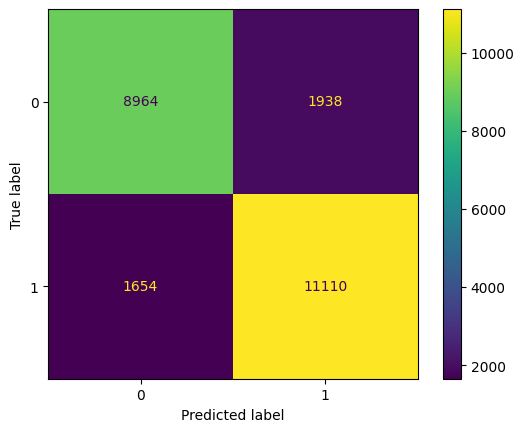

In [144]:
plot_confusion_matrix(hgbc_optimized, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [145]:
print(classification_report(y_test_tfidf_ft, y_hgbc_ft))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10902
           1       0.85      0.87      0.86     12764

    accuracy                           0.85     23666
   macro avg       0.85      0.85      0.85     23666
weighted avg       0.85      0.85      0.85     23666



In [146]:
roc_auc_score(y_test_tfidf_ft, y_hgbc_ft)

0.84632562481815

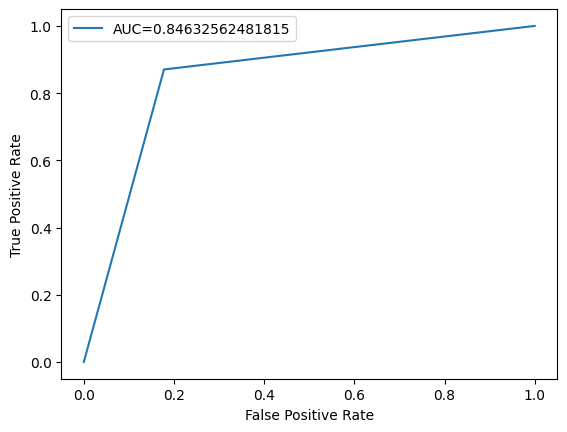

In [147]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_hgbc_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_hgbc_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

### XGBoost

In [ ]:
XGBclassifier